## Importing Libraries

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import cv2
from PIL import Image
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D
from sklearn.model_selection import train_test_split

## Dataset and PreProcessing

In [19]:
dir_train='.\\DogCat\\data\\train\\'
dir_test='.\\DogCat\\data\\test\\'

train_data=(os.listdir(dir_train))
test_data=(os.listdir(dir_test))

print("Train Data : ",train_data)
print("Test Data : ",test_data)

print("Train Data : ", train_data)
print("Test Data : ", test_data)

# Function to get the label from the filename
def get_label(file_name):
    return 1 if 'dog' in file_name else 0

# Function to load and preprocess an image
def load_and_preprocess_image(img_filename):
    img_path = os.path.join(dir_train, img_filename)
    img_raw = tf.io.read_file(img_path)
    img = tf.io.decode_jpeg(img_raw, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = tf.image.resize(img, [224, 224])  # Resize to a fixed size
    return img

# Create a dataset from file paths
def create_dataset(file_paths):
    # Create dataset from filenames
    dataset = tf.data.Dataset.from_tensor_slices(file_paths)
    
    # Load and preprocess images
    dataset = dataset.map(lambda x: (load_and_preprocess_image(x), get_label(x)))
    
    return dataset

# Create training dataset
train_dataset = create_dataset(train_data)
train_dataset = train_dataset.shuffle(buffer_size=len(train_data)).batch(128).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)



Train Data :  ['cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.1000.jpg', 'cat.10000.jpg', 'cat.10001.jpg', 'cat.10002.jpg', 'cat.10005.jpg', 'cat.10006.jpg', 'cat.10007.jpg', 'cat.10009.jpg', 'cat.1001.jpg', 'cat.10010.jpg', 'cat.10011.jpg', 'cat.10012.jpg', 'cat.10015.jpg', 'cat.10016.jpg', 'cat.10017.jpg', 'cat.10018.jpg', 'cat.10019.jpg', 'cat.10020.jpg', 'cat.10021.jpg', 'cat.10022.jpg', 'cat.10023.jpg', 'cat.10024.jpg', 'cat.10025.jpg', 'cat.10026.jpg', 'cat.10027.jpg', 'cat.10029.jpg', 'cat.1003.jpg', 'cat.10030.jpg', 'cat.10032.jpg', 'cat.10033.jpg', 'cat.10035.jpg', 'cat.10036.jpg', 'cat.10037.jpg', 'cat.10038.jpg', 'cat.10039.jpg', 'cat.1004.jpg', 'cat.10040.jpg', 'cat.10041.jpg', 'cat.10042.jpg', 'cat.10043.jpg', 'cat.10044.jpg', 'cat.10045.jpg', 'cat.10046.jpg', 'cat.10048.jpg', 'cat.10049.jpg', 'cat.1005.jpg', 'cat.10051.jpg', 'cat.10052.jpg', 'cat.10053.jpg', 'cat.10054.jpg', 'cat.10055.jpg', 'cat.10056.jpg', 'cat.10057.jpg', 'cat.10058.jpg', 'cat.10059.jpg', 'cat.1006.jpg

TypeError: in user code:

    File "C:\Users\Home\AppData\Local\Temp\ipykernel_11888\409503044.py", line 32, in None  *
        lambda x: (load_and_preprocess_image(x), get_label(x))
    File "C:\Users\Home\AppData\Local\Temp\ipykernel_11888\409503044.py", line 19, in load_and_preprocess_image  *
        img_path = os.path.join(dir_train, img_filename)
    File "<frozen ntpath>", line 147, in join  **
        
    File "<frozen genericpath>", line 152, in _check_arg_types
        

    TypeError: join() argument must be str, bytes, or os.PathLike object, not 'SymbolicTensor'


In [16]:
def get_label(file_name):
    label = 1 if 'dog' in file_name else 0
    return label

labels = [get_label(img) for img in train_data]

images = tf.stack(images)
labels = tf.convert_to_tensor(labels, dtype=tf.int32)
dataset = tf.data.Dataset.from_tensor_slices((images, labels))
dataset = dataset.shuffle(buffer_size=len(images)).batch(128).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)


ResourceExhaustedError: {{function_node __wrapped__Pack_N_10000_device_/job:localhost/replica:0/task:0/device:CPU:0}} OOM when allocating tensor with shape[10000,300,300,3] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator mklcpu [Op:Pack] name: stack

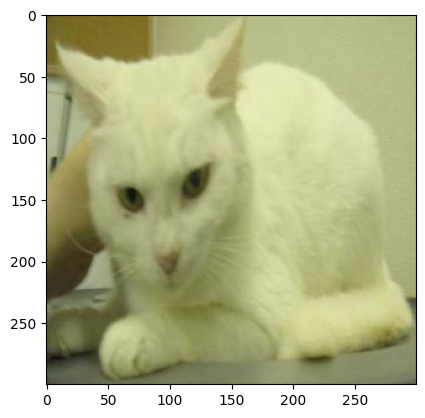

(300, 300, 3)

In [211]:
num=random.randint(1,len(dir_train)-1)
img = cv2.imread(f'./DogCat/data/train/cat.{num}.jpg')

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)         
plt.show()

img_rgb.shape

## Model

In [212]:
model=Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(300,300,3)),
    MaxPooling2D(pool_size=(2,2)),
    
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    
    Flatten(),
    Dense(1,activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

c:\Users\Home\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [214]:
model.fit(train_data,labels,epochs=10,batch_size=128)

ValueError: Unrecognized data type: x=['cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.1000.jpg', 'cat.10000.jpg', 'cat.10001.jpg', 'cat.10002.jpg', 'cat.10005.jpg', 'cat.10006.jpg', 'cat.10007.jpg', 'cat.10009.jpg', 'cat.1001.jpg', 'cat.10010.jpg', 'cat.10011.jpg', 'cat.10012.jpg', 'cat.10015.jpg', 'cat.10016.jpg', 'cat.10017.jpg', 'cat.10018.jpg', 'cat.10019.jpg', 'cat.10020.jpg', 'cat.10021.jpg', 'cat.10022.jpg', 'cat.10023.jpg', 'cat.10024.jpg', 'cat.10025.jpg', 'cat.10026.jpg', 'cat.10027.jpg', 'cat.10029.jpg', 'cat.1003.jpg', 'cat.10030.jpg', 'cat.10032.jpg', 'cat.10033.jpg', 'cat.10035.jpg', 'cat.10036.jpg', 'cat.10037.jpg', 'cat.10038.jpg', 'cat.10039.jpg', 'cat.1004.jpg', 'cat.10040.jpg', 'cat.10041.jpg', 'cat.10042.jpg', 'cat.10043.jpg', 'cat.10044.jpg', 'cat.10045.jpg', 'cat.10046.jpg', 'cat.10048.jpg', 'cat.10049.jpg', 'cat.1005.jpg', 'cat.10051.jpg', 'cat.10052.jpg', 'cat.10053.jpg', 'cat.10054.jpg', 'cat.10055.jpg', 'cat.10056.jpg', 'cat.10057.jpg', 'cat.10058.jpg', 'cat.10059.jpg', 'cat.1006.jpg', 'cat.10062.jpg', 'cat.10063.jpg', 'cat.10064.jpg', 'cat.10065.jpg', 'cat.10067.jpg', 'cat.10068.jpg', 'cat.10069.jpg', 'cat.1007.jpg', 'cat.10070.jpg', 'cat.10071.jpg', 'cat.10072.jpg', 'cat.10073.jpg', 'cat.10074.jpg', 'cat.10075.jpg', 'cat.10076.jpg', 'cat.10077.jpg', 'cat.10078.jpg', 'cat.1008.jpg', 'cat.10080.jpg', 'cat.10081.jpg', 'cat.10082.jpg', 'cat.10083.jpg', 'cat.10084.jpg', 'cat.10085.jpg', 'cat.10086.jpg', 'cat.10088.jpg', 'cat.10089.jpg', 'cat.10090.jpg', 'cat.10091.jpg', 'cat.10092.jpg', 'cat.10093.jpg', 'cat.10094.jpg', 'cat.10095.jpg', 'cat.10096.jpg', 'cat.10097.jpg', 'cat.10099.jpg', 'cat.1010.jpg', 'cat.10100.jpg', 'cat.10101.jpg', 'cat.10102.jpg', 'cat.10103.jpg', 'cat.10104.jpg', 'cat.10105.jpg', 'cat.10106.jpg', 'cat.1011.jpg', 'cat.10110.jpg', 'cat.10112.jpg', 'cat.10113.jpg', 'cat.10116.jpg', 'cat.10118.jpg', 'cat.10119.jpg', 'cat.1012.jpg', 'cat.10120.jpg', 'cat.10121.jpg', 'cat.10123.jpg', 'cat.10124.jpg', 'cat.10127.jpg', 'cat.10128.jpg', 'cat.10129.jpg', 'cat.1013.jpg', 'cat.10130.jpg', 'cat.10134.jpg', 'cat.10136.jpg', 'cat.10137.jpg', 'cat.10138.jpg', 'cat.10139.jpg', 'cat.1014.jpg', 'cat.10140.jpg', 'cat.10141.jpg', 'cat.10142.jpg', 'cat.10143.jpg', 'cat.10144.jpg', 'cat.10145.jpg', 'cat.10146.jpg', 'cat.10147.jpg', 'cat.10149.jpg', 'cat.1015.jpg', 'cat.10150.jpg', 'cat.10151.jpg', 'cat.10152.jpg', 'cat.10153.jpg', 'cat.10154.jpg', 'cat.10155.jpg', 'cat.10156.jpg', 'cat.10157.jpg', 'cat.10159.jpg', 'cat.10160.jpg', 'cat.10161.jpg', 'cat.10162.jpg', 'cat.10164.jpg', 'cat.10165.jpg', 'cat.10166.jpg', 'cat.10167.jpg', 'cat.10168.jpg', 'cat.10169.jpg', 'cat.1017.jpg', 'cat.10170.jpg', 'cat.10171.jpg', 'cat.10174.jpg', 'cat.10175.jpg', 'cat.10176.jpg', 'cat.10177.jpg', 'cat.10178.jpg', 'cat.10179.jpg', 'cat.10180.jpg', 'cat.10181.jpg', 'cat.10182.jpg', 'cat.10183.jpg', 'cat.10184.jpg', 'cat.10185.jpg', 'cat.10186.jpg', 'cat.10187.jpg', 'cat.10188.jpg', 'cat.10189.jpg', 'cat.1019.jpg', 'cat.10190.jpg', 'cat.10191.jpg', 'cat.10192.jpg', 'cat.10193.jpg', 'cat.10194.jpg', 'cat.10197.jpg', 'cat.10198.jpg', 'cat.10199.jpg', 'cat.102.jpg', 'cat.1020.jpg', 'cat.10200.jpg', 'cat.10201.jpg', 'cat.10202.jpg', 'cat.10203.jpg', 'cat.10204.jpg', 'cat.10205.jpg', 'cat.10206.jpg', 'cat.10208.jpg', 'cat.10211.jpg', 'cat.10212.jpg', 'cat.10213.jpg', 'cat.10214.jpg', 'cat.10215.jpg', 'cat.10216.jpg', 'cat.10217.jpg', 'cat.10218.jpg', 'cat.10219.jpg', 'cat.10220.jpg', 'cat.10221.jpg', 'cat.10222.jpg', 'cat.10223.jpg', 'cat.10224.jpg', 'cat.10225.jpg', 'cat.10226.jpg', 'cat.10227.jpg', 'cat.10229.jpg', 'cat.10231.jpg', 'cat.10233.jpg', 'cat.10234.jpg', 'cat.10235.jpg', 'cat.10238.jpg', 'cat.10239.jpg', 'cat.10240.jpg', 'cat.10241.jpg', 'cat.10242.jpg', 'cat.10243.jpg', 'cat.10244.jpg', 'cat.10245.jpg', 'cat.10246.jpg', 'cat.10248.jpg', 'cat.10250.jpg', 'cat.10251.jpg', 'cat.10252.jpg', 'cat.10253.jpg', 'cat.10254.jpg', 'cat.10256.jpg', 'cat.10257.jpg', 'cat.10258.jpg', 'cat.1026.jpg', 'cat.10260.jpg', 'cat.10261.jpg', 'cat.10262.jpg', 'cat.10263.jpg', 'cat.10264.jpg', 'cat.10265.jpg', 'cat.10266.jpg', 'cat.10267.jpg', 'cat.10268.jpg', 'cat.1027.jpg', 'cat.10270.jpg', 'cat.10271.jpg', 'cat.10272.jpg', 'cat.10273.jpg', 'cat.10274.jpg', 'cat.10275.jpg', 'cat.10276.jpg', 'cat.10277.jpg', 'cat.10278.jpg', 'cat.10279.jpg', 'cat.1028.jpg', 'cat.10280.jpg', 'cat.10281.jpg', 'cat.10282.jpg', 'cat.10283.jpg', 'cat.10284.jpg', 'cat.10285.jpg', 'cat.10287.jpg', 'cat.10289.jpg', 'cat.10291.jpg', 'cat.10292.jpg', 'cat.10293.jpg', 'cat.10294.jpg', 'cat.10295.jpg', 'cat.10297.jpg', 'cat.10298.jpg', 'cat.103.jpg', 'cat.10300.jpg', 'cat.10301.jpg', 'cat.10302.jpg', 'cat.10303.jpg', 'cat.10305.jpg', 'cat.10306.jpg', 'cat.10307.jpg', 'cat.10308.jpg', 'cat.1031.jpg', 'cat.10311.jpg', 'cat.10312.jpg', 'cat.10313.jpg', 'cat.10314.jpg', 'cat.10315.jpg', 'cat.10316.jpg', 'cat.10317.jpg', 'cat.10319.jpg', 'cat.10320.jpg', 'cat.10321.jpg', 'cat.10322.jpg', 'cat.10324.jpg', 'cat.10325.jpg', 'cat.10326.jpg', 'cat.10327.jpg', 'cat.10328.jpg', 'cat.10329.jpg', 'cat.1033.jpg', 'cat.10330.jpg', 'cat.10331.jpg', 'cat.10333.jpg', 'cat.10334.jpg', 'cat.10335.jpg', 'cat.10337.jpg', 'cat.1034.jpg', 'cat.10340.jpg', 'cat.10341.jpg', 'cat.10342.jpg', 'cat.10343.jpg', 'cat.10344.jpg', 'cat.10346.jpg', 'cat.10347.jpg', 'cat.10348.jpg', 'cat.10349.jpg', 'cat.1035.jpg', 'cat.10350.jpg', 'cat.10351.jpg', 'cat.10352.jpg', 'cat.10353.jpg', 'cat.10354.jpg', 'cat.10355.jpg', 'cat.10356.jpg', 'cat.10357.jpg', 'cat.10358.jpg', 'cat.10359.jpg', 'cat.1036.jpg', 'cat.10362.jpg', 'cat.10363.jpg', 'cat.10365.jpg', 'cat.10366.jpg', 'cat.10367.jpg', 'cat.10368.jpg', 'cat.10369.jpg', 'cat.1037.jpg', 'cat.10370.jpg', 'cat.10371.jpg', 'cat.10372.jpg', 'cat.10373.jpg', 'cat.10374.jpg', 'cat.10375.jpg', 'cat.10376.jpg', 'cat.10378.jpg', 'cat.10379.jpg', 'cat.1038.jpg', 'cat.10380.jpg', 'cat.10382.jpg', 'cat.10383.jpg', 'cat.10384.jpg', 'cat.10385.jpg', 'cat.10387.jpg', 'cat.10389.jpg', 'cat.1039.jpg', 'cat.10390.jpg', 'cat.10391.jpg', 'cat.10392.jpg', 'cat.10393.jpg', 'cat.10395.jpg', 'cat.10396.jpg', 'cat.10397.jpg', 'cat.10398.jpg', 'cat.10399.jpg', 'cat.104.jpg', 'cat.1040.jpg', 'cat.10400.jpg', 'cat.10401.jpg', 'cat.10402.jpg', 'cat.10404.jpg', 'cat.10406.jpg', 'cat.10407.jpg', 'cat.10409.jpg', 'cat.1041.jpg', 'cat.10411.jpg', 'cat.10412.jpg', 'cat.10413.jpg', 'cat.10416.jpg', 'cat.10418.jpg', 'cat.10419.jpg', 'cat.1042.jpg', 'cat.10420.jpg', 'cat.10421.jpg', 'cat.10422.jpg', 'cat.10423.jpg', 'cat.10424.jpg', 'cat.10425.jpg', 'cat.10426.jpg', 'cat.10427.jpg', 'cat.10428.jpg', 'cat.10429.jpg', 'cat.1043.jpg', 'cat.10430.jpg', 'cat.10431.jpg', 'cat.10432.jpg', 'cat.10433.jpg', 'cat.10434.jpg', 'cat.10435.jpg', 'cat.10437.jpg', 'cat.10439.jpg', 'cat.1044.jpg', 'cat.10440.jpg', 'cat.10441.jpg', 'cat.10442.jpg', 'cat.10444.jpg', 'cat.10445.jpg', 'cat.10446.jpg', 'cat.10447.jpg', 'cat.10448.jpg', 'cat.10449.jpg', 'cat.10450.jpg', 'cat.10451.jpg', 'cat.10452.jpg', 'cat.10453.jpg', 'cat.10454.jpg', 'cat.10455.jpg', 'cat.10456.jpg', 'cat.10457.jpg', 'cat.10458.jpg', 'cat.10459.jpg', 'cat.10460.jpg', 'cat.10461.jpg', 'cat.10462.jpg', 'cat.10463.jpg', 'cat.10464.jpg', 'cat.10465.jpg', 'cat.10466.jpg', 'cat.10467.jpg', 'cat.10468.jpg', 'cat.10469.jpg', 'cat.1047.jpg', 'cat.10470.jpg', 'cat.10472.jpg', 'cat.10473.jpg', 'cat.10474.jpg', 'cat.10476.jpg', 'cat.10477.jpg', 'cat.10478.jpg', 'cat.10479.jpg', 'cat.1048.jpg', 'cat.10480.jpg', 'cat.10481.jpg', 'cat.10482.jpg', 'cat.10483.jpg', 'cat.10484.jpg', 'cat.10485.jpg', 'cat.10486.jpg', 'cat.10487.jpg', 'cat.10488.jpg', 'cat.10489.jpg', 'cat.1049.jpg', 'cat.10490.jpg', 'cat.10491.jpg', 'cat.10492.jpg', 'cat.10493.jpg', 'cat.10494.jpg', 'cat.10495.jpg', 'cat.10496.jpg', 'cat.10497.jpg', 'cat.10498.jpg', 'cat.10499.jpg', 'cat.105.jpg', 'cat.10500.jpg', 'cat.10501.jpg', 'cat.10502.jpg', 'cat.10504.jpg', 'cat.10505.jpg', 'cat.10506.jpg', 'cat.10507.jpg', 'cat.10508.jpg', 'cat.1051.jpg', 'cat.10510.jpg', 'cat.10511.jpg', 'cat.10512.jpg', 'cat.10513.jpg', 'cat.10514.jpg', 'cat.10515.jpg', 'cat.10516.jpg', 'cat.10517.jpg', 'cat.10518.jpg', 'cat.1052.jpg', 'cat.10520.jpg', 'cat.10521.jpg', 'cat.10522.jpg', 'cat.10523.jpg', 'cat.10525.jpg', 'cat.10526.jpg', 'cat.10527.jpg', 'cat.10528.jpg', 'cat.10529.jpg', 'cat.1053.jpg', 'cat.10530.jpg', 'cat.10532.jpg', 'cat.10533.jpg', 'cat.10534.jpg', 'cat.10535.jpg', 'cat.10536.jpg', 'cat.10537.jpg', 'cat.10538.jpg', 'cat.1054.jpg', 'cat.10540.jpg', 'cat.10541.jpg', 'cat.10542.jpg', 'cat.10543.jpg', 'cat.10544.jpg', 'cat.10546.jpg', 'cat.10548.jpg', 'cat.10549.jpg', 'cat.1055.jpg', 'cat.10550.jpg', 'cat.10551.jpg', 'cat.10552.jpg', 'cat.10553.jpg', 'cat.10556.jpg', 'cat.10557.jpg', 'cat.10558.jpg', 'cat.10559.jpg', 'cat.1056.jpg', 'cat.10560.jpg', 'cat.10561.jpg', 'cat.10563.jpg', 'cat.10564.jpg', 'cat.10568.jpg', 'cat.10569.jpg', 'cat.1057.jpg', 'cat.10571.jpg', 'cat.10572.jpg', 'cat.10573.jpg', 'cat.10574.jpg', 'cat.10575.jpg', 'cat.10576.jpg', 'cat.10578.jpg', 'cat.1058.jpg', 'cat.10580.jpg', 'cat.10581.jpg', 'cat.10583.jpg', 'cat.10584.jpg', 'cat.10585.jpg', 'cat.10586.jpg', 'cat.10587.jpg', 'cat.10588.jpg', 'cat.10589.jpg', 'cat.1059.jpg', 'cat.10590.jpg', 'cat.10591.jpg', 'cat.10593.jpg', 'cat.10594.jpg', 'cat.10595.jpg', 'cat.10596.jpg', 'cat.10597.jpg', 'cat.10598.jpg', 'cat.10599.jpg', 'cat.106.jpg', 'cat.1060.jpg', 'cat.10601.jpg', 'cat.10604.jpg', 'cat.10606.jpg', 'cat.10608.jpg', 'cat.10609.jpg', 'cat.1061.jpg', 'cat.10612.jpg', 'cat.10614.jpg', 'cat.10618.jpg', 'cat.10619.jpg', 'cat.1062.jpg', 'cat.10620.jpg', 'cat.10621.jpg', 'cat.10622.jpg', 'cat.10623.jpg', 'cat.10624.jpg', 'cat.10625.jpg', 'cat.10626.jpg', 'cat.10628.jpg', 'cat.10629.jpg', 'cat.1063.jpg', 'cat.10630.jpg', 'cat.10631.jpg', 'cat.10632.jpg', 'cat.10634.jpg', 'cat.10635.jpg', 'cat.10637.jpg', 'cat.10638.jpg', 'cat.10639.jpg', 'cat.1064.jpg', 'cat.10640.jpg', 'cat.10641.jpg', 'cat.10642.jpg', 'cat.10643.jpg', 'cat.10644.jpg', 'cat.10646.jpg', 'cat.10647.jpg', 'cat.10648.jpg', 'cat.10650.jpg', 'cat.10651.jpg', 'cat.10652.jpg', 'cat.10653.jpg', 'cat.10655.jpg', 'cat.10656.jpg', 'cat.10658.jpg', 'cat.10659.jpg', 'cat.1066.jpg', 'cat.10661.jpg', 'cat.10663.jpg', 'cat.10666.jpg', 'cat.10667.jpg', 'cat.10668.jpg', 'cat.1067.jpg', 'cat.10670.jpg', 'cat.10671.jpg', 'cat.10672.jpg', 'cat.10673.jpg', 'cat.10674.jpg', 'cat.10675.jpg', 'cat.10676.jpg', 'cat.10677.jpg', 'cat.10678.jpg', 'cat.10679.jpg', 'cat.1068.jpg', 'cat.10681.jpg', 'cat.10682.jpg', 'cat.10683.jpg', 'cat.10684.jpg', 'cat.10685.jpg', 'cat.10686.jpg', 'cat.10687.jpg', 'cat.10688.jpg', 'cat.10689.jpg', 'cat.1069.jpg', 'cat.10691.jpg', 'cat.10692.jpg', 'cat.10694.jpg', 'cat.10695.jpg', 'cat.10697.jpg', 'cat.10698.jpg', 'cat.10699.jpg', 'cat.107.jpg', 'cat.1070.jpg', 'cat.10700.jpg', 'cat.10701.jpg', 'cat.10702.jpg', 'cat.10703.jpg', 'cat.10705.jpg', 'cat.10706.jpg', 'cat.10707.jpg', 'cat.10709.jpg', 'cat.1071.jpg', 'cat.10710.jpg', 'cat.10711.jpg', 'cat.10712.jpg', 'cat.10713.jpg', 'cat.10714.jpg', 'cat.10715.jpg', 'cat.10716.jpg', 'cat.10718.jpg', 'cat.10719.jpg', 'cat.1072.jpg', 'cat.10720.jpg', 'cat.10721.jpg', 'cat.10722.jpg', 'cat.10723.jpg', 'cat.10724.jpg', 'cat.10725.jpg', 'cat.10726.jpg', 'cat.10727.jpg', 'cat.10728.jpg', 'cat.10729.jpg', 'cat.10731.jpg', 'cat.10732.jpg', 'cat.10733.jpg', 'cat.10735.jpg', 'cat.10736.jpg', 'cat.10739.jpg', 'cat.1074.jpg', 'cat.10741.jpg', 'cat.10742.jpg', 'cat.10743.jpg', 'cat.10746.jpg', 'cat.10747.jpg', 'cat.10749.jpg', 'cat.10750.jpg', 'cat.10751.jpg', 'cat.10752.jpg', 'cat.10753.jpg', 'cat.10754.jpg', 'cat.10755.jpg', 'cat.10756.jpg', 'cat.10757.jpg', 'cat.10758.jpg', 'cat.10759.jpg', 'cat.1076.jpg', 'cat.10760.jpg', 'cat.10761.jpg', 'cat.10762.jpg', 'cat.10763.jpg', 'cat.10764.jpg', 'cat.10765.jpg', 'cat.10766.jpg', 'cat.10767.jpg', 'cat.10768.jpg', 'cat.10769.jpg', 'cat.1077.jpg', 'cat.10770.jpg', 'cat.10771.jpg', 'cat.10772.jpg', 'cat.10773.jpg', 'cat.10775.jpg', 'cat.10776.jpg', 'cat.10778.jpg', 'cat.10779.jpg', 'cat.10781.jpg', 'cat.10782.jpg', 'cat.10783.jpg', 'cat.10784.jpg', 'cat.10785.jpg', 'cat.10786.jpg', 'cat.10787.jpg', 'cat.10788.jpg', 'cat.10789.jpg', 'cat.1079.jpg', 'cat.10790.jpg', 'cat.10791.jpg', 'cat.10792.jpg', 'cat.10793.jpg', 'cat.10794.jpg', 'cat.10795.jpg', 'cat.10796.jpg', 'cat.10797.jpg', 'cat.10798.jpg', 'cat.108.jpg', 'cat.1080.jpg', 'cat.10800.jpg', 'cat.10801.jpg', 'cat.10802.jpg', 'cat.10803.jpg', 'cat.10804.jpg', 'cat.10805.jpg', 'cat.10806.jpg', 'cat.10807.jpg', 'cat.10808.jpg', 'cat.10809.jpg', 'cat.1081.jpg', 'cat.10810.jpg', 'cat.10811.jpg', 'cat.10812.jpg', 'cat.10813.jpg', 'cat.10814.jpg', 'cat.10815.jpg', 'cat.10816.jpg', 'cat.10818.jpg', 'cat.10819.jpg', 'cat.10821.jpg', 'cat.10822.jpg', 'cat.10823.jpg', 'cat.10824.jpg', 'cat.10825.jpg', 'cat.10826.jpg', 'cat.10827.jpg', 'cat.10828.jpg', 'cat.10829.jpg', 'cat.1083.jpg', 'cat.10830.jpg', 'cat.10831.jpg', 'cat.10832.jpg', 'cat.10833.jpg', 'cat.10834.jpg', 'cat.10835.jpg', 'cat.10838.jpg', 'cat.10839.jpg', 'cat.10840.jpg', 'cat.10841.jpg', 'cat.10842.jpg', 'cat.10843.jpg', 'cat.10844.jpg', 'cat.10845.jpg', 'cat.10847.jpg', 'cat.10848.jpg', 'cat.10849.jpg', 'cat.1085.jpg', 'cat.10850.jpg', 'cat.10851.jpg', 'cat.10852.jpg', 'cat.10854.jpg', 'cat.10855.jpg', 'cat.10856.jpg', 'cat.10858.jpg', 'cat.10859.jpg', 'cat.1086.jpg', 'cat.10860.jpg', 'cat.10861.jpg', 'cat.10862.jpg', 'cat.10863.jpg', 'cat.10865.jpg', 'cat.10866.jpg', 'cat.10867.jpg', 'cat.10868.jpg', 'cat.10869.jpg', 'cat.10870.jpg', 'cat.10872.jpg', 'cat.10873.jpg', 'cat.10874.jpg', 'cat.10875.jpg', 'cat.10876.jpg', 'cat.10877.jpg', 'cat.10878.jpg', 'cat.10879.jpg', 'cat.1088.jpg', 'cat.10880.jpg', 'cat.10881.jpg', 'cat.10882.jpg', 'cat.10883.jpg', 'cat.10884.jpg', 'cat.10885.jpg', 'cat.10887.jpg', 'cat.10888.jpg', 'cat.10889.jpg', 'cat.1089.jpg', 'cat.10890.jpg', 'cat.10891.jpg', 'cat.10892.jpg', 'cat.10893.jpg', 'cat.10894.jpg', 'cat.10895.jpg', 'cat.10896.jpg', 'cat.10897.jpg', 'cat.10898.jpg', 'cat.1090.jpg', 'cat.10900.jpg', 'cat.10901.jpg', 'cat.10902.jpg', 'cat.10903.jpg', 'cat.10905.jpg', 'cat.10906.jpg', 'cat.10907.jpg', 'cat.10908.jpg', 'cat.10909.jpg', 'cat.1091.jpg', 'cat.10910.jpg', 'cat.10911.jpg', 'cat.10912.jpg', 'cat.10914.jpg', 'cat.10915.jpg', 'cat.10916.jpg', 'cat.10918.jpg', 'cat.10919.jpg', 'cat.1092.jpg', 'cat.10920.jpg', 'cat.10921.jpg', 'cat.10922.jpg', 'cat.10923.jpg', 'cat.10924.jpg', 'cat.10927.jpg', 'cat.10929.jpg', 'cat.1093.jpg', 'cat.10930.jpg', 'cat.10931.jpg', 'cat.10932.jpg', 'cat.10934.jpg', 'cat.10935.jpg', 'cat.10936.jpg', 'cat.10939.jpg', 'cat.1094.jpg', 'cat.10941.jpg', 'cat.10942.jpg', 'cat.10943.jpg', 'cat.10944.jpg', 'cat.10945.jpg', 'cat.10946.jpg', 'cat.10948.jpg', 'cat.1095.jpg', 'cat.10950.jpg', 'cat.10951.jpg', 'cat.10954.jpg', 'cat.10956.jpg', 'cat.10957.jpg', 'cat.10960.jpg', 'cat.10961.jpg', 'cat.10962.jpg', 'cat.10963.jpg', 'cat.10964.jpg', 'cat.10965.jpg', 'cat.10966.jpg', 'cat.10967.jpg', 'cat.10968.jpg', 'cat.10969.jpg', 'cat.1097.jpg', 'cat.10970.jpg', 'cat.10971.jpg', 'cat.10972.jpg', 'cat.10973.jpg', 'cat.10974.jpg', 'cat.10975.jpg', 'cat.10976.jpg', 'cat.10977.jpg', 'cat.10978.jpg', 'cat.10979.jpg', 'cat.1098.jpg', 'cat.10980.jpg', 'cat.10981.jpg', 'cat.10982.jpg', 'cat.10984.jpg', 'cat.10986.jpg', 'cat.10987.jpg', 'cat.10988.jpg', 'cat.10989.jpg', 'cat.1099.jpg', 'cat.10990.jpg', 'cat.10991.jpg', 'cat.10992.jpg', 'cat.10994.jpg', 'cat.10995.jpg', 'cat.10996.jpg', 'cat.10997.jpg', 'cat.10998.jpg', 'cat.10999.jpg', 'cat.11.jpg', 'cat.1100.jpg', 'cat.11000.jpg', 'cat.11002.jpg', 'cat.11004.jpg', 'cat.11005.jpg', 'cat.11006.jpg', 'cat.11007.jpg', 'cat.11008.jpg', 'cat.11009.jpg', 'cat.11010.jpg', 'cat.11011.jpg', 'cat.11012.jpg', 'cat.11014.jpg', 'cat.11015.jpg', 'cat.11016.jpg', 'cat.11017.jpg', 'cat.11018.jpg', 'cat.1102.jpg', 'cat.11020.jpg', 'cat.11021.jpg', 'cat.11022.jpg', 'cat.11023.jpg', 'cat.11024.jpg', 'cat.11025.jpg', 'cat.11026.jpg', 'cat.11027.jpg', 'cat.11028.jpg', 'cat.11029.jpg', 'cat.1103.jpg', 'cat.11030.jpg', 'cat.11032.jpg', 'cat.11034.jpg', 'cat.11039.jpg', 'cat.1104.jpg', 'cat.11040.jpg', 'cat.11041.jpg', 'cat.11042.jpg', 'cat.11043.jpg', 'cat.11044.jpg', 'cat.11045.jpg', 'cat.11046.jpg', 'cat.11047.jpg', 'cat.11048.jpg', 'cat.11049.jpg', 'cat.1105.jpg', 'cat.11051.jpg', 'cat.11052.jpg', 'cat.11053.jpg', 'cat.11054.jpg', 'cat.11055.jpg', 'cat.11056.jpg', 'cat.11057.jpg', 'cat.11058.jpg', 'cat.1106.jpg', 'cat.11060.jpg', 'cat.11061.jpg', 'cat.11062.jpg', 'cat.11063.jpg', 'cat.11064.jpg', 'cat.11065.jpg', 'cat.11066.jpg', 'cat.11068.jpg', 'cat.11069.jpg', 'cat.11070.jpg', 'cat.11071.jpg', 'cat.11072.jpg', 'cat.11073.jpg', 'cat.11074.jpg', 'cat.11076.jpg', 'cat.11077.jpg', 'cat.11078.jpg', 'cat.1108.jpg', 'cat.11081.jpg', 'cat.11082.jpg', 'cat.11083.jpg', 'cat.11084.jpg', 'cat.11085.jpg', 'cat.11086.jpg', 'cat.11087.jpg', 'cat.11088.jpg', 'cat.11089.jpg', 'cat.1109.jpg', 'cat.11090.jpg', 'cat.11091.jpg', 'cat.11092.jpg', 'cat.11093.jpg', 'cat.11094.jpg', 'cat.11096.jpg', 'cat.1110.jpg', 'cat.11100.jpg', 'cat.11101.jpg', 'cat.11102.jpg', 'cat.11104.jpg', 'cat.11105.jpg', 'cat.11106.jpg', 'cat.11108.jpg', 'cat.11109.jpg', 'cat.1111.jpg', 'cat.11110.jpg', 'cat.11111.jpg', 'cat.11112.jpg', 'cat.11114.jpg', 'cat.11115.jpg', 'cat.11116.jpg', 'cat.11117.jpg', 'cat.11118.jpg', 'cat.11119.jpg', 'cat.1112.jpg', 'cat.11120.jpg', 'cat.11121.jpg', 'cat.11123.jpg', 'cat.11124.jpg', 'cat.11125.jpg', 'cat.11126.jpg', 'cat.11127.jpg', 'cat.11128.jpg', 'cat.11129.jpg', 'cat.1113.jpg', 'cat.11130.jpg', 'cat.11131.jpg', 'cat.11132.jpg', 'cat.11133.jpg', 'cat.11135.jpg', 'cat.11136.jpg', 'cat.11137.jpg', 'cat.11138.jpg', 'cat.11139.jpg', 'cat.1114.jpg', 'cat.11140.jpg', 'cat.11142.jpg', 'cat.11143.jpg', 'cat.11144.jpg', 'cat.11145.jpg', 'cat.11146.jpg', 'cat.11147.jpg', 'cat.11148.jpg', 'cat.11149.jpg', 'cat.1115.jpg', 'cat.11150.jpg', 'cat.11151.jpg', 'cat.11152.jpg', 'cat.11154.jpg', 'cat.11155.jpg', 'cat.11156.jpg', 'cat.11157.jpg', 'cat.11158.jpg', 'cat.1116.jpg', 'cat.11160.jpg', 'cat.11161.jpg', 'cat.11162.jpg', 'cat.11163.jpg', 'cat.11164.jpg', 'cat.11166.jpg', 'cat.11167.jpg', 'cat.11168.jpg', 'cat.11169.jpg', 'cat.1117.jpg', 'cat.11171.jpg', 'cat.11173.jpg', 'cat.11174.jpg', 'cat.11176.jpg', 'cat.11177.jpg', 'cat.11178.jpg', 'cat.11179.jpg', 'cat.1118.jpg', 'cat.11181.jpg', 'cat.11183.jpg', 'cat.11185.jpg', 'cat.11186.jpg', 'cat.11187.jpg', 'cat.11188.jpg', 'cat.1119.jpg', 'cat.11191.jpg', 'cat.11192.jpg', 'cat.11193.jpg', 'cat.11194.jpg', 'cat.11195.jpg', 'cat.11196.jpg', 'cat.11197.jpg', 'cat.11198.jpg', 'cat.11199.jpg', 'cat.112.jpg', 'cat.1120.jpg', 'cat.11201.jpg', 'cat.11202.jpg', 'cat.11203.jpg', 'cat.11204.jpg', 'cat.11205.jpg', 'cat.11206.jpg', 'cat.11207.jpg', 'cat.11208.jpg', 'cat.11209.jpg', 'cat.1121.jpg', 'cat.11210.jpg', 'cat.11211.jpg', 'cat.11212.jpg', 'cat.11213.jpg', 'cat.11214.jpg', 'cat.11216.jpg', 'cat.11217.jpg', 'cat.11218.jpg', 'cat.11219.jpg', 'cat.1122.jpg', 'cat.11221.jpg', 'cat.11222.jpg', 'cat.11223.jpg', 'cat.11224.jpg', 'cat.11225.jpg', 'cat.11227.jpg', 'cat.11228.jpg', 'cat.1123.jpg', 'cat.11230.jpg', 'cat.11231.jpg', 'cat.11232.jpg', 'cat.11233.jpg', 'cat.11234.jpg', 'cat.11235.jpg', 'cat.11236.jpg', 'cat.11237.jpg', 'cat.11238.jpg', 'cat.11239.jpg', 'cat.1124.jpg', 'cat.11240.jpg', 'cat.11241.jpg', 'cat.11242.jpg', 'cat.11243.jpg', 'cat.11245.jpg', 'cat.11247.jpg', 'cat.11248.jpg', 'cat.1125.jpg', 'cat.11250.jpg', 'cat.11251.jpg', 'cat.11252.jpg', 'cat.11253.jpg', 'cat.11255.jpg', 'cat.11257.jpg', 'cat.11258.jpg', 'cat.11259.jpg', 'cat.1126.jpg', 'cat.11261.jpg', 'cat.11262.jpg', 'cat.11264.jpg', 'cat.11265.jpg', 'cat.11266.jpg', 'cat.11267.jpg', 'cat.11269.jpg', 'cat.1127.jpg', 'cat.11270.jpg', 'cat.11273.jpg', 'cat.11274.jpg', 'cat.11276.jpg', 'cat.11277.jpg', 'cat.11278.jpg', 'cat.11279.jpg', 'cat.1128.jpg', 'cat.11280.jpg', 'cat.11281.jpg', 'cat.11282.jpg', 'cat.11283.jpg', 'cat.11284.jpg', 'cat.11285.jpg', 'cat.11286.jpg', 'cat.11287.jpg', 'cat.11288.jpg', 'cat.11289.jpg', 'cat.1129.jpg', 'cat.11290.jpg', 'cat.11291.jpg', 'cat.11293.jpg', 'cat.11294.jpg', 'cat.11295.jpg', 'cat.11296.jpg', 'cat.11297.jpg', 'cat.11298.jpg', 'cat.11299.jpg', 'cat.113.jpg', 'cat.1130.jpg', 'cat.11300.jpg', 'cat.11302.jpg', 'cat.11304.jpg', 'cat.11305.jpg', 'cat.11306.jpg', 'cat.11307.jpg', 'cat.11308.jpg', 'cat.11309.jpg', 'cat.1131.jpg', 'cat.11310.jpg', 'cat.11311.jpg', 'cat.11312.jpg', 'cat.11313.jpg', 'cat.11314.jpg', 'cat.11317.jpg', 'cat.11318.jpg', 'cat.11319.jpg', 'cat.1132.jpg', 'cat.11321.jpg', 'cat.11322.jpg', 'cat.11323.jpg', 'cat.11324.jpg', 'cat.11325.jpg', 'cat.11326.jpg', 'cat.11329.jpg', 'cat.1133.jpg', 'cat.11330.jpg', 'cat.11331.jpg', 'cat.11332.jpg', 'cat.11333.jpg', 'cat.11334.jpg', 'cat.11337.jpg', 'cat.11338.jpg', 'cat.1134.jpg', 'cat.11340.jpg', 'cat.11341.jpg', 'cat.11342.jpg', 'cat.11343.jpg', 'cat.11344.jpg', 'cat.11345.jpg', 'cat.11346.jpg', 'cat.11347.jpg', 'cat.11348.jpg', 'cat.11349.jpg', 'cat.1135.jpg', 'cat.11350.jpg', 'cat.11351.jpg', 'cat.11352.jpg', 'cat.11354.jpg', 'cat.11355.jpg', 'cat.11356.jpg', 'cat.11358.jpg', 'cat.11359.jpg', 'cat.1136.jpg', 'cat.11361.jpg', 'cat.11362.jpg', 'cat.11363.jpg', 'cat.11364.jpg', 'cat.11365.jpg', 'cat.11369.jpg', 'cat.1137.jpg', 'cat.11370.jpg', 'cat.11373.jpg', 'cat.11374.jpg', 'cat.11375.jpg', 'cat.11376.jpg', 'cat.11377.jpg', 'cat.11378.jpg', 'cat.1138.jpg', 'cat.11381.jpg', 'cat.11382.jpg', 'cat.11384.jpg', 'cat.11386.jpg', 'cat.11388.jpg', 'cat.11389.jpg', 'cat.1139.jpg', 'cat.11390.jpg', 'cat.11391.jpg', 'cat.11392.jpg', 'cat.11393.jpg', 'cat.11396.jpg', 'cat.11397.jpg', 'cat.11398.jpg', 'cat.11399.jpg', 'cat.114.jpg', 'cat.1140.jpg', 'cat.11402.jpg', 'cat.11403.jpg', 'cat.11404.jpg', 'cat.11405.jpg', 'cat.11406.jpg', 'cat.11407.jpg', 'cat.11409.jpg', 'cat.1141.jpg', 'cat.11410.jpg', 'cat.11411.jpg', 'cat.11412.jpg', 'cat.11413.jpg', 'cat.11414.jpg', 'cat.11415.jpg', 'cat.11416.jpg', 'cat.11417.jpg', 'cat.11418.jpg', 'cat.11419.jpg', 'cat.1142.jpg', 'cat.11420.jpg', 'cat.11421.jpg', 'cat.11422.jpg', 'cat.11423.jpg', 'cat.11424.jpg', 'cat.11425.jpg', 'cat.11426.jpg', 'cat.11427.jpg', 'cat.11428.jpg', 'cat.11429.jpg', 'cat.1143.jpg', 'cat.11430.jpg', 'cat.11431.jpg', 'cat.11432.jpg', 'cat.11433.jpg', 'cat.11434.jpg', 'cat.11435.jpg', 'cat.11436.jpg', 'cat.11437.jpg', 'cat.11438.jpg', 'cat.11439.jpg', 'cat.1144.jpg', 'cat.11440.jpg', 'cat.11441.jpg', 'cat.11443.jpg', 'cat.11444.jpg', 'cat.11445.jpg', 'cat.11447.jpg', 'cat.11448.jpg', 'cat.11449.jpg', 'cat.1145.jpg', 'cat.11450.jpg', 'cat.11453.jpg', 'cat.11454.jpg', 'cat.11456.jpg', 'cat.11457.jpg', 'cat.11458.jpg', 'cat.11459.jpg', 'cat.1146.jpg', 'cat.11460.jpg', 'cat.11462.jpg', 'cat.11463.jpg', 'cat.11464.jpg', 'cat.11465.jpg', 'cat.11466.jpg', 'cat.11467.jpg', 'cat.11468.jpg', 'cat.11469.jpg', 'cat.1147.jpg', 'cat.11472.jpg', 'cat.11473.jpg', 'cat.11474.jpg', 'cat.11475.jpg', 'cat.11476.jpg', 'cat.11477.jpg', 'cat.11478.jpg', 'cat.1148.jpg', 'cat.11480.jpg', 'cat.11481.jpg', 'cat.11483.jpg', 'cat.11484.jpg', 'cat.11485.jpg', 'cat.11486.jpg', 'cat.11488.jpg', 'cat.11489.jpg', 'cat.1149.jpg', 'cat.11490.jpg', 'cat.11491.jpg', 'cat.11492.jpg', 'cat.11493.jpg', 'cat.11494.jpg', 'cat.11495.jpg', 'cat.11496.jpg', 'cat.11498.jpg', 'cat.115.jpg', 'cat.1150.jpg', 'cat.11500.jpg', 'cat.11501.jpg', 'cat.11502.jpg', 'cat.11503.jpg', 'cat.11504.jpg', 'cat.11505.jpg', 'cat.11506.jpg', 'cat.11508.jpg', 'cat.11509.jpg', 'cat.1151.jpg', 'cat.11510.jpg', 'cat.11511.jpg', 'cat.11515.jpg', 'cat.11516.jpg', 'cat.11519.jpg', 'cat.1152.jpg', 'cat.11522.jpg', 'cat.11523.jpg', 'cat.11524.jpg', 'cat.11525.jpg', 'cat.11526.jpg', 'cat.11527.jpg', 'cat.11528.jpg', 'cat.11529.jpg', 'cat.1153.jpg', 'cat.11530.jpg', 'cat.11531.jpg', 'cat.11532.jpg', 'cat.11533.jpg', 'cat.11536.jpg', 'cat.11537.jpg', 'cat.11538.jpg', 'cat.1154.jpg', 'cat.11541.jpg', 'cat.11542.jpg', 'cat.11544.jpg', 'cat.11547.jpg', 'cat.11548.jpg', 'cat.11549.jpg', 'cat.1155.jpg', 'cat.11550.jpg', 'cat.11551.jpg', 'cat.11553.jpg', 'cat.11554.jpg', 'cat.11556.jpg', 'cat.11557.jpg', 'cat.11558.jpg', 'cat.11559.jpg', 'cat.1156.jpg', 'cat.11560.jpg', 'cat.11561.jpg', 'cat.11563.jpg', 'cat.11565.jpg', 'cat.11566.jpg', 'cat.11567.jpg', 'cat.11568.jpg', 'cat.11569.jpg', 'cat.1157.jpg', 'cat.11570.jpg', 'cat.11571.jpg', 'cat.11572.jpg', 'cat.11573.jpg', 'cat.11574.jpg', 'cat.11575.jpg', 'cat.11576.jpg', 'cat.11579.jpg', 'cat.1158.jpg', 'cat.11580.jpg', 'cat.11581.jpg', 'cat.11582.jpg', 'cat.11583.jpg', 'cat.11584.jpg', 'cat.11585.jpg', 'cat.11586.jpg', 'cat.11587.jpg', 'cat.11588.jpg', 'cat.1159.jpg', 'cat.11591.jpg', 'cat.11592.jpg', 'cat.11593.jpg', 'cat.11595.jpg', 'cat.11596.jpg', 'cat.11599.jpg', 'cat.116.jpg', 'cat.1160.jpg', 'cat.11601.jpg', 'cat.11602.jpg', 'cat.11603.jpg', 'cat.11604.jpg', 'cat.11605.jpg', 'cat.11606.jpg', 'cat.11607.jpg', 'cat.11608.jpg', 'cat.1161.jpg', 'cat.11610.jpg', 'cat.11611.jpg', 'cat.11612.jpg', 'cat.11614.jpg', 'cat.11615.jpg', 'cat.11616.jpg', 'cat.11617.jpg', 'cat.11618.jpg', 'cat.11619.jpg', 'cat.1162.jpg', 'cat.11620.jpg', 'cat.11621.jpg', 'cat.11623.jpg', 'cat.11625.jpg', 'cat.11626.jpg', 'cat.11627.jpg', 'cat.11628.jpg', 'cat.11629.jpg', 'cat.1163.jpg', 'cat.11630.jpg', 'cat.11631.jpg', 'cat.11632.jpg', 'cat.11634.jpg', 'cat.11635.jpg', 'cat.11639.jpg', 'cat.1164.jpg', 'cat.11641.jpg', 'cat.11642.jpg', 'cat.11643.jpg', 'cat.11644.jpg', 'cat.11645.jpg', 'cat.11646.jpg', 'cat.11647.jpg', 'cat.11648.jpg', 'cat.11649.jpg', 'cat.1165.jpg', 'cat.11650.jpg', 'cat.11651.jpg', 'cat.11652.jpg', 'cat.11653.jpg', 'cat.11655.jpg', 'cat.11656.jpg', 'cat.11658.jpg', 'cat.1166.jpg', 'cat.11661.jpg', 'cat.11662.jpg', 'cat.11663.jpg', 'cat.11664.jpg', 'cat.11666.jpg', 'cat.11668.jpg', 'cat.11669.jpg', 'cat.1167.jpg', 'cat.11670.jpg', 'cat.11671.jpg', 'cat.11673.jpg', 'cat.11674.jpg', 'cat.11677.jpg', 'cat.11678.jpg', 'cat.1168.jpg', 'cat.11680.jpg', 'cat.11681.jpg', 'cat.11682.jpg', 'cat.11683.jpg', 'cat.11684.jpg', 'cat.11685.jpg', 'cat.11686.jpg', 'cat.11687.jpg', 'cat.11688.jpg', 'cat.1169.jpg', 'cat.11690.jpg', 'cat.11691.jpg', 'cat.11694.jpg', 'cat.11695.jpg', 'cat.11696.jpg', 'cat.11697.jpg', 'cat.11698.jpg', 'cat.11699.jpg', 'cat.117.jpg', 'cat.1170.jpg', 'cat.11700.jpg', 'cat.11702.jpg', 'cat.11703.jpg', 'cat.11704.jpg', 'cat.11705.jpg', 'cat.11706.jpg', 'cat.11707.jpg', 'cat.11708.jpg', 'cat.11709.jpg', 'cat.1171.jpg', 'cat.11710.jpg', 'cat.11711.jpg', 'cat.11712.jpg', 'cat.11713.jpg', 'cat.11714.jpg', 'cat.11715.jpg', 'cat.11716.jpg', 'cat.11717.jpg', 'cat.11718.jpg', 'cat.11719.jpg', 'cat.1172.jpg', 'cat.11720.jpg', 'cat.11721.jpg', 'cat.11722.jpg', 'cat.11724.jpg', 'cat.11725.jpg', 'cat.11726.jpg', 'cat.11727.jpg', 'cat.11728.jpg', 'cat.11729.jpg', 'cat.1173.jpg', 'cat.11731.jpg', 'cat.11732.jpg', 'cat.11733.jpg', 'cat.11735.jpg', 'cat.11737.jpg', 'cat.11738.jpg', 'cat.11739.jpg', 'cat.1174.jpg', 'cat.11740.jpg', 'cat.11741.jpg', 'cat.11743.jpg', 'cat.11744.jpg', 'cat.11746.jpg', 'cat.11747.jpg', 'cat.11748.jpg', 'cat.11749.jpg', 'cat.1175.jpg', 'cat.11751.jpg', 'cat.11753.jpg', 'cat.11754.jpg', 'cat.11756.jpg', 'cat.11757.jpg', 'cat.11758.jpg', 'cat.11759.jpg', 'cat.1176.jpg', 'cat.11760.jpg', 'cat.11761.jpg', 'cat.11762.jpg', 'cat.11764.jpg', 'cat.11765.jpg', 'cat.11766.jpg', 'cat.11767.jpg', 'cat.11768.jpg', 'cat.11769.jpg', 'cat.1177.jpg', 'cat.11771.jpg', 'cat.11772.jpg', 'cat.11773.jpg', 'cat.11774.jpg', 'cat.11775.jpg', 'cat.11778.jpg', 'cat.1178.jpg', 'cat.11780.jpg', 'cat.11781.jpg', 'cat.11782.jpg', 'cat.11783.jpg', 'cat.11784.jpg', 'cat.11785.jpg', 'cat.11786.jpg', 'cat.11788.jpg', 'cat.1179.jpg', 'cat.11790.jpg', 'cat.11792.jpg', 'cat.11793.jpg', 'cat.11796.jpg', 'cat.11797.jpg', 'cat.11798.jpg', 'cat.11799.jpg', 'cat.118.jpg', 'cat.1180.jpg', 'cat.11800.jpg', 'cat.11802.jpg', 'cat.11803.jpg', 'cat.11804.jpg', 'cat.11806.jpg', 'cat.11807.jpg', 'cat.11808.jpg', 'cat.11809.jpg', 'cat.1181.jpg', 'cat.11812.jpg', 'cat.11813.jpg', 'cat.11814.jpg', 'cat.11815.jpg', 'cat.11817.jpg', 'cat.11818.jpg', 'cat.11819.jpg', 'cat.1182.jpg', 'cat.11820.jpg', 'cat.11823.jpg', 'cat.11824.jpg', 'cat.11825.jpg', 'cat.11826.jpg', 'cat.11827.jpg', 'cat.11828.jpg', 'cat.11829.jpg', 'cat.1183.jpg', 'cat.11833.jpg', 'cat.11834.jpg', 'cat.11835.jpg', 'cat.11837.jpg', 'cat.11838.jpg', 'cat.11839.jpg', 'cat.1184.jpg', 'cat.11840.jpg', 'cat.11841.jpg', 'cat.11842.jpg', 'cat.11844.jpg', 'cat.11845.jpg', 'cat.11846.jpg', 'cat.11847.jpg', 'cat.11848.jpg', 'cat.11849.jpg', 'cat.1185.jpg', 'cat.11850.jpg', 'cat.11851.jpg', 'cat.11852.jpg', 'cat.11853.jpg', 'cat.11854.jpg', 'cat.11855.jpg', 'cat.11856.jpg', 'cat.11857.jpg', 'cat.11858.jpg', 'cat.11859.jpg', 'cat.1186.jpg', 'cat.11860.jpg', 'cat.11861.jpg', 'cat.11862.jpg', 'cat.11863.jpg', 'cat.11864.jpg', 'cat.11865.jpg', 'cat.11866.jpg', 'cat.11867.jpg', 'cat.11868.jpg', 'cat.11869.jpg', 'cat.1187.jpg', 'cat.11870.jpg', 'cat.11871.jpg', 'cat.11872.jpg', 'cat.11873.jpg', 'cat.11874.jpg', 'cat.11875.jpg', 'cat.11876.jpg', 'cat.11877.jpg', 'cat.11878.jpg', 'cat.11879.jpg', 'cat.1188.jpg', 'cat.11880.jpg', 'cat.11881.jpg', 'cat.11882.jpg', 'cat.11883.jpg', 'cat.11884.jpg', 'cat.11885.jpg', 'cat.11886.jpg', 'cat.11888.jpg', 'cat.11889.jpg', 'cat.1189.jpg', 'cat.11890.jpg', 'cat.11891.jpg', 'cat.11892.jpg', 'cat.11894.jpg', 'cat.11896.jpg', 'cat.11897.jpg', 'cat.11898.jpg', 'cat.11899.jpg', 'cat.1190.jpg', 'cat.11900.jpg', 'cat.11901.jpg', 'cat.11902.jpg', 'cat.11903.jpg', 'cat.11904.jpg', 'cat.11905.jpg', 'cat.11907.jpg', 'cat.11909.jpg', 'cat.1191.jpg', 'cat.11910.jpg', 'cat.11913.jpg', 'cat.11914.jpg', 'cat.11915.jpg', 'cat.11916.jpg', 'cat.11918.jpg', 'cat.1192.jpg', 'cat.11920.jpg', 'cat.11921.jpg', 'cat.11922.jpg', 'cat.11924.jpg', 'cat.11925.jpg', 'cat.11927.jpg', 'cat.11929.jpg', 'cat.1193.jpg', 'cat.11931.jpg', 'cat.11932.jpg', 'cat.11933.jpg', 'cat.11934.jpg', 'cat.11935.jpg', 'cat.11936.jpg', 'cat.11938.jpg', 'cat.1194.jpg', 'cat.11941.jpg', 'cat.11942.jpg', 'cat.11943.jpg', 'cat.11945.jpg', 'cat.11947.jpg', 'cat.11948.jpg', 'cat.11949.jpg', 'cat.1195.jpg', 'cat.11950.jpg', 'cat.11952.jpg', 'cat.11953.jpg', 'cat.11954.jpg', 'cat.11955.jpg', 'cat.11956.jpg', 'cat.11957.jpg', 'cat.11958.jpg', 'cat.1196.jpg', 'cat.11961.jpg', 'cat.11962.jpg', 'cat.11963.jpg', 'cat.11964.jpg', 'cat.11966.jpg', 'cat.11967.jpg', 'cat.11969.jpg', 'cat.1197.jpg', 'cat.11970.jpg', 'cat.11971.jpg', 'cat.11972.jpg', 'cat.11973.jpg', 'cat.11974.jpg', 'cat.11975.jpg', 'cat.11976.jpg', 'cat.11978.jpg', 'cat.11979.jpg', 'cat.1198.jpg', 'cat.11980.jpg', 'cat.11981.jpg', 'cat.11982.jpg', 'cat.11983.jpg', 'cat.11984.jpg', 'cat.11985.jpg', 'cat.11989.jpg', 'cat.1199.jpg', 'cat.11992.jpg', 'cat.11993.jpg', 'cat.11994.jpg', 'cat.11995.jpg', 'cat.11996.jpg', 'cat.11998.jpg', 'cat.11999.jpg', 'cat.12.jpg', 'cat.120.jpg', 'cat.1200.jpg', 'cat.12000.jpg', 'cat.12001.jpg', 'cat.12002.jpg', 'cat.12003.jpg', 'cat.12004.jpg', 'cat.12005.jpg', 'cat.12007.jpg', 'cat.12008.jpg', 'cat.12009.jpg', 'cat.1201.jpg', 'cat.12011.jpg', 'cat.12013.jpg', 'cat.12015.jpg', 'cat.12016.jpg', 'cat.12017.jpg', 'cat.12018.jpg', 'cat.12019.jpg', 'cat.1202.jpg', 'cat.12020.jpg', 'cat.12021.jpg', 'cat.12023.jpg', 'cat.12024.jpg', 'cat.12025.jpg', 'cat.12026.jpg', 'cat.12027.jpg', 'cat.12028.jpg', 'cat.12029.jpg', 'cat.1203.jpg', 'cat.12030.jpg', 'cat.12031.jpg', 'cat.12032.jpg', 'cat.12034.jpg', 'cat.12035.jpg', 'cat.12036.jpg', 'cat.12038.jpg', 'cat.12039.jpg', 'cat.1204.jpg', 'cat.12040.jpg', 'cat.12041.jpg', 'cat.12042.jpg', 'cat.12043.jpg', 'cat.12044.jpg', 'cat.12045.jpg', 'cat.12046.jpg', 'cat.12049.jpg', 'cat.1205.jpg', 'cat.12050.jpg', 'cat.12051.jpg', 'cat.12052.jpg', 'cat.12053.jpg', 'cat.12054.jpg', 'cat.12055.jpg', 'cat.12057.jpg', 'cat.12058.jpg', 'cat.12059.jpg', 'cat.1206.jpg', 'cat.12060.jpg', 'cat.12061.jpg', 'cat.12062.jpg', 'cat.12064.jpg', 'cat.12065.jpg', 'cat.12066.jpg', 'cat.12067.jpg', 'cat.12069.jpg', 'cat.1207.jpg', 'cat.12070.jpg', 'cat.12071.jpg', 'cat.12072.jpg', 'cat.12073.jpg', 'cat.12075.jpg', 'cat.12076.jpg', 'cat.12077.jpg', 'cat.12078.jpg', 'cat.12079.jpg', 'cat.1208.jpg', 'cat.12080.jpg', 'cat.12081.jpg', 'cat.12082.jpg', 'cat.12083.jpg', 'cat.12088.jpg', 'cat.12089.jpg', 'cat.1209.jpg', 'cat.12092.jpg', 'cat.12094.jpg', 'cat.12095.jpg', 'cat.12096.jpg', 'cat.12097.jpg', 'cat.12099.jpg', 'cat.121.jpg', 'cat.1210.jpg', 'cat.12100.jpg', 'cat.12101.jpg', 'cat.12103.jpg', 'cat.12104.jpg', 'cat.12105.jpg', 'cat.12106.jpg', 'cat.12107.jpg', 'cat.12109.jpg', 'cat.1211.jpg', 'cat.12110.jpg', 'cat.12111.jpg', 'cat.12112.jpg', 'cat.12113.jpg', 'cat.12114.jpg', 'cat.12115.jpg', 'cat.12116.jpg', 'cat.12117.jpg', 'cat.12118.jpg', 'cat.12119.jpg', 'cat.1212.jpg', 'cat.12120.jpg', 'cat.12121.jpg', 'cat.12122.jpg', 'cat.12123.jpg', 'cat.12124.jpg', 'cat.12125.jpg', 'cat.12126.jpg', 'cat.12127.jpg', 'cat.12129.jpg', 'cat.1213.jpg', 'cat.12130.jpg', 'cat.12132.jpg', 'cat.12133.jpg', 'cat.12134.jpg', 'cat.12135.jpg', 'cat.12136.jpg', 'cat.12137.jpg', 'cat.12138.jpg', 'cat.12139.jpg', 'cat.1214.jpg', 'cat.12140.jpg', 'cat.12141.jpg', 'cat.12142.jpg', 'cat.12144.jpg', 'cat.12145.jpg', 'cat.12146.jpg', 'cat.12147.jpg', 'cat.12148.jpg', 'cat.12149.jpg', 'cat.1215.jpg', 'cat.12150.jpg', 'cat.12151.jpg', 'cat.12153.jpg', 'cat.12154.jpg', 'cat.12155.jpg', 'cat.12156.jpg', 'cat.12157.jpg', 'cat.12158.jpg', 'cat.12159.jpg', 'cat.1216.jpg', 'cat.12160.jpg', 'cat.12161.jpg', 'cat.12164.jpg', 'cat.12165.jpg', 'cat.12166.jpg', 'cat.12167.jpg', 'cat.12168.jpg', 'cat.12169.jpg', 'cat.1217.jpg', 'cat.12170.jpg', 'cat.12172.jpg', 'cat.12174.jpg', 'cat.12175.jpg', 'cat.12176.jpg', 'cat.12177.jpg', 'cat.12179.jpg', 'cat.1218.jpg', 'cat.12180.jpg', 'cat.12181.jpg', 'cat.12182.jpg', 'cat.12183.jpg', 'cat.12184.jpg', 'cat.12185.jpg', 'cat.12186.jpg', 'cat.12188.jpg', 'cat.1219.jpg', 'cat.12190.jpg', 'cat.12191.jpg', 'cat.12192.jpg', 'cat.12193.jpg', 'cat.12195.jpg', 'cat.12196.jpg', 'cat.12198.jpg', 'cat.12199.jpg', 'cat.1220.jpg', 'cat.12200.jpg', 'cat.12204.jpg', 'cat.12205.jpg', 'cat.12206.jpg', 'cat.12207.jpg', 'cat.12208.jpg', 'cat.12209.jpg', 'cat.1221.jpg', 'cat.12210.jpg', 'cat.12211.jpg', 'cat.12212.jpg', 'cat.12213.jpg', 'cat.12214.jpg', 'cat.12215.jpg', 'cat.12216.jpg', 'cat.12217.jpg', 'cat.12218.jpg', 'cat.12219.jpg', 'cat.1222.jpg', 'cat.12220.jpg', 'cat.12222.jpg', 'cat.12223.jpg', 'cat.12224.jpg', 'cat.12226.jpg', 'cat.12228.jpg', 'cat.12229.jpg', 'cat.1223.jpg', 'cat.12230.jpg', 'cat.12231.jpg', 'cat.12232.jpg', 'cat.12233.jpg', 'cat.12234.jpg', 'cat.12235.jpg', 'cat.12236.jpg', 'cat.12238.jpg', 'cat.12239.jpg', 'cat.1224.jpg', 'cat.12240.jpg', 'cat.12241.jpg', 'cat.12242.jpg', 'cat.12243.jpg', 'cat.12244.jpg', 'cat.12245.jpg', 'cat.12248.jpg', 'cat.12249.jpg', 'cat.1225.jpg', 'cat.12250.jpg', 'cat.12252.jpg', 'cat.12253.jpg', 'cat.12254.jpg', 'cat.12256.jpg', 'cat.12257.jpg', 'cat.12258.jpg', 'cat.12259.jpg', 'cat.1226.jpg', 'cat.12260.jpg', 'cat.12261.jpg', 'cat.12264.jpg', 'cat.12265.jpg', 'cat.12268.jpg', 'cat.12269.jpg', 'cat.1227.jpg', 'cat.12270.jpg', 'cat.12273.jpg', 'cat.12274.jpg', 'cat.12275.jpg', 'cat.12276.jpg', 'cat.12278.jpg', 'cat.1228.jpg', 'cat.12280.jpg', 'cat.12281.jpg', 'cat.12282.jpg', 'cat.12287.jpg', 'cat.12289.jpg', 'cat.1229.jpg', 'cat.12291.jpg', 'cat.12292.jpg', 'cat.12293.jpg', 'cat.12294.jpg', 'cat.12295.jpg', 'cat.12296.jpg', 'cat.12297.jpg', 'cat.12299.jpg', 'cat.123.jpg', 'cat.1230.jpg', 'cat.12300.jpg', 'cat.12303.jpg', 'cat.12304.jpg', 'cat.12305.jpg', 'cat.12306.jpg', 'cat.12307.jpg', 'cat.12308.jpg', 'cat.12309.jpg', 'cat.1231.jpg', 'cat.12311.jpg', 'cat.12313.jpg', 'cat.12314.jpg', 'cat.12315.jpg', 'cat.12318.jpg', 'cat.12319.jpg', 'cat.1232.jpg', 'cat.12321.jpg', 'cat.12323.jpg', 'cat.12324.jpg', 'cat.12327.jpg', 'cat.12329.jpg', 'cat.1233.jpg', 'cat.12331.jpg', 'cat.12332.jpg', 'cat.12334.jpg', 'cat.12335.jpg', 'cat.12337.jpg', 'cat.12338.jpg', 'cat.12339.jpg', 'cat.1234.jpg', 'cat.12340.jpg', 'cat.12341.jpg', 'cat.12342.jpg', 'cat.12344.jpg', 'cat.12345.jpg', 'cat.12346.jpg', 'cat.12347.jpg', 'cat.12348.jpg', 'cat.12349.jpg', 'cat.1235.jpg', 'cat.12350.jpg', 'cat.12351.jpg', 'cat.12352.jpg', 'cat.12353.jpg', 'cat.12354.jpg', 'cat.12355.jpg', 'cat.12356.jpg', 'cat.12358.jpg', 'cat.12359.jpg', 'cat.1236.jpg', 'cat.12361.jpg', 'cat.12362.jpg', 'cat.12364.jpg', 'cat.12365.jpg', 'cat.12366.jpg', 'cat.12367.jpg', 'cat.12368.jpg', 'cat.12369.jpg', 'cat.1237.jpg', 'cat.12370.jpg', 'cat.12371.jpg', 'cat.12372.jpg', 'cat.12373.jpg', 'cat.12374.jpg', 'cat.12375.jpg', 'cat.12378.jpg', 'cat.12379.jpg', 'cat.1238.jpg', 'cat.12380.jpg', 'cat.12381.jpg', 'cat.12382.jpg', 'cat.12383.jpg', 'cat.12384.jpg', 'cat.12387.jpg', 'cat.12388.jpg', 'cat.12389.jpg', 'cat.1239.jpg', 'cat.12391.jpg', 'cat.12392.jpg', 'cat.12393.jpg', 'cat.12394.jpg', 'cat.12395.jpg', 'cat.12396.jpg', 'cat.12397.jpg', 'cat.12398.jpg', 'cat.12399.jpg', 'cat.124.jpg', 'cat.1240.jpg', 'cat.12403.jpg', 'cat.12404.jpg', 'cat.12405.jpg', 'cat.12406.jpg', 'cat.12408.jpg', 'cat.12409.jpg', 'cat.1241.jpg', 'cat.12410.jpg', 'cat.12411.jpg', 'cat.12412.jpg', 'cat.12414.jpg', 'cat.12415.jpg', 'cat.12416.jpg', 'cat.12417.jpg', 'cat.12418.jpg', 'cat.1242.jpg', 'cat.12420.jpg', 'cat.12421.jpg', 'cat.12423.jpg', 'cat.12424.jpg', 'cat.12425.jpg', 'cat.12426.jpg', 'cat.12427.jpg', 'cat.12428.jpg', 'cat.12429.jpg', 'cat.1243.jpg', 'cat.12430.jpg', 'cat.12431.jpg', 'cat.12432.jpg', 'cat.12433.jpg', 'cat.12434.jpg', 'cat.12435.jpg', 'cat.12437.jpg', 'cat.12438.jpg', 'cat.1244.jpg', 'cat.12440.jpg', 'cat.12441.jpg', 'cat.12442.jpg', 'cat.12443.jpg', 'cat.12445.jpg', 'cat.12446.jpg', 'cat.12447.jpg', 'cat.12448.jpg', 'cat.12449.jpg', 'cat.1245.jpg', 'cat.12450.jpg', 'cat.12451.jpg', 'cat.12452.jpg', 'cat.12453.jpg', 'cat.12454.jpg', 'cat.12455.jpg', 'cat.12456.jpg', 'cat.12458.jpg', 'cat.12459.jpg', 'cat.1246.jpg', 'cat.12461.jpg', 'cat.12462.jpg', 'cat.12463.jpg', 'cat.12465.jpg', 'cat.12468.jpg', 'cat.1247.jpg', 'cat.12470.jpg', 'cat.12471.jpg', 'cat.12472.jpg', 'cat.12475.jpg', 'cat.12476.jpg', 'cat.12477.jpg', 'cat.12478.jpg', 'cat.1248.jpg', 'cat.12480.jpg', 'cat.12481.jpg', 'cat.12482.jpg', 'cat.12484.jpg', 'cat.12485.jpg', 'cat.12486.jpg', 'cat.12487.jpg', 'cat.12488.jpg', 'cat.12489.jpg', 'cat.1249.jpg', 'cat.12490.jpg', 'cat.12493.jpg', 'cat.12494.jpg', 'cat.12496.jpg', 'cat.12497.jpg', 'cat.12498.jpg', 'cat.12499.jpg', 'cat.1250.jpg', 'cat.1251.jpg', 'cat.1252.jpg', 'cat.1253.jpg', 'cat.1254.jpg', 'cat.1255.jpg', 'cat.1256.jpg', 'cat.1257.jpg', 'cat.1258.jpg', 'cat.1259.jpg', 'cat.126.jpg', 'cat.1260.jpg', 'cat.1261.jpg', 'cat.1262.jpg', 'cat.1263.jpg', 'cat.1264.jpg', 'cat.1265.jpg', 'cat.1266.jpg', 'cat.1267.jpg', 'cat.1268.jpg', 'cat.1269.jpg', 'cat.127.jpg', 'cat.1270.jpg', 'cat.1271.jpg', 'cat.1272.jpg', 'cat.1273.jpg', 'cat.1274.jpg', 'cat.1275.jpg', 'cat.1276.jpg', 'cat.1277.jpg', 'cat.1278.jpg', 'cat.1279.jpg', 'cat.128.jpg', 'cat.1280.jpg', 'cat.1281.jpg', 'cat.1282.jpg', 'cat.1283.jpg', 'cat.1284.jpg', 'cat.1285.jpg', 'cat.1286.jpg', 'cat.1287.jpg', 'cat.1288.jpg', 'cat.1289.jpg', 'cat.129.jpg', 'cat.1290.jpg', 'cat.1291.jpg', 'cat.1292.jpg', 'cat.1293.jpg', 'cat.1294.jpg', 'cat.1295.jpg', 'cat.1296.jpg', 'cat.1297.jpg', 'cat.1298.jpg', 'cat.1299.jpg', 'cat.13.jpg', 'cat.130.jpg', 'cat.1300.jpg', 'cat.1301.jpg', 'cat.1302.jpg', 'cat.1303.jpg', 'cat.1304.jpg', 'cat.1305.jpg', 'cat.1306.jpg', 'cat.1307.jpg', 'cat.1308.jpg', 'cat.1309.jpg', 'cat.131.jpg', 'cat.1310.jpg', 'cat.1311.jpg', 'cat.1312.jpg', 'cat.1313.jpg', 'cat.1314.jpg', 'cat.1315.jpg', 'cat.1316.jpg', 'cat.1317.jpg', 'cat.1318.jpg', 'cat.1319.jpg', 'cat.132.jpg', 'cat.1320.jpg', 'cat.1321.jpg', 'cat.1322.jpg', 'cat.1323.jpg', 'cat.1324.jpg', 'cat.1325.jpg', 'cat.1326.jpg', 'cat.1327.jpg', 'cat.1328.jpg', 'cat.1329.jpg', 'cat.133.jpg', 'cat.1330.jpg', 'cat.1331.jpg', 'cat.1332.jpg', 'cat.1333.jpg', 'cat.1334.jpg', 'cat.1335.jpg', 'cat.1336.jpg', 'cat.1337.jpg', 'cat.1338.jpg', 'cat.1339.jpg', 'cat.134.jpg', 'cat.1340.jpg', 'cat.1341.jpg', 'cat.1342.jpg', 'cat.1343.jpg', 'cat.1344.jpg', 'cat.1345.jpg', 'cat.1346.jpg', 'cat.1347.jpg', 'cat.1348.jpg', 'cat.1349.jpg', 'cat.135.jpg', 'cat.1350.jpg', 'cat.1351.jpg', 'cat.1352.jpg', 'cat.1353.jpg', 'cat.1354.jpg', 'cat.1355.jpg', 'cat.1356.jpg', 'cat.1357.jpg', 'cat.1358.jpg', 'cat.1359.jpg', 'cat.1360.jpg', 'cat.1361.jpg', 'cat.1362.jpg', 'cat.1363.jpg', 'cat.1364.jpg', 'cat.1365.jpg', 'cat.1366.jpg', 'cat.1367.jpg', 'cat.1368.jpg', 'cat.1369.jpg', 'cat.1370.jpg', 'cat.1371.jpg', 'cat.1372.jpg', 'cat.1373.jpg', 'cat.1374.jpg', 'cat.1375.jpg', 'cat.1376.jpg', 'cat.1377.jpg', 'cat.1378.jpg', 'cat.1379.jpg', 'cat.138.jpg', 'cat.1380.jpg', 'cat.1381.jpg', 'cat.1382.jpg', 'cat.1383.jpg', 'cat.1385.jpg', 'cat.1386.jpg', 'cat.1387.jpg', 'cat.1388.jpg', 'cat.1389.jpg', 'cat.139.jpg', 'cat.1390.jpg', 'cat.1391.jpg', 'cat.1392.jpg', 'cat.1395.jpg', 'cat.1398.jpg', 'cat.14.jpg', 'cat.140.jpg', 'cat.1400.jpg', 'cat.1401.jpg', 'cat.1402.jpg', 'cat.1403.jpg', 'cat.1405.jpg', 'cat.1406.jpg', 'cat.1407.jpg', 'cat.1408.jpg', 'cat.1409.jpg', 'cat.141.jpg', 'cat.1410.jpg', 'cat.1411.jpg', 'cat.1412.jpg', 'cat.1414.jpg', 'cat.1415.jpg', 'cat.1416.jpg', 'cat.1417.jpg', 'cat.1418.jpg', 'cat.1419.jpg', 'cat.142.jpg', 'cat.1421.jpg', 'cat.1422.jpg', 'cat.1423.jpg', 'cat.1424.jpg', 'cat.1425.jpg', 'cat.1427.jpg', 'cat.1428.jpg', 'cat.1429.jpg', 'cat.1431.jpg', 'cat.1432.jpg', 'cat.1434.jpg', 'cat.1435.jpg', 'cat.1436.jpg', 'cat.1437.jpg', 'cat.1438.jpg', 'cat.1439.jpg', 'cat.144.jpg', 'cat.1441.jpg', 'cat.1443.jpg', 'cat.1444.jpg', 'cat.1445.jpg', 'cat.1446.jpg', 'cat.1448.jpg', 'cat.1449.jpg', 'cat.145.jpg', 'cat.1450.jpg', 'cat.1452.jpg', 'cat.1453.jpg', 'cat.1454.jpg', 'cat.1455.jpg', 'cat.1456.jpg', 'cat.1458.jpg', 'cat.1459.jpg', 'cat.146.jpg', 'cat.1460.jpg', 'cat.1463.jpg', 'cat.1464.jpg', 'cat.1465.jpg', 'cat.1466.jpg', 'cat.1467.jpg', 'cat.1469.jpg', 'cat.147.jpg', 'cat.1470.jpg', 'cat.1471.jpg', 'cat.1473.jpg', 'cat.1474.jpg', 'cat.1475.jpg', 'cat.1476.jpg', 'cat.1477.jpg', 'cat.1478.jpg', 'cat.1479.jpg', 'cat.148.jpg', 'cat.1480.jpg', 'cat.1481.jpg', 'cat.1482.jpg', 'cat.1483.jpg', 'cat.1485.jpg', 'cat.1486.jpg', 'cat.1487.jpg', 'cat.1488.jpg', 'cat.1489.jpg', 'cat.149.jpg', 'cat.1491.jpg', 'cat.1492.jpg', 'cat.1494.jpg', 'cat.1495.jpg', 'cat.1496.jpg', 'cat.1497.jpg', 'cat.1498.jpg', 'cat.1499.jpg', 'cat.1500.jpg', 'cat.1501.jpg', 'cat.1502.jpg', 'cat.1503.jpg', 'cat.1504.jpg', 'cat.1505.jpg', 'cat.1506.jpg', 'cat.1507.jpg', 'cat.1508.jpg', 'cat.1509.jpg', 'cat.151.jpg', 'cat.1510.jpg', 'cat.1511.jpg', 'cat.1513.jpg', 'cat.1514.jpg', 'cat.1515.jpg', 'cat.1516.jpg', 'cat.1517.jpg', 'cat.1519.jpg', 'cat.152.jpg', 'cat.1520.jpg', 'cat.1521.jpg', 'cat.1522.jpg', 'cat.1523.jpg', 'cat.1524.jpg', 'cat.1525.jpg', 'cat.1526.jpg', 'cat.1527.jpg', 'cat.1528.jpg', 'cat.153.jpg', 'cat.1530.jpg', 'cat.1531.jpg', 'cat.1532.jpg', 'cat.1533.jpg', 'cat.1535.jpg', 'cat.1537.jpg', 'cat.1538.jpg', 'cat.1539.jpg', 'cat.154.jpg', 'cat.1540.jpg', 'cat.1541.jpg', 'cat.1543.jpg', 'cat.1544.jpg', 'cat.1547.jpg', 'cat.1548.jpg', 'cat.1549.jpg', 'cat.155.jpg', 'cat.1550.jpg', 'cat.1553.jpg', 'cat.1555.jpg', 'cat.1556.jpg', 'cat.1557.jpg', 'cat.1558.jpg', 'cat.1559.jpg', 'cat.156.jpg', 'cat.1560.jpg', 'cat.1563.jpg', 'cat.1564.jpg', 'cat.1565.jpg', 'cat.1566.jpg', 'cat.1567.jpg', 'cat.1568.jpg', 'cat.1569.jpg', 'cat.157.jpg', 'cat.1570.jpg', 'cat.1571.jpg', 'cat.1572.jpg', 'cat.1573.jpg', 'cat.1574.jpg', 'cat.1576.jpg', 'cat.1577.jpg', 'cat.1578.jpg', 'cat.1579.jpg', 'cat.158.jpg', 'cat.1580.jpg', 'cat.1581.jpg', 'cat.1582.jpg', 'cat.1584.jpg', 'cat.1585.jpg', 'cat.1586.jpg', 'cat.1587.jpg', 'cat.1588.jpg', 'cat.1589.jpg', 'cat.1590.jpg', 'cat.1591.jpg', 'cat.1592.jpg', 'cat.1593.jpg', 'cat.1594.jpg', 'cat.1597.jpg', 'cat.1598.jpg', 'cat.16.jpg', 'cat.1600.jpg', 'cat.1602.jpg', 'cat.1605.jpg', 'cat.1607.jpg', 'cat.1608.jpg', 'cat.1609.jpg', 'cat.161.jpg', 'cat.1610.jpg', 'cat.1611.jpg', 'cat.1612.jpg', 'cat.1615.jpg', 'cat.1616.jpg', 'cat.1617.jpg', 'cat.1618.jpg', 'cat.162.jpg', 'cat.1620.jpg', 'cat.1621.jpg', 'cat.1624.jpg', 'cat.1625.jpg', 'cat.1626.jpg', 'cat.1627.jpg', 'cat.1629.jpg', 'cat.163.jpg', 'cat.1630.jpg', 'cat.1631.jpg', 'cat.1632.jpg', 'cat.1633.jpg', 'cat.1635.jpg', 'cat.1636.jpg', 'cat.1637.jpg', 'cat.1638.jpg', 'cat.1639.jpg', 'cat.164.jpg', 'cat.1640.jpg', 'cat.1642.jpg', 'cat.1644.jpg', 'cat.1646.jpg', 'cat.1647.jpg', 'cat.1648.jpg', 'cat.1649.jpg', 'cat.165.jpg', 'cat.1650.jpg', 'cat.1651.jpg', 'cat.1652.jpg', 'cat.1653.jpg', 'cat.1654.jpg', 'cat.1655.jpg', 'cat.1656.jpg', 'cat.1657.jpg', 'cat.1658.jpg', 'cat.1659.jpg', 'cat.166.jpg', 'cat.1660.jpg', 'cat.1661.jpg', 'cat.1662.jpg', 'cat.1664.jpg', 'cat.1667.jpg', 'cat.1668.jpg', 'cat.1669.jpg', 'cat.167.jpg', 'cat.1671.jpg', 'cat.1673.jpg', 'cat.1674.jpg', 'cat.1675.jpg', 'cat.1676.jpg', 'cat.1677.jpg', 'cat.1678.jpg', 'cat.1679.jpg', 'cat.168.jpg', 'cat.1680.jpg', 'cat.1682.jpg', 'cat.1683.jpg', 'cat.1684.jpg', 'cat.1686.jpg', 'cat.1687.jpg', 'cat.1688.jpg', 'cat.1689.jpg', 'cat.169.jpg', 'cat.1691.jpg', 'cat.1693.jpg', 'cat.1695.jpg', 'cat.1696.jpg', 'cat.1697.jpg', 'cat.1698.jpg', 'cat.1699.jpg', 'cat.170.jpg', 'cat.1700.jpg', 'cat.1701.jpg', 'cat.1702.jpg', 'cat.1703.jpg', 'cat.1704.jpg', 'cat.1705.jpg', 'cat.1707.jpg', 'cat.1708.jpg', 'cat.1709.jpg', 'cat.1710.jpg', 'cat.1711.jpg', 'cat.1713.jpg', 'cat.1714.jpg', 'cat.1716.jpg', 'cat.1717.jpg', 'cat.1719.jpg', 'cat.172.jpg', 'cat.1720.jpg', 'cat.1721.jpg', 'cat.1724.jpg', 'cat.1725.jpg', 'cat.1726.jpg', 'cat.1727.jpg', 'cat.1728.jpg', 'cat.1730.jpg', 'cat.1731.jpg', 'cat.1732.jpg', 'cat.1733.jpg', 'cat.1735.jpg', 'cat.1736.jpg', 'cat.1737.jpg', 'cat.1738.jpg', 'cat.1739.jpg', 'cat.174.jpg', 'cat.1740.jpg', 'cat.1741.jpg', 'cat.1743.jpg', 'cat.1745.jpg', 'cat.1746.jpg', 'cat.1747.jpg', 'cat.1748.jpg', 'cat.1749.jpg', 'cat.175.jpg', 'cat.1750.jpg', 'cat.1752.jpg', 'cat.1753.jpg', 'cat.1754.jpg', 'cat.1755.jpg', 'cat.1756.jpg', 'cat.1757.jpg', 'cat.1758.jpg', 'cat.1759.jpg', 'cat.1760.jpg', 'cat.1761.jpg', 'cat.1762.jpg', 'cat.1763.jpg', 'cat.1764.jpg', 'cat.1765.jpg', 'cat.1766.jpg', 'cat.1768.jpg', 'cat.1769.jpg', 'cat.177.jpg', 'cat.1770.jpg', 'cat.1771.jpg', 'cat.1772.jpg', 'cat.1773.jpg', 'cat.1775.jpg', 'cat.1776.jpg', 'cat.1777.jpg', 'cat.1778.jpg', 'cat.1779.jpg', 'cat.1780.jpg', 'cat.1781.jpg', 'cat.1782.jpg', 'cat.1783.jpg', 'cat.1784.jpg', 'cat.1786.jpg', 'cat.1787.jpg', 'cat.1788.jpg', 'cat.179.jpg', 'cat.1790.jpg', 'cat.1791.jpg', 'cat.1792.jpg', 'cat.1794.jpg', 'cat.1795.jpg', 'cat.1796.jpg', 'cat.1797.jpg', 'cat.1798.jpg', 'cat.1799.jpg', 'cat.18.jpg', 'cat.180.jpg', 'cat.1800.jpg', 'cat.1802.jpg', 'cat.1803.jpg', 'cat.1804.jpg', 'cat.1806.jpg', 'cat.1808.jpg', 'cat.181.jpg', 'cat.1812.jpg', 'cat.1813.jpg', 'cat.1814.jpg', 'cat.1815.jpg', 'cat.1817.jpg', 'cat.1818.jpg', 'cat.1819.jpg', 'cat.1820.jpg', 'cat.1821.jpg', 'cat.1822.jpg', 'cat.1825.jpg', 'cat.1826.jpg', 'cat.1827.jpg', 'cat.1828.jpg', 'cat.1829.jpg', 'cat.183.jpg', 'cat.1830.jpg', 'cat.1831.jpg', 'cat.1832.jpg', 'cat.1833.jpg', 'cat.1834.jpg', 'cat.1836.jpg', 'cat.1837.jpg', 'cat.1838.jpg', 'cat.1839.jpg', 'cat.1840.jpg', 'cat.1842.jpg', 'cat.1843.jpg', 'cat.1845.jpg', 'cat.1846.jpg', 'cat.1847.jpg', 'cat.1849.jpg', 'cat.185.jpg', 'cat.1850.jpg', 'cat.1851.jpg', 'cat.1853.jpg', 'cat.1854.jpg', 'cat.1856.jpg', 'cat.1858.jpg', 'cat.1859.jpg', 'cat.186.jpg', 'cat.1860.jpg', 'cat.1862.jpg', 'cat.1863.jpg', 'cat.1864.jpg', 'cat.1866.jpg', 'cat.1867.jpg', 'cat.1868.jpg', 'cat.1869.jpg', 'cat.187.jpg', 'cat.1870.jpg', 'cat.1874.jpg', 'cat.1875.jpg', 'cat.1877.jpg', 'cat.1878.jpg', 'cat.1879.jpg', 'cat.188.jpg', 'cat.1880.jpg', 'cat.1881.jpg', 'cat.1882.jpg', 'cat.1884.jpg', 'cat.1885.jpg', 'cat.1886.jpg', 'cat.1887.jpg', 'cat.1888.jpg', 'cat.1889.jpg', 'cat.189.jpg', 'cat.1890.jpg', 'cat.1891.jpg', 'cat.1892.jpg', 'cat.1893.jpg', 'cat.1894.jpg', 'cat.1897.jpg', 'cat.1898.jpg', 'cat.1899.jpg', 'cat.190.jpg', 'cat.1900.jpg', 'cat.1901.jpg', 'cat.1902.jpg', 'cat.1903.jpg', 'cat.1904.jpg', 'cat.1905.jpg', 'cat.1906.jpg', 'cat.191.jpg', 'cat.1910.jpg', 'cat.1913.jpg', 'cat.1914.jpg', 'cat.1917.jpg', 'cat.1918.jpg', 'cat.1920.jpg', 'cat.1922.jpg', 'cat.1923.jpg', 'cat.1924.jpg', 'cat.1925.jpg', 'cat.1927.jpg', 'cat.1928.jpg', 'cat.1929.jpg', 'cat.193.jpg', 'cat.1930.jpg', 'cat.1931.jpg', 'cat.1933.jpg', 'cat.1934.jpg', 'cat.1935.jpg', 'cat.1936.jpg', 'cat.1938.jpg', 'cat.194.jpg', 'cat.1940.jpg', 'cat.1941.jpg', 'cat.1942.jpg', 'cat.1943.jpg', 'cat.1944.jpg', 'cat.1945.jpg', 'cat.1946.jpg', 'cat.1947.jpg', 'cat.1949.jpg', 'cat.1950.jpg', 'cat.1951.jpg', 'cat.1952.jpg', 'cat.1954.jpg', 'cat.1955.jpg', 'cat.1956.jpg', 'cat.1957.jpg', 'cat.1958.jpg', 'cat.1959.jpg', 'cat.196.jpg', 'cat.1960.jpg', 'cat.1961.jpg', 'cat.1962.jpg', 'cat.1965.jpg', 'cat.1966.jpg', 'cat.1967.jpg', 'cat.1968.jpg', 'cat.1969.jpg', 'cat.197.jpg', 'cat.1971.jpg', 'cat.1972.jpg', 'cat.1973.jpg', 'cat.1974.jpg', 'cat.1975.jpg', 'cat.1976.jpg', 'cat.1977.jpg', 'cat.1979.jpg', 'cat.198.jpg', 'cat.1980.jpg', 'cat.1981.jpg', 'cat.1983.jpg', 'cat.1984.jpg', 'cat.1985.jpg', 'cat.1986.jpg', 'cat.1987.jpg', 'cat.1989.jpg', 'cat.199.jpg', 'cat.1991.jpg', 'cat.1993.jpg', 'cat.1994.jpg', 'cat.1995.jpg', 'cat.1996.jpg', 'cat.1997.jpg', 'cat.1998.jpg', 'cat.1999.jpg', 'cat.2.jpg', 'cat.20.jpg', 'cat.2000.jpg', 'cat.2001.jpg', 'cat.2002.jpg', 'cat.2003.jpg', 'cat.2004.jpg', 'cat.2005.jpg', 'cat.2007.jpg', 'cat.2008.jpg', 'cat.2009.jpg', 'cat.2010.jpg', 'cat.2011.jpg', 'cat.2012.jpg', 'cat.2014.jpg', 'cat.2016.jpg', 'cat.2017.jpg', 'cat.2018.jpg', 'cat.2019.jpg', 'cat.202.jpg', 'cat.2021.jpg', 'cat.2022.jpg', 'cat.2023.jpg', 'cat.2024.jpg', 'cat.2025.jpg', 'cat.2026.jpg', 'cat.2029.jpg', 'cat.203.jpg', 'cat.2030.jpg', 'cat.2031.jpg', 'cat.2033.jpg', 'cat.2034.jpg', 'cat.2035.jpg', 'cat.2038.jpg', 'cat.204.jpg', 'cat.2040.jpg', 'cat.2041.jpg', 'cat.2042.jpg', 'cat.2043.jpg', 'cat.2044.jpg', 'cat.2045.jpg', 'cat.2046.jpg', 'cat.2048.jpg', 'cat.2049.jpg', 'cat.205.jpg', 'cat.2050.jpg', 'cat.2051.jpg', 'cat.2052.jpg', 'cat.2053.jpg', 'cat.2054.jpg', 'cat.2055.jpg', 'cat.2056.jpg', 'cat.2057.jpg', 'cat.2058.jpg', 'cat.2059.jpg', 'cat.206.jpg', 'cat.2060.jpg', 'cat.2061.jpg', 'cat.2062.jpg', 'cat.2063.jpg', 'cat.2066.jpg', 'cat.2067.jpg', 'cat.2068.jpg', 'cat.2069.jpg', 'cat.207.jpg', 'cat.2070.jpg', 'cat.2071.jpg', 'cat.2072.jpg', 'cat.2073.jpg', 'cat.2074.jpg', 'cat.2075.jpg', 'cat.2076.jpg', 'cat.2077.jpg', 'cat.2078.jpg', 'cat.208.jpg', 'cat.2080.jpg', 'cat.2081.jpg', 'cat.2082.jpg', 'cat.2084.jpg', 'cat.2085.jpg', 'cat.2087.jpg', 'cat.2088.jpg', 'cat.2089.jpg', 'cat.209.jpg', 'cat.2090.jpg', 'cat.2091.jpg', 'cat.2092.jpg', 'cat.2093.jpg', 'cat.2094.jpg', 'cat.2097.jpg', 'cat.2099.jpg', 'cat.21.jpg', 'cat.210.jpg', 'cat.2100.jpg', 'cat.2101.jpg', 'cat.2102.jpg', 'cat.2103.jpg', 'cat.2105.jpg', 'cat.2106.jpg', 'cat.2107.jpg', 'cat.2108.jpg', 'cat.2109.jpg', 'cat.211.jpg', 'cat.2110.jpg', 'cat.2111.jpg', 'cat.2112.jpg', 'cat.2113.jpg', 'cat.2114.jpg', 'cat.2115.jpg', 'cat.2116.jpg', 'cat.2117.jpg', 'cat.2118.jpg', 'cat.2119.jpg', 'cat.2120.jpg', 'cat.2121.jpg', 'cat.2122.jpg', 'cat.2123.jpg', 'cat.2124.jpg', 'cat.2125.jpg', 'cat.2126.jpg', 'cat.2127.jpg', 'cat.2128.jpg', 'cat.2129.jpg', 'cat.2130.jpg', 'cat.2131.jpg', 'cat.2132.jpg', 'cat.2134.jpg', 'cat.2135.jpg', 'cat.2138.jpg', 'cat.2139.jpg', 'cat.214.jpg', 'cat.2140.jpg', 'cat.2141.jpg', 'cat.2142.jpg', 'cat.2143.jpg', 'cat.2145.jpg', 'cat.2146.jpg', 'cat.2147.jpg', 'cat.2148.jpg', 'cat.2149.jpg', 'cat.215.jpg', 'cat.2150.jpg', 'cat.2152.jpg', 'cat.2153.jpg', 'cat.2154.jpg', 'cat.2157.jpg', 'cat.2158.jpg', 'cat.2159.jpg', 'cat.216.jpg', 'cat.2160.jpg', 'cat.2161.jpg', 'cat.2162.jpg', 'cat.2163.jpg', 'cat.2164.jpg', 'cat.2165.jpg', 'cat.2166.jpg', 'cat.2167.jpg', 'cat.2168.jpg', 'cat.2169.jpg', 'cat.217.jpg', 'cat.2171.jpg', 'cat.2172.jpg', 'cat.2173.jpg', 'cat.2174.jpg', 'cat.2177.jpg', 'cat.2179.jpg', 'cat.218.jpg', 'cat.2180.jpg', 'cat.2181.jpg', 'cat.2182.jpg', 'cat.2184.jpg', 'cat.2185.jpg', 'cat.2186.jpg', 'cat.2188.jpg', 'cat.219.jpg', 'cat.2190.jpg', 'cat.2191.jpg', 'cat.2192.jpg', 'cat.2193.jpg', 'cat.2194.jpg', 'cat.2195.jpg', 'cat.2198.jpg', 'cat.2199.jpg', 'cat.22.jpg', 'cat.2200.jpg', 'cat.2201.jpg', 'cat.2202.jpg', 'cat.2204.jpg', 'cat.2206.jpg', 'cat.2207.jpg', 'cat.2208.jpg', 'cat.2209.jpg', 'cat.2210.jpg', 'cat.2211.jpg', 'cat.2212.jpg', 'cat.2213.jpg', 'cat.2214.jpg', 'cat.2215.jpg', 'cat.2216.jpg', 'cat.2217.jpg', 'cat.2218.jpg', 'cat.222.jpg', 'cat.2220.jpg', 'cat.2221.jpg', 'cat.2223.jpg', 'cat.2224.jpg', 'cat.2225.jpg', 'cat.2226.jpg', 'cat.2227.jpg', 'cat.2228.jpg', 'cat.2229.jpg', 'cat.2230.jpg', 'cat.2231.jpg', 'cat.2233.jpg', 'cat.2234.jpg', 'cat.2236.jpg', 'cat.2238.jpg', 'cat.2239.jpg', 'cat.2240.jpg', 'cat.2241.jpg', 'cat.2242.jpg', 'cat.2243.jpg', 'cat.2244.jpg', 'cat.2245.jpg', 'cat.2246.jpg', 'cat.2247.jpg', 'cat.2248.jpg', 'cat.2249.jpg', 'cat.2250.jpg', 'cat.2251.jpg', 'cat.2252.jpg', 'cat.2253.jpg', 'cat.2254.jpg', 'cat.2255.jpg', 'cat.2257.jpg', 'cat.2258.jpg', 'cat.2259.jpg', 'cat.226.jpg', 'cat.2260.jpg', 'cat.2262.jpg', 'cat.2263.jpg', 'cat.2264.jpg', 'cat.2265.jpg', 'cat.2266.jpg', 'cat.2267.jpg', 'cat.2268.jpg', 'cat.2269.jpg', 'cat.2270.jpg', 'cat.2271.jpg', 'cat.2272.jpg', 'cat.2278.jpg', 'cat.2279.jpg', 'cat.2280.jpg', 'cat.2281.jpg', 'cat.2282.jpg', 'cat.2283.jpg', 'cat.2284.jpg', 'cat.2285.jpg', 'cat.2286.jpg', 'cat.2287.jpg', 'cat.2288.jpg', 'cat.2289.jpg', 'cat.229.jpg', 'cat.2290.jpg', 'cat.2293.jpg', 'cat.2295.jpg', 'cat.2296.jpg', 'cat.2297.jpg', 'cat.2299.jpg', 'cat.230.jpg', 'cat.2300.jpg', 'cat.2301.jpg', 'cat.2302.jpg', 'cat.2303.jpg', 'cat.2304.jpg', 'cat.2305.jpg', 'cat.2306.jpg', 'cat.2309.jpg', 'cat.231.jpg', 'cat.2313.jpg', 'cat.2314.jpg', 'cat.2315.jpg', 'cat.2316.jpg', 'cat.2317.jpg', 'cat.2318.jpg', 'cat.232.jpg', 'cat.2320.jpg', 'cat.2321.jpg', 'cat.2322.jpg', 'cat.2324.jpg', 'cat.2325.jpg', 'cat.2327.jpg', 'cat.2329.jpg', 'cat.233.jpg', 'cat.2330.jpg', 'cat.2332.jpg', 'cat.2333.jpg', 'cat.2334.jpg', 'cat.2335.jpg', 'cat.2336.jpg', 'cat.2338.jpg', 'cat.2339.jpg', 'cat.234.jpg', 'cat.2340.jpg', 'cat.2342.jpg', 'cat.2343.jpg', 'cat.2344.jpg', 'cat.2346.jpg', 'cat.2347.jpg', 'cat.2348.jpg', 'cat.235.jpg', 'cat.2350.jpg', 'cat.2351.jpg', 'cat.2352.jpg', 'cat.2353.jpg', 'cat.2354.jpg', 'cat.2355.jpg', 'cat.2356.jpg', 'cat.2357.jpg', 'cat.2358.jpg', 'cat.236.jpg', 'cat.2360.jpg', 'cat.2361.jpg', 'cat.2362.jpg', 'cat.2364.jpg', 'cat.2365.jpg', 'cat.2368.jpg', 'cat.2369.jpg', 'cat.237.jpg', 'cat.2370.jpg', 'cat.2371.jpg', 'cat.2372.jpg', 'cat.2373.jpg', 'cat.2374.jpg', 'cat.2375.jpg', 'cat.2376.jpg', 'cat.2377.jpg', 'cat.2378.jpg', 'cat.2379.jpg', 'cat.238.jpg', 'cat.2380.jpg', 'cat.2381.jpg', 'cat.2382.jpg', 'cat.2383.jpg', 'cat.2384.jpg', 'cat.2385.jpg', 'cat.2386.jpg', 'cat.2387.jpg', 'cat.2389.jpg', 'cat.239.jpg', 'cat.2390.jpg', 'cat.2391.jpg', 'cat.2392.jpg', 'cat.2393.jpg', 'cat.2394.jpg', 'cat.2395.jpg', 'cat.2396.jpg', 'cat.2397.jpg', 'cat.2398.jpg', 'cat.2399.jpg', 'cat.24.jpg', 'cat.240.jpg', 'cat.2400.jpg', 'cat.2401.jpg', 'cat.2402.jpg', 'cat.2403.jpg', 'cat.2404.jpg', 'cat.2405.jpg', 'cat.2406.jpg', 'cat.2407.jpg', 'cat.2408.jpg', 'cat.2409.jpg', 'cat.241.jpg', 'cat.2410.jpg', 'cat.2412.jpg', 'cat.2415.jpg', 'cat.2416.jpg', 'cat.2417.jpg', 'cat.2419.jpg', 'cat.242.jpg', 'cat.2420.jpg', 'cat.2421.jpg', 'cat.2422.jpg', 'cat.2423.jpg', 'cat.2424.jpg', 'cat.2425.jpg', 'cat.2426.jpg', 'cat.2427.jpg', 'cat.2429.jpg', 'cat.243.jpg', 'cat.2430.jpg', 'cat.2432.jpg', 'cat.2433.jpg', 'cat.2434.jpg', 'cat.2435.jpg', 'cat.2436.jpg', 'cat.2437.jpg', 'cat.2438.jpg', 'cat.2439.jpg', 'cat.244.jpg', 'cat.2440.jpg', 'cat.2441.jpg', 'cat.2442.jpg', 'cat.2444.jpg', 'cat.2447.jpg', 'cat.2448.jpg', 'cat.2449.jpg', 'cat.2450.jpg', 'cat.2451.jpg', 'cat.2452.jpg', 'cat.2454.jpg', 'cat.2456.jpg', 'cat.2458.jpg', 'cat.2459.jpg', 'cat.246.jpg', 'cat.2460.jpg', 'cat.2461.jpg', 'cat.2462.jpg', 'cat.2465.jpg', 'cat.2466.jpg', 'cat.2467.jpg', 'cat.2468.jpg', 'cat.2469.jpg', 'cat.247.jpg', 'cat.2471.jpg', 'cat.2473.jpg', 'cat.2474.jpg', 'cat.2476.jpg', 'cat.2477.jpg', 'cat.2478.jpg', 'cat.248.jpg', 'cat.2480.jpg', 'cat.2481.jpg', 'cat.2483.jpg', 'cat.2484.jpg', 'cat.2485.jpg', 'cat.2486.jpg', 'cat.2487.jpg', 'cat.2488.jpg', 'cat.2489.jpg', 'cat.249.jpg', 'cat.2490.jpg', 'cat.2491.jpg', 'cat.2492.jpg', 'cat.2495.jpg', 'cat.2496.jpg', 'cat.2497.jpg', 'cat.2498.jpg', 'cat.2499.jpg', 'cat.25.jpg', 'cat.250.jpg', 'cat.2500.jpg', 'cat.2502.jpg', 'cat.2503.jpg', 'cat.2505.jpg', 'cat.2506.jpg', 'cat.2507.jpg', 'cat.2508.jpg', 'cat.2509.jpg', 'cat.251.jpg', 'cat.2510.jpg', 'cat.2511.jpg', 'cat.2512.jpg', 'cat.2513.jpg', 'cat.2514.jpg', 'cat.2515.jpg', 'cat.2518.jpg', 'cat.2519.jpg', 'cat.252.jpg', 'cat.2520.jpg', 'cat.2521.jpg', 'cat.2522.jpg', 'cat.2523.jpg', 'cat.2524.jpg', 'cat.2525.jpg', 'cat.2528.jpg', 'cat.2529.jpg', 'cat.253.jpg', 'cat.2530.jpg', 'cat.2531.jpg', 'cat.2532.jpg', 'cat.2533.jpg', 'cat.2534.jpg', 'cat.2535.jpg', 'cat.2537.jpg', 'cat.2538.jpg', 'cat.2539.jpg', 'cat.254.jpg', 'cat.2540.jpg', 'cat.2541.jpg', 'cat.2543.jpg', 'cat.2544.jpg', 'cat.2545.jpg', 'cat.2547.jpg', 'cat.2548.jpg', 'cat.2549.jpg', 'cat.255.jpg', 'cat.2550.jpg', 'cat.2552.jpg', 'cat.2553.jpg', 'cat.2554.jpg', 'cat.2555.jpg', 'cat.2556.jpg', 'cat.2557.jpg', 'cat.2559.jpg', 'cat.2561.jpg', 'cat.2562.jpg', 'cat.2563.jpg', 'cat.2564.jpg', 'cat.2568.jpg', 'cat.2569.jpg', 'cat.257.jpg', 'cat.2570.jpg', 'cat.2571.jpg', 'cat.2572.jpg', 'cat.2573.jpg', 'cat.2574.jpg', 'cat.2575.jpg', 'cat.2577.jpg', 'cat.2578.jpg', 'cat.2579.jpg', 'cat.258.jpg', 'cat.2581.jpg', 'cat.2582.jpg', 'cat.2583.jpg', 'cat.2584.jpg', 'cat.2586.jpg', 'cat.2587.jpg', 'cat.2588.jpg', 'cat.2590.jpg', 'cat.2591.jpg', 'cat.2592.jpg', 'cat.2594.jpg', 'cat.2595.jpg', 'cat.2596.jpg', 'cat.2599.jpg', 'cat.260.jpg', 'cat.2600.jpg', 'cat.2601.jpg', 'cat.2602.jpg', 'cat.2603.jpg', 'cat.2604.jpg', 'cat.2605.jpg', 'cat.2606.jpg', 'cat.2607.jpg', 'cat.2608.jpg', 'cat.2609.jpg', 'cat.261.jpg', 'cat.2611.jpg', 'cat.2612.jpg', 'cat.2615.jpg', 'cat.2616.jpg', 'cat.2617.jpg', 'cat.2618.jpg', 'cat.2619.jpg', 'cat.2620.jpg', 'cat.2621.jpg', 'cat.2622.jpg', 'cat.2623.jpg', 'cat.2625.jpg', 'cat.2626.jpg', 'cat.2627.jpg', 'cat.2629.jpg', 'cat.263.jpg', 'cat.2630.jpg', 'cat.2633.jpg', 'cat.2634.jpg', 'cat.2635.jpg', 'cat.2636.jpg', 'cat.2637.jpg', 'cat.2639.jpg', 'cat.264.jpg', 'cat.2640.jpg', 'cat.2642.jpg', 'cat.2644.jpg', 'cat.2645.jpg', 'cat.2646.jpg', 'cat.2647.jpg', 'cat.2648.jpg', 'cat.2649.jpg', 'cat.265.jpg', 'cat.2650.jpg', 'cat.2651.jpg', 'cat.2652.jpg', 'cat.2653.jpg', 'cat.2654.jpg', 'cat.2655.jpg', 'cat.2656.jpg', 'cat.2657.jpg', 'cat.2658.jpg', 'cat.2659.jpg', 'cat.266.jpg', 'cat.2661.jpg', 'cat.2663.jpg', 'cat.2665.jpg', 'cat.2667.jpg', 'cat.2669.jpg', 'cat.267.jpg', 'cat.2671.jpg', 'cat.2672.jpg', 'cat.2673.jpg', 'cat.2674.jpg', 'cat.2676.jpg', 'cat.2677.jpg', 'cat.2678.jpg', 'cat.2679.jpg', 'cat.268.jpg', 'cat.2680.jpg', 'cat.2682.jpg', 'cat.2686.jpg', 'cat.2687.jpg', 'cat.269.jpg', 'cat.2690.jpg', 'cat.2691.jpg', 'cat.2692.jpg', 'cat.2693.jpg', 'cat.2694.jpg', 'cat.2696.jpg', 'cat.2697.jpg', 'cat.2698.jpg', 'cat.2699.jpg', 'cat.27.jpg', 'cat.270.jpg', 'cat.2700.jpg', 'cat.2701.jpg', 'cat.2703.jpg', 'cat.2704.jpg', 'cat.2705.jpg', 'cat.2706.jpg', 'cat.2707.jpg', 'cat.2709.jpg', 'cat.271.jpg', 'cat.2710.jpg', 'cat.2711.jpg', 'cat.2712.jpg', 'cat.2713.jpg', 'cat.2714.jpg', 'cat.2715.jpg', 'cat.2716.jpg', 'cat.2718.jpg', 'cat.2719.jpg', 'cat.272.jpg', 'cat.2720.jpg', 'cat.2721.jpg', 'cat.2722.jpg', 'cat.2725.jpg', 'cat.2726.jpg', 'cat.2727.jpg', 'cat.2730.jpg', 'cat.2731.jpg', 'cat.2732.jpg', 'cat.2733.jpg', 'cat.2735.jpg', 'cat.2736.jpg', 'cat.2737.jpg', 'cat.2738.jpg', 'cat.2740.jpg', 'cat.2741.jpg', 'cat.2742.jpg', 'cat.2743.jpg', 'cat.2744.jpg', 'cat.2746.jpg', 'cat.275.jpg', 'cat.2750.jpg', 'cat.2751.jpg', 'cat.2752.jpg', 'cat.2753.jpg', 'cat.2754.jpg', 'cat.2755.jpg', 'cat.2756.jpg', 'cat.2757.jpg', 'cat.2758.jpg', 'cat.2759.jpg', 'cat.276.jpg', 'cat.2760.jpg', 'cat.2761.jpg', 'cat.2763.jpg', 'cat.2764.jpg', 'cat.2766.jpg', 'cat.2767.jpg', 'cat.2768.jpg', 'cat.2769.jpg', 'cat.277.jpg', 'cat.2770.jpg', 'cat.2773.jpg', 'cat.2774.jpg', 'cat.2776.jpg', 'cat.2777.jpg', 'cat.2778.jpg', 'cat.2779.jpg', 'cat.278.jpg', 'cat.2780.jpg', 'cat.2784.jpg', 'cat.2788.jpg', 'cat.2789.jpg', 'cat.279.jpg', 'cat.2790.jpg', 'cat.2791.jpg', 'cat.2792.jpg', 'cat.2793.jpg', 'cat.2794.jpg', 'cat.2795.jpg', 'cat.2796.jpg', 'cat.2797.jpg', 'cat.2798.jpg', 'cat.2799.jpg', 'cat.28.jpg', 'cat.280.jpg', 'cat.2800.jpg', 'cat.2801.jpg', 'cat.2803.jpg', 'cat.2804.jpg', 'cat.2807.jpg', 'cat.2809.jpg', 'cat.2811.jpg', 'cat.2812.jpg', 'cat.2813.jpg', 'cat.2814.jpg', 'cat.2815.jpg', 'cat.2816.jpg', 'cat.2817.jpg', 'cat.2819.jpg', 'cat.282.jpg', 'cat.2820.jpg', 'cat.2823.jpg', 'cat.2824.jpg', 'cat.2825.jpg', 'cat.2826.jpg', 'cat.2827.jpg', 'cat.283.jpg', 'cat.2830.jpg', 'cat.2832.jpg', 'cat.2833.jpg', 'cat.2834.jpg', 'cat.2835.jpg', 'cat.2836.jpg', 'cat.2837.jpg', 'cat.2838.jpg', 'cat.2840.jpg', 'cat.2841.jpg', 'cat.2847.jpg', 'cat.2848.jpg', 'cat.2849.jpg', 'cat.285.jpg', 'cat.2850.jpg', 'cat.2851.jpg', 'cat.2852.jpg', 'cat.2854.jpg', 'cat.2855.jpg', 'cat.2856.jpg', 'cat.2857.jpg', 'cat.2858.jpg', 'cat.2859.jpg', 'cat.2860.jpg', 'cat.2861.jpg', 'cat.2863.jpg', 'cat.2864.jpg', 'cat.2865.jpg', 'cat.2866.jpg', 'cat.2869.jpg', 'cat.287.jpg', 'cat.2870.jpg', 'cat.2872.jpg', 'cat.2874.jpg', 'cat.2875.jpg', 'cat.2876.jpg', 'cat.2877.jpg', 'cat.2878.jpg', 'cat.2880.jpg', 'cat.2881.jpg', 'cat.2884.jpg', 'cat.2885.jpg', 'cat.2887.jpg', 'cat.2889.jpg', 'cat.289.jpg', 'cat.2890.jpg', 'cat.2891.jpg', 'cat.2892.jpg', 'cat.2893.jpg', 'cat.2894.jpg', 'cat.2896.jpg', 'cat.2897.jpg', 'cat.2898.jpg', 'cat.29.jpg', 'cat.290.jpg', 'cat.2900.jpg', 'cat.2901.jpg', 'cat.2902.jpg', 'cat.2903.jpg', 'cat.2904.jpg', 'cat.2905.jpg', 'cat.2906.jpg', 'cat.2907.jpg', 'cat.2908.jpg', 'cat.2909.jpg', 'cat.291.jpg', 'cat.2911.jpg', 'cat.2912.jpg', 'cat.2913.jpg', 'cat.2914.jpg', 'cat.2917.jpg', 'cat.2919.jpg', 'cat.292.jpg', 'cat.2920.jpg', 'cat.2921.jpg', 'cat.2922.jpg', 'cat.2923.jpg', 'cat.2924.jpg', 'cat.2925.jpg', 'cat.2926.jpg', 'cat.2927.jpg', 'cat.2928.jpg', 'cat.2929.jpg', 'cat.293.jpg', 'cat.2930.jpg', 'cat.2931.jpg', 'cat.2935.jpg', 'cat.2936.jpg', 'cat.2937.jpg', 'cat.2938.jpg', 'cat.2939.jpg', 'cat.294.jpg', 'cat.2940.jpg', 'cat.2941.jpg', 'cat.2942.jpg', 'cat.2943.jpg', 'cat.2944.jpg', 'cat.2945.jpg', 'cat.2946.jpg', 'cat.2947.jpg', 'cat.2949.jpg', 'cat.295.jpg', 'cat.2950.jpg', 'cat.2951.jpg', 'cat.2953.jpg', 'cat.2954.jpg', 'cat.2955.jpg', 'cat.2956.jpg', 'cat.2957.jpg', 'cat.2958.jpg', 'cat.2959.jpg', 'cat.296.jpg', 'cat.2960.jpg', 'cat.2961.jpg', 'cat.2962.jpg', 'cat.2963.jpg', 'cat.2964.jpg', 'cat.2965.jpg', 'cat.2966.jpg', 'cat.2967.jpg', 'cat.2968.jpg', 'cat.297.jpg', 'cat.2970.jpg', 'cat.2971.jpg', 'cat.2973.jpg', 'cat.2974.jpg', 'cat.2975.jpg', 'cat.2976.jpg', 'cat.2977.jpg', 'cat.2978.jpg', 'cat.298.jpg', 'cat.2980.jpg', 'cat.2981.jpg', 'cat.2982.jpg', 'cat.2983.jpg', 'cat.2984.jpg', 'cat.2985.jpg', 'cat.2986.jpg', 'cat.2987.jpg', 'cat.2989.jpg', 'cat.299.jpg', 'cat.2990.jpg', 'cat.2991.jpg', 'cat.2992.jpg', 'cat.2993.jpg', 'cat.2994.jpg', 'cat.2995.jpg', 'cat.2996.jpg', 'cat.2997.jpg', 'cat.2998.jpg', 'cat.2999.jpg', 'cat.3.jpg', 'cat.30.jpg', 'cat.300.jpg', 'cat.3000.jpg', 'cat.3001.jpg', 'cat.3002.jpg', 'cat.3003.jpg', 'cat.3004.jpg', 'cat.3005.jpg', 'cat.3006.jpg', 'cat.3007.jpg', 'cat.3008.jpg', 'cat.301.jpg', 'cat.3010.jpg', 'cat.3012.jpg', 'cat.3013.jpg', 'cat.3015.jpg', 'cat.3016.jpg', 'cat.3018.jpg', 'cat.3019.jpg', 'cat.302.jpg', 'cat.3020.jpg', 'cat.3021.jpg', 'cat.3022.jpg', 'cat.3024.jpg', 'cat.3025.jpg', 'cat.3026.jpg', 'cat.3027.jpg', 'cat.3028.jpg', 'cat.303.jpg', 'cat.3030.jpg', 'cat.3033.jpg', 'cat.3034.jpg', 'cat.3036.jpg', 'cat.3037.jpg', 'cat.3038.jpg', 'cat.3039.jpg', 'cat.304.jpg', 'cat.3040.jpg', 'cat.3041.jpg', 'cat.3042.jpg', 'cat.3044.jpg', 'cat.3045.jpg', 'cat.3046.jpg', 'cat.3047.jpg', 'cat.3048.jpg', 'cat.3049.jpg', 'cat.305.jpg', 'cat.3050.jpg', 'cat.3051.jpg', 'cat.3052.jpg', 'cat.3053.jpg', 'cat.3054.jpg', 'cat.3056.jpg', 'cat.3057.jpg', 'cat.3059.jpg', 'cat.306.jpg', 'cat.3060.jpg', 'cat.3061.jpg', 'cat.3062.jpg', 'cat.3064.jpg', 'cat.3065.jpg', 'cat.3066.jpg', 'cat.3067.jpg', 'cat.3068.jpg', 'cat.307.jpg', 'cat.3070.jpg', 'cat.3072.jpg', 'cat.3073.jpg', 'cat.3074.jpg', 'cat.3075.jpg', 'cat.3076.jpg', 'cat.3077.jpg', 'cat.3078.jpg', 'cat.3079.jpg', 'cat.308.jpg', 'cat.3080.jpg', 'cat.3081.jpg', 'cat.3083.jpg', 'cat.3084.jpg', 'cat.3085.jpg', 'cat.3086.jpg', 'cat.3087.jpg', 'cat.3088.jpg', 'cat.3090.jpg', 'cat.3091.jpg', 'cat.3092.jpg', 'cat.3093.jpg', 'cat.3094.jpg', 'cat.3095.jpg', 'cat.3096.jpg', 'cat.3098.jpg', 'cat.3099.jpg', 'cat.31.jpg', 'cat.310.jpg', 'cat.3100.jpg', 'cat.3101.jpg', 'cat.3102.jpg', 'cat.3104.jpg', 'cat.3105.jpg', 'cat.3109.jpg', 'cat.311.jpg', 'cat.3110.jpg', 'cat.3111.jpg', 'cat.3112.jpg', 'cat.3113.jpg', 'cat.3114.jpg', 'cat.3115.jpg', 'cat.3116.jpg', 'cat.3117.jpg', 'cat.3119.jpg', 'cat.312.jpg', 'cat.3120.jpg', 'cat.3123.jpg', 'cat.3124.jpg', 'cat.3125.jpg', 'cat.3126.jpg', 'cat.3128.jpg', 'cat.3129.jpg', 'cat.313.jpg', 'cat.3130.jpg', 'cat.3131.jpg', 'cat.3132.jpg', 'cat.3134.jpg', 'cat.3135.jpg', 'cat.3136.jpg', 'cat.3137.jpg', 'cat.3138.jpg', 'cat.3139.jpg', 'cat.314.jpg', 'cat.3140.jpg', 'cat.3141.jpg', 'cat.3142.jpg', 'cat.3143.jpg', 'cat.3144.jpg', 'cat.3145.jpg', 'cat.3146.jpg', 'cat.3147.jpg', 'cat.3148.jpg', 'cat.3149.jpg', 'cat.315.jpg', 'cat.3150.jpg', 'cat.3151.jpg', 'cat.3152.jpg', 'cat.3153.jpg', 'cat.3154.jpg', 'cat.3155.jpg', 'cat.3156.jpg', 'cat.3157.jpg', 'cat.3158.jpg', 'cat.3159.jpg', 'cat.316.jpg', 'cat.3160.jpg', 'cat.3161.jpg', 'cat.3162.jpg', 'cat.3163.jpg', 'cat.3164.jpg', 'cat.3166.jpg', 'cat.3167.jpg', 'cat.3168.jpg', 'cat.3169.jpg', 'cat.317.jpg', 'cat.3170.jpg', 'cat.3171.jpg', 'cat.3172.jpg', 'cat.3173.jpg', 'cat.3174.jpg', 'cat.3175.jpg', 'cat.3177.jpg', 'cat.3178.jpg', 'cat.3179.jpg', 'cat.318.jpg', 'cat.3180.jpg', 'cat.3181.jpg', 'cat.3182.jpg', 'cat.3183.jpg', 'cat.3184.jpg', 'cat.3185.jpg', 'cat.3187.jpg', 'cat.3189.jpg', 'cat.319.jpg', 'cat.3190.jpg', 'cat.3191.jpg', 'cat.3193.jpg', 'cat.3194.jpg', 'cat.3195.jpg', 'cat.3196.jpg', 'cat.3197.jpg', 'cat.3198.jpg', 'cat.32.jpg', 'cat.320.jpg', 'cat.3200.jpg', 'cat.3201.jpg', 'cat.3202.jpg', 'cat.3203.jpg', 'cat.3204.jpg', 'cat.3205.jpg', 'cat.3206.jpg', 'cat.3207.jpg', 'cat.3208.jpg', 'cat.3209.jpg', 'cat.321.jpg', 'cat.3210.jpg', 'cat.3212.jpg', 'cat.3213.jpg', 'cat.3214.jpg', 'cat.3215.jpg', 'cat.3217.jpg', 'cat.3219.jpg', 'cat.322.jpg', 'cat.3220.jpg', 'cat.3221.jpg', 'cat.3222.jpg', 'cat.3223.jpg', 'cat.3224.jpg', 'cat.3225.jpg', 'cat.3226.jpg', 'cat.3227.jpg', 'cat.3228.jpg', 'cat.323.jpg', 'cat.3230.jpg', 'cat.3232.jpg', 'cat.3233.jpg', 'cat.3235.jpg', 'cat.3236.jpg', 'cat.3237.jpg', 'cat.3238.jpg', 'cat.3239.jpg', 'cat.324.jpg', 'cat.3240.jpg', 'cat.3241.jpg', 'cat.3243.jpg', 'cat.3244.jpg', 'cat.3245.jpg', 'cat.3246.jpg', 'cat.3247.jpg', 'cat.3248.jpg', 'cat.3249.jpg', 'cat.325.jpg', 'cat.3253.jpg', 'cat.3255.jpg', 'cat.3256.jpg', 'cat.3257.jpg', 'cat.3258.jpg', 'cat.3260.jpg', 'cat.3261.jpg', 'cat.3264.jpg', 'cat.3265.jpg', 'cat.3266.jpg', 'cat.3268.jpg', 'cat.3269.jpg', 'cat.327.jpg', 'cat.3270.jpg', 'cat.3271.jpg', 'cat.3272.jpg', 'cat.3273.jpg', 'cat.3276.jpg', 'cat.3277.jpg', 'cat.3278.jpg', 'cat.3279.jpg', 'cat.3280.jpg', 'cat.3283.jpg', 'cat.3285.jpg', 'cat.3286.jpg', 'cat.3287.jpg', 'cat.3288.jpg', 'cat.3289.jpg', 'cat.329.jpg', 'cat.3290.jpg', 'cat.3291.jpg', 'cat.3292.jpg', 'cat.3293.jpg', 'cat.3295.jpg', 'cat.3296.jpg', 'cat.3297.jpg', 'cat.3298.jpg', 'cat.3299.jpg', 'cat.33.jpg', 'cat.330.jpg', 'cat.3300.jpg', 'cat.3301.jpg', 'cat.3303.jpg', 'cat.3305.jpg', 'cat.3306.jpg', 'cat.3307.jpg', 'cat.3308.jpg', 'cat.3309.jpg', 'cat.331.jpg', 'cat.3310.jpg', 'cat.3311.jpg', 'cat.3312.jpg', 'cat.3313.jpg', 'cat.3315.jpg', 'cat.3316.jpg', 'cat.3317.jpg', 'cat.332.jpg', 'cat.3320.jpg', 'cat.3321.jpg', 'cat.3322.jpg', 'cat.3325.jpg', 'cat.3326.jpg', 'cat.3327.jpg', 'cat.3328.jpg', 'cat.3329.jpg', 'cat.333.jpg', 'cat.3331.jpg', 'cat.3332.jpg', 'cat.3334.jpg', 'cat.3335.jpg', 'cat.3336.jpg', 'cat.3337.jpg', 'cat.3338.jpg', 'cat.3339.jpg', 'cat.334.jpg', 'cat.3341.jpg', 'cat.3342.jpg', 'cat.3343.jpg', 'cat.3344.jpg', 'cat.3347.jpg', 'cat.3348.jpg', 'cat.3349.jpg', 'cat.335.jpg', 'cat.3351.jpg', 'cat.3353.jpg', 'cat.3354.jpg', 'cat.3356.jpg', 'cat.3357.jpg', 'cat.3358.jpg', 'cat.3359.jpg', 'cat.336.jpg', 'cat.3360.jpg', 'cat.3362.jpg', 'cat.3364.jpg', 'cat.3365.jpg', 'cat.3366.jpg', 'cat.3367.jpg', 'cat.3369.jpg', 'cat.337.jpg', 'cat.3370.jpg', 'cat.3371.jpg', 'cat.3372.jpg', 'cat.3373.jpg', 'cat.3374.jpg', 'cat.3375.jpg', 'cat.3376.jpg', 'cat.3378.jpg', 'cat.3379.jpg', 'cat.338.jpg', 'cat.3382.jpg', 'cat.3383.jpg', 'cat.3384.jpg', 'cat.3385.jpg', 'cat.3386.jpg', 'cat.3387.jpg', 'cat.3388.jpg', 'cat.3389.jpg', 'cat.339.jpg', 'cat.3390.jpg', 'cat.3392.jpg', 'cat.3393.jpg', 'cat.3394.jpg', 'cat.3395.jpg', 'cat.3396.jpg', 'cat.3397.jpg', 'cat.3398.jpg', 'cat.34.jpg', 'cat.340.jpg', 'cat.3400.jpg', 'cat.3401.jpg', 'cat.3402.jpg', 'cat.3403.jpg', 'cat.3404.jpg', 'cat.3405.jpg', 'cat.3406.jpg', 'cat.3407.jpg', 'cat.3408.jpg', 'cat.341.jpg', 'cat.3410.jpg', 'cat.3411.jpg', 'cat.3412.jpg', 'cat.3413.jpg', 'cat.3414.jpg', 'cat.3416.jpg', 'cat.3417.jpg', 'cat.3418.jpg', 'cat.3419.jpg', 'cat.342.jpg', 'cat.3420.jpg', 'cat.3421.jpg', 'cat.3422.jpg', 'cat.3423.jpg', 'cat.3424.jpg', 'cat.3425.jpg', 'cat.3428.jpg', 'cat.3429.jpg', 'cat.3430.jpg', 'cat.3432.jpg', 'cat.3433.jpg', 'cat.3434.jpg', 'cat.3436.jpg', 'cat.3437.jpg', 'cat.3438.jpg', 'cat.3439.jpg', 'cat.344.jpg', 'cat.3441.jpg', 'cat.3442.jpg', 'cat.3443.jpg', 'cat.3444.jpg', 'cat.3445.jpg', 'cat.3446.jpg', 'cat.3447.jpg', 'cat.3448.jpg', 'cat.3449.jpg', 'cat.345.jpg', 'cat.3450.jpg', 'cat.3451.jpg', 'cat.3452.jpg', 'cat.3453.jpg', 'cat.3454.jpg', 'cat.3455.jpg', 'cat.3456.jpg', 'cat.3457.jpg', 'cat.3458.jpg', 'cat.346.jpg', 'cat.3460.jpg', 'cat.3461.jpg', 'cat.3462.jpg', 'cat.3463.jpg', 'cat.3464.jpg', 'cat.3466.jpg', 'cat.3468.jpg', 'cat.3470.jpg', 'cat.3471.jpg', 'cat.3474.jpg', 'cat.3475.jpg', 'cat.3476.jpg', 'cat.3479.jpg', 'cat.348.jpg', 'cat.3480.jpg', 'cat.3481.jpg', 'cat.3482.jpg', 'cat.3483.jpg', 'cat.3484.jpg', 'cat.3487.jpg', 'cat.3488.jpg', 'cat.3489.jpg', 'cat.349.jpg', 'cat.3490.jpg', 'cat.3491.jpg', 'cat.3492.jpg', 'cat.3493.jpg', 'cat.3494.jpg', 'cat.3495.jpg', 'cat.3496.jpg', 'cat.3497.jpg', 'cat.3498.jpg', 'cat.3499.jpg', 'cat.35.jpg', 'cat.350.jpg', 'cat.3501.jpg', 'cat.3502.jpg', 'cat.3503.jpg', 'cat.3504.jpg', 'cat.3506.jpg', 'cat.3507.jpg', 'cat.3508.jpg', 'cat.3509.jpg', 'cat.351.jpg', 'cat.3510.jpg', 'cat.3511.jpg', 'cat.3512.jpg', 'cat.3513.jpg', 'cat.3514.jpg', 'cat.3516.jpg', 'cat.3517.jpg', 'cat.3519.jpg', 'cat.352.jpg', 'cat.3520.jpg', 'cat.3521.jpg', 'cat.3522.jpg', 'cat.3523.jpg', 'cat.3524.jpg', 'cat.3525.jpg', 'cat.3527.jpg', 'cat.3529.jpg', 'cat.3530.jpg', 'cat.3531.jpg', 'cat.3532.jpg', 'cat.3533.jpg', 'cat.3534.jpg', 'cat.3535.jpg', 'cat.3536.jpg', 'cat.3537.jpg', 'cat.3539.jpg', 'cat.354.jpg', 'cat.3541.jpg', 'cat.3542.jpg', 'cat.3545.jpg', 'cat.3546.jpg', 'cat.3548.jpg', 'cat.3549.jpg', 'cat.355.jpg', 'cat.3550.jpg', 'cat.3551.jpg', 'cat.3552.jpg', 'cat.3554.jpg', 'cat.3558.jpg', 'cat.3559.jpg', 'cat.3560.jpg', 'cat.3561.jpg', 'cat.3562.jpg', 'cat.3563.jpg', 'cat.3564.jpg', 'cat.3565.jpg', 'cat.3566.jpg', 'cat.3568.jpg', 'cat.3569.jpg', 'cat.3570.jpg', 'cat.3572.jpg', 'cat.3573.jpg', 'cat.3574.jpg', 'cat.3575.jpg', 'cat.3576.jpg', 'cat.3577.jpg', 'cat.3578.jpg', 'cat.3579.jpg', 'cat.358.jpg', 'cat.3580.jpg', 'cat.3581.jpg', 'cat.3582.jpg', 'cat.3583.jpg', 'cat.3584.jpg', 'cat.3585.jpg', 'cat.3586.jpg', 'cat.3587.jpg', 'cat.3588.jpg', 'cat.359.jpg', 'cat.3590.jpg', 'cat.3591.jpg', 'cat.3592.jpg', 'cat.3593.jpg', 'cat.3594.jpg', 'cat.3595.jpg', 'cat.3596.jpg', 'cat.3597.jpg', 'cat.3598.jpg', 'cat.3599.jpg', 'cat.36.jpg', 'cat.360.jpg', 'cat.3601.jpg', 'cat.3602.jpg', 'cat.3603.jpg', 'cat.3604.jpg', 'cat.3605.jpg', 'cat.3606.jpg', 'cat.3607.jpg', 'cat.3609.jpg', 'cat.361.jpg', 'cat.3610.jpg', 'cat.3612.jpg', 'cat.3613.jpg', 'cat.3614.jpg', 'cat.3615.jpg', 'cat.3616.jpg', 'cat.3617.jpg', 'cat.3618.jpg', 'cat.3619.jpg', 'cat.3620.jpg', 'cat.3621.jpg', 'cat.3623.jpg', 'cat.3625.jpg', 'cat.3626.jpg', 'cat.3627.jpg', 'cat.3628.jpg', 'cat.3629.jpg', 'cat.363.jpg', 'cat.3630.jpg', 'cat.3631.jpg', 'cat.3632.jpg', 'cat.3633.jpg', 'cat.3634.jpg', 'cat.3635.jpg', 'cat.3636.jpg', 'cat.3637.jpg', 'cat.3638.jpg', 'cat.364.jpg', 'cat.3640.jpg', 'cat.3641.jpg', 'cat.3643.jpg', 'cat.3644.jpg', 'cat.3645.jpg', 'cat.3646.jpg', 'cat.3647.jpg', 'cat.3648.jpg', 'cat.3649.jpg', 'cat.3650.jpg', 'cat.3651.jpg', 'cat.3652.jpg', 'cat.3653.jpg', 'cat.3654.jpg', 'cat.3656.jpg', 'cat.3658.jpg', 'cat.3659.jpg', 'cat.366.jpg', 'cat.3660.jpg', 'cat.3661.jpg', 'cat.3663.jpg', 'cat.3664.jpg', 'cat.3665.jpg', 'cat.3666.jpg', 'cat.3667.jpg', 'cat.3668.jpg', 'cat.3669.jpg', 'cat.367.jpg', 'cat.3670.jpg', 'cat.3671.jpg', 'cat.3672.jpg', 'cat.3675.jpg', 'cat.3677.jpg', 'cat.3678.jpg', 'cat.368.jpg', 'cat.3680.jpg', 'cat.3681.jpg', 'cat.3682.jpg', 'cat.3683.jpg', 'cat.3684.jpg', 'cat.3685.jpg', 'cat.3686.jpg', 'cat.3687.jpg', 'cat.3688.jpg', 'cat.3689.jpg', 'cat.3690.jpg', 'cat.3691.jpg', 'cat.3693.jpg', 'cat.3695.jpg', 'cat.3696.jpg', 'cat.3697.jpg', 'cat.3698.jpg', 'cat.3699.jpg', 'cat.37.jpg', 'cat.3700.jpg', 'cat.3701.jpg', 'cat.3702.jpg', 'cat.3703.jpg', 'cat.3704.jpg', 'cat.3707.jpg', 'cat.3708.jpg', 'cat.3709.jpg', 'cat.371.jpg', 'cat.3710.jpg', 'cat.3711.jpg', 'cat.3713.jpg', 'cat.3714.jpg', 'cat.3715.jpg', 'cat.3716.jpg', 'cat.3718.jpg', 'cat.3719.jpg', 'cat.372.jpg', 'cat.3720.jpg', 'cat.3721.jpg', 'cat.3722.jpg', 'cat.3723.jpg', 'cat.3724.jpg', 'cat.3725.jpg', 'cat.3726.jpg', 'cat.3727.jpg', 'cat.3728.jpg', 'cat.3729.jpg', 'cat.373.jpg', 'cat.3730.jpg', 'cat.3731.jpg', 'cat.3732.jpg', 'cat.3733.jpg', 'cat.3734.jpg', 'cat.3735.jpg', 'cat.3738.jpg', 'cat.3739.jpg', 'cat.374.jpg', 'cat.3740.jpg', 'cat.3741.jpg', 'cat.3742.jpg', 'cat.3743.jpg', 'cat.3744.jpg', 'cat.3745.jpg', 'cat.3746.jpg', 'cat.3747.jpg', 'cat.3748.jpg', 'cat.3749.jpg', 'cat.3750.jpg', 'cat.3751.jpg', 'cat.3752.jpg', 'cat.3753.jpg', 'cat.3754.jpg', 'cat.3755.jpg', 'cat.3756.jpg', 'cat.3757.jpg', 'cat.3758.jpg', 'cat.3759.jpg', 'cat.3760.jpg', 'cat.3761.jpg', 'cat.3762.jpg', 'cat.3763.jpg', 'cat.3764.jpg', 'cat.3765.jpg', 'cat.3766.jpg', 'cat.3767.jpg', 'cat.3768.jpg', 'cat.3769.jpg', 'cat.377.jpg', 'cat.3771.jpg', 'cat.3772.jpg', 'cat.3773.jpg', 'cat.3774.jpg', 'cat.3775.jpg', 'cat.3776.jpg', 'cat.3778.jpg', 'cat.378.jpg', 'cat.3780.jpg', 'cat.3781.jpg', 'cat.3782.jpg', 'cat.3784.jpg', 'cat.3785.jpg', 'cat.3786.jpg', 'cat.3788.jpg', 'cat.3789.jpg', 'cat.379.jpg', 'cat.3790.jpg', 'cat.3791.jpg', 'cat.3792.jpg', 'cat.3794.jpg', 'cat.3795.jpg', 'cat.3796.jpg', 'cat.3797.jpg', 'cat.3798.jpg', 'cat.3799.jpg', 'cat.38.jpg', 'cat.380.jpg', 'cat.3800.jpg', 'cat.3801.jpg', 'cat.3802.jpg', 'cat.3803.jpg', 'cat.3804.jpg', 'cat.3805.jpg', 'cat.3806.jpg', 'cat.3807.jpg', 'cat.3809.jpg', 'cat.381.jpg', 'cat.3810.jpg', 'cat.3811.jpg', 'cat.3817.jpg', 'cat.3818.jpg', 'cat.3819.jpg', 'cat.382.jpg', 'cat.3820.jpg', 'cat.3821.jpg', 'cat.3822.jpg', 'cat.3823.jpg', 'cat.3825.jpg', 'cat.3826.jpg', 'cat.3827.jpg', 'cat.3829.jpg', 'cat.3830.jpg', 'cat.3831.jpg', 'cat.3832.jpg', 'cat.3833.jpg', 'cat.3835.jpg', 'cat.3837.jpg', 'cat.3839.jpg', 'cat.384.jpg', 'cat.3841.jpg', 'cat.3843.jpg', 'cat.3844.jpg', 'cat.3846.jpg', 'cat.3847.jpg', 'cat.3848.jpg', 'cat.3849.jpg', 'cat.385.jpg', 'cat.3851.jpg', 'cat.3852.jpg', 'cat.3853.jpg', 'cat.3855.jpg', 'cat.3856.jpg', 'cat.3858.jpg', 'cat.3859.jpg', 'cat.386.jpg', 'cat.3860.jpg', 'cat.3861.jpg', 'cat.3862.jpg', 'cat.3866.jpg', 'cat.3867.jpg', 'cat.3868.jpg', 'cat.3869.jpg', 'cat.387.jpg', 'cat.3872.jpg', 'cat.3873.jpg', 'cat.3874.jpg', 'cat.3875.jpg', 'cat.3876.jpg', 'cat.3877.jpg', 'cat.3878.jpg', 'cat.3879.jpg', 'cat.388.jpg', 'cat.3880.jpg', 'cat.3881.jpg', 'cat.3882.jpg', 'cat.3883.jpg', 'cat.3884.jpg', 'cat.3885.jpg', 'cat.3886.jpg', 'cat.3887.jpg', 'cat.3888.jpg', 'cat.3889.jpg', 'cat.389.jpg', 'cat.3890.jpg', 'cat.3892.jpg', 'cat.3893.jpg', 'cat.3895.jpg', 'cat.3896.jpg', 'cat.3897.jpg', 'cat.3898.jpg', 'cat.3899.jpg', 'cat.39.jpg', 'cat.390.jpg', 'cat.3900.jpg', 'cat.3902.jpg', 'cat.3903.jpg', 'cat.3904.jpg', 'cat.3905.jpg', 'cat.3906.jpg', 'cat.3908.jpg', 'cat.3909.jpg', 'cat.391.jpg', 'cat.3910.jpg', 'cat.3911.jpg', 'cat.3912.jpg', 'cat.3913.jpg', 'cat.3914.jpg', 'cat.3915.jpg', 'cat.3916.jpg', 'cat.3917.jpg', 'cat.3918.jpg', 'cat.3920.jpg', 'cat.3921.jpg', 'cat.3922.jpg', 'cat.3923.jpg', 'cat.3925.jpg', 'cat.3927.jpg', 'cat.3928.jpg', 'cat.3929.jpg', 'cat.393.jpg', 'cat.3930.jpg', 'cat.3931.jpg', 'cat.3932.jpg', 'cat.3934.jpg', 'cat.3935.jpg', 'cat.3936.jpg', 'cat.3937.jpg', 'cat.3938.jpg', 'cat.394.jpg', 'cat.3940.jpg', 'cat.3941.jpg', 'cat.3942.jpg', 'cat.3943.jpg', 'cat.3945.jpg', 'cat.3946.jpg', 'cat.3947.jpg', 'cat.3949.jpg', 'cat.395.jpg', 'cat.3950.jpg', 'cat.3952.jpg', 'cat.3953.jpg', 'cat.3954.jpg', 'cat.3955.jpg', 'cat.3956.jpg', 'cat.3957.jpg', 'cat.3958.jpg', 'cat.3959.jpg', 'cat.396.jpg', 'cat.3960.jpg', 'cat.3961.jpg', 'cat.3962.jpg', 'cat.3964.jpg', 'cat.3965.jpg', 'cat.3966.jpg', 'cat.3967.jpg', 'cat.3969.jpg', 'cat.397.jpg', 'cat.3971.jpg', 'cat.3972.jpg', 'cat.3974.jpg', 'cat.3976.jpg', 'cat.3977.jpg', 'cat.3978.jpg', 'cat.398.jpg', 'cat.3980.jpg', 'cat.3981.jpg', 'cat.3982.jpg', 'cat.3983.jpg', 'cat.3984.jpg', 'cat.3986.jpg', 'cat.3988.jpg', 'cat.3989.jpg', 'cat.3990.jpg', 'cat.3991.jpg', 'cat.3992.jpg', 'cat.3994.jpg', 'cat.3995.jpg', 'cat.3996.jpg', 'cat.3997.jpg', 'cat.3998.jpg', 'cat.3999.jpg', 'cat.4.jpg', 'cat.400.jpg', 'cat.4000.jpg', 'cat.4002.jpg', 'cat.4003.jpg', 'cat.4005.jpg', 'cat.4008.jpg', 'cat.4009.jpg', 'cat.401.jpg', 'cat.4010.jpg', 'cat.4011.jpg', 'cat.4012.jpg', 'cat.4013.jpg', 'cat.4014.jpg', 'cat.4015.jpg', 'cat.4016.jpg', 'cat.4017.jpg', 'cat.4018.jpg', 'cat.4019.jpg', 'cat.402.jpg', 'cat.4020.jpg', 'cat.4021.jpg', 'cat.4022.jpg', 'cat.4023.jpg', 'cat.4024.jpg', 'cat.4025.jpg', 'cat.4026.jpg', 'cat.4027.jpg', 'cat.4028.jpg', 'cat.403.jpg', 'cat.4030.jpg', 'cat.4031.jpg', 'cat.4032.jpg', 'cat.4034.jpg', 'cat.4036.jpg', 'cat.4038.jpg', 'cat.4039.jpg', 'cat.4042.jpg', 'cat.4043.jpg', 'cat.4045.jpg', 'cat.4046.jpg', 'cat.4047.jpg', 'cat.4048.jpg', 'cat.4049.jpg', 'cat.405.jpg', 'cat.4050.jpg', 'cat.4051.jpg', 'cat.4052.jpg', 'cat.4053.jpg', 'cat.4054.jpg', 'cat.4056.jpg', 'cat.4058.jpg', 'cat.4059.jpg', 'cat.406.jpg', 'cat.4060.jpg', 'cat.4061.jpg', 'cat.4062.jpg', 'cat.4063.jpg', 'cat.4064.jpg', 'cat.4065.jpg', 'cat.4068.jpg', 'cat.4069.jpg', 'cat.407.jpg', 'cat.4073.jpg', 'cat.4074.jpg', 'cat.4075.jpg', 'cat.4076.jpg', 'cat.4078.jpg', 'cat.408.jpg', 'cat.4080.jpg', 'cat.4081.jpg', 'cat.4084.jpg', 'cat.4086.jpg', 'cat.4087.jpg', 'cat.4088.jpg', 'cat.4089.jpg', 'cat.409.jpg', 'cat.4090.jpg', 'cat.4091.jpg', 'cat.4093.jpg', 'cat.4094.jpg', 'cat.4095.jpg', 'cat.4096.jpg', 'cat.4097.jpg', 'cat.4098.jpg', 'cat.4099.jpg', 'cat.41.jpg', 'cat.410.jpg', 'cat.4100.jpg', 'cat.4101.jpg', 'cat.4102.jpg', 'cat.4105.jpg', 'cat.4106.jpg', 'cat.4107.jpg', 'cat.4108.jpg', 'cat.4109.jpg', 'cat.411.jpg', 'cat.4110.jpg', 'cat.4111.jpg', 'cat.4113.jpg', 'cat.4114.jpg', 'cat.4115.jpg', 'cat.4116.jpg', 'cat.4117.jpg', 'cat.4118.jpg', 'cat.4119.jpg', 'cat.412.jpg', 'cat.4121.jpg', 'cat.4122.jpg', 'cat.4123.jpg', 'cat.4124.jpg', 'cat.4125.jpg', 'cat.4129.jpg', 'cat.413.jpg', 'cat.4130.jpg', 'cat.4132.jpg', 'cat.4134.jpg', 'cat.4135.jpg', 'cat.4136.jpg', 'cat.4137.jpg', 'cat.4139.jpg', 'cat.4140.jpg', 'cat.4141.jpg', 'cat.4143.jpg', 'cat.4144.jpg', 'cat.4146.jpg', 'cat.4147.jpg', 'cat.4149.jpg', 'cat.415.jpg', 'cat.4150.jpg', 'cat.4151.jpg', 'cat.4152.jpg', 'cat.4153.jpg', 'cat.4154.jpg', 'cat.4155.jpg', 'cat.4156.jpg', 'cat.4157.jpg', 'cat.4158.jpg', 'cat.4160.jpg', 'cat.4162.jpg', 'cat.4163.jpg', 'cat.4164.jpg', 'cat.4165.jpg', 'cat.4166.jpg', 'cat.4167.jpg', 'cat.4169.jpg', 'cat.417.jpg', 'cat.4170.jpg', 'cat.4173.jpg', 'cat.4174.jpg', 'cat.4175.jpg', 'cat.4176.jpg', 'cat.4178.jpg', 'cat.4179.jpg', 'cat.418.jpg', 'cat.4180.jpg', 'cat.4181.jpg', 'cat.4182.jpg', 'cat.4183.jpg', 'cat.4184.jpg', 'cat.4185.jpg', 'cat.4187.jpg', 'cat.4188.jpg', 'cat.4189.jpg', 'cat.4191.jpg', 'cat.4192.jpg', 'cat.4193.jpg', 'cat.4194.jpg', 'cat.4195.jpg', 'cat.4196.jpg', 'cat.4198.jpg', 'cat.4199.jpg', 'cat.42.jpg', 'cat.420.jpg', 'cat.4200.jpg', 'cat.4201.jpg', 'cat.4202.jpg', 'cat.4203.jpg', 'cat.4204.jpg', 'cat.4205.jpg', 'cat.4206.jpg', 'cat.4207.jpg', 'cat.421.jpg', 'cat.4211.jpg', 'cat.4212.jpg', 'cat.4213.jpg', 'cat.4215.jpg', 'cat.4216.jpg', 'cat.4217.jpg', 'cat.4218.jpg', 'cat.4219.jpg', 'cat.422.jpg', 'cat.4220.jpg', 'cat.4222.jpg', 'cat.4223.jpg', 'cat.4224.jpg', 'cat.4225.jpg', 'cat.4226.jpg', 'cat.4227.jpg', 'cat.4228.jpg', 'cat.423.jpg', 'cat.4230.jpg', 'cat.4231.jpg', 'cat.4232.jpg', 'cat.4235.jpg', 'cat.4236.jpg', 'cat.4237.jpg', 'cat.4238.jpg', 'cat.4239.jpg', 'cat.424.jpg', 'cat.4241.jpg', 'cat.4242.jpg', 'cat.4243.jpg', 'cat.4245.jpg', 'cat.4246.jpg', 'cat.4247.jpg', 'cat.4248.jpg', 'cat.4249.jpg', 'cat.4250.jpg', 'cat.4251.jpg', 'cat.4252.jpg', 'cat.4253.jpg', 'cat.4254.jpg', 'cat.4255.jpg', 'cat.4256.jpg', 'cat.4257.jpg', 'cat.4258.jpg', 'cat.4259.jpg', 'cat.426.jpg', 'cat.4260.jpg', 'cat.4262.jpg', 'cat.4263.jpg', 'cat.4264.jpg', 'cat.4265.jpg', 'cat.4267.jpg', 'cat.4268.jpg', 'cat.4269.jpg', 'cat.427.jpg', 'cat.4271.jpg', 'cat.4272.jpg', 'cat.4273.jpg', 'cat.4274.jpg', 'cat.4275.jpg', 'cat.4276.jpg', 'cat.4277.jpg', 'cat.4278.jpg', 'cat.4281.jpg', 'cat.4282.jpg', 'cat.4283.jpg', 'cat.4284.jpg', 'cat.4286.jpg', 'cat.4287.jpg', 'cat.4288.jpg', 'cat.4289.jpg', 'cat.4290.jpg', 'cat.4292.jpg', 'cat.4293.jpg', 'cat.4294.jpg', 'cat.4295.jpg', 'cat.4296.jpg', 'cat.4297.jpg', 'cat.4299.jpg', 'cat.43.jpg', 'cat.430.jpg', 'cat.4300.jpg', 'cat.4301.jpg', 'cat.4302.jpg', 'cat.4303.jpg', 'cat.4304.jpg', 'cat.4305.jpg', 'cat.4308.jpg', 'cat.431.jpg', 'cat.4310.jpg', 'cat.4311.jpg', 'cat.4312.jpg', 'cat.4313.jpg', 'cat.4314.jpg', 'cat.4315.jpg', 'cat.4316.jpg', 'cat.4317.jpg', 'cat.4318.jpg', 'cat.4319.jpg', 'cat.4320.jpg', 'cat.4322.jpg', 'cat.4323.jpg', 'cat.4324.jpg', 'cat.4325.jpg', 'cat.4327.jpg', 'cat.4328.jpg', 'cat.4329.jpg', 'cat.4330.jpg', 'cat.4331.jpg', 'cat.4332.jpg', 'cat.4333.jpg', 'cat.4334.jpg', 'cat.4335.jpg', 'cat.4336.jpg', 'cat.4337.jpg', 'cat.434.jpg', 'cat.4340.jpg', 'cat.4343.jpg', 'cat.4346.jpg', 'cat.4347.jpg', 'cat.4348.jpg', 'cat.4349.jpg', 'cat.435.jpg', 'cat.4350.jpg', 'cat.4351.jpg', 'cat.4352.jpg', 'cat.4353.jpg', 'cat.4354.jpg', 'cat.4356.jpg', 'cat.4357.jpg', 'cat.436.jpg', 'cat.4360.jpg', 'cat.4361.jpg', 'cat.4363.jpg', 'cat.4364.jpg', 'cat.4365.jpg', 'cat.4366.jpg', 'cat.4367.jpg', 'cat.4369.jpg', 'cat.4370.jpg', 'cat.4371.jpg', 'cat.4373.jpg', 'cat.4375.jpg', 'cat.4376.jpg', 'cat.4377.jpg', 'cat.4378.jpg', 'cat.4379.jpg', 'cat.438.jpg', 'cat.4380.jpg', 'cat.4381.jpg', 'cat.4383.jpg', 'cat.4384.jpg', 'cat.4385.jpg', 'cat.4386.jpg', 'cat.4387.jpg', 'cat.4388.jpg', 'cat.439.jpg', 'cat.4390.jpg', 'cat.4391.jpg', 'cat.4392.jpg', 'cat.4394.jpg', 'cat.4395.jpg', 'cat.4396.jpg', 'cat.4397.jpg', 'cat.4398.jpg', 'cat.4399.jpg', 'cat.44.jpg', 'cat.440.jpg', 'cat.4400.jpg', 'cat.4401.jpg', 'cat.4402.jpg', 'cat.4403.jpg', 'cat.4404.jpg', 'cat.4405.jpg', 'cat.4406.jpg', 'cat.4407.jpg', 'cat.4408.jpg', 'cat.4409.jpg', 'cat.441.jpg', 'cat.4411.jpg', 'cat.4412.jpg', 'cat.4413.jpg', 'cat.4414.jpg', 'cat.4415.jpg', 'cat.4416.jpg', 'cat.4418.jpg', 'cat.4419.jpg', 'cat.442.jpg', 'cat.4420.jpg', 'cat.4421.jpg', 'cat.4422.jpg', 'cat.4425.jpg', 'cat.4426.jpg', 'cat.4427.jpg', 'cat.4428.jpg', 'cat.4429.jpg', 'cat.443.jpg', 'cat.4430.jpg', 'cat.4431.jpg', 'cat.4433.jpg', 'cat.4434.jpg', 'cat.4435.jpg', 'cat.4436.jpg', 'cat.4437.jpg', 'cat.4438.jpg', 'cat.4439.jpg', 'cat.444.jpg', 'cat.4441.jpg', 'cat.4442.jpg', 'cat.4443.jpg', 'cat.4444.jpg', 'cat.4447.jpg', 'cat.4448.jpg', 'cat.4449.jpg', 'cat.4451.jpg', 'cat.4453.jpg', 'cat.4454.jpg', 'cat.4455.jpg', 'cat.4456.jpg', 'cat.4457.jpg', 'cat.4458.jpg', 'cat.446.jpg', 'cat.4461.jpg', 'cat.4462.jpg', 'cat.4463.jpg', 'cat.4467.jpg', 'cat.4468.jpg', 'cat.4469.jpg', 'cat.447.jpg', 'cat.4470.jpg', 'cat.4471.jpg', 'cat.4473.jpg', 'cat.4474.jpg', 'cat.4476.jpg', 'cat.4477.jpg', 'cat.4478.jpg', 'cat.4479.jpg', 'cat.448.jpg', 'cat.4480.jpg', 'cat.4481.jpg', 'cat.4482.jpg', 'cat.4484.jpg', 'cat.4485.jpg', 'cat.4486.jpg', 'cat.4487.jpg', 'cat.4488.jpg', 'cat.4489.jpg', 'cat.449.jpg', 'cat.4490.jpg', 'cat.4493.jpg', 'cat.4494.jpg', 'cat.4495.jpg', 'cat.4496.jpg', 'cat.4498.jpg', 'cat.4499.jpg', 'cat.450.jpg', 'cat.4500.jpg', 'cat.4502.jpg', 'cat.4503.jpg', 'cat.4504.jpg', 'cat.4505.jpg', 'cat.4506.jpg', 'cat.4507.jpg', 'cat.4508.jpg', 'cat.4509.jpg', 'cat.451.jpg', 'cat.4510.jpg', 'cat.4511.jpg', 'cat.4512.jpg', 'cat.4513.jpg', 'cat.4515.jpg', 'cat.4516.jpg', 'cat.4517.jpg', 'cat.4519.jpg', 'cat.452.jpg', 'cat.4520.jpg', 'cat.4521.jpg', 'cat.4522.jpg', 'cat.4524.jpg', 'cat.4525.jpg', 'cat.4528.jpg', 'cat.4529.jpg', 'cat.4531.jpg', 'cat.4533.jpg', 'cat.4534.jpg', 'cat.4535.jpg', 'cat.4537.jpg', 'cat.4538.jpg', 'cat.4539.jpg', 'cat.454.jpg', 'cat.4540.jpg', 'cat.4541.jpg', 'cat.4543.jpg', 'cat.4544.jpg', 'cat.4545.jpg', 'cat.4546.jpg', 'cat.4547.jpg', 'cat.4548.jpg', 'cat.4549.jpg', 'cat.455.jpg', 'cat.4551.jpg', 'cat.4553.jpg', 'cat.4555.jpg', 'cat.4556.jpg', 'cat.4557.jpg', 'cat.4558.jpg', 'cat.4559.jpg', 'cat.456.jpg', 'cat.4560.jpg', 'cat.4562.jpg', 'cat.4563.jpg', 'cat.4565.jpg', 'cat.4566.jpg', 'cat.4568.jpg', 'cat.457.jpg', 'cat.4571.jpg', 'cat.4572.jpg', 'cat.4573.jpg', 'cat.4574.jpg', 'cat.4575.jpg', 'cat.4577.jpg', 'cat.4578.jpg', 'cat.4579.jpg', 'cat.458.jpg', 'cat.4580.jpg', 'cat.4581.jpg', 'cat.4583.jpg', 'cat.4584.jpg', 'cat.4585.jpg', 'cat.4586.jpg', 'cat.4587.jpg', 'cat.4589.jpg', 'cat.459.jpg', 'cat.4590.jpg', 'cat.4592.jpg', 'cat.4594.jpg', 'cat.4595.jpg', 'cat.4596.jpg', 'cat.4597.jpg', 'cat.4598.jpg', 'cat.4599.jpg', 'cat.46.jpg', 'cat.460.jpg', 'cat.4600.jpg', 'cat.4601.jpg', 'cat.4602.jpg', 'cat.4603.jpg', 'cat.4604.jpg', 'cat.4605.jpg', 'cat.4607.jpg', 'cat.4609.jpg', 'cat.461.jpg', 'cat.4610.jpg', 'cat.4611.jpg', 'cat.4614.jpg', 'cat.4615.jpg', 'cat.4616.jpg', 'cat.4618.jpg', 'cat.4619.jpg', 'cat.462.jpg', 'cat.4620.jpg', 'cat.4621.jpg', 'cat.4622.jpg', 'cat.4623.jpg', 'cat.4624.jpg', 'cat.4625.jpg', 'cat.4626.jpg', 'cat.4627.jpg', 'cat.4628.jpg', 'cat.4629.jpg', 'cat.463.jpg', 'cat.4630.jpg', 'cat.4631.jpg', 'cat.4632.jpg', 'cat.4633.jpg', 'cat.4635.jpg', 'cat.4637.jpg', 'cat.4638.jpg', 'cat.464.jpg', 'cat.4640.jpg', 'cat.4641.jpg', 'cat.4642.jpg', 'cat.4644.jpg', 'cat.4645.jpg', 'cat.4647.jpg', 'cat.465.jpg', 'cat.4651.jpg', 'cat.4652.jpg', 'cat.4653.jpg', 'cat.4654.jpg', 'cat.4655.jpg', 'cat.4656.jpg', 'cat.4658.jpg', 'cat.4659.jpg', 'cat.466.jpg', 'cat.4660.jpg', 'cat.4661.jpg', 'cat.4662.jpg', 'cat.4663.jpg', 'cat.4664.jpg', 'cat.4665.jpg', 'cat.4666.jpg', 'cat.4667.jpg', 'cat.4668.jpg', 'cat.4669.jpg', 'cat.467.jpg', 'cat.4672.jpg', 'cat.4673.jpg', 'cat.4674.jpg', 'cat.4675.jpg', 'cat.4676.jpg', 'cat.4677.jpg', 'cat.4678.jpg', 'cat.4679.jpg', 'cat.468.jpg', 'cat.4680.jpg', 'cat.4681.jpg', 'cat.4682.jpg', 'cat.4683.jpg', 'cat.4684.jpg', 'cat.4685.jpg', 'cat.4686.jpg', 'cat.4687.jpg', 'cat.4688.jpg', 'cat.4690.jpg', 'cat.4691.jpg', 'cat.4692.jpg', 'cat.4693.jpg', 'cat.4694.jpg', 'cat.4695.jpg', 'cat.4697.jpg', 'cat.4698.jpg', 'cat.47.jpg', 'cat.470.jpg', 'cat.4700.jpg', 'cat.4701.jpg', 'cat.4702.jpg', 'cat.4703.jpg', 'cat.4704.jpg', 'cat.4707.jpg', 'cat.4708.jpg', 'cat.4709.jpg', 'cat.4710.jpg', 'cat.4712.jpg', 'cat.4713.jpg', 'cat.4714.jpg', 'cat.4715.jpg', 'cat.4716.jpg', 'cat.4717.jpg', 'cat.4719.jpg', 'cat.472.jpg', 'cat.4720.jpg', 'cat.4722.jpg', 'cat.4723.jpg', 'cat.4725.jpg', 'cat.4726.jpg', 'cat.4727.jpg', 'cat.4728.jpg', 'cat.4729.jpg', 'cat.4730.jpg', 'cat.4731.jpg', 'cat.4733.jpg', 'cat.4734.jpg', 'cat.4735.jpg', 'cat.4736.jpg', 'cat.4737.jpg', 'cat.4738.jpg', 'cat.4739.jpg', 'cat.474.jpg', 'cat.4740.jpg', 'cat.4741.jpg', 'cat.4742.jpg', 'cat.4743.jpg', 'cat.4744.jpg', 'cat.4746.jpg', 'cat.4747.jpg', 'cat.475.jpg', 'cat.4750.jpg', 'cat.4751.jpg', 'cat.4752.jpg', 'cat.4753.jpg', 'cat.4754.jpg', 'cat.4755.jpg', 'cat.4756.jpg', 'cat.4759.jpg', 'cat.476.jpg', 'cat.4760.jpg', 'cat.4761.jpg', 'cat.4763.jpg', 'cat.4764.jpg', 'cat.4765.jpg', 'cat.4766.jpg', 'cat.4767.jpg', 'cat.4768.jpg', 'cat.4769.jpg', 'cat.4771.jpg', 'cat.4773.jpg', 'cat.4774.jpg', 'cat.4775.jpg', 'cat.4778.jpg', 'cat.4779.jpg', 'cat.478.jpg', 'cat.4781.jpg', 'cat.4783.jpg', 'cat.4784.jpg', 'cat.4785.jpg', 'cat.4786.jpg', 'cat.4787.jpg', 'cat.4788.jpg', 'cat.4789.jpg', 'cat.479.jpg', 'cat.4790.jpg', 'cat.4792.jpg', 'cat.4794.jpg', 'cat.4795.jpg', 'cat.4796.jpg', 'cat.4797.jpg', 'cat.4798.jpg', 'cat.4799.jpg', 'cat.480.jpg', 'cat.4800.jpg', 'cat.4801.jpg', 'cat.4802.jpg', 'cat.4803.jpg', 'cat.4807.jpg', 'cat.4809.jpg', 'cat.4810.jpg', 'cat.4811.jpg', 'cat.4812.jpg', 'cat.4816.jpg', 'cat.4819.jpg', 'cat.482.jpg', 'cat.4820.jpg', 'cat.4821.jpg', 'cat.4822.jpg', 'cat.4825.jpg', 'cat.4826.jpg', 'cat.4827.jpg', 'cat.4828.jpg', 'cat.4829.jpg', 'cat.483.jpg', 'cat.4830.jpg', 'cat.4831.jpg', 'cat.4832.jpg', 'cat.4833.jpg', 'cat.4834.jpg', 'cat.4837.jpg', 'cat.4838.jpg', 'cat.4839.jpg', 'cat.484.jpg', 'cat.4840.jpg', 'cat.4841.jpg', 'cat.4842.jpg', 'cat.4843.jpg', 'cat.4844.jpg', 'cat.4846.jpg', 'cat.4847.jpg', 'cat.4849.jpg', 'cat.4850.jpg', 'cat.4851.jpg', 'cat.4852.jpg', 'cat.4854.jpg', 'cat.4855.jpg', 'cat.4856.jpg', 'cat.4857.jpg', 'cat.4858.jpg', 'cat.4859.jpg', 'cat.4860.jpg', 'cat.4862.jpg', 'cat.4863.jpg', 'cat.4865.jpg', 'cat.4866.jpg', 'cat.4868.jpg', 'cat.4869.jpg', 'cat.487.jpg', 'cat.4870.jpg', 'cat.4871.jpg', 'cat.4872.jpg', 'cat.4873.jpg', 'cat.4874.jpg', 'cat.4875.jpg', 'cat.4876.jpg', 'cat.4878.jpg', 'cat.4879.jpg', 'cat.488.jpg', 'cat.4880.jpg', 'cat.4882.jpg', 'cat.4883.jpg', 'cat.4886.jpg', 'cat.4887.jpg', 'cat.4889.jpg', 'cat.489.jpg', 'cat.4890.jpg', 'cat.4892.jpg', 'cat.4894.jpg', 'cat.4895.jpg', 'cat.4896.jpg', 'cat.4897.jpg', 'cat.4898.jpg', 'cat.4899.jpg', 'cat.490.jpg', 'cat.4900.jpg', 'cat.4901.jpg', 'cat.4902.jpg', 'cat.4903.jpg', 'cat.4904.jpg', 'cat.4905.jpg', 'cat.4906.jpg', 'cat.4907.jpg', 'cat.4908.jpg', 'cat.491.jpg', 'cat.4910.jpg', 'cat.4912.jpg', 'cat.4913.jpg', 'cat.4914.jpg', 'cat.4915.jpg', 'cat.4916.jpg', 'cat.4917.jpg', 'cat.4919.jpg', 'cat.492.jpg', 'cat.4920.jpg', 'cat.4921.jpg', 'cat.4923.jpg', 'cat.4925.jpg', 'cat.4927.jpg', 'cat.4928.jpg', 'cat.4929.jpg', 'cat.4930.jpg', 'cat.4931.jpg', 'cat.4932.jpg', 'cat.4933.jpg', 'cat.4938.jpg', 'cat.4939.jpg', 'cat.494.jpg', 'cat.4940.jpg', 'cat.4941.jpg', 'cat.4942.jpg', 'cat.4943.jpg', 'cat.4944.jpg', 'cat.4945.jpg', 'cat.4946.jpg', 'cat.4948.jpg', 'cat.4949.jpg', 'cat.495.jpg', 'cat.4950.jpg', 'cat.4952.jpg', 'cat.4953.jpg', 'cat.4954.jpg', 'cat.4955.jpg', 'cat.4957.jpg', 'cat.4958.jpg', 'cat.4959.jpg', 'cat.496.jpg', 'cat.4960.jpg', 'cat.4961.jpg', 'cat.4962.jpg', 'cat.4963.jpg', 'cat.4964.jpg', 'cat.4965.jpg', 'cat.4967.jpg', 'cat.4968.jpg', 'cat.4969.jpg', 'cat.497.jpg', 'cat.4970.jpg', 'cat.4971.jpg', 'cat.4972.jpg', 'cat.4973.jpg', 'cat.4974.jpg', 'cat.4975.jpg', 'cat.4976.jpg', 'cat.4977.jpg', 'cat.4978.jpg', 'cat.4979.jpg', 'cat.498.jpg', 'cat.4980.jpg', 'cat.4981.jpg', 'cat.4984.jpg', 'cat.4987.jpg', 'cat.4988.jpg', 'cat.499.jpg', 'cat.4990.jpg', 'cat.4992.jpg', 'cat.4993.jpg', 'cat.4994.jpg', 'cat.4995.jpg', 'cat.4996.jpg', 'cat.4997.jpg', 'cat.4998.jpg', 'cat.4999.jpg', 'cat.5.jpg', 'cat.50.jpg', 'cat.500.jpg', 'cat.5001.jpg', 'cat.5002.jpg', 'cat.5003.jpg', 'cat.5004.jpg', 'cat.5006.jpg', 'cat.5008.jpg', 'cat.501.jpg', 'cat.5010.jpg', 'cat.5012.jpg', 'cat.5014.jpg', 'cat.5015.jpg', 'cat.5017.jpg', 'cat.5018.jpg', 'cat.5019.jpg', 'cat.502.jpg', 'cat.5020.jpg', 'cat.5021.jpg', 'cat.5022.jpg', 'cat.5023.jpg', 'cat.5024.jpg', 'cat.5025.jpg', 'cat.5026.jpg', 'cat.5028.jpg', 'cat.5030.jpg', 'cat.5031.jpg', 'cat.5032.jpg', 'cat.5033.jpg', 'cat.5034.jpg', 'cat.5035.jpg', 'cat.5036.jpg', 'cat.5037.jpg', 'cat.5038.jpg', 'cat.5039.jpg', 'cat.504.jpg', 'cat.5040.jpg', 'cat.5041.jpg', 'cat.5043.jpg', 'cat.5044.jpg', 'cat.5045.jpg', 'cat.5046.jpg', 'cat.5047.jpg', 'cat.5048.jpg', 'cat.5049.jpg', 'cat.505.jpg', 'cat.5050.jpg', 'cat.5051.jpg', 'cat.5052.jpg', 'cat.5053.jpg', 'cat.5055.jpg', 'cat.5056.jpg', 'cat.5057.jpg', 'cat.5058.jpg', 'cat.5059.jpg', 'cat.506.jpg', 'cat.5060.jpg', 'cat.5061.jpg', 'cat.5062.jpg', 'cat.5063.jpg', 'cat.5064.jpg', 'cat.5065.jpg', 'cat.5066.jpg', 'cat.5067.jpg', 'cat.5068.jpg', 'cat.5069.jpg', 'cat.507.jpg', 'cat.5071.jpg', 'cat.5073.jpg', 'cat.5074.jpg', 'cat.5076.jpg', 'cat.5078.jpg', 'cat.5079.jpg', 'cat.508.jpg', 'cat.5081.jpg', 'cat.5083.jpg', 'cat.5084.jpg', 'cat.5085.jpg', 'cat.5086.jpg', 'cat.5088.jpg', 'cat.5089.jpg', 'cat.509.jpg', 'cat.5090.jpg', 'cat.5093.jpg', 'cat.5094.jpg', 'cat.5095.jpg', 'cat.5096.jpg', 'cat.5097.jpg', 'cat.5098.jpg', 'cat.5099.jpg', 'cat.51.jpg', 'cat.5100.jpg', 'cat.5101.jpg', 'cat.5102.jpg', 'cat.5103.jpg', 'cat.5104.jpg', 'cat.5105.jpg', 'cat.5106.jpg', 'cat.5107.jpg', 'cat.5108.jpg', 'cat.5110.jpg', 'cat.5113.jpg', 'cat.5115.jpg', 'cat.5116.jpg', 'cat.5117.jpg', 'cat.5118.jpg', 'cat.5119.jpg', 'cat.512.jpg', 'cat.5120.jpg', 'cat.5121.jpg', 'cat.5122.jpg', 'cat.5123.jpg', 'cat.5124.jpg', 'cat.5127.jpg', 'cat.5128.jpg', 'cat.5129.jpg', 'cat.513.jpg', 'cat.5133.jpg', 'cat.5134.jpg', 'cat.5136.jpg', 'cat.5137.jpg', 'cat.5138.jpg', 'cat.5139.jpg', 'cat.514.jpg', 'cat.5140.jpg', 'cat.5142.jpg', 'cat.5143.jpg', 'cat.5144.jpg', 'cat.5146.jpg', 'cat.5147.jpg', 'cat.5149.jpg', 'cat.515.jpg', 'cat.5150.jpg', 'cat.5151.jpg', 'cat.5154.jpg', 'cat.5155.jpg', 'cat.5156.jpg', 'cat.5157.jpg', 'cat.5158.jpg', 'cat.516.jpg', 'cat.5160.jpg', 'cat.5161.jpg', 'cat.5162.jpg', 'cat.5164.jpg', 'cat.5165.jpg', 'cat.5166.jpg', 'cat.5167.jpg', 'cat.5168.jpg', 'cat.5169.jpg', 'cat.517.jpg', 'cat.5170.jpg', 'cat.5172.jpg', 'cat.5173.jpg', 'cat.5174.jpg', 'cat.5176.jpg', 'cat.5177.jpg', 'cat.5178.jpg', 'cat.5179.jpg', 'cat.518.jpg', 'cat.5180.jpg', 'cat.5181.jpg', 'cat.5183.jpg', 'cat.5184.jpg', 'cat.5185.jpg', 'cat.5186.jpg', 'cat.5187.jpg', 'cat.5189.jpg', 'cat.519.jpg', 'cat.5191.jpg', 'cat.5192.jpg', 'cat.5194.jpg', 'cat.5195.jpg', 'cat.5197.jpg', 'cat.5198.jpg', 'cat.5199.jpg', 'cat.52.jpg', 'cat.520.jpg', 'cat.5200.jpg', 'cat.5201.jpg', 'cat.5202.jpg', 'cat.5203.jpg', 'cat.5204.jpg', 'cat.5209.jpg', 'cat.5210.jpg', 'cat.5211.jpg', 'cat.5213.jpg', 'cat.5214.jpg', 'cat.5215.jpg', 'cat.5217.jpg', 'cat.5220.jpg', 'cat.5221.jpg', 'cat.5222.jpg', 'cat.5223.jpg', 'cat.5225.jpg', 'cat.5226.jpg', 'cat.5227.jpg', 'cat.5228.jpg', 'cat.5229.jpg', 'cat.523.jpg', 'cat.5230.jpg', 'cat.5231.jpg', 'cat.5232.jpg', 'cat.5233.jpg', 'cat.5234.jpg', 'cat.5237.jpg', 'cat.5239.jpg', 'cat.524.jpg', 'cat.5241.jpg', 'cat.5242.jpg', 'cat.5243.jpg', 'cat.5244.jpg', 'cat.5245.jpg', 'cat.5246.jpg', 'cat.5248.jpg', 'cat.5250.jpg', 'cat.5251.jpg', 'cat.5252.jpg', 'cat.5253.jpg', 'cat.5256.jpg', 'cat.5258.jpg', 'cat.5259.jpg', 'cat.526.jpg', 'cat.5260.jpg', 'cat.5261.jpg', 'cat.5262.jpg', 'cat.5264.jpg', 'cat.5266.jpg', 'cat.5267.jpg', 'cat.5268.jpg', 'cat.5269.jpg', 'cat.5270.jpg', 'cat.5271.jpg', 'cat.5272.jpg', 'cat.5273.jpg', 'cat.5274.jpg', 'cat.5275.jpg', 'cat.5276.jpg', 'cat.5277.jpg', 'cat.528.jpg', 'cat.5280.jpg', 'cat.5281.jpg', 'cat.5282.jpg', 'cat.5283.jpg', 'cat.5284.jpg', 'cat.5285.jpg', 'cat.5286.jpg', 'cat.5287.jpg', 'cat.5288.jpg', 'cat.5289.jpg', 'cat.529.jpg', 'cat.5292.jpg', 'cat.5293.jpg', 'cat.5294.jpg', 'cat.5295.jpg', 'cat.5296.jpg', 'cat.5298.jpg', 'cat.5299.jpg', 'cat.53.jpg', 'cat.530.jpg', 'cat.5300.jpg', 'cat.5301.jpg', 'cat.5302.jpg', 'cat.5307.jpg', 'cat.5309.jpg', 'cat.531.jpg', 'cat.5310.jpg', 'cat.5311.jpg', 'cat.5312.jpg', 'cat.5313.jpg', 'cat.5314.jpg', 'cat.5316.jpg', 'cat.5317.jpg', 'cat.5318.jpg', 'cat.532.jpg', 'cat.5320.jpg', 'cat.5321.jpg', 'cat.5322.jpg', 'cat.5323.jpg', 'cat.5325.jpg', 'cat.5326.jpg', 'cat.5328.jpg', 'cat.5329.jpg', 'cat.533.jpg', 'cat.5330.jpg', 'cat.5331.jpg', 'cat.5332.jpg', 'cat.5333.jpg', 'cat.5334.jpg', 'cat.5335.jpg', 'cat.5336.jpg', 'cat.5338.jpg', 'cat.5339.jpg', 'cat.534.jpg', 'cat.5340.jpg', 'cat.5341.jpg', 'cat.5342.jpg', 'cat.5343.jpg', 'cat.5346.jpg', 'cat.5347.jpg', 'cat.5348.jpg', 'cat.5349.jpg', 'cat.5350.jpg', 'cat.5352.jpg', 'cat.5353.jpg', 'cat.5355.jpg', 'cat.5357.jpg', 'cat.5358.jpg', 'cat.5359.jpg', 'cat.5360.jpg', 'cat.5362.jpg', 'cat.5363.jpg', 'cat.5364.jpg', 'cat.5365.jpg', 'cat.5366.jpg', 'cat.5367.jpg', 'cat.5368.jpg', 'cat.5369.jpg', 'cat.537.jpg', 'cat.5370.jpg', 'cat.5371.jpg', 'cat.5372.jpg', 'cat.5373.jpg', 'cat.5374.jpg', 'cat.5375.jpg', 'cat.5376.jpg', 'cat.5378.jpg', 'cat.5379.jpg', 'cat.538.jpg', 'cat.5380.jpg', 'cat.5383.jpg', 'cat.5384.jpg', 'cat.5385.jpg', 'cat.5386.jpg', 'cat.5387.jpg', 'cat.5388.jpg', 'cat.5389.jpg', 'cat.539.jpg', 'cat.5390.jpg', 'cat.5392.jpg', 'cat.5393.jpg', 'cat.5394.jpg', 'cat.5395.jpg', 'cat.5396.jpg', 'cat.5397.jpg', 'cat.5398.jpg', 'cat.5399.jpg', 'cat.54.jpg', 'cat.540.jpg', 'cat.5403.jpg', 'cat.5405.jpg', 'cat.5406.jpg', 'cat.5407.jpg', 'cat.5408.jpg', 'cat.5409.jpg', 'cat.541.jpg', 'cat.5410.jpg', 'cat.5412.jpg', 'cat.5413.jpg', 'cat.5414.jpg', 'cat.5415.jpg', 'cat.5417.jpg', 'cat.5419.jpg', 'cat.542.jpg', 'cat.5421.jpg', 'cat.5422.jpg', 'cat.5423.jpg', 'cat.5424.jpg', 'cat.5425.jpg', 'cat.5426.jpg', 'cat.5427.jpg', 'cat.5428.jpg', 'cat.5429.jpg', 'cat.543.jpg', 'cat.5431.jpg', 'cat.5432.jpg', 'cat.5433.jpg', 'cat.5434.jpg', 'cat.5435.jpg', 'cat.5437.jpg', 'cat.5438.jpg', 'cat.5440.jpg', 'cat.5441.jpg', 'cat.5442.jpg', 'cat.5443.jpg', 'cat.5444.jpg', 'cat.5445.jpg', 'cat.5446.jpg', 'cat.5447.jpg', 'cat.5448.jpg', 'cat.5449.jpg', 'cat.5450.jpg', 'cat.5451.jpg', 'cat.5452.jpg', 'cat.5453.jpg', 'cat.5454.jpg', 'cat.5455.jpg', 'cat.5457.jpg', 'cat.5458.jpg', 'cat.546.jpg', 'cat.5460.jpg', 'cat.5461.jpg', 'cat.5462.jpg', 'cat.5463.jpg', 'cat.5464.jpg', 'cat.5468.jpg', 'cat.5469.jpg', 'cat.547.jpg', 'cat.5470.jpg', 'cat.5471.jpg', 'cat.5472.jpg', 'cat.5473.jpg', 'cat.5474.jpg', 'cat.5476.jpg', 'cat.5477.jpg', 'cat.5478.jpg', 'cat.5479.jpg', 'cat.548.jpg', 'cat.5480.jpg', 'cat.5481.jpg', 'cat.5482.jpg', 'cat.5483.jpg', 'cat.5485.jpg', 'cat.5486.jpg', 'cat.5487.jpg', 'cat.5488.jpg', 'cat.5489.jpg', 'cat.549.jpg', 'cat.5491.jpg', 'cat.5492.jpg', 'cat.5493.jpg', 'cat.5494.jpg', 'cat.5496.jpg', 'cat.5497.jpg', 'cat.5498.jpg', 'cat.5499.jpg', 'cat.55.jpg', 'cat.5501.jpg', 'cat.5502.jpg', 'cat.5504.jpg', 'cat.5505.jpg', 'cat.5506.jpg', 'cat.5507.jpg', 'cat.5508.jpg', 'cat.551.jpg', 'cat.5511.jpg', 'cat.5512.jpg', 'cat.5513.jpg', 'cat.5514.jpg', 'cat.5516.jpg', 'cat.5517.jpg', 'cat.5518.jpg', 'cat.5519.jpg', 'cat.552.jpg', 'cat.5520.jpg', 'cat.5521.jpg', 'cat.5522.jpg', 'cat.5523.jpg', 'cat.5524.jpg', 'cat.5525.jpg', 'cat.5527.jpg', 'cat.5528.jpg', 'cat.553.jpg', 'cat.5530.jpg', 'cat.5531.jpg', 'cat.5532.jpg', 'cat.5534.jpg', 'cat.5535.jpg', 'cat.5536.jpg', 'cat.5537.jpg', 'cat.5538.jpg', 'cat.5540.jpg', 'cat.5541.jpg', 'cat.5543.jpg', 'cat.5544.jpg', 'cat.5545.jpg', 'cat.5546.jpg', 'cat.5547.jpg', 'cat.5548.jpg', 'cat.5549.jpg', 'cat.5550.jpg', 'cat.5551.jpg', 'cat.5552.jpg', 'cat.5553.jpg', 'cat.5554.jpg', 'cat.5555.jpg', 'cat.5556.jpg', 'cat.5558.jpg', 'cat.5559.jpg', 'cat.556.jpg', 'cat.5560.jpg', 'cat.5561.jpg', 'cat.5562.jpg', 'cat.5563.jpg', 'cat.5564.jpg', 'cat.5567.jpg', 'cat.5568.jpg', 'cat.5569.jpg', 'cat.557.jpg', 'cat.5570.jpg', 'cat.5571.jpg', 'cat.5572.jpg', 'cat.5574.jpg', 'cat.5575.jpg', 'cat.5576.jpg', 'cat.5577.jpg', 'cat.5579.jpg', 'cat.558.jpg', 'cat.5581.jpg', 'cat.5582.jpg', 'cat.5583.jpg', 'cat.5584.jpg', 'cat.5586.jpg', 'cat.5587.jpg', 'cat.5588.jpg', 'cat.5589.jpg', 'cat.559.jpg', 'cat.5590.jpg', 'cat.5591.jpg', 'cat.5592.jpg', 'cat.5594.jpg', 'cat.5595.jpg', 'cat.5596.jpg', 'cat.5598.jpg', 'cat.5599.jpg', 'cat.56.jpg', 'cat.560.jpg', 'cat.5600.jpg', 'cat.5601.jpg', 'cat.5602.jpg', 'cat.5603.jpg', 'cat.5605.jpg', 'cat.5606.jpg', 'cat.5608.jpg', 'cat.5609.jpg', 'cat.561.jpg', 'cat.5610.jpg', 'cat.5611.jpg', 'cat.5612.jpg', 'cat.5614.jpg', 'cat.5615.jpg', 'cat.5616.jpg', 'cat.5617.jpg', 'cat.5618.jpg', 'cat.5619.jpg', 'cat.562.jpg', 'cat.5621.jpg', 'cat.5622.jpg', 'cat.5623.jpg', 'cat.5624.jpg', 'cat.5625.jpg', 'cat.5627.jpg', 'cat.5628.jpg', 'cat.5629.jpg', 'cat.563.jpg', 'cat.5630.jpg', 'cat.5632.jpg', 'cat.5633.jpg', 'cat.5634.jpg', 'cat.5635.jpg', 'cat.5636.jpg', 'cat.5637.jpg', 'cat.5639.jpg', 'cat.5640.jpg', 'cat.5641.jpg', 'cat.5643.jpg', 'cat.5644.jpg', 'cat.5645.jpg', 'cat.5646.jpg', 'cat.5647.jpg', 'cat.5648.jpg', 'cat.5649.jpg', 'cat.565.jpg', 'cat.5651.jpg', 'cat.5652.jpg', 'cat.5653.jpg', 'cat.5654.jpg', 'cat.5656.jpg', 'cat.5657.jpg', 'cat.5658.jpg', 'cat.5659.jpg', 'cat.566.jpg', 'cat.5660.jpg', 'cat.5662.jpg', 'cat.5663.jpg', 'cat.5664.jpg', 'cat.5665.jpg', 'cat.5666.jpg', 'cat.5667.jpg', 'cat.5668.jpg', 'cat.567.jpg', 'cat.5670.jpg', 'cat.5671.jpg', 'cat.5672.jpg', 'cat.5673.jpg', 'cat.5674.jpg', 'cat.5675.jpg', 'cat.5676.jpg', 'cat.5677.jpg', 'cat.5678.jpg', 'cat.5679.jpg', 'cat.568.jpg', 'cat.5681.jpg', 'cat.5682.jpg', 'cat.5683.jpg', 'cat.5685.jpg', 'cat.5687.jpg', 'cat.5689.jpg', 'cat.569.jpg', 'cat.5692.jpg', 'cat.5693.jpg', 'cat.5694.jpg', 'cat.5695.jpg', 'cat.5697.jpg', 'cat.5698.jpg', 'cat.57.jpg', 'cat.570.jpg', 'cat.5700.jpg', 'cat.5701.jpg', 'cat.5702.jpg', 'cat.5703.jpg', 'cat.5704.jpg', 'cat.5705.jpg', 'cat.5706.jpg', 'cat.5708.jpg', 'cat.5709.jpg', 'cat.571.jpg', 'cat.5711.jpg', 'cat.5712.jpg', 'cat.5713.jpg', 'cat.5714.jpg', 'cat.5715.jpg', 'cat.5716.jpg', 'cat.5717.jpg', 'cat.5718.jpg', 'cat.5719.jpg', 'cat.572.jpg', 'cat.5720.jpg', 'cat.5722.jpg', 'cat.5724.jpg', 'cat.5727.jpg', 'cat.5728.jpg', 'cat.573.jpg', 'cat.5731.jpg', 'cat.5733.jpg', 'cat.5734.jpg', 'cat.5735.jpg', 'cat.5736.jpg', 'cat.5738.jpg', 'cat.5739.jpg', 'cat.574.jpg', 'cat.5740.jpg', 'cat.5741.jpg', 'cat.5742.jpg', 'cat.5743.jpg', 'cat.5744.jpg', 'cat.5746.jpg', 'cat.5747.jpg', 'cat.5748.jpg', 'cat.575.jpg', 'cat.5750.jpg', 'cat.5751.jpg', 'cat.5752.jpg', 'cat.5754.jpg', 'cat.5755.jpg', 'cat.5756.jpg', 'cat.5757.jpg', 'cat.5759.jpg', 'cat.5760.jpg', 'cat.5761.jpg', 'cat.5762.jpg', 'cat.5763.jpg', 'cat.5764.jpg', 'cat.5765.jpg', 'cat.5766.jpg', 'cat.577.jpg', 'cat.5771.jpg', 'cat.5772.jpg', 'cat.5773.jpg', 'cat.5774.jpg', 'cat.5775.jpg', 'cat.5776.jpg', 'cat.5778.jpg', 'cat.5779.jpg', 'cat.578.jpg', 'cat.5782.jpg', 'cat.5783.jpg', 'cat.5784.jpg', 'cat.5786.jpg', 'cat.5787.jpg', 'cat.5788.jpg', 'cat.5789.jpg', 'cat.579.jpg', 'cat.5790.jpg', 'cat.5791.jpg', 'cat.5792.jpg', 'cat.5793.jpg', 'cat.5794.jpg', 'cat.5795.jpg', 'cat.5796.jpg', 'cat.5797.jpg', 'cat.5799.jpg', 'cat.580.jpg', 'cat.5801.jpg', 'cat.5802.jpg', 'cat.5804.jpg', 'cat.5805.jpg', 'cat.5806.jpg', 'cat.5808.jpg', 'cat.5809.jpg', 'cat.5810.jpg', 'cat.5811.jpg', 'cat.5812.jpg', 'cat.5813.jpg', 'cat.5814.jpg', 'cat.5815.jpg', 'cat.5816.jpg', 'cat.5817.jpg', 'cat.5818.jpg', 'cat.5819.jpg', 'cat.582.jpg', 'cat.5820.jpg', 'cat.5821.jpg', 'cat.5822.jpg', 'cat.5823.jpg', 'cat.5824.jpg', 'cat.5825.jpg', 'cat.5826.jpg', 'cat.5828.jpg', 'cat.5829.jpg', 'cat.583.jpg', 'cat.5830.jpg', 'cat.5831.jpg', 'cat.5832.jpg', 'cat.5833.jpg', 'cat.5834.jpg', 'cat.5835.jpg', 'cat.5836.jpg', 'cat.5837.jpg', 'cat.5838.jpg', 'cat.5839.jpg', 'cat.584.jpg', 'cat.5840.jpg', 'cat.5841.jpg', 'cat.5842.jpg', 'cat.5843.jpg', 'cat.5844.jpg', 'cat.5845.jpg', 'cat.5846.jpg', 'cat.5848.jpg', 'cat.5849.jpg', 'cat.585.jpg', 'cat.5850.jpg', 'cat.5851.jpg', 'cat.5853.jpg', 'cat.5855.jpg', 'cat.5856.jpg', 'cat.5857.jpg', 'cat.5858.jpg', 'cat.586.jpg', 'cat.5860.jpg', 'cat.5861.jpg', 'cat.5862.jpg', 'cat.5864.jpg', 'cat.5866.jpg', 'cat.5867.jpg', 'cat.5868.jpg', 'cat.5870.jpg', 'cat.5871.jpg', 'cat.5872.jpg', 'cat.5873.jpg', 'cat.5874.jpg', 'cat.5875.jpg', 'cat.5876.jpg', 'cat.5877.jpg', 'cat.5878.jpg', 'cat.5879.jpg', 'cat.588.jpg', 'cat.5880.jpg', 'cat.5882.jpg', 'cat.5883.jpg', 'cat.5884.jpg', 'cat.5885.jpg', 'cat.5886.jpg', 'cat.5889.jpg', 'cat.5891.jpg', 'cat.5892.jpg', 'cat.5893.jpg', 'cat.5894.jpg', 'cat.5895.jpg', 'cat.5896.jpg', 'cat.5897.jpg', 'cat.5898.jpg', 'cat.59.jpg', 'cat.590.jpg', 'cat.5901.jpg', 'cat.5902.jpg', 'cat.5904.jpg', 'cat.5905.jpg', 'cat.5907.jpg', 'cat.5909.jpg', 'cat.591.jpg', 'cat.5910.jpg', 'cat.5911.jpg', 'cat.5912.jpg', 'cat.5913.jpg', 'cat.5917.jpg', 'cat.5918.jpg', 'cat.5919.jpg', 'cat.592.jpg', 'cat.5920.jpg', 'cat.5922.jpg', 'cat.5923.jpg', 'cat.5924.jpg', 'cat.5925.jpg', 'cat.5926.jpg', 'cat.5927.jpg', 'cat.5928.jpg', 'cat.5929.jpg', 'cat.5930.jpg', 'cat.5931.jpg', 'cat.5932.jpg', 'cat.5933.jpg', 'cat.5934.jpg', 'cat.5935.jpg', 'cat.5936.jpg', 'cat.5937.jpg', 'cat.5939.jpg', 'cat.594.jpg', 'cat.5942.jpg', 'cat.5943.jpg', 'cat.5944.jpg', 'cat.5945.jpg', 'cat.5946.jpg', 'cat.5948.jpg', 'cat.5949.jpg', 'cat.595.jpg', 'cat.5950.jpg', 'cat.5951.jpg', 'cat.5952.jpg', 'cat.5953.jpg', 'cat.5954.jpg', 'cat.5955.jpg', 'cat.5956.jpg', 'cat.5957.jpg', 'cat.5958.jpg', 'cat.5959.jpg', 'cat.596.jpg', 'cat.5960.jpg', 'cat.5961.jpg', 'cat.5962.jpg', 'cat.5963.jpg', 'cat.5965.jpg', 'cat.5967.jpg', 'cat.5969.jpg', 'cat.597.jpg', 'cat.5970.jpg', 'cat.5972.jpg', 'cat.5974.jpg', 'cat.5978.jpg', 'cat.5979.jpg', 'cat.598.jpg', 'cat.5980.jpg', 'cat.5981.jpg', 'cat.5982.jpg', 'cat.5983.jpg', 'cat.5986.jpg', 'cat.5987.jpg', 'cat.5988.jpg', 'cat.599.jpg', 'cat.5990.jpg', 'cat.5992.jpg', 'cat.5993.jpg', 'cat.5994.jpg', 'cat.5995.jpg', 'cat.5996.jpg', 'cat.5998.jpg', 'cat.5999.jpg', 'cat.6.jpg', 'cat.60.jpg', 'cat.600.jpg', 'cat.6000.jpg', 'cat.6002.jpg', 'cat.6003.jpg', 'cat.6004.jpg', 'cat.6005.jpg', 'cat.6006.jpg', 'cat.6007.jpg', 'cat.6009.jpg', 'cat.601.jpg', 'cat.6014.jpg', 'cat.6015.jpg', 'cat.6016.jpg', 'cat.6019.jpg', 'cat.602.jpg', 'cat.6021.jpg', 'cat.6022.jpg', 'cat.6024.jpg', 'cat.6025.jpg', 'cat.6026.jpg', 'cat.6027.jpg', 'cat.6028.jpg', 'cat.603.jpg', 'cat.6030.jpg', 'cat.6031.jpg', 'cat.6032.jpg', 'cat.6034.jpg', 'cat.6035.jpg', 'cat.6036.jpg', 'cat.6037.jpg', 'cat.6039.jpg', 'cat.604.jpg', 'cat.6040.jpg', 'cat.6042.jpg', 'cat.6044.jpg', 'cat.6045.jpg', 'cat.6047.jpg', 'cat.6049.jpg', 'cat.605.jpg', 'cat.6050.jpg', 'cat.6051.jpg', 'cat.6052.jpg', 'cat.6053.jpg', 'cat.6054.jpg', 'cat.6057.jpg', 'cat.6058.jpg', 'cat.6059.jpg', 'cat.6060.jpg', 'cat.6061.jpg', 'cat.6065.jpg', 'cat.6066.jpg', 'cat.6068.jpg', 'cat.6069.jpg', 'cat.607.jpg', 'cat.6070.jpg', 'cat.6072.jpg', 'cat.6073.jpg', 'cat.6074.jpg', 'cat.6075.jpg', 'cat.6076.jpg', 'cat.6077.jpg', 'cat.6078.jpg', 'cat.6079.jpg', 'cat.608.jpg', 'cat.6080.jpg', 'cat.6081.jpg', 'cat.6082.jpg', 'cat.6084.jpg', 'cat.6086.jpg', 'cat.6087.jpg', 'cat.6088.jpg', 'cat.6090.jpg', 'cat.6091.jpg', 'cat.6092.jpg', 'cat.6093.jpg', 'cat.6094.jpg', 'cat.6096.jpg', 'cat.6099.jpg', 'cat.610.jpg', 'cat.6100.jpg', 'cat.6103.jpg', 'cat.6104.jpg', 'cat.6107.jpg', 'cat.6108.jpg', 'cat.611.jpg', 'cat.6110.jpg', 'cat.6111.jpg', 'cat.6112.jpg', 'cat.6113.jpg', 'cat.6114.jpg', 'cat.6115.jpg', 'cat.6116.jpg', 'cat.6117.jpg', 'cat.6118.jpg', 'cat.612.jpg', 'cat.6120.jpg', 'cat.6121.jpg', 'cat.6122.jpg', 'cat.6123.jpg', 'cat.6124.jpg', 'cat.6125.jpg', 'cat.6127.jpg', 'cat.6128.jpg', 'cat.6129.jpg', 'cat.6130.jpg', 'cat.6132.jpg', 'cat.6133.jpg', 'cat.6134.jpg', 'cat.6135.jpg', 'cat.6136.jpg', 'cat.6138.jpg', 'cat.6139.jpg', 'cat.614.jpg', 'cat.6140.jpg', 'cat.6142.jpg', 'cat.6143.jpg', 'cat.6146.jpg', 'cat.6147.jpg', 'cat.6149.jpg', 'cat.615.jpg', 'cat.6152.jpg', 'cat.6153.jpg', 'cat.6157.jpg', 'cat.6158.jpg', 'cat.6163.jpg', 'cat.6164.jpg', 'cat.6165.jpg', 'cat.6166.jpg', 'cat.6167.jpg', 'cat.6168.jpg', 'cat.6169.jpg', 'cat.617.jpg', 'cat.6170.jpg', 'cat.6171.jpg', 'cat.6172.jpg', 'cat.6173.jpg', 'cat.6174.jpg', 'cat.6176.jpg', 'cat.6177.jpg', 'cat.6178.jpg', 'cat.6179.jpg', 'cat.618.jpg', 'cat.6183.jpg', 'cat.6184.jpg', 'cat.6185.jpg', 'cat.6187.jpg', 'cat.6188.jpg', 'cat.619.jpg', 'cat.6190.jpg', 'cat.6191.jpg', 'cat.6192.jpg', 'cat.6194.jpg', 'cat.6195.jpg', 'cat.6196.jpg', 'cat.6197.jpg', 'cat.6199.jpg', 'cat.62.jpg', 'cat.6200.jpg', 'cat.6201.jpg', 'cat.6202.jpg', 'cat.6203.jpg', 'cat.6204.jpg', 'cat.6205.jpg', 'cat.6206.jpg', 'cat.6207.jpg', 'cat.6209.jpg', 'cat.621.jpg', 'cat.6211.jpg', 'cat.6212.jpg', 'cat.6213.jpg', 'cat.6214.jpg', 'cat.6215.jpg', 'cat.6216.jpg', 'cat.6217.jpg', 'cat.6218.jpg', 'cat.6219.jpg', 'cat.622.jpg', 'cat.6221.jpg', 'cat.6224.jpg', 'cat.6225.jpg', 'cat.6226.jpg', 'cat.6227.jpg', 'cat.6228.jpg', 'cat.6229.jpg', 'cat.623.jpg', 'cat.6230.jpg', 'cat.6231.jpg', 'cat.6233.jpg', 'cat.6237.jpg', 'cat.6238.jpg', 'cat.6239.jpg', 'cat.624.jpg', 'cat.6240.jpg', 'cat.6241.jpg', 'cat.6242.jpg', 'cat.6243.jpg', 'cat.6244.jpg', 'cat.6245.jpg', 'cat.6246.jpg', 'cat.6247.jpg', 'cat.6248.jpg', 'cat.6249.jpg', 'cat.625.jpg', 'cat.6250.jpg', 'cat.6251.jpg', 'cat.6252.jpg', 'cat.6253.jpg', 'cat.6255.jpg', 'cat.6257.jpg', 'cat.6258.jpg', 'cat.6259.jpg', 'cat.626.jpg', 'cat.6261.jpg', 'cat.6262.jpg', 'cat.6263.jpg', 'cat.6264.jpg', 'cat.6265.jpg', 'cat.6267.jpg', 'cat.6269.jpg', 'cat.627.jpg', 'cat.6271.jpg', 'cat.6272.jpg', 'cat.6273.jpg', 'cat.6274.jpg', 'cat.6276.jpg', 'cat.6277.jpg', 'cat.6279.jpg', 'cat.628.jpg', 'cat.6281.jpg', 'cat.6282.jpg', 'cat.6283.jpg', 'cat.6284.jpg', 'cat.6285.jpg', 'cat.6286.jpg', 'cat.6288.jpg', 'cat.6289.jpg', 'cat.629.jpg', 'cat.6290.jpg', 'cat.6291.jpg', 'cat.6292.jpg', 'cat.6293.jpg', 'cat.6294.jpg', 'cat.6296.jpg', 'cat.6298.jpg', 'cat.63.jpg', 'cat.630.jpg', 'cat.6301.jpg', 'cat.6302.jpg', 'cat.6303.jpg', 'cat.6304.jpg', 'cat.6305.jpg', 'cat.6306.jpg', 'cat.6308.jpg', 'cat.6309.jpg', 'cat.631.jpg', 'cat.6311.jpg', 'cat.6312.jpg', 'cat.6313.jpg', 'cat.6314.jpg', 'cat.6317.jpg', 'cat.6318.jpg', 'cat.6319.jpg', 'cat.632.jpg', 'cat.6320.jpg', 'cat.6321.jpg', 'cat.6322.jpg', 'cat.6323.jpg', 'cat.6325.jpg', 'cat.6326.jpg', 'cat.6327.jpg', 'cat.6329.jpg', 'cat.6330.jpg', 'cat.6331.jpg', 'cat.6332.jpg', 'cat.6333.jpg', 'cat.6334.jpg', 'cat.6335.jpg', 'cat.6337.jpg', 'cat.6338.jpg', 'cat.6339.jpg', 'cat.6340.jpg', 'cat.6341.jpg', 'cat.6342.jpg', 'cat.6343.jpg', 'cat.6345.jpg', 'cat.6346.jpg', 'cat.6347.jpg', 'cat.6349.jpg', 'cat.635.jpg', 'cat.6350.jpg', 'cat.6352.jpg', 'cat.6353.jpg', 'cat.6354.jpg', 'cat.6355.jpg', 'cat.6356.jpg', 'cat.6357.jpg', 'cat.6359.jpg', 'cat.636.jpg', 'cat.6360.jpg', 'cat.6362.jpg', 'cat.6363.jpg', 'cat.6364.jpg', 'cat.6366.jpg', 'cat.6368.jpg', 'cat.6369.jpg', 'cat.637.jpg', 'cat.6370.jpg', 'cat.6371.jpg', 'cat.6372.jpg', 'cat.6373.jpg', 'cat.6375.jpg', 'cat.6376.jpg', 'cat.6377.jpg', 'cat.6379.jpg', 'cat.638.jpg', 'cat.6380.jpg', 'cat.6381.jpg', 'cat.6382.jpg', 'cat.6384.jpg', 'cat.6385.jpg', 'cat.6386.jpg', 'cat.6388.jpg', 'cat.6389.jpg', 'cat.6390.jpg', 'cat.6391.jpg', 'cat.6392.jpg', 'cat.6393.jpg', 'cat.6394.jpg', 'cat.6395.jpg', 'cat.6396.jpg', 'cat.6397.jpg', 'cat.6398.jpg', 'cat.6399.jpg', 'cat.64.jpg', 'cat.640.jpg', 'cat.6400.jpg', 'cat.6401.jpg', 'cat.6402.jpg', 'cat.6403.jpg', 'cat.6404.jpg', 'cat.6405.jpg', 'cat.6407.jpg', 'cat.6408.jpg', 'cat.6409.jpg', 'cat.6411.jpg', 'cat.6412.jpg', 'cat.6413.jpg', 'cat.6414.jpg', 'cat.6415.jpg', 'cat.6416.jpg', 'cat.6417.jpg', 'cat.6418.jpg', 'cat.6419.jpg', 'cat.642.jpg', 'cat.6420.jpg', 'cat.6421.jpg', 'cat.6422.jpg', 'cat.6424.jpg', 'cat.6425.jpg', 'cat.6426.jpg', 'cat.6427.jpg', 'cat.6429.jpg', 'cat.643.jpg', 'cat.6430.jpg', 'cat.6431.jpg', 'cat.6432.jpg', 'cat.6433.jpg', 'cat.6434.jpg', 'cat.6435.jpg', 'cat.6436.jpg', 'cat.6437.jpg', 'cat.6439.jpg', 'cat.644.jpg', 'cat.6440.jpg', 'cat.6441.jpg', 'cat.6442.jpg', 'cat.6443.jpg', 'cat.6444.jpg', 'cat.6445.jpg', 'cat.6447.jpg', 'cat.6449.jpg', 'cat.645.jpg', 'cat.6451.jpg', 'cat.6452.jpg', 'cat.6453.jpg', 'cat.6454.jpg', 'cat.6455.jpg', 'cat.6456.jpg', 'cat.6457.jpg', 'cat.6458.jpg', 'cat.646.jpg', 'cat.6460.jpg', 'cat.6461.jpg', 'cat.6462.jpg', 'cat.6463.jpg', 'cat.6464.jpg', 'cat.6467.jpg', 'cat.6468.jpg', 'cat.647.jpg', 'cat.6470.jpg', 'cat.6471.jpg', 'cat.6472.jpg', 'cat.6473.jpg', 'cat.6474.jpg', 'cat.6475.jpg', 'cat.6476.jpg', 'cat.6477.jpg', 'cat.6478.jpg', 'cat.6479.jpg', 'cat.648.jpg', 'cat.6481.jpg', 'cat.6482.jpg', 'cat.6484.jpg', 'cat.6485.jpg', 'cat.6486.jpg', 'cat.6488.jpg', 'cat.6489.jpg', 'cat.6490.jpg', 'cat.6491.jpg', 'cat.6492.jpg', 'cat.6493.jpg', 'cat.6494.jpg', 'cat.6497.jpg', 'cat.6498.jpg', 'cat.6499.jpg', 'cat.65.jpg', 'cat.650.jpg', 'cat.6500.jpg', 'cat.6501.jpg', 'cat.6502.jpg', 'cat.6503.jpg', 'cat.6504.jpg', 'cat.6505.jpg', 'cat.6507.jpg', 'cat.6508.jpg', 'cat.6512.jpg', 'cat.6513.jpg', 'cat.6514.jpg', 'cat.6515.jpg', 'cat.6516.jpg', 'cat.6517.jpg', 'cat.6518.jpg', 'cat.6519.jpg', 'cat.652.jpg', 'cat.6520.jpg', 'cat.6522.jpg', 'cat.6523.jpg', 'cat.6524.jpg', 'cat.6525.jpg', 'cat.6526.jpg', 'cat.6527.jpg', 'cat.6528.jpg', 'cat.6529.jpg', 'cat.653.jpg', 'cat.6530.jpg', 'cat.6531.jpg', 'cat.6533.jpg', 'cat.6534.jpg', 'cat.6536.jpg', 'cat.6537.jpg', 'cat.6538.jpg', 'cat.654.jpg', 'cat.6541.jpg', 'cat.6542.jpg', 'cat.6544.jpg', 'cat.6545.jpg', 'cat.6546.jpg', 'cat.6548.jpg', 'cat.6549.jpg', 'cat.655.jpg', 'cat.6550.jpg', 'cat.6551.jpg', 'cat.6552.jpg', 'cat.6553.jpg', 'cat.6554.jpg', 'cat.6555.jpg', 'cat.6556.jpg', 'cat.6557.jpg', 'cat.6558.jpg', 'cat.6559.jpg', 'cat.656.jpg', 'cat.6560.jpg', 'cat.6561.jpg', 'cat.6562.jpg', 'cat.6563.jpg', 'cat.6564.jpg', 'cat.6565.jpg', 'cat.6566.jpg', 'cat.6568.jpg', 'cat.6569.jpg', 'cat.6571.jpg', 'cat.6572.jpg', 'cat.6573.jpg', 'cat.6574.jpg', 'cat.6575.jpg', 'cat.6576.jpg', 'cat.6577.jpg', 'cat.6579.jpg', 'cat.658.jpg', 'cat.6580.jpg', 'cat.6582.jpg', 'cat.6584.jpg', 'cat.6585.jpg', 'cat.6586.jpg', 'cat.6587.jpg', 'cat.6588.jpg', 'cat.6589.jpg', 'cat.659.jpg', 'cat.6591.jpg', 'cat.6592.jpg', 'cat.6593.jpg', 'cat.6594.jpg', 'cat.6595.jpg', 'cat.6597.jpg', 'cat.6599.jpg', 'cat.66.jpg', 'cat.660.jpg', 'cat.6600.jpg', 'cat.6601.jpg', 'cat.6602.jpg', 'cat.6603.jpg', 'cat.6604.jpg', 'cat.6605.jpg', 'cat.6607.jpg', 'cat.6608.jpg', 'cat.6609.jpg', 'cat.661.jpg', 'cat.6610.jpg', 'cat.6611.jpg', 'cat.6612.jpg', 'cat.6613.jpg', 'cat.6614.jpg', 'cat.6615.jpg', 'cat.6616.jpg', 'cat.6617.jpg', 'cat.6619.jpg', 'cat.662.jpg', 'cat.6620.jpg', 'cat.6621.jpg', 'cat.6622.jpg', 'cat.6625.jpg', 'cat.6626.jpg', 'cat.6627.jpg', 'cat.6629.jpg', 'cat.663.jpg', 'cat.6631.jpg', 'cat.6632.jpg', 'cat.6633.jpg', 'cat.6635.jpg', 'cat.6636.jpg', 'cat.6637.jpg', 'cat.6638.jpg', 'cat.6639.jpg', 'cat.664.jpg', 'cat.6640.jpg', 'cat.6641.jpg', 'cat.6642.jpg', 'cat.6643.jpg', 'cat.6644.jpg', 'cat.6646.jpg', 'cat.6647.jpg', 'cat.6648.jpg', 'cat.665.jpg', 'cat.6650.jpg', 'cat.6651.jpg', 'cat.6652.jpg', 'cat.6653.jpg', 'cat.6654.jpg', 'cat.6655.jpg', 'cat.6656.jpg', 'cat.6657.jpg', 'cat.6658.jpg', 'cat.666.jpg', 'cat.6660.jpg', 'cat.6661.jpg', 'cat.6663.jpg', 'cat.6664.jpg', 'cat.6665.jpg', 'cat.6666.jpg', 'cat.6667.jpg', 'cat.6668.jpg', 'cat.667.jpg', 'cat.6670.jpg', 'cat.6671.jpg', 'cat.6672.jpg', 'cat.6673.jpg', 'cat.6674.jpg', 'cat.6676.jpg', 'cat.6677.jpg', 'cat.6678.jpg', 'cat.6679.jpg', 'cat.6681.jpg', 'cat.6683.jpg', 'cat.6684.jpg', 'cat.6685.jpg', 'cat.6686.jpg', 'cat.6687.jpg', 'cat.6688.jpg', 'cat.6689.jpg', 'cat.669.jpg', 'cat.6690.jpg', 'cat.6692.jpg', 'cat.6693.jpg', 'cat.6694.jpg', 'cat.6695.jpg', 'cat.6697.jpg', 'cat.6698.jpg', 'cat.67.jpg', 'cat.670.jpg', 'cat.6700.jpg', 'cat.6701.jpg', 'cat.6702.jpg', 'cat.6704.jpg', 'cat.6705.jpg', 'cat.6707.jpg', 'cat.6708.jpg', 'cat.6709.jpg', 'cat.671.jpg', 'cat.6710.jpg', 'cat.6711.jpg', 'cat.6713.jpg', 'cat.6715.jpg', 'cat.6716.jpg', 'cat.6718.jpg', 'cat.6719.jpg', 'cat.672.jpg', 'cat.6720.jpg', 'cat.6721.jpg', 'cat.6722.jpg', 'cat.6723.jpg', 'cat.6724.jpg', 'cat.6726.jpg', 'cat.6728.jpg', 'cat.6729.jpg', 'cat.673.jpg', 'cat.6730.jpg', 'cat.6731.jpg', 'cat.6733.jpg', 'cat.6734.jpg', 'cat.6735.jpg', 'cat.6737.jpg', 'cat.6739.jpg', 'cat.674.jpg', 'cat.6740.jpg', 'cat.6742.jpg', 'cat.6743.jpg', 'cat.6744.jpg', 'cat.6745.jpg', 'cat.6746.jpg', 'cat.6747.jpg', 'cat.6748.jpg', 'cat.6749.jpg', 'cat.675.jpg', 'cat.6750.jpg', 'cat.6752.jpg', 'cat.6753.jpg', 'cat.6754.jpg', 'cat.6756.jpg', 'cat.6757.jpg', 'cat.6758.jpg', 'cat.6759.jpg', 'cat.676.jpg', 'cat.6761.jpg', 'cat.6763.jpg', 'cat.6764.jpg', 'cat.6765.jpg', 'cat.6766.jpg', 'cat.6767.jpg', 'cat.6769.jpg', 'cat.677.jpg', 'cat.6772.jpg', 'cat.6773.jpg', 'cat.6774.jpg', 'cat.6775.jpg', 'cat.6776.jpg', 'cat.6777.jpg', 'cat.6778.jpg', 'cat.6779.jpg', 'cat.678.jpg', 'cat.6780.jpg', 'cat.6781.jpg', 'cat.6782.jpg', 'cat.6783.jpg', 'cat.6784.jpg', 'cat.6785.jpg', 'cat.6786.jpg', 'cat.6788.jpg', 'cat.6789.jpg', 'cat.6791.jpg', 'cat.6792.jpg', 'cat.6793.jpg', 'cat.6794.jpg', 'cat.6795.jpg', 'cat.6796.jpg', 'cat.6797.jpg', 'cat.6798.jpg', 'cat.68.jpg', 'cat.680.jpg', 'cat.6800.jpg', 'cat.6801.jpg', 'cat.6803.jpg', 'cat.6805.jpg', 'cat.6807.jpg', 'cat.6809.jpg', 'cat.6810.jpg', 'cat.6811.jpg', 'cat.6812.jpg', 'cat.6813.jpg', 'cat.6814.jpg', 'cat.6815.jpg', 'cat.6816.jpg', 'cat.6817.jpg', 'cat.6818.jpg', 'cat.6819.jpg', 'cat.682.jpg', 'cat.6820.jpg', 'cat.6821.jpg', 'cat.6822.jpg', 'cat.6823.jpg', 'cat.6824.jpg', 'cat.6825.jpg', 'cat.6826.jpg', 'cat.6828.jpg', 'cat.6829.jpg', 'cat.683.jpg', 'cat.6830.jpg', 'cat.6831.jpg', 'cat.6832.jpg', 'cat.6833.jpg', 'cat.6834.jpg', 'cat.6835.jpg', 'cat.6836.jpg', 'cat.6838.jpg', 'cat.6839.jpg', 'cat.684.jpg', 'cat.6840.jpg', 'cat.6841.jpg', 'cat.6842.jpg', 'cat.6843.jpg', 'cat.6844.jpg', 'cat.6845.jpg', 'cat.6846.jpg', 'cat.6847.jpg', 'cat.6848.jpg', 'cat.6849.jpg', 'cat.685.jpg', 'cat.6851.jpg', 'cat.6853.jpg', 'cat.6854.jpg', 'cat.6855.jpg', 'cat.6856.jpg', 'cat.6857.jpg', 'cat.6858.jpg', 'cat.686.jpg', 'cat.6860.jpg', 'cat.6861.jpg', 'cat.6862.jpg', 'cat.6863.jpg', 'cat.6864.jpg', 'cat.6867.jpg', 'cat.6868.jpg', 'cat.6869.jpg', 'cat.687.jpg', 'cat.6870.jpg', 'cat.6872.jpg', 'cat.6874.jpg', 'cat.6875.jpg', 'cat.6876.jpg', 'cat.6877.jpg', 'cat.6878.jpg', 'cat.6879.jpg', 'cat.688.jpg', 'cat.6881.jpg', 'cat.6882.jpg', 'cat.6883.jpg', 'cat.6884.jpg', 'cat.6885.jpg', 'cat.6886.jpg', 'cat.6887.jpg', 'cat.6889.jpg', 'cat.689.jpg', 'cat.6892.jpg', 'cat.6893.jpg', 'cat.6894.jpg', 'cat.6895.jpg', 'cat.6898.jpg', 'cat.69.jpg', 'cat.690.jpg', 'cat.6900.jpg', 'cat.6901.jpg', 'cat.6902.jpg', 'cat.6903.jpg', 'cat.6904.jpg', 'cat.6905.jpg', 'cat.6907.jpg', 'cat.6909.jpg', 'cat.691.jpg', 'cat.6911.jpg', 'cat.6912.jpg', 'cat.6913.jpg', 'cat.6914.jpg', 'cat.6915.jpg', 'cat.6916.jpg', 'cat.6917.jpg', 'cat.6918.jpg', 'cat.6919.jpg', 'cat.692.jpg', 'cat.6920.jpg', 'cat.6921.jpg', 'cat.6924.jpg', 'cat.6925.jpg', 'cat.6926.jpg', 'cat.6927.jpg', 'cat.6929.jpg', 'cat.693.jpg', 'cat.6930.jpg', 'cat.6932.jpg', 'cat.6933.jpg', 'cat.6934.jpg', 'cat.6935.jpg', 'cat.6936.jpg', 'cat.6937.jpg', 'cat.6938.jpg', 'cat.6939.jpg', 'cat.6940.jpg', 'cat.6941.jpg', 'cat.6942.jpg', 'cat.6943.jpg', 'cat.6944.jpg', 'cat.6946.jpg', 'cat.6947.jpg', 'cat.6948.jpg', 'cat.6949.jpg', 'cat.695.jpg', 'cat.6950.jpg', 'cat.6951.jpg', 'cat.6952.jpg', 'cat.6954.jpg', 'cat.6957.jpg', 'cat.6958.jpg', 'cat.6959.jpg', 'cat.696.jpg', 'cat.6960.jpg', 'cat.6961.jpg', 'cat.6962.jpg', 'cat.6963.jpg', 'cat.6965.jpg', 'cat.6966.jpg', 'cat.6968.jpg', 'cat.6969.jpg', 'cat.697.jpg', 'cat.6970.jpg', 'cat.6972.jpg', 'cat.6973.jpg', 'cat.6975.jpg', 'cat.6978.jpg', 'cat.6979.jpg', 'cat.698.jpg', 'cat.6981.jpg', 'cat.6984.jpg', 'cat.6985.jpg', 'cat.6986.jpg', 'cat.6987.jpg', 'cat.6989.jpg', 'cat.699.jpg', 'cat.6990.jpg', 'cat.6991.jpg', 'cat.6992.jpg', 'cat.6993.jpg', 'cat.6995.jpg', 'cat.6997.jpg', 'cat.7.jpg', 'cat.70.jpg', 'cat.700.jpg', 'cat.7000.jpg', 'cat.7002.jpg', 'cat.7003.jpg', 'cat.7006.jpg', 'cat.7007.jpg', 'cat.7008.jpg', 'cat.7009.jpg', 'cat.7010.jpg', 'cat.7012.jpg', 'cat.7013.jpg', 'cat.7014.jpg', 'cat.7015.jpg', 'cat.7016.jpg', 'cat.7017.jpg', 'cat.7018.jpg', 'cat.7019.jpg', 'cat.702.jpg', 'cat.7020.jpg', 'cat.7022.jpg', 'cat.7023.jpg', 'cat.7024.jpg', 'cat.7025.jpg', 'cat.7026.jpg', 'cat.7027.jpg', 'cat.7029.jpg', 'cat.703.jpg', 'cat.7030.jpg', 'cat.7033.jpg', 'cat.7034.jpg', 'cat.7035.jpg', 'cat.7036.jpg', 'cat.7037.jpg', 'cat.7038.jpg', 'cat.7039.jpg', 'cat.704.jpg', 'cat.7040.jpg', 'cat.7041.jpg', 'cat.7042.jpg', 'cat.7043.jpg', 'cat.7046.jpg', 'cat.7047.jpg', 'cat.7049.jpg', 'cat.705.jpg', 'cat.7051.jpg', 'cat.7052.jpg', 'cat.7053.jpg', 'cat.7054.jpg', 'cat.7055.jpg', 'cat.7056.jpg', 'cat.7059.jpg', 'cat.7060.jpg', 'cat.7062.jpg', 'cat.7063.jpg', 'cat.7064.jpg', 'cat.7066.jpg', 'cat.7068.jpg', 'cat.7069.jpg', 'cat.707.jpg', 'cat.7070.jpg', 'cat.7071.jpg', 'cat.7072.jpg', 'cat.7073.jpg', 'cat.7074.jpg', 'cat.7076.jpg', 'cat.7077.jpg', 'cat.7078.jpg', 'cat.7079.jpg', 'cat.708.jpg', 'cat.7081.jpg', 'cat.7083.jpg', 'cat.7084.jpg', 'cat.7086.jpg', 'cat.7087.jpg', 'cat.7088.jpg', 'cat.7089.jpg', 'cat.709.jpg', 'cat.7090.jpg', 'cat.7092.jpg', 'cat.7093.jpg', 'cat.7094.jpg', 'cat.7095.jpg', 'cat.7096.jpg', 'cat.7097.jpg', 'cat.7099.jpg', 'cat.710.jpg', 'cat.7100.jpg', 'cat.7101.jpg', 'cat.7102.jpg', 'cat.7103.jpg', 'cat.7104.jpg', 'cat.7105.jpg', 'cat.7106.jpg', 'cat.7109.jpg', 'cat.711.jpg', 'cat.7110.jpg', 'cat.7111.jpg', 'cat.7113.jpg', 'cat.7114.jpg', 'cat.7115.jpg', 'cat.7116.jpg', 'cat.7117.jpg', 'cat.7118.jpg', 'cat.7120.jpg', 'cat.7121.jpg', 'cat.7122.jpg', 'cat.7123.jpg', 'cat.7125.jpg', 'cat.7126.jpg', 'cat.7127.jpg', 'cat.713.jpg', 'cat.7130.jpg', 'cat.7131.jpg', 'cat.7132.jpg', 'cat.7133.jpg', 'cat.7134.jpg', 'cat.7135.jpg', 'cat.7136.jpg', 'cat.7137.jpg', 'cat.7138.jpg', 'cat.7139.jpg', 'cat.7141.jpg', 'cat.7142.jpg', 'cat.7143.jpg', 'cat.7144.jpg', 'cat.7145.jpg', 'cat.7146.jpg', 'cat.7147.jpg', 'cat.7149.jpg', 'cat.715.jpg', 'cat.7150.jpg', 'cat.7151.jpg', 'cat.7152.jpg', 'cat.7153.jpg', 'cat.7154.jpg', 'cat.7155.jpg', 'cat.7156.jpg', 'cat.7158.jpg', 'cat.7159.jpg', 'cat.716.jpg', 'cat.7160.jpg', 'cat.7161.jpg', 'cat.7162.jpg', 'cat.7164.jpg', 'cat.7165.jpg', 'cat.7166.jpg', 'cat.7167.jpg', 'cat.7169.jpg', 'cat.717.jpg', 'cat.7171.jpg', 'cat.7173.jpg', 'cat.7174.jpg', 'cat.7176.jpg', 'cat.7178.jpg', 'cat.7179.jpg', 'cat.718.jpg', 'cat.7180.jpg', 'cat.7181.jpg', 'cat.7182.jpg', 'cat.7184.jpg', 'cat.7185.jpg', 'cat.7186.jpg', 'cat.7187.jpg', 'cat.7188.jpg', 'cat.7189.jpg', 'cat.7190.jpg', 'cat.7192.jpg', 'cat.7193.jpg', 'cat.7195.jpg', 'cat.7196.jpg', 'cat.7197.jpg', 'cat.7198.jpg', 'cat.7199.jpg', 'cat.72.jpg', 'cat.7200.jpg', 'cat.7201.jpg', 'cat.7202.jpg', 'cat.7203.jpg', 'cat.7204.jpg', 'cat.7207.jpg', 'cat.7208.jpg', 'cat.7209.jpg', 'cat.721.jpg', 'cat.7210.jpg', 'cat.7211.jpg', 'cat.7212.jpg', 'cat.7213.jpg', 'cat.7215.jpg', 'cat.7217.jpg', 'cat.7218.jpg', 'cat.7219.jpg', 'cat.722.jpg', 'cat.7220.jpg', 'cat.7221.jpg', 'cat.7223.jpg', 'cat.7224.jpg', 'cat.7225.jpg', 'cat.7226.jpg', 'cat.7227.jpg', 'cat.7228.jpg', 'cat.7229.jpg', 'cat.723.jpg', 'cat.7231.jpg', 'cat.7232.jpg', 'cat.7233.jpg', 'cat.7234.jpg', 'cat.7236.jpg', 'cat.7237.jpg', 'cat.7238.jpg', 'cat.7239.jpg', 'cat.724.jpg', 'cat.7240.jpg', 'cat.7241.jpg', 'cat.7242.jpg', 'cat.7244.jpg', 'cat.7245.jpg', 'cat.7246.jpg', 'cat.7247.jpg', 'cat.7248.jpg', 'cat.725.jpg', 'cat.7250.jpg', 'cat.7251.jpg', 'cat.7252.jpg', 'cat.7255.jpg', 'cat.7256.jpg', 'cat.7257.jpg', 'cat.7258.jpg', 'cat.7259.jpg', 'cat.7261.jpg', 'cat.7262.jpg', 'cat.7263.jpg', 'cat.7264.jpg', 'cat.7265.jpg', 'cat.7266.jpg', 'cat.7267.jpg', 'cat.7268.jpg', 'cat.7269.jpg', 'cat.727.jpg', 'cat.7270.jpg', 'cat.7272.jpg', 'cat.7275.jpg', 'cat.7276.jpg', 'cat.7277.jpg', 'cat.7278.jpg', 'cat.728.jpg', 'cat.7280.jpg', 'cat.7282.jpg', 'cat.7283.jpg', 'cat.7284.jpg', 'cat.7285.jpg', 'cat.7286.jpg', 'cat.7287.jpg', 'cat.7288.jpg', 'cat.7289.jpg', 'cat.729.jpg', 'cat.7290.jpg', 'cat.7291.jpg', 'cat.7292.jpg', 'cat.7293.jpg', 'cat.7294.jpg', 'cat.7295.jpg', 'cat.7296.jpg', 'cat.7298.jpg', 'cat.7299.jpg', 'cat.73.jpg', 'cat.7300.jpg', 'cat.7302.jpg', 'cat.7303.jpg', 'cat.7304.jpg', 'cat.7306.jpg', 'cat.7307.jpg', 'cat.7308.jpg', 'cat.7309.jpg', 'cat.731.jpg', 'cat.7311.jpg', 'cat.7312.jpg', 'cat.7313.jpg', 'cat.7314.jpg', 'cat.7315.jpg', 'cat.7318.jpg', 'cat.7319.jpg', 'cat.732.jpg', 'cat.7320.jpg', 'cat.7321.jpg', 'cat.7323.jpg', 'cat.7325.jpg', 'cat.7326.jpg', 'cat.7327.jpg', 'cat.733.jpg', 'cat.7333.jpg', 'cat.7334.jpg', 'cat.7335.jpg', 'cat.7337.jpg', 'cat.7338.jpg', 'cat.7339.jpg', 'cat.734.jpg', 'cat.7340.jpg', 'cat.7341.jpg', 'cat.7343.jpg', 'cat.7344.jpg', 'cat.7345.jpg', 'cat.7346.jpg', 'cat.7347.jpg', 'cat.7348.jpg', 'cat.7349.jpg', 'cat.735.jpg', 'cat.7352.jpg', 'cat.7353.jpg', 'cat.7355.jpg', 'cat.7356.jpg', 'cat.7357.jpg', 'cat.7358.jpg', 'cat.7359.jpg', 'cat.736.jpg', 'cat.7361.jpg', 'cat.7362.jpg', 'cat.7363.jpg', 'cat.7365.jpg', 'cat.7366.jpg', 'cat.7367.jpg', 'cat.7369.jpg', 'cat.737.jpg', 'cat.7372.jpg', 'cat.7373.jpg', 'cat.7375.jpg', 'cat.7376.jpg', 'cat.7377.jpg', 'cat.7380.jpg', 'cat.7381.jpg', 'cat.7382.jpg', 'cat.7386.jpg', 'cat.7387.jpg', 'cat.7388.jpg', 'cat.7389.jpg', 'cat.739.jpg', 'cat.7391.jpg', 'cat.7392.jpg', 'cat.7393.jpg', 'cat.7394.jpg', 'cat.7395.jpg', 'cat.7396.jpg', 'cat.7397.jpg', 'cat.7398.jpg', 'cat.7399.jpg', 'cat.74.jpg', 'cat.740.jpg', 'cat.7402.jpg', 'cat.7403.jpg', 'cat.7404.jpg', 'cat.7405.jpg', 'cat.7406.jpg', 'cat.7409.jpg', 'cat.741.jpg', 'cat.7411.jpg', 'cat.7412.jpg', 'cat.7413.jpg', 'cat.7414.jpg', 'cat.7415.jpg', 'cat.7418.jpg', 'cat.7419.jpg', 'cat.7420.jpg', 'cat.7421.jpg', 'cat.7422.jpg', 'cat.7423.jpg', 'cat.7424.jpg', 'cat.7425.jpg', 'cat.7426.jpg', 'cat.7427.jpg', 'cat.7428.jpg', 'cat.7429.jpg', 'cat.743.jpg', 'cat.7430.jpg', 'cat.7431.jpg', 'cat.7434.jpg', 'cat.7437.jpg', 'cat.7439.jpg', 'cat.744.jpg', 'cat.7440.jpg', 'cat.7441.jpg', 'cat.7442.jpg', 'cat.7443.jpg', 'cat.7444.jpg', 'cat.7445.jpg', 'cat.7446.jpg', 'cat.7448.jpg', 'cat.7449.jpg', 'cat.7450.jpg', 'cat.7451.jpg', 'cat.7453.jpg', 'cat.7454.jpg', 'cat.7455.jpg', 'cat.7456.jpg', 'cat.7457.jpg', 'cat.7458.jpg', 'cat.7459.jpg', 'cat.7460.jpg', 'cat.7461.jpg', 'cat.7462.jpg', 'cat.7463.jpg', 'cat.7464.jpg', 'cat.7468.jpg', 'cat.7469.jpg', 'cat.747.jpg', 'cat.7470.jpg', 'cat.7471.jpg', 'cat.7473.jpg', 'cat.7474.jpg', 'cat.7475.jpg', 'cat.7477.jpg', 'cat.7478.jpg', 'cat.7479.jpg', 'cat.748.jpg', 'cat.7480.jpg', 'cat.7481.jpg', 'cat.7483.jpg', 'cat.7484.jpg', 'cat.7485.jpg', 'cat.7486.jpg', 'cat.7487.jpg', 'cat.7488.jpg', 'cat.7489.jpg', 'cat.7490.jpg', 'cat.7491.jpg', 'cat.7492.jpg', 'cat.7494.jpg', 'cat.7498.jpg', 'cat.7499.jpg', 'cat.75.jpg', 'cat.750.jpg', 'cat.7500.jpg', 'cat.7501.jpg', 'cat.7503.jpg', 'cat.7504.jpg', 'cat.7505.jpg', 'cat.7506.jpg', 'cat.7507.jpg', 'cat.7508.jpg', 'cat.751.jpg', 'cat.7511.jpg', 'cat.7512.jpg', 'cat.7513.jpg', 'cat.7514.jpg', 'cat.7517.jpg', 'cat.7518.jpg', 'cat.7519.jpg', 'cat.7521.jpg', 'cat.7522.jpg', 'cat.7523.jpg', 'cat.7524.jpg', 'cat.7525.jpg', 'cat.7526.jpg', 'cat.7527.jpg', 'cat.7528.jpg', 'cat.7529.jpg', 'cat.753.jpg', 'cat.7531.jpg', 'cat.7532.jpg', 'cat.7533.jpg', 'cat.7534.jpg', 'cat.7535.jpg', 'cat.7536.jpg', 'cat.7538.jpg', 'cat.7539.jpg', 'cat.754.jpg', 'cat.7540.jpg', 'cat.7541.jpg', 'cat.7542.jpg', 'cat.7543.jpg', 'cat.7544.jpg', 'cat.7545.jpg', 'cat.7546.jpg', 'cat.7547.jpg', 'cat.7549.jpg', 'cat.755.jpg', 'cat.7550.jpg', 'cat.7551.jpg', 'cat.7553.jpg', 'cat.7554.jpg', 'cat.7555.jpg', 'cat.7556.jpg', 'cat.7557.jpg', 'cat.7558.jpg', 'cat.7559.jpg', 'cat.756.jpg', 'cat.7560.jpg', 'cat.7561.jpg', 'cat.7562.jpg', 'cat.7563.jpg', 'cat.7564.jpg', 'cat.7565.jpg', 'cat.7566.jpg', 'cat.7567.jpg', 'cat.7568.jpg', 'cat.7569.jpg', 'cat.757.jpg', 'cat.7571.jpg', 'cat.7572.jpg', 'cat.7573.jpg', 'cat.7574.jpg', 'cat.7575.jpg', 'cat.7577.jpg', 'cat.7578.jpg', 'cat.758.jpg', 'cat.7580.jpg', 'cat.7581.jpg', 'cat.7582.jpg', 'cat.7583.jpg', 'cat.7585.jpg', 'cat.7586.jpg', 'cat.7587.jpg', 'cat.7588.jpg', 'cat.7589.jpg', 'cat.759.jpg', 'cat.7590.jpg', 'cat.7592.jpg', 'cat.7593.jpg', 'cat.7595.jpg', 'cat.7597.jpg', 'cat.7599.jpg', 'cat.76.jpg', 'cat.7600.jpg', 'cat.7602.jpg', 'cat.7603.jpg', 'cat.7604.jpg', 'cat.7605.jpg', 'cat.7606.jpg', 'cat.7607.jpg', 'cat.7608.jpg', 'cat.761.jpg', 'cat.7610.jpg', 'cat.7611.jpg', 'cat.7613.jpg', 'cat.7614.jpg', 'cat.7615.jpg', 'cat.7616.jpg', 'cat.7618.jpg', 'cat.7619.jpg', 'cat.7620.jpg', 'cat.7621.jpg', 'cat.7623.jpg', 'cat.7624.jpg', 'cat.7625.jpg', 'cat.7626.jpg', 'cat.7627.jpg', 'cat.7628.jpg', 'cat.7629.jpg', 'cat.7630.jpg', 'cat.7631.jpg', 'cat.7632.jpg', 'cat.7633.jpg', 'cat.7634.jpg', 'cat.7635.jpg', 'cat.7636.jpg', 'cat.7637.jpg', 'cat.7638.jpg', 'cat.7639.jpg', 'cat.7640.jpg', 'cat.7641.jpg', 'cat.7642.jpg', 'cat.7643.jpg', 'cat.7644.jpg', 'cat.7645.jpg', 'cat.7646.jpg', 'cat.7647.jpg', 'cat.7648.jpg', 'cat.7649.jpg', 'cat.765.jpg', 'cat.7650.jpg', 'cat.7651.jpg', 'cat.7653.jpg', 'cat.7654.jpg', 'cat.7655.jpg', 'cat.7656.jpg', 'cat.7657.jpg', 'cat.7658.jpg', 'cat.7661.jpg', 'cat.7662.jpg', 'cat.7663.jpg', 'cat.7668.jpg', 'cat.767.jpg', 'cat.7670.jpg', 'cat.7672.jpg', 'cat.7673.jpg', 'cat.7674.jpg', 'cat.7677.jpg', 'cat.7679.jpg', 'cat.768.jpg', 'cat.7680.jpg', 'cat.7681.jpg', 'cat.7683.jpg', 'cat.7685.jpg', 'cat.7686.jpg', 'cat.7687.jpg', 'cat.7688.jpg', 'cat.7689.jpg', 'cat.7692.jpg', 'cat.7693.jpg', 'cat.7695.jpg', 'cat.7696.jpg', 'cat.7697.jpg', 'cat.7698.jpg', 'cat.7700.jpg', 'cat.7702.jpg', 'cat.7704.jpg', 'cat.7706.jpg', 'cat.7708.jpg', 'cat.771.jpg', 'cat.7710.jpg', 'cat.7711.jpg', 'cat.7717.jpg', 'cat.7718.jpg', 'cat.7719.jpg', 'cat.772.jpg', 'cat.7720.jpg', 'cat.7721.jpg', 'cat.7722.jpg', 'cat.7723.jpg', 'cat.7724.jpg', 'cat.7725.jpg', 'cat.7726.jpg', 'cat.7727.jpg', 'cat.7728.jpg', 'cat.7729.jpg', 'cat.773.jpg', 'cat.7730.jpg', 'cat.7731.jpg', 'cat.7732.jpg', 'cat.7733.jpg', 'cat.7734.jpg', 'cat.7735.jpg', 'cat.7736.jpg', 'cat.7740.jpg', 'cat.7741.jpg', 'cat.7742.jpg', 'cat.7743.jpg', 'cat.7744.jpg', 'cat.7745.jpg', 'cat.7747.jpg', 'cat.7748.jpg', 'cat.7749.jpg', 'cat.775.jpg', 'cat.7752.jpg', 'cat.7754.jpg', 'cat.7755.jpg', 'cat.7759.jpg', 'cat.7760.jpg', 'cat.7761.jpg', 'cat.7762.jpg', 'cat.7763.jpg', 'cat.7764.jpg', 'cat.7765.jpg', 'cat.7766.jpg', 'cat.7767.jpg', 'cat.7768.jpg', 'cat.7769.jpg', 'cat.777.jpg', 'cat.7770.jpg', 'cat.7771.jpg', 'cat.7772.jpg', 'cat.7774.jpg', 'cat.7775.jpg', 'cat.7776.jpg', 'cat.7777.jpg', 'cat.7779.jpg', 'cat.778.jpg', 'cat.7780.jpg', 'cat.7781.jpg', 'cat.7782.jpg', 'cat.7783.jpg', 'cat.7784.jpg', 'cat.7785.jpg', 'cat.7786.jpg', 'cat.7788.jpg', 'cat.7789.jpg', 'cat.779.jpg', 'cat.7790.jpg', 'cat.7792.jpg', 'cat.7793.jpg', 'cat.7796.jpg', 'cat.7797.jpg', 'cat.7798.jpg', 'cat.7799.jpg', 'cat.78.jpg', 'cat.780.jpg', 'cat.7802.jpg', 'cat.7803.jpg', 'cat.7804.jpg', 'cat.7805.jpg', 'cat.7806.jpg', 'cat.7807.jpg', 'cat.7808.jpg', 'cat.7809.jpg', 'cat.7810.jpg', 'cat.7811.jpg', 'cat.7812.jpg', 'cat.7813.jpg', 'cat.7814.jpg', 'cat.7815.jpg', 'cat.7816.jpg', 'cat.7817.jpg', 'cat.7818.jpg', 'cat.7819.jpg', 'cat.782.jpg', 'cat.7820.jpg', 'cat.7821.jpg', 'cat.7823.jpg', 'cat.7824.jpg', 'cat.7825.jpg', 'cat.7826.jpg', 'cat.7828.jpg', 'cat.7829.jpg', 'cat.783.jpg', 'cat.7831.jpg', 'cat.7833.jpg', 'cat.7834.jpg', 'cat.7835.jpg', 'cat.7837.jpg', 'cat.7838.jpg', 'cat.7839.jpg', 'cat.784.jpg', 'cat.7840.jpg', 'cat.7841.jpg', 'cat.7842.jpg', 'cat.7843.jpg', 'cat.7844.jpg', 'cat.7845.jpg', 'cat.7846.jpg', 'cat.7847.jpg', 'cat.7849.jpg', 'cat.785.jpg', 'cat.7850.jpg', 'cat.7851.jpg', 'cat.7852.jpg', 'cat.7856.jpg', 'cat.7857.jpg', 'cat.7858.jpg', 'cat.786.jpg', 'cat.7861.jpg', 'cat.7863.jpg', 'cat.7864.jpg', 'cat.7865.jpg', 'cat.7866.jpg', 'cat.7867.jpg', 'cat.7869.jpg', 'cat.7870.jpg', 'cat.7871.jpg', 'cat.7872.jpg', 'cat.7875.jpg', 'cat.7876.jpg', 'cat.7877.jpg', 'cat.7879.jpg', 'cat.788.jpg', 'cat.7880.jpg', 'cat.7881.jpg', 'cat.7882.jpg', 'cat.7883.jpg', 'cat.7884.jpg', 'cat.7885.jpg', 'cat.7886.jpg', 'cat.7888.jpg', 'cat.7889.jpg', 'cat.789.jpg', 'cat.7891.jpg', 'cat.7892.jpg', 'cat.7893.jpg', 'cat.7894.jpg', 'cat.7895.jpg', 'cat.7896.jpg', 'cat.7897.jpg', 'cat.7898.jpg', 'cat.7899.jpg', 'cat.79.jpg', 'cat.790.jpg', 'cat.7900.jpg', 'cat.7902.jpg', 'cat.7903.jpg', 'cat.7904.jpg', 'cat.7905.jpg', 'cat.7908.jpg', 'cat.7909.jpg', 'cat.791.jpg', 'cat.7910.jpg', 'cat.7911.jpg', 'cat.7913.jpg', 'cat.7915.jpg', 'cat.7916.jpg', 'cat.7917.jpg', 'cat.7918.jpg', 'cat.7919.jpg', 'cat.792.jpg', 'cat.7920.jpg', 'cat.7921.jpg', 'cat.7922.jpg', 'cat.7923.jpg', 'cat.7924.jpg', 'cat.7925.jpg', 'cat.7927.jpg', 'cat.7928.jpg', 'cat.7929.jpg', 'cat.793.jpg', 'cat.7930.jpg', 'cat.7933.jpg', 'cat.7935.jpg', 'cat.7936.jpg', 'cat.7937.jpg', 'cat.7938.jpg', 'cat.7939.jpg', 'cat.794.jpg', 'cat.7940.jpg', 'cat.7941.jpg', 'cat.7942.jpg', 'cat.7943.jpg', 'cat.7944.jpg', 'cat.7945.jpg', 'cat.7947.jpg', 'cat.7949.jpg', 'cat.795.jpg', 'cat.7950.jpg', 'cat.7951.jpg', 'cat.7952.jpg', 'cat.7953.jpg', 'cat.7955.jpg', 'cat.7956.jpg', 'cat.7957.jpg', 'cat.7958.jpg', 'cat.7959.jpg', 'cat.796.jpg', 'cat.7960.jpg', 'cat.7961.jpg', 'cat.7962.jpg', 'cat.7964.jpg', 'cat.7965.jpg', 'cat.7966.jpg', 'cat.7967.jpg', 'cat.7968.jpg', 'cat.7969.jpg', 'cat.797.jpg', 'cat.7970.jpg', 'cat.7971.jpg', 'cat.7972.jpg', 'cat.7973.jpg', 'cat.7974.jpg', 'cat.7975.jpg', 'cat.7976.jpg', 'cat.7978.jpg', 'cat.7979.jpg', 'cat.798.jpg', 'cat.7980.jpg', 'cat.7982.jpg', 'cat.7983.jpg', 'cat.7984.jpg', 'cat.7986.jpg', 'cat.7989.jpg', 'cat.799.jpg', 'cat.7991.jpg', 'cat.7992.jpg', 'cat.7994.jpg', 'cat.7995.jpg', 'cat.7996.jpg', 'cat.7997.jpg', 'cat.7999.jpg', 'cat.8.jpg', 'cat.800.jpg', 'cat.8000.jpg', 'cat.8002.jpg', 'cat.8003.jpg', 'cat.8004.jpg', 'cat.8006.jpg', 'cat.8007.jpg', 'cat.8008.jpg', 'cat.8009.jpg', 'cat.801.jpg', 'cat.8010.jpg', 'cat.8011.jpg', 'cat.8012.jpg', 'cat.8013.jpg', 'cat.8015.jpg', 'cat.8016.jpg', 'cat.8017.jpg', 'cat.8018.jpg', 'cat.802.jpg', 'cat.8020.jpg', 'cat.8024.jpg', 'cat.8025.jpg', 'cat.8026.jpg', 'cat.8027.jpg', 'cat.8028.jpg', 'cat.8029.jpg', 'cat.803.jpg', 'cat.8030.jpg', 'cat.8031.jpg', 'cat.8032.jpg', 'cat.8033.jpg', 'cat.8034.jpg', 'cat.8035.jpg', 'cat.8036.jpg', 'cat.8037.jpg', 'cat.8038.jpg', 'cat.8040.jpg', 'cat.8042.jpg', 'cat.8043.jpg', 'cat.8044.jpg', 'cat.8045.jpg', 'cat.8047.jpg', 'cat.8048.jpg', 'cat.8049.jpg', 'cat.805.jpg', 'cat.8050.jpg', 'cat.8051.jpg', 'cat.8052.jpg', 'cat.8054.jpg', 'cat.8055.jpg', 'cat.8056.jpg', 'cat.8058.jpg', 'cat.8059.jpg', 'cat.806.jpg', 'cat.8061.jpg', 'cat.8062.jpg', 'cat.8063.jpg', 'cat.8065.jpg', 'cat.8066.jpg', 'cat.8067.jpg', 'cat.8068.jpg', 'cat.8069.jpg', 'cat.807.jpg', 'cat.8070.jpg', 'cat.8071.jpg', 'cat.8073.jpg', 'cat.8074.jpg', 'cat.8075.jpg', 'cat.8077.jpg', 'cat.8078.jpg', 'cat.8079.jpg', 'cat.808.jpg', 'cat.8080.jpg', 'cat.8081.jpg', 'cat.8082.jpg', 'cat.8083.jpg', 'cat.8085.jpg', 'cat.8087.jpg', 'cat.8088.jpg', 'cat.809.jpg', 'cat.8090.jpg', 'cat.8091.jpg', 'cat.8092.jpg', 'cat.8093.jpg', 'cat.8094.jpg', 'cat.8095.jpg', 'cat.8096.jpg', 'cat.8097.jpg', 'cat.8098.jpg', 'cat.81.jpg', 'cat.810.jpg', 'cat.8100.jpg', 'cat.8101.jpg', 'cat.8102.jpg', 'cat.8105.jpg', 'cat.8108.jpg', 'cat.811.jpg', 'cat.8111.jpg', 'cat.8112.jpg', 'cat.8113.jpg', 'cat.8114.jpg', 'cat.8115.jpg', 'cat.8116.jpg', 'cat.8117.jpg', 'cat.8118.jpg', 'cat.8119.jpg', 'cat.812.jpg', 'cat.8120.jpg', 'cat.8121.jpg', 'cat.8122.jpg', 'cat.8123.jpg', 'cat.8124.jpg', 'cat.8125.jpg', 'cat.8127.jpg', 'cat.8128.jpg', 'cat.8129.jpg', 'cat.813.jpg', 'cat.8131.jpg', 'cat.8132.jpg', 'cat.8133.jpg', 'cat.8134.jpg', 'cat.8135.jpg', 'cat.8136.jpg', 'cat.8137.jpg', 'cat.8138.jpg', 'cat.8139.jpg', 'cat.814.jpg', 'cat.8140.jpg', 'cat.8141.jpg', 'cat.8142.jpg', 'cat.8143.jpg', 'cat.8144.jpg', 'cat.8145.jpg', 'cat.8146.jpg', 'cat.8147.jpg', 'cat.8148.jpg', 'cat.8149.jpg', 'cat.815.jpg', 'cat.8151.jpg', 'cat.8154.jpg', 'cat.8155.jpg', 'cat.8156.jpg', 'cat.8157.jpg', 'cat.8159.jpg', 'cat.816.jpg', 'cat.8160.jpg', 'cat.8161.jpg', 'cat.8163.jpg', 'cat.8164.jpg', 'cat.8165.jpg', 'cat.8166.jpg', 'cat.8167.jpg', 'cat.8168.jpg', 'cat.8169.jpg', 'cat.817.jpg', 'cat.8170.jpg', 'cat.8171.jpg', 'cat.8172.jpg', 'cat.8173.jpg', 'cat.8174.jpg', 'cat.8175.jpg', 'cat.8176.jpg', 'cat.8177.jpg', 'cat.818.jpg', 'cat.8180.jpg', 'cat.8181.jpg', 'cat.8182.jpg', 'cat.8184.jpg', 'cat.8185.jpg', 'cat.8186.jpg', 'cat.8187.jpg', 'cat.8188.jpg', 'cat.819.jpg', 'cat.8190.jpg', 'cat.8191.jpg', 'cat.8192.jpg', 'cat.8193.jpg', 'cat.8194.jpg', 'cat.8195.jpg', 'cat.8196.jpg', 'cat.8197.jpg', 'cat.8198.jpg', 'cat.8199.jpg', 'cat.82.jpg', 'cat.820.jpg', 'cat.8200.jpg', 'cat.8201.jpg', 'cat.8207.jpg', 'cat.8209.jpg', 'cat.821.jpg', 'cat.8210.jpg', 'cat.8212.jpg', 'cat.8213.jpg', 'cat.8214.jpg', 'cat.8215.jpg', 'cat.8216.jpg', 'cat.8217.jpg', 'cat.8218.jpg', 'cat.822.jpg', 'cat.8220.jpg', 'cat.8221.jpg', 'cat.8222.jpg', 'cat.8223.jpg', 'cat.8224.jpg', 'cat.8225.jpg', 'cat.8226.jpg', 'cat.8229.jpg', 'cat.823.jpg', 'cat.8232.jpg', 'cat.8234.jpg', 'cat.8237.jpg', 'cat.8238.jpg', 'cat.824.jpg', 'cat.8240.jpg', 'cat.8241.jpg', 'cat.8242.jpg', 'cat.8243.jpg', 'cat.8245.jpg', 'cat.8246.jpg', 'cat.8247.jpg', 'cat.8248.jpg', 'cat.8249.jpg', 'cat.825.jpg', 'cat.8251.jpg', 'cat.8253.jpg', 'cat.8254.jpg', 'cat.8256.jpg', 'cat.8257.jpg', 'cat.8258.jpg', 'cat.8259.jpg', 'cat.826.jpg', 'cat.8260.jpg', 'cat.8261.jpg', 'cat.8263.jpg', 'cat.8265.jpg', 'cat.8266.jpg', 'cat.8267.jpg', 'cat.8268.jpg', 'cat.827.jpg', 'cat.8271.jpg', 'cat.8272.jpg', 'cat.8273.jpg', 'cat.8274.jpg', 'cat.8275.jpg', 'cat.8276.jpg', 'cat.8277.jpg', 'cat.8279.jpg', 'cat.828.jpg', 'cat.8280.jpg', 'cat.8281.jpg', 'cat.8282.jpg', 'cat.8284.jpg', 'cat.8285.jpg', 'cat.8287.jpg', 'cat.8288.jpg', 'cat.8289.jpg', 'cat.8290.jpg', 'cat.8291.jpg', 'cat.8292.jpg', 'cat.8293.jpg', 'cat.8294.jpg', 'cat.8295.jpg', 'cat.8296.jpg', 'cat.8297.jpg', 'cat.8298.jpg', 'cat.8299.jpg', 'cat.83.jpg', 'cat.830.jpg', 'cat.8300.jpg', 'cat.8301.jpg', 'cat.8302.jpg', 'cat.8303.jpg', 'cat.8304.jpg', 'cat.8305.jpg', 'cat.8306.jpg', 'cat.8307.jpg', 'cat.8308.jpg', 'cat.831.jpg', 'cat.8310.jpg', 'cat.8312.jpg', 'cat.8313.jpg', 'cat.8314.jpg', 'cat.8315.jpg', 'cat.8316.jpg', 'cat.8317.jpg', 'cat.8318.jpg', 'cat.8319.jpg', 'cat.832.jpg', 'cat.8320.jpg', 'cat.8321.jpg', 'cat.8322.jpg', 'cat.8324.jpg', 'cat.8325.jpg', 'cat.8326.jpg', 'cat.8327.jpg', 'cat.8328.jpg', 'cat.833.jpg', 'cat.8330.jpg', 'cat.8331.jpg', 'cat.8332.jpg', 'cat.8333.jpg', 'cat.8334.jpg', 'cat.8335.jpg', 'cat.8337.jpg', 'cat.8338.jpg', 'cat.8339.jpg', 'cat.8340.jpg', 'cat.8342.jpg', 'cat.8343.jpg', 'cat.8345.jpg', 'cat.8346.jpg', 'cat.8347.jpg', 'cat.8349.jpg', 'cat.835.jpg', 'cat.8350.jpg', 'cat.8351.jpg', 'cat.8352.jpg', 'cat.8353.jpg', 'cat.8354.jpg', 'cat.8355.jpg', 'cat.8356.jpg', 'cat.8357.jpg', 'cat.8358.jpg', 'cat.836.jpg', 'cat.8360.jpg', 'cat.8361.jpg', 'cat.8363.jpg', 'cat.8366.jpg', 'cat.8367.jpg', 'cat.8368.jpg', 'cat.8369.jpg', 'cat.8370.jpg', 'cat.8371.jpg', 'cat.8372.jpg', 'cat.8373.jpg', 'cat.8374.jpg', 'cat.8376.jpg', 'cat.8377.jpg', 'cat.8379.jpg', 'cat.838.jpg', 'cat.8380.jpg', 'cat.8382.jpg', 'cat.8384.jpg', 'cat.8386.jpg', 'cat.8387.jpg', 'cat.8388.jpg', 'cat.8389.jpg', 'cat.839.jpg', 'cat.8390.jpg', 'cat.8392.jpg', 'cat.8394.jpg', 'cat.8395.jpg', 'cat.8396.jpg', 'cat.8398.jpg', 'cat.8399.jpg', 'cat.84.jpg', 'cat.840.jpg', 'cat.8400.jpg', 'cat.8402.jpg', 'cat.8403.jpg', 'cat.8404.jpg', 'cat.8408.jpg', 'cat.8409.jpg', 'cat.8410.jpg', 'cat.8411.jpg', 'cat.8412.jpg', 'cat.8413.jpg', 'cat.8414.jpg', 'cat.8415.jpg', 'cat.8416.jpg', 'cat.8417.jpg', 'cat.8418.jpg', 'cat.842.jpg', 'cat.8420.jpg', 'cat.8423.jpg', 'cat.8424.jpg', 'cat.8425.jpg', 'cat.8426.jpg', 'cat.8428.jpg', 'cat.8430.jpg', 'cat.8431.jpg', 'cat.8432.jpg', 'cat.8433.jpg', 'cat.8434.jpg', 'cat.8435.jpg', 'cat.8436.jpg', 'cat.8438.jpg', 'cat.844.jpg', 'cat.8440.jpg', 'cat.8441.jpg', 'cat.8442.jpg', 'cat.8443.jpg', 'cat.8444.jpg', 'cat.8445.jpg', 'cat.8446.jpg', 'cat.8447.jpg', 'cat.8448.jpg', 'cat.8449.jpg', 'cat.8452.jpg', 'cat.8453.jpg', 'cat.8454.jpg', 'cat.8455.jpg', 'cat.8456.jpg', 'cat.8457.jpg', 'cat.8459.jpg', 'cat.8460.jpg', 'cat.8461.jpg', 'cat.8462.jpg', 'cat.8464.jpg', 'cat.8465.jpg', 'cat.8466.jpg', 'cat.8467.jpg', 'cat.8468.jpg', 'cat.8469.jpg', 'cat.847.jpg', 'cat.8470.jpg', 'cat.8471.jpg', 'cat.8472.jpg', 'cat.8473.jpg', 'cat.8474.jpg', 'cat.8476.jpg', 'cat.8478.jpg', 'cat.848.jpg', 'cat.8480.jpg', 'cat.8482.jpg', 'cat.8483.jpg', 'cat.8484.jpg', 'cat.8485.jpg', 'cat.8486.jpg', 'cat.8488.jpg', 'cat.8489.jpg', 'cat.849.jpg', 'cat.8491.jpg', 'cat.8495.jpg', 'cat.8496.jpg', 'cat.8497.jpg', 'cat.8499.jpg', 'cat.85.jpg', 'cat.850.jpg', 'cat.8500.jpg', 'cat.8501.jpg', 'cat.8502.jpg', 'cat.8503.jpg', 'cat.8504.jpg', 'cat.8505.jpg', 'cat.8506.jpg', 'cat.8508.jpg', 'cat.8509.jpg', 'cat.851.jpg', 'cat.8510.jpg', 'cat.8511.jpg', 'cat.8512.jpg', 'cat.8515.jpg', 'cat.8516.jpg', 'cat.8517.jpg', 'cat.8518.jpg', 'cat.8519.jpg', 'cat.852.jpg', 'cat.8520.jpg', 'cat.8521.jpg', 'cat.8522.jpg', 'cat.8523.jpg', 'cat.8524.jpg', 'cat.8525.jpg', 'cat.8527.jpg', 'cat.8528.jpg', 'cat.8529.jpg', 'cat.8530.jpg', 'cat.8531.jpg', 'cat.8532.jpg', 'cat.8533.jpg', 'cat.8534.jpg', 'cat.8535.jpg', 'cat.8536.jpg', 'cat.8537.jpg', 'cat.8538.jpg', 'cat.8539.jpg', 'cat.854.jpg', 'cat.8540.jpg', 'cat.8541.jpg', 'cat.8542.jpg', 'cat.8543.jpg', 'cat.8545.jpg', 'cat.8546.jpg', 'cat.8547.jpg', 'cat.855.jpg', 'cat.8550.jpg', 'cat.8551.jpg', 'cat.8552.jpg', 'cat.8553.jpg', 'cat.8554.jpg', 'cat.8556.jpg', 'cat.8557.jpg', 'cat.8558.jpg', 'cat.8559.jpg', 'cat.856.jpg', 'cat.8562.jpg', 'cat.8563.jpg', 'cat.8564.jpg', 'cat.8565.jpg', 'cat.8566.jpg', 'cat.8568.jpg', 'cat.8569.jpg', 'cat.8570.jpg', 'cat.8571.jpg', 'cat.8572.jpg', 'cat.8573.jpg', 'cat.8574.jpg', 'cat.8575.jpg', 'cat.8576.jpg', 'cat.8577.jpg', 'cat.8578.jpg', 'cat.8579.jpg', 'cat.858.jpg', 'cat.8580.jpg', 'cat.8581.jpg', 'cat.8582.jpg', 'cat.8583.jpg', 'cat.8584.jpg', 'cat.8585.jpg', 'cat.8586.jpg', 'cat.8587.jpg', 'cat.8588.jpg', 'cat.8589.jpg', 'cat.859.jpg', 'cat.8590.jpg', 'cat.8591.jpg', 'cat.8593.jpg', 'cat.8594.jpg', 'cat.8595.jpg', 'cat.8596.jpg', 'cat.8597.jpg', 'cat.8599.jpg', 'cat.86.jpg', 'cat.860.jpg', 'cat.8600.jpg', 'cat.8601.jpg', 'cat.8602.jpg', 'cat.8603.jpg', 'cat.8605.jpg', 'cat.8606.jpg', 'cat.8607.jpg', 'cat.861.jpg', 'cat.8610.jpg', 'cat.8611.jpg', 'cat.8613.jpg', 'cat.8614.jpg', 'cat.8615.jpg', 'cat.8616.jpg', 'cat.8617.jpg', 'cat.8618.jpg', 'cat.8619.jpg', 'cat.8620.jpg', 'cat.8621.jpg', 'cat.8623.jpg', 'cat.8624.jpg', 'cat.8625.jpg', 'cat.8627.jpg', 'cat.8628.jpg', 'cat.8629.jpg', 'cat.863.jpg', 'cat.8631.jpg', 'cat.8632.jpg', 'cat.8635.jpg', 'cat.8636.jpg', 'cat.8638.jpg', 'cat.8639.jpg', 'cat.8640.jpg', 'cat.8642.jpg', 'cat.8643.jpg', 'cat.8644.jpg', 'cat.8646.jpg', 'cat.8647.jpg', 'cat.8648.jpg', 'cat.865.jpg', 'cat.8650.jpg', 'cat.8651.jpg', 'cat.8652.jpg', 'cat.8653.jpg', 'cat.8654.jpg', 'cat.8655.jpg', 'cat.8656.jpg', 'cat.8657.jpg', 'cat.8658.jpg', 'cat.8659.jpg', 'cat.866.jpg', 'cat.8660.jpg', 'cat.8661.jpg', 'cat.8662.jpg', 'cat.8663.jpg', 'cat.8664.jpg', 'cat.8665.jpg', 'cat.8666.jpg', 'cat.8667.jpg', 'cat.8668.jpg', 'cat.867.jpg', 'cat.8670.jpg', 'cat.8671.jpg', 'cat.8672.jpg', 'cat.8673.jpg', 'cat.8674.jpg', 'cat.8676.jpg', 'cat.8677.jpg', 'cat.8678.jpg', 'cat.8679.jpg', 'cat.868.jpg', 'cat.8680.jpg', 'cat.8681.jpg', 'cat.8682.jpg', 'cat.8683.jpg', 'cat.8684.jpg', 'cat.8685.jpg', 'cat.8686.jpg', 'cat.8687.jpg', 'cat.8688.jpg', 'cat.8689.jpg', 'cat.869.jpg', 'cat.8690.jpg', 'cat.8692.jpg', 'cat.8693.jpg', 'cat.8694.jpg', 'cat.8695.jpg', 'cat.8696.jpg', 'cat.8697.jpg', 'cat.8698.jpg', 'cat.8699.jpg', 'cat.87.jpg', 'cat.870.jpg', 'cat.8700.jpg', 'cat.8701.jpg', 'cat.8702.jpg', 'cat.8703.jpg', 'cat.8704.jpg', 'cat.8706.jpg', 'cat.8707.jpg', 'cat.8708.jpg', 'cat.8709.jpg', 'cat.8710.jpg', 'cat.8711.jpg', 'cat.8712.jpg', 'cat.8713.jpg', 'cat.8714.jpg', 'cat.8715.jpg', 'cat.8716.jpg', 'cat.8718.jpg', 'cat.872.jpg', 'cat.8721.jpg', 'cat.8722.jpg', 'cat.8723.jpg', 'cat.8724.jpg', 'cat.8725.jpg', 'cat.8726.jpg', 'cat.8728.jpg', 'cat.8729.jpg', 'cat.873.jpg', 'cat.8730.jpg', 'cat.8731.jpg', 'cat.8733.jpg', 'cat.8734.jpg', 'cat.8735.jpg', 'cat.8736.jpg', 'cat.8737.jpg', 'cat.8738.jpg', 'cat.8739.jpg', 'cat.874.jpg', 'cat.8741.jpg', 'cat.8742.jpg', 'cat.8744.jpg', 'cat.8745.jpg', 'cat.8746.jpg', 'cat.8747.jpg', 'cat.8748.jpg', 'cat.875.jpg', 'cat.8750.jpg', 'cat.8753.jpg', 'cat.8754.jpg', 'cat.8755.jpg', 'cat.8758.jpg', 'cat.8759.jpg', 'cat.876.jpg', 'cat.8760.jpg', 'cat.8761.jpg', 'cat.8762.jpg', 'cat.8763.jpg', 'cat.8765.jpg', 'cat.8766.jpg', 'cat.8767.jpg', 'cat.8769.jpg', 'cat.877.jpg', 'cat.8770.jpg', 'cat.8771.jpg', 'cat.8772.jpg', 'cat.8773.jpg', 'cat.8774.jpg', 'cat.8775.jpg', 'cat.8776.jpg', 'cat.8777.jpg', 'cat.8778.jpg', 'cat.8779.jpg', 'cat.878.jpg', 'cat.8780.jpg', 'cat.8785.jpg', 'cat.8786.jpg', 'cat.8787.jpg', 'cat.8789.jpg', 'cat.8790.jpg', 'cat.8791.jpg', 'cat.8792.jpg', 'cat.8793.jpg', 'cat.8794.jpg', 'cat.8795.jpg', 'cat.8797.jpg', 'cat.88.jpg', 'cat.880.jpg', 'cat.8800.jpg', 'cat.8801.jpg', 'cat.8802.jpg', 'cat.8803.jpg', 'cat.8804.jpg', 'cat.8805.jpg', 'cat.8806.jpg', 'cat.8807.jpg', 'cat.8809.jpg', 'cat.881.jpg', 'cat.8810.jpg', 'cat.8811.jpg', 'cat.8812.jpg', 'cat.8813.jpg', 'cat.8814.jpg', 'cat.8815.jpg', 'cat.8816.jpg', 'cat.8817.jpg', 'cat.8818.jpg', 'cat.882.jpg', 'cat.8821.jpg', 'cat.8822.jpg', 'cat.8823.jpg', 'cat.8824.jpg', 'cat.8825.jpg', 'cat.8826.jpg', 'cat.8827.jpg', 'cat.8828.jpg', 'cat.8829.jpg', 'cat.883.jpg', 'cat.8830.jpg', 'cat.8831.jpg', 'cat.8832.jpg', 'cat.8833.jpg', 'cat.8834.jpg', 'cat.8835.jpg', 'cat.8836.jpg', 'cat.8837.jpg', 'cat.884.jpg', 'cat.8840.jpg', 'cat.8843.jpg', 'cat.8845.jpg', 'cat.8847.jpg', 'cat.8848.jpg', 'cat.885.jpg', 'cat.8850.jpg', 'cat.8851.jpg', 'cat.8852.jpg', 'cat.8853.jpg', 'cat.8854.jpg', 'cat.8855.jpg', 'cat.8856.jpg', 'cat.8857.jpg', 'cat.8858.jpg', 'cat.8859.jpg', 'cat.886.jpg', 'cat.8860.jpg', 'cat.8861.jpg', 'cat.8862.jpg', 'cat.8863.jpg', 'cat.8864.jpg', 'cat.8865.jpg', 'cat.8866.jpg', 'cat.8868.jpg', 'cat.8869.jpg', 'cat.887.jpg', 'cat.8870.jpg', 'cat.8872.jpg', 'cat.8873.jpg', 'cat.8874.jpg', 'cat.8875.jpg', 'cat.8876.jpg', 'cat.8878.jpg', 'cat.8879.jpg', 'cat.888.jpg', 'cat.8880.jpg', 'cat.8881.jpg', 'cat.8883.jpg', 'cat.8884.jpg', 'cat.8886.jpg', 'cat.8887.jpg', 'cat.8888.jpg', 'cat.8889.jpg', 'cat.889.jpg', 'cat.8890.jpg', 'cat.8891.jpg', 'cat.8892.jpg', 'cat.8894.jpg', 'cat.8895.jpg', 'cat.8896.jpg', 'cat.8897.jpg', 'cat.8898.jpg', 'cat.89.jpg', 'cat.890.jpg', 'cat.8900.jpg', 'cat.8901.jpg', 'cat.8902.jpg', 'cat.8903.jpg', 'cat.8904.jpg', 'cat.8905.jpg', 'cat.8906.jpg', 'cat.8907.jpg', 'cat.8909.jpg', 'cat.891.jpg', 'cat.8911.jpg', 'cat.8912.jpg', 'cat.8913.jpg', 'cat.8914.jpg', 'cat.8915.jpg', 'cat.8916.jpg', 'cat.8917.jpg', 'cat.8918.jpg', 'cat.892.jpg', 'cat.8920.jpg', 'cat.8921.jpg', 'cat.8922.jpg', 'cat.8923.jpg', 'cat.8924.jpg', 'cat.8925.jpg', 'cat.8926.jpg', 'cat.8928.jpg', 'cat.8930.jpg', 'cat.8931.jpg', 'cat.8932.jpg', 'cat.8934.jpg', 'cat.8935.jpg', 'cat.8936.jpg', 'cat.8937.jpg', 'cat.8938.jpg', 'cat.894.jpg', 'cat.8941.jpg', 'cat.8942.jpg', 'cat.8943.jpg', 'cat.8944.jpg', 'cat.8946.jpg', 'cat.8947.jpg', 'cat.8948.jpg', 'cat.8949.jpg', 'cat.895.jpg', 'cat.8950.jpg', 'cat.8951.jpg', 'cat.8952.jpg', 'cat.8953.jpg', 'cat.8954.jpg', 'cat.8955.jpg', 'cat.8956.jpg', 'cat.8957.jpg', 'cat.8959.jpg', 'cat.8960.jpg', 'cat.8961.jpg', 'cat.8962.jpg', 'cat.8963.jpg', 'cat.8965.jpg', 'cat.8966.jpg', 'cat.8967.jpg', 'cat.8968.jpg', 'cat.8969.jpg', 'cat.897.jpg', 'cat.8970.jpg', 'cat.8971.jpg', 'cat.8972.jpg', 'cat.8973.jpg', 'cat.8974.jpg', 'cat.8976.jpg', 'cat.8978.jpg', 'cat.898.jpg', 'cat.8980.jpg', 'cat.8982.jpg', 'cat.8983.jpg', 'cat.8984.jpg', 'cat.8986.jpg', 'cat.8987.jpg', 'cat.8988.jpg', 'cat.8989.jpg', 'cat.8990.jpg', 'cat.8991.jpg', 'cat.8992.jpg', 'cat.8993.jpg', 'cat.8995.jpg', 'cat.8996.jpg', 'cat.90.jpg', 'cat.9000.jpg', 'cat.9001.jpg', 'cat.9002.jpg', 'cat.9003.jpg', 'cat.9005.jpg', 'cat.9006.jpg', 'cat.9007.jpg', 'cat.9008.jpg', 'cat.9009.jpg', 'cat.9010.jpg', 'cat.9011.jpg', 'cat.9012.jpg', 'cat.9013.jpg', 'cat.9014.jpg', 'cat.9015.jpg', 'cat.9016.jpg', 'cat.9017.jpg', 'cat.9018.jpg', 'cat.9019.jpg', 'cat.902.jpg', 'cat.9021.jpg', 'cat.9022.jpg', 'cat.9023.jpg', 'cat.9025.jpg', 'cat.9026.jpg', 'cat.9028.jpg', 'cat.9029.jpg', 'cat.903.jpg', 'cat.9030.jpg', 'cat.9032.jpg', 'cat.9033.jpg', 'cat.9034.jpg', 'cat.9035.jpg', 'cat.9036.jpg', 'cat.9037.jpg', 'cat.9038.jpg', 'cat.9039.jpg', 'cat.904.jpg', 'cat.9040.jpg', 'cat.9041.jpg', 'cat.9042.jpg', 'cat.9043.jpg', 'cat.9044.jpg', 'cat.9045.jpg', 'cat.9046.jpg', 'cat.9047.jpg', 'cat.9048.jpg', 'cat.9049.jpg', 'cat.9050.jpg', 'cat.9052.jpg', 'cat.9053.jpg', 'cat.9054.jpg', 'cat.9055.jpg', 'cat.9056.jpg', 'cat.9057.jpg', 'cat.9058.jpg', 'cat.9059.jpg', 'cat.906.jpg', 'cat.9060.jpg', 'cat.9061.jpg', 'cat.9064.jpg', 'cat.9065.jpg', 'cat.9066.jpg', 'cat.9067.jpg', 'cat.9068.jpg', 'cat.9069.jpg', 'cat.907.jpg', 'cat.9070.jpg', 'cat.9071.jpg', 'cat.9072.jpg', 'cat.9073.jpg', 'cat.9074.jpg', 'cat.9075.jpg', 'cat.9076.jpg', 'cat.9078.jpg', 'cat.9079.jpg', 'cat.908.jpg', 'cat.9080.jpg', 'cat.9081.jpg', 'cat.9082.jpg', 'cat.9083.jpg', 'cat.9084.jpg', 'cat.9085.jpg', 'cat.9088.jpg', 'cat.9089.jpg', 'cat.909.jpg', 'cat.9090.jpg', 'cat.9091.jpg', 'cat.9092.jpg', 'cat.9093.jpg', 'cat.9094.jpg', 'cat.9097.jpg', 'cat.9098.jpg', 'cat.9099.jpg', 'cat.91.jpg', 'cat.910.jpg', 'cat.9100.jpg', 'cat.9103.jpg', 'cat.9104.jpg', 'cat.9105.jpg', 'cat.9106.jpg', 'cat.9107.jpg', 'cat.9109.jpg', 'cat.911.jpg', 'cat.9111.jpg', 'cat.9113.jpg', 'cat.9114.jpg', 'cat.9115.jpg', 'cat.9116.jpg', 'cat.9118.jpg', 'cat.9119.jpg', 'cat.9120.jpg', 'cat.9121.jpg', 'cat.9122.jpg', 'cat.9123.jpg', 'cat.9124.jpg', 'cat.9127.jpg', 'cat.913.jpg', 'cat.9131.jpg', 'cat.9133.jpg', 'cat.9134.jpg', 'cat.9135.jpg', 'cat.9136.jpg', 'cat.9137.jpg', 'cat.9138.jpg', 'cat.9139.jpg', 'cat.914.jpg', 'cat.9140.jpg', 'cat.9141.jpg', 'cat.9143.jpg', 'cat.9145.jpg', 'cat.9146.jpg', 'cat.9147.jpg', 'cat.9148.jpg', 'cat.9149.jpg', 'cat.915.jpg', 'cat.9150.jpg', 'cat.9152.jpg', 'cat.9153.jpg', 'cat.9154.jpg', 'cat.9155.jpg', 'cat.9156.jpg', 'cat.9159.jpg', 'cat.916.jpg', 'cat.9160.jpg', 'cat.9162.jpg', 'cat.9163.jpg', 'cat.9164.jpg', 'cat.9166.jpg', 'cat.9167.jpg', 'cat.9169.jpg', 'cat.917.jpg', 'cat.9170.jpg', 'cat.9171.jpg', 'cat.9172.jpg', 'cat.9173.jpg', 'cat.9174.jpg', 'cat.9175.jpg', 'cat.9176.jpg', 'cat.9177.jpg', 'cat.9179.jpg', 'cat.9180.jpg', 'cat.9182.jpg', 'cat.9184.jpg', 'cat.9185.jpg', 'cat.9186.jpg', 'cat.9187.jpg', 'cat.9188.jpg', 'cat.9189.jpg', 'cat.919.jpg', 'cat.9190.jpg', 'cat.9191.jpg', 'cat.9192.jpg', 'cat.9193.jpg', 'cat.9194.jpg', 'cat.9195.jpg', 'cat.9196.jpg', 'cat.9197.jpg', 'cat.9198.jpg', 'cat.92.jpg', 'cat.920.jpg', 'cat.9200.jpg', 'cat.9201.jpg', 'cat.9202.jpg', 'cat.9203.jpg', 'cat.9204.jpg', 'cat.9205.jpg', 'cat.9206.jpg', 'cat.9207.jpg', 'cat.9208.jpg', 'cat.9209.jpg', 'cat.9210.jpg', 'cat.9211.jpg', 'cat.9213.jpg', 'cat.9214.jpg', 'cat.9215.jpg', 'cat.9218.jpg', 'cat.9219.jpg', 'cat.922.jpg', 'cat.9220.jpg', 'cat.9221.jpg', 'cat.9222.jpg', 'cat.9223.jpg', 'cat.9224.jpg', 'cat.9225.jpg', 'cat.9226.jpg', 'cat.9228.jpg', 'cat.923.jpg', 'cat.9231.jpg', 'cat.9232.jpg', 'cat.9233.jpg', 'cat.9235.jpg', 'cat.9236.jpg', 'cat.9237.jpg', 'cat.9238.jpg', 'cat.9240.jpg', 'cat.9241.jpg', 'cat.9243.jpg', 'cat.9244.jpg', 'cat.9245.jpg', 'cat.9246.jpg', 'cat.9247.jpg', 'cat.9248.jpg', 'cat.925.jpg', 'cat.9250.jpg', 'cat.9251.jpg', 'cat.9252.jpg', 'cat.9253.jpg', 'cat.9254.jpg', 'cat.9255.jpg', 'cat.9256.jpg', 'cat.9257.jpg', 'cat.9258.jpg', 'cat.9259.jpg', 'cat.926.jpg', 'cat.9260.jpg', 'cat.9262.jpg', 'cat.9263.jpg', 'cat.9264.jpg', 'cat.9265.jpg', 'cat.9266.jpg', 'cat.9267.jpg', 'cat.9268.jpg', 'cat.9269.jpg', 'cat.927.jpg', 'cat.9270.jpg', 'cat.9271.jpg', 'cat.9272.jpg', 'cat.9273.jpg', 'cat.9274.jpg', 'cat.9277.jpg', 'cat.9278.jpg', 'cat.9279.jpg', 'cat.9281.jpg', 'cat.9282.jpg', 'cat.9283.jpg', 'cat.9284.jpg', 'cat.9285.jpg', 'cat.9286.jpg', 'cat.9287.jpg', 'cat.9288.jpg', 'cat.929.jpg', 'cat.9290.jpg', 'cat.9291.jpg', 'cat.9293.jpg', 'cat.9296.jpg', 'cat.9298.jpg', 'cat.93.jpg', 'cat.9300.jpg', 'cat.9301.jpg', 'cat.9302.jpg', 'cat.9303.jpg', 'cat.9304.jpg', 'cat.9305.jpg', 'cat.9307.jpg', 'cat.9308.jpg', 'cat.9309.jpg', 'cat.931.jpg', 'cat.9310.jpg', 'cat.9311.jpg', 'cat.9312.jpg', 'cat.9313.jpg', 'cat.9314.jpg', 'cat.9315.jpg', 'cat.9316.jpg', 'cat.9317.jpg', 'cat.9318.jpg', 'cat.9319.jpg', 'cat.932.jpg', 'cat.9320.jpg', 'cat.9322.jpg', 'cat.9323.jpg', 'cat.9324.jpg', 'cat.9325.jpg', 'cat.9327.jpg', 'cat.9328.jpg', 'cat.9329.jpg', 'cat.933.jpg', 'cat.9330.jpg', 'cat.9332.jpg', 'cat.9333.jpg', 'cat.9334.jpg', 'cat.9335.jpg', 'cat.9336.jpg', 'cat.9337.jpg', 'cat.9338.jpg', 'cat.9339.jpg', 'cat.934.jpg', 'cat.9340.jpg', 'cat.9341.jpg', 'cat.9342.jpg', 'cat.9343.jpg', 'cat.9344.jpg', 'cat.9346.jpg', 'cat.9347.jpg', 'cat.9348.jpg', 'cat.9349.jpg', 'cat.935.jpg', 'cat.9350.jpg', 'cat.9353.jpg', 'cat.9354.jpg', 'cat.9356.jpg', 'cat.9358.jpg', 'cat.936.jpg', 'cat.9360.jpg', 'cat.9361.jpg', 'cat.9363.jpg', 'cat.9364.jpg', 'cat.9366.jpg', 'cat.9368.jpg', 'cat.9369.jpg', 'cat.937.jpg', 'cat.9370.jpg', 'cat.9371.jpg', 'cat.9373.jpg', 'cat.9374.jpg', 'cat.9375.jpg', 'cat.9376.jpg', 'cat.9377.jpg', 'cat.9379.jpg', 'cat.938.jpg', 'cat.9381.jpg', 'cat.9382.jpg', 'cat.9384.jpg', 'cat.9385.jpg', 'cat.9386.jpg', 'cat.9387.jpg', 'cat.9388.jpg', 'cat.939.jpg', 'cat.9390.jpg', 'cat.9391.jpg', 'cat.9392.jpg', 'cat.9393.jpg', 'cat.9394.jpg', 'cat.9395.jpg', 'cat.9396.jpg', 'cat.9397.jpg', 'cat.9399.jpg', 'cat.94.jpg', 'cat.940.jpg', 'cat.9401.jpg', 'cat.9402.jpg', 'cat.9403.jpg', 'cat.9404.jpg', 'cat.9406.jpg', 'cat.9407.jpg', 'cat.9408.jpg', 'cat.9411.jpg', 'cat.9412.jpg', 'cat.9413.jpg', 'cat.9414.jpg', 'cat.9415.jpg', 'cat.9416.jpg', 'cat.9417.jpg', 'cat.9418.jpg', 'cat.9419.jpg', 'cat.942.jpg', 'cat.9420.jpg', 'cat.9421.jpg', 'cat.9422.jpg', 'cat.9423.jpg', 'cat.9425.jpg', 'cat.9426.jpg', 'cat.9427.jpg', 'cat.9428.jpg', 'cat.9429.jpg', 'cat.943.jpg', 'cat.9430.jpg', 'cat.9431.jpg', 'cat.9432.jpg', 'cat.9433.jpg', 'cat.9434.jpg', 'cat.9435.jpg', 'cat.9436.jpg', 'cat.9437.jpg', 'cat.9438.jpg', 'cat.9439.jpg', 'cat.944.jpg', 'cat.9440.jpg', 'cat.9443.jpg', 'cat.9444.jpg', 'cat.9445.jpg', 'cat.9446.jpg', 'cat.9447.jpg', 'cat.9448.jpg', 'cat.9449.jpg', 'cat.945.jpg', 'cat.9451.jpg', 'cat.9453.jpg', 'cat.9454.jpg', 'cat.9455.jpg', 'cat.9456.jpg', 'cat.9457.jpg', 'cat.9458.jpg', 'cat.9459.jpg', 'cat.946.jpg', 'cat.9460.jpg', 'cat.9461.jpg', 'cat.9462.jpg', 'cat.9463.jpg', 'cat.9464.jpg', 'cat.9465.jpg', 'cat.9466.jpg', 'cat.9467.jpg', 'cat.9468.jpg', 'cat.9469.jpg', 'cat.947.jpg', 'cat.9470.jpg', 'cat.9471.jpg', 'cat.9472.jpg', 'cat.9473.jpg', 'cat.9474.jpg', 'cat.9475.jpg', 'cat.9476.jpg', 'cat.9478.jpg', 'cat.948.jpg', 'cat.9480.jpg', 'cat.9484.jpg', 'cat.9485.jpg', 'cat.9486.jpg', 'cat.9487.jpg', 'cat.9488.jpg', 'cat.9489.jpg', 'cat.9490.jpg', 'cat.9491.jpg', 'cat.9493.jpg', 'cat.9494.jpg', 'cat.9495.jpg', 'cat.9496.jpg', 'cat.9497.jpg', 'cat.9498.jpg', 'cat.950.jpg', 'cat.9500.jpg', 'cat.9502.jpg', 'cat.9504.jpg', 'cat.9506.jpg', 'cat.9507.jpg', 'cat.9508.jpg', 'cat.9509.jpg', 'cat.951.jpg', 'cat.9510.jpg', 'cat.9512.jpg', 'cat.9514.jpg', 'cat.9516.jpg', 'cat.9517.jpg', 'cat.9518.jpg', 'cat.9519.jpg', 'cat.952.jpg', 'cat.9520.jpg', 'cat.9521.jpg', 'cat.9522.jpg', 'cat.9523.jpg', 'cat.9524.jpg', 'cat.9525.jpg', 'cat.9526.jpg', 'cat.9527.jpg', 'cat.9528.jpg', 'cat.953.jpg', 'cat.9530.jpg', 'cat.9531.jpg', 'cat.9532.jpg', 'cat.9533.jpg', 'cat.9534.jpg', 'cat.9538.jpg', 'cat.9540.jpg', 'cat.9542.jpg', 'cat.9543.jpg', 'cat.9544.jpg', 'cat.9545.jpg', 'cat.9546.jpg', 'cat.955.jpg', 'cat.9550.jpg', 'cat.9552.jpg', 'cat.9553.jpg', 'cat.9554.jpg', 'cat.9555.jpg', 'cat.9556.jpg', 'cat.956.jpg', 'cat.9560.jpg', 'cat.9561.jpg', 'cat.9562.jpg', 'cat.9563.jpg', 'cat.9564.jpg', 'cat.9565.jpg', 'cat.9566.jpg', 'cat.9567.jpg', 'cat.9568.jpg', 'cat.9569.jpg', 'cat.9570.jpg', 'cat.9571.jpg', 'cat.9572.jpg', 'cat.9573.jpg', 'cat.9574.jpg', 'cat.9575.jpg', 'cat.9576.jpg', 'cat.9577.jpg', 'cat.9578.jpg', 'cat.9579.jpg', 'cat.958.jpg', 'cat.9580.jpg', 'cat.9581.jpg', 'cat.9582.jpg', 'cat.9584.jpg', 'cat.9585.jpg', 'cat.9586.jpg', 'cat.9587.jpg', 'cat.9588.jpg', 'cat.959.jpg', 'cat.9590.jpg', 'cat.9591.jpg', 'cat.9592.jpg', 'cat.9593.jpg', 'cat.9594.jpg', 'cat.9595.jpg', 'cat.9596.jpg', 'cat.9597.jpg', 'cat.9598.jpg', 'cat.9599.jpg', 'cat.96.jpg', 'cat.960.jpg', 'cat.9600.jpg', 'cat.9601.jpg', 'cat.9602.jpg', 'cat.9603.jpg', 'cat.9604.jpg', 'cat.9605.jpg', 'cat.9606.jpg', 'cat.9608.jpg', 'cat.9609.jpg', 'cat.961.jpg', 'cat.9610.jpg', 'cat.9611.jpg', 'cat.9612.jpg', 'cat.9613.jpg', 'cat.9614.jpg', 'cat.9619.jpg', 'cat.962.jpg', 'cat.9620.jpg', 'cat.9622.jpg', 'cat.9623.jpg', 'cat.9624.jpg', 'cat.9626.jpg', 'cat.9628.jpg', 'cat.963.jpg', 'cat.9630.jpg', 'cat.9631.jpg', 'cat.9632.jpg', 'cat.9633.jpg', 'cat.9634.jpg', 'cat.9635.jpg', 'cat.9636.jpg', 'cat.9637.jpg', 'cat.9638.jpg', 'cat.9639.jpg', 'cat.964.jpg', 'cat.9643.jpg', 'cat.9644.jpg', 'cat.9645.jpg', 'cat.9646.jpg', 'cat.9648.jpg', 'cat.965.jpg', 'cat.9650.jpg', 'cat.9651.jpg', 'cat.9653.jpg', 'cat.9654.jpg', 'cat.9655.jpg', 'cat.9658.jpg', 'cat.9659.jpg', 'cat.966.jpg', 'cat.9660.jpg', 'cat.9661.jpg', 'cat.9663.jpg', 'cat.9664.jpg', 'cat.9665.jpg', 'cat.9666.jpg', 'cat.9667.jpg', 'cat.9668.jpg', 'cat.9669.jpg', 'cat.9670.jpg', 'cat.9671.jpg', 'cat.9672.jpg', 'cat.9675.jpg', 'cat.9676.jpg', 'cat.9677.jpg', 'cat.9678.jpg', 'cat.9679.jpg', 'cat.968.jpg', 'cat.9680.jpg', 'cat.9681.jpg', 'cat.9682.jpg', 'cat.9683.jpg', 'cat.9684.jpg', 'cat.9685.jpg', 'cat.9686.jpg', 'cat.9687.jpg', 'cat.9688.jpg', 'cat.969.jpg', 'cat.9690.jpg', 'cat.9691.jpg', 'cat.9692.jpg', 'cat.9694.jpg', 'cat.9695.jpg', 'cat.9696.jpg', 'cat.9697.jpg', 'cat.9698.jpg', 'cat.9699.jpg', 'cat.97.jpg', 'cat.970.jpg', 'cat.9700.jpg', 'cat.9701.jpg', 'cat.9702.jpg', 'cat.9703.jpg', 'cat.9704.jpg', 'cat.9705.jpg', 'cat.9706.jpg', 'cat.9707.jpg', 'cat.971.jpg', 'cat.9710.jpg', 'cat.9711.jpg', 'cat.9712.jpg', 'cat.9713.jpg', 'cat.9714.jpg', 'cat.9715.jpg', 'cat.9716.jpg', 'cat.9717.jpg', 'cat.9718.jpg', 'cat.9719.jpg', 'cat.972.jpg', 'cat.9721.jpg', 'cat.9722.jpg', 'cat.9723.jpg', 'cat.9725.jpg', 'cat.9726.jpg', 'cat.9727.jpg', 'cat.9729.jpg', 'cat.9731.jpg', 'cat.9732.jpg', 'cat.9734.jpg', 'cat.9735.jpg', 'cat.9736.jpg', 'cat.9737.jpg', 'cat.9738.jpg', 'cat.974.jpg', 'cat.9740.jpg', 'cat.9741.jpg', 'cat.9742.jpg', 'cat.9743.jpg', 'cat.9744.jpg', 'cat.9746.jpg', 'cat.9747.jpg', 'cat.9748.jpg', 'cat.9749.jpg', 'cat.9750.jpg', 'cat.9751.jpg', 'cat.9752.jpg', 'cat.9753.jpg', 'cat.9754.jpg', 'cat.9756.jpg', 'cat.9759.jpg', 'cat.976.jpg', 'cat.9760.jpg', 'cat.9763.jpg', 'cat.9767.jpg', 'cat.9768.jpg', 'cat.9769.jpg', 'cat.977.jpg', 'cat.9771.jpg', 'cat.9772.jpg', 'cat.9773.jpg', 'cat.9774.jpg', 'cat.9775.jpg', 'cat.9776.jpg', 'cat.9777.jpg', 'cat.9778.jpg', 'cat.9779.jpg', 'cat.978.jpg', 'cat.9780.jpg', 'cat.9781.jpg', 'cat.9783.jpg', 'cat.9784.jpg', 'cat.9785.jpg', 'cat.9786.jpg', 'cat.9787.jpg', 'cat.9788.jpg', 'cat.9789.jpg', 'cat.979.jpg', 'cat.9790.jpg', 'cat.9791.jpg', 'cat.9792.jpg', 'cat.9795.jpg', 'cat.9796.jpg', 'cat.9797.jpg', 'cat.9799.jpg', 'cat.980.jpg', 'cat.9800.jpg', 'cat.9801.jpg', 'cat.9802.jpg', 'cat.9803.jpg', 'cat.9804.jpg', 'cat.9805.jpg', 'cat.9806.jpg', 'cat.9807.jpg', 'cat.9809.jpg', 'cat.981.jpg', 'cat.9810.jpg', 'cat.9811.jpg', 'cat.9812.jpg', 'cat.9815.jpg', 'cat.9816.jpg', 'cat.9818.jpg', 'cat.9819.jpg', 'cat.982.jpg', 'cat.9821.jpg', 'cat.9824.jpg', 'cat.9825.jpg', 'cat.9827.jpg', 'cat.9828.jpg', 'cat.983.jpg', 'cat.9831.jpg', 'cat.9832.jpg', 'cat.9833.jpg', 'cat.9834.jpg', 'cat.9835.jpg', 'cat.9836.jpg', 'cat.9837.jpg', 'cat.9838.jpg', 'cat.984.jpg', 'cat.9840.jpg', 'cat.9842.jpg', 'cat.9843.jpg', 'cat.9846.jpg', 'cat.9847.jpg', 'cat.9848.jpg', 'cat.9849.jpg', 'cat.985.jpg', 'cat.9850.jpg', 'cat.9851.jpg', 'cat.9852.jpg', 'cat.9853.jpg', 'cat.9854.jpg', 'cat.9855.jpg', 'cat.9856.jpg', 'cat.9857.jpg', 'cat.9858.jpg', 'cat.9859.jpg', 'cat.986.jpg', 'cat.9861.jpg', 'cat.9862.jpg', 'cat.9864.jpg', 'cat.9865.jpg', 'cat.9866.jpg', 'cat.9868.jpg', 'cat.9869.jpg', 'cat.987.jpg', 'cat.9870.jpg', 'cat.9871.jpg', 'cat.9873.jpg', 'cat.9877.jpg', 'cat.9878.jpg', 'cat.9879.jpg', 'cat.988.jpg', 'cat.9880.jpg', 'cat.9882.jpg', 'cat.9883.jpg', 'cat.9884.jpg', 'cat.9885.jpg', 'cat.9887.jpg', 'cat.9888.jpg', 'cat.9889.jpg', 'cat.9891.jpg', 'cat.9892.jpg', 'cat.9893.jpg', 'cat.9894.jpg', 'cat.9895.jpg', 'cat.9897.jpg', 'cat.9899.jpg', 'cat.99.jpg', 'cat.990.jpg', 'cat.9900.jpg', 'cat.9901.jpg', 'cat.9902.jpg', 'cat.9903.jpg', 'cat.9905.jpg', 'cat.9906.jpg', 'cat.9908.jpg', 'cat.9909.jpg', 'cat.991.jpg', 'cat.9910.jpg', 'cat.9912.jpg', 'cat.9913.jpg', 'cat.9914.jpg', 'cat.9915.jpg', 'cat.9917.jpg', 'cat.9919.jpg', 'cat.992.jpg', 'cat.9920.jpg', 'cat.9921.jpg', 'cat.9922.jpg', 'cat.9923.jpg', 'cat.9924.jpg', 'cat.9925.jpg', 'cat.9926.jpg', 'cat.9927.jpg', 'cat.9930.jpg', 'cat.9931.jpg', 'cat.9932.jpg', 'cat.9933.jpg', 'cat.9934.jpg', 'cat.9935.jpg', 'cat.9936.jpg', 'cat.9937.jpg', 'cat.9938.jpg', 'cat.9939.jpg', 'cat.9940.jpg', 'cat.9941.jpg', 'cat.9945.jpg', 'cat.9946.jpg', 'cat.9947.jpg', 'cat.9948.jpg', 'cat.9949.jpg', 'cat.995.jpg', 'cat.9951.jpg', 'cat.9953.jpg', 'cat.9954.jpg', 'cat.9955.jpg', 'cat.9956.jpg', 'cat.9957.jpg', 'cat.9958.jpg', 'cat.9959.jpg', 'cat.996.jpg', 'cat.9960.jpg', 'cat.9961.jpg', 'cat.9962.jpg', 'cat.9963.jpg', 'cat.9964.jpg', 'cat.9965.jpg', 'cat.9966.jpg', 'cat.9967.jpg', 'cat.9968.jpg', 'cat.997.jpg', 'cat.9970.jpg', 'cat.9971.jpg', 'cat.9972.jpg', 'cat.9973.jpg', 'cat.9974.jpg', 'cat.9975.jpg', 'cat.9976.jpg', 'cat.9977.jpg', 'cat.9979.jpg', 'cat.998.jpg', 'cat.9980.jpg', 'cat.9982.jpg', 'cat.9984.jpg', 'cat.9986.jpg', 'cat.9988.jpg', 'cat.9989.jpg', 'cat.9990.jpg', 'cat.9991.jpg', 'cat.9992.jpg', 'cat.9994.jpg', 'cat.9995.jpg', 'cat.9996.jpg', 'cat.9997.jpg', 'cat.9998.jpg', 'cat.9999.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.1000.jpg', 'dog.10000.jpg', 'dog.10001.jpg', 'dog.10002.jpg', 'dog.10003.jpg', 'dog.10005.jpg', 'dog.10006.jpg', 'dog.10007.jpg', 'dog.10008.jpg', 'dog.10009.jpg', 'dog.1001.jpg', 'dog.10010.jpg', 'dog.10011.jpg', 'dog.10012.jpg', 'dog.10013.jpg', 'dog.10015.jpg', 'dog.10016.jpg', 'dog.10017.jpg', 'dog.10018.jpg', 'dog.1002.jpg', 'dog.10020.jpg', 'dog.10021.jpg', 'dog.10022.jpg', 'dog.10023.jpg', 'dog.10024.jpg', 'dog.1003.jpg', 'dog.10030.jpg', 'dog.10031.jpg', 'dog.10032.jpg', 'dog.10034.jpg', 'dog.10035.jpg', 'dog.10036.jpg', 'dog.10037.jpg', 'dog.10038.jpg', 'dog.10039.jpg', 'dog.10041.jpg', 'dog.10042.jpg', 'dog.10043.jpg', 'dog.10044.jpg', 'dog.10045.jpg', 'dog.10047.jpg', 'dog.10051.jpg', 'dog.10053.jpg', 'dog.10054.jpg', 'dog.10056.jpg', 'dog.10057.jpg', 'dog.10058.jpg', 'dog.10059.jpg', 'dog.1006.jpg', 'dog.10060.jpg', 'dog.10061.jpg', 'dog.10062.jpg', 'dog.10063.jpg', 'dog.10064.jpg', 'dog.10066.jpg', 'dog.10067.jpg', 'dog.10069.jpg', 'dog.1007.jpg', 'dog.10070.jpg', 'dog.10071.jpg', 'dog.10072.jpg', 'dog.10073.jpg', 'dog.10074.jpg', 'dog.10075.jpg', 'dog.10077.jpg', 'dog.10078.jpg', 'dog.10079.jpg', 'dog.1008.jpg', 'dog.10080.jpg', 'dog.10082.jpg', 'dog.10083.jpg', 'dog.10084.jpg', 'dog.10087.jpg', 'dog.10088.jpg', 'dog.10089.jpg', 'dog.1009.jpg', 'dog.10090.jpg', 'dog.10091.jpg', 'dog.10092.jpg', 'dog.10093.jpg', 'dog.10095.jpg', 'dog.10096.jpg', 'dog.10097.jpg', 'dog.10098.jpg', 'dog.10099.jpg', 'dog.101.jpg', 'dog.10100.jpg', 'dog.10101.jpg', 'dog.10102.jpg', 'dog.10104.jpg', 'dog.10105.jpg', 'dog.10106.jpg', 'dog.10107.jpg', 'dog.1011.jpg', 'dog.10110.jpg', 'dog.10111.jpg', 'dog.10112.jpg', 'dog.10113.jpg', 'dog.10114.jpg', 'dog.10115.jpg', 'dog.10116.jpg', 'dog.10118.jpg', 'dog.10119.jpg', 'dog.1012.jpg', 'dog.10120.jpg', 'dog.10121.jpg', 'dog.10122.jpg', 'dog.10124.jpg', 'dog.10125.jpg', 'dog.10126.jpg', 'dog.10127.jpg', 'dog.10128.jpg', 'dog.10129.jpg', 'dog.1013.jpg', 'dog.10133.jpg', 'dog.10134.jpg', 'dog.10135.jpg', 'dog.10136.jpg', 'dog.10137.jpg', 'dog.10138.jpg', 'dog.10139.jpg', 'dog.1014.jpg', 'dog.10140.jpg', 'dog.10141.jpg', 'dog.10142.jpg', 'dog.10143.jpg', 'dog.10144.jpg', 'dog.10146.jpg', 'dog.10147.jpg', 'dog.10148.jpg', 'dog.10149.jpg', 'dog.1015.jpg', 'dog.10150.jpg', 'dog.10152.jpg', 'dog.10156.jpg', 'dog.10158.jpg', 'dog.10159.jpg', 'dog.1016.jpg', 'dog.10160.jpg', 'dog.10161.jpg', 'dog.10162.jpg', 'dog.10163.jpg', 'dog.10166.jpg', 'dog.10167.jpg', 'dog.10168.jpg', 'dog.10169.jpg', 'dog.1017.jpg', 'dog.10171.jpg', 'dog.10172.jpg', 'dog.10173.jpg', 'dog.10174.jpg', 'dog.10175.jpg', 'dog.10177.jpg', 'dog.10179.jpg', 'dog.10180.jpg', 'dog.10181.jpg', 'dog.10183.jpg', 'dog.10184.jpg', 'dog.10185.jpg', 'dog.10186.jpg', 'dog.10187.jpg', 'dog.10189.jpg', 'dog.1019.jpg', 'dog.10190.jpg', 'dog.10191.jpg', 'dog.10192.jpg', 'dog.10193.jpg', 'dog.10194.jpg', 'dog.10195.jpg', 'dog.10196.jpg', 'dog.10197.jpg', 'dog.10198.jpg', 'dog.10199.jpg', 'dog.102.jpg', 'dog.1020.jpg', 'dog.10200.jpg', 'dog.10201.jpg', 'dog.10203.jpg', 'dog.10204.jpg', 'dog.10205.jpg', 'dog.10206.jpg', 'dog.10208.jpg', 'dog.10209.jpg', 'dog.10210.jpg', 'dog.10211.jpg', 'dog.10212.jpg', 'dog.10213.jpg', 'dog.10214.jpg', 'dog.10215.jpg', 'dog.10216.jpg', 'dog.10217.jpg', 'dog.10218.jpg', 'dog.10219.jpg', 'dog.10220.jpg', 'dog.10222.jpg', 'dog.10223.jpg', 'dog.10224.jpg', 'dog.10225.jpg', 'dog.10226.jpg', 'dog.10227.jpg', 'dog.10228.jpg', 'dog.10229.jpg', 'dog.1023.jpg', 'dog.10230.jpg', 'dog.10232.jpg', 'dog.10235.jpg', 'dog.10236.jpg', 'dog.10237.jpg', 'dog.10238.jpg', 'dog.10239.jpg', 'dog.10240.jpg', 'dog.10241.jpg', 'dog.10242.jpg', 'dog.10244.jpg', 'dog.10245.jpg', 'dog.10246.jpg', 'dog.10248.jpg', 'dog.10249.jpg', 'dog.10250.jpg', 'dog.10252.jpg', 'dog.10253.jpg', 'dog.10254.jpg', 'dog.10258.jpg', 'dog.10259.jpg', 'dog.1026.jpg', 'dog.10260.jpg', 'dog.10261.jpg', 'dog.10262.jpg', 'dog.10263.jpg', 'dog.10264.jpg', 'dog.10265.jpg', 'dog.10267.jpg', 'dog.10268.jpg', 'dog.10269.jpg', 'dog.10270.jpg', 'dog.10271.jpg', 'dog.10272.jpg', 'dog.10273.jpg', 'dog.10274.jpg', 'dog.10275.jpg', 'dog.10277.jpg', 'dog.10278.jpg', 'dog.10279.jpg', 'dog.1028.jpg', 'dog.10280.jpg', 'dog.10281.jpg', 'dog.10282.jpg', 'dog.10283.jpg', 'dog.10284.jpg', 'dog.10285.jpg', 'dog.10286.jpg', 'dog.10287.jpg', 'dog.10288.jpg', 'dog.10289.jpg', 'dog.1029.jpg', 'dog.10290.jpg', 'dog.10291.jpg', 'dog.10292.jpg', 'dog.10293.jpg', 'dog.10294.jpg', 'dog.10295.jpg', 'dog.10296.jpg', 'dog.10297.jpg', 'dog.10299.jpg', 'dog.103.jpg', 'dog.1030.jpg', 'dog.10300.jpg', 'dog.10301.jpg', 'dog.10302.jpg', 'dog.10303.jpg', 'dog.10306.jpg', 'dog.10308.jpg', 'dog.10309.jpg', 'dog.1031.jpg', 'dog.10310.jpg', 'dog.10312.jpg', 'dog.10313.jpg', 'dog.10314.jpg', 'dog.10316.jpg', 'dog.10317.jpg', 'dog.10318.jpg', 'dog.10319.jpg', 'dog.1032.jpg', 'dog.10320.jpg', 'dog.10321.jpg', 'dog.10322.jpg', 'dog.10323.jpg', 'dog.10324.jpg', 'dog.10325.jpg', 'dog.10326.jpg', 'dog.10327.jpg', 'dog.10328.jpg', 'dog.10329.jpg', 'dog.10331.jpg', 'dog.10333.jpg', 'dog.10334.jpg', 'dog.10335.jpg', 'dog.10336.jpg', 'dog.10339.jpg', 'dog.10340.jpg', 'dog.10341.jpg', 'dog.10342.jpg', 'dog.10343.jpg', 'dog.10344.jpg', 'dog.10345.jpg', 'dog.10346.jpg', 'dog.10348.jpg', 'dog.1035.jpg', 'dog.10350.jpg', 'dog.10351.jpg', 'dog.10352.jpg', 'dog.10353.jpg', 'dog.10355.jpg', 'dog.10356.jpg', 'dog.10357.jpg', 'dog.10358.jpg', 'dog.10359.jpg', 'dog.10360.jpg', 'dog.10361.jpg', 'dog.10362.jpg', 'dog.10365.jpg', 'dog.10366.jpg', 'dog.10367.jpg', 'dog.10368.jpg', 'dog.10369.jpg', 'dog.1037.jpg', 'dog.10370.jpg', 'dog.10371.jpg', 'dog.10372.jpg', 'dog.10373.jpg', 'dog.10377.jpg', 'dog.10379.jpg', 'dog.1038.jpg', 'dog.10381.jpg', 'dog.10382.jpg', 'dog.10383.jpg', 'dog.10384.jpg', 'dog.10385.jpg', 'dog.10386.jpg', 'dog.10387.jpg', 'dog.10388.jpg', 'dog.10389.jpg', 'dog.1039.jpg', 'dog.10390.jpg', 'dog.10391.jpg', 'dog.10392.jpg', 'dog.10393.jpg', 'dog.10397.jpg', 'dog.104.jpg', 'dog.1040.jpg', 'dog.10400.jpg', 'dog.10402.jpg', 'dog.10403.jpg', 'dog.10404.jpg', 'dog.10405.jpg', 'dog.10407.jpg', 'dog.10408.jpg', 'dog.1041.jpg', 'dog.10410.jpg', 'dog.10412.jpg', 'dog.10413.jpg', 'dog.10416.jpg', 'dog.10417.jpg', 'dog.10418.jpg', 'dog.1042.jpg', 'dog.10420.jpg', 'dog.10422.jpg', 'dog.10423.jpg', 'dog.10424.jpg', 'dog.10425.jpg', 'dog.10426.jpg', 'dog.10427.jpg', 'dog.10428.jpg', 'dog.1043.jpg', 'dog.10430.jpg', 'dog.10431.jpg', 'dog.10433.jpg', 'dog.10436.jpg', 'dog.10437.jpg', 'dog.10438.jpg', 'dog.10439.jpg', 'dog.1044.jpg', 'dog.10440.jpg', 'dog.10441.jpg', 'dog.10442.jpg', 'dog.10443.jpg', 'dog.10444.jpg', 'dog.10446.jpg', 'dog.10447.jpg', 'dog.10448.jpg', 'dog.10449.jpg', 'dog.1045.jpg', 'dog.10450.jpg', 'dog.10452.jpg', 'dog.10455.jpg', 'dog.10456.jpg', 'dog.10457.jpg', 'dog.10459.jpg', 'dog.1046.jpg', 'dog.10462.jpg', 'dog.10463.jpg', 'dog.10464.jpg', 'dog.10466.jpg', 'dog.10467.jpg', 'dog.10468.jpg', 'dog.10469.jpg', 'dog.1047.jpg', 'dog.10470.jpg', 'dog.10471.jpg', 'dog.10474.jpg', 'dog.10475.jpg', 'dog.10476.jpg', 'dog.10478.jpg', 'dog.10479.jpg', 'dog.10480.jpg', 'dog.10481.jpg', 'dog.10482.jpg', 'dog.10483.jpg', 'dog.10484.jpg', 'dog.10488.jpg', 'dog.10489.jpg', 'dog.1049.jpg', 'dog.10490.jpg', 'dog.10491.jpg', 'dog.10492.jpg', 'dog.10494.jpg', 'dog.10495.jpg', 'dog.10496.jpg', 'dog.10497.jpg', 'dog.10498.jpg', 'dog.105.jpg', 'dog.1050.jpg', 'dog.10500.jpg', 'dog.10501.jpg', 'dog.10503.jpg', 'dog.10504.jpg', 'dog.10505.jpg', 'dog.10506.jpg', 'dog.10509.jpg', 'dog.1051.jpg', 'dog.10511.jpg', 'dog.10512.jpg', 'dog.10513.jpg', 'dog.10514.jpg', 'dog.10515.jpg', 'dog.10517.jpg', 'dog.10518.jpg', 'dog.10519.jpg', 'dog.10520.jpg', 'dog.10521.jpg', 'dog.10522.jpg', 'dog.10524.jpg', 'dog.10525.jpg', 'dog.10527.jpg', 'dog.10528.jpg', 'dog.1053.jpg', 'dog.10530.jpg', 'dog.10532.jpg', 'dog.10533.jpg', 'dog.10534.jpg', 'dog.10535.jpg', 'dog.10536.jpg', 'dog.10537.jpg', 'dog.10539.jpg', 'dog.10540.jpg', 'dog.10542.jpg', 'dog.10543.jpg', 'dog.10545.jpg', 'dog.10547.jpg', 'dog.10549.jpg', 'dog.1055.jpg', 'dog.10550.jpg', 'dog.10552.jpg', 'dog.10553.jpg', 'dog.10554.jpg', 'dog.10556.jpg', 'dog.10557.jpg', 'dog.10558.jpg', 'dog.10559.jpg', 'dog.1056.jpg', 'dog.10560.jpg', 'dog.10561.jpg', 'dog.10562.jpg', 'dog.10564.jpg', 'dog.10565.jpg', 'dog.10566.jpg', 'dog.10567.jpg', 'dog.10569.jpg', 'dog.10570.jpg', 'dog.10571.jpg', 'dog.10574.jpg', 'dog.10575.jpg', 'dog.10577.jpg', 'dog.10578.jpg', 'dog.10579.jpg', 'dog.1058.jpg', 'dog.10580.jpg', 'dog.10583.jpg', 'dog.10584.jpg', 'dog.10585.jpg', 'dog.10586.jpg', 'dog.10587.jpg', 'dog.10588.jpg', 'dog.10589.jpg', 'dog.10591.jpg', 'dog.10592.jpg', 'dog.10593.jpg', 'dog.10594.jpg', 'dog.10595.jpg', 'dog.10596.jpg', 'dog.10597.jpg', 'dog.10599.jpg', 'dog.106.jpg', 'dog.1060.jpg', 'dog.10600.jpg', 'dog.10601.jpg', 'dog.10602.jpg', 'dog.10604.jpg', 'dog.10605.jpg', 'dog.10606.jpg', 'dog.1061.jpg', 'dog.10610.jpg', 'dog.10611.jpg', 'dog.10612.jpg', 'dog.10613.jpg', 'dog.10614.jpg', 'dog.10615.jpg', 'dog.10617.jpg', 'dog.1062.jpg', 'dog.10620.jpg', 'dog.10621.jpg', 'dog.10622.jpg', 'dog.10623.jpg', 'dog.10627.jpg', 'dog.10628.jpg', 'dog.10629.jpg', 'dog.1063.jpg', 'dog.10631.jpg', 'dog.10632.jpg', 'dog.10633.jpg', 'dog.10634.jpg', 'dog.10635.jpg', 'dog.10638.jpg', 'dog.10639.jpg', 'dog.1064.jpg', 'dog.10640.jpg', 'dog.10642.jpg', 'dog.10644.jpg', 'dog.10645.jpg', 'dog.10646.jpg', 'dog.10647.jpg', 'dog.10648.jpg', 'dog.10649.jpg', 'dog.1065.jpg', 'dog.10650.jpg', 'dog.10651.jpg', 'dog.10655.jpg', 'dog.10658.jpg', 'dog.10659.jpg', 'dog.1066.jpg', 'dog.10661.jpg', 'dog.10662.jpg', 'dog.10664.jpg', 'dog.10665.jpg', 'dog.10666.jpg', 'dog.10668.jpg', 'dog.10669.jpg', 'dog.1067.jpg', 'dog.10670.jpg', 'dog.10672.jpg', 'dog.10673.jpg', 'dog.10674.jpg', 'dog.10675.jpg', 'dog.10678.jpg', 'dog.10679.jpg', 'dog.1068.jpg', 'dog.10680.jpg', 'dog.10681.jpg', 'dog.10682.jpg', 'dog.10683.jpg', 'dog.10684.jpg', 'dog.10685.jpg', 'dog.10686.jpg', 'dog.10687.jpg', 'dog.1069.jpg', 'dog.10690.jpg', 'dog.10691.jpg', 'dog.10692.jpg', 'dog.10695.jpg', 'dog.10696.jpg', 'dog.10697.jpg', 'dog.10698.jpg', 'dog.10699.jpg', 'dog.1070.jpg', 'dog.10700.jpg', 'dog.10701.jpg', 'dog.10702.jpg', 'dog.10703.jpg', 'dog.10704.jpg', 'dog.10705.jpg', 'dog.10706.jpg', 'dog.10707.jpg', 'dog.10708.jpg', 'dog.1071.jpg', 'dog.10710.jpg', 'dog.10711.jpg', 'dog.10712.jpg', 'dog.10713.jpg', 'dog.10714.jpg', 'dog.10715.jpg', 'dog.10716.jpg', 'dog.10717.jpg', 'dog.10718.jpg', 'dog.10719.jpg', 'dog.1072.jpg', 'dog.10720.jpg', 'dog.10721.jpg', 'dog.10722.jpg', 'dog.10723.jpg', 'dog.10724.jpg', 'dog.10725.jpg', 'dog.10726.jpg', 'dog.10727.jpg', 'dog.10728.jpg', 'dog.10729.jpg', 'dog.1073.jpg', 'dog.10730.jpg', 'dog.10733.jpg', 'dog.10735.jpg', 'dog.10736.jpg', 'dog.10738.jpg', 'dog.10739.jpg', 'dog.1074.jpg', 'dog.10740.jpg', 'dog.10742.jpg', 'dog.10744.jpg', 'dog.10746.jpg', 'dog.10747.jpg', 'dog.10748.jpg', 'dog.10749.jpg', 'dog.1075.jpg', 'dog.10750.jpg', 'dog.10751.jpg', 'dog.10752.jpg', 'dog.10754.jpg', 'dog.10755.jpg', 'dog.10756.jpg', 'dog.10758.jpg', 'dog.10759.jpg', 'dog.10760.jpg', 'dog.10762.jpg', 'dog.10763.jpg', 'dog.10765.jpg', 'dog.10766.jpg', 'dog.10767.jpg', 'dog.10768.jpg', 'dog.10769.jpg', 'dog.1077.jpg', 'dog.10770.jpg', 'dog.10771.jpg', 'dog.10772.jpg', 'dog.10774.jpg', 'dog.10775.jpg', 'dog.10776.jpg', 'dog.10777.jpg', 'dog.10778.jpg', 'dog.10779.jpg', 'dog.1078.jpg', 'dog.10781.jpg', 'dog.10782.jpg', 'dog.10783.jpg', 'dog.10784.jpg', 'dog.10785.jpg', 'dog.10786.jpg', 'dog.10787.jpg', 'dog.10788.jpg', 'dog.10789.jpg', 'dog.1079.jpg', 'dog.10790.jpg', 'dog.10791.jpg', 'dog.10792.jpg', 'dog.10793.jpg', 'dog.10795.jpg', 'dog.10796.jpg', 'dog.10797.jpg', 'dog.10798.jpg', 'dog.10799.jpg', 'dog.108.jpg', 'dog.1080.jpg', 'dog.10800.jpg', 'dog.10801.jpg', 'dog.10802.jpg', 'dog.10804.jpg', 'dog.10805.jpg', 'dog.10807.jpg', 'dog.10808.jpg', 'dog.10809.jpg', 'dog.1081.jpg', 'dog.10810.jpg', 'dog.10812.jpg', 'dog.10814.jpg', 'dog.10815.jpg', 'dog.10817.jpg', 'dog.10818.jpg', 'dog.10819.jpg', 'dog.1082.jpg', 'dog.10821.jpg', 'dog.10822.jpg', 'dog.10823.jpg', 'dog.10825.jpg', 'dog.10826.jpg', 'dog.10827.jpg', 'dog.10828.jpg', 'dog.10829.jpg', 'dog.1083.jpg', 'dog.10831.jpg', 'dog.10832.jpg', 'dog.10833.jpg', 'dog.10834.jpg', 'dog.10835.jpg', 'dog.10836.jpg', 'dog.10838.jpg', 'dog.10839.jpg', 'dog.10840.jpg', 'dog.10841.jpg', 'dog.10842.jpg', 'dog.10843.jpg', 'dog.10847.jpg', 'dog.10848.jpg', 'dog.10849.jpg', 'dog.10850.jpg', 'dog.10851.jpg', 'dog.10852.jpg', 'dog.10853.jpg', 'dog.10854.jpg', 'dog.10855.jpg', 'dog.10856.jpg', 'dog.10857.jpg', 'dog.10858.jpg', 'dog.10859.jpg', 'dog.1086.jpg', 'dog.10860.jpg', 'dog.10861.jpg', 'dog.10863.jpg', 'dog.10864.jpg', 'dog.10865.jpg', 'dog.10867.jpg', 'dog.1087.jpg', 'dog.10871.jpg', 'dog.10872.jpg', 'dog.10873.jpg', 'dog.10874.jpg', 'dog.10875.jpg', 'dog.10876.jpg', 'dog.10877.jpg', 'dog.10878.jpg', 'dog.1088.jpg', 'dog.10880.jpg', 'dog.10881.jpg', 'dog.10883.jpg', 'dog.10884.jpg', 'dog.10886.jpg', 'dog.10887.jpg', 'dog.10888.jpg', 'dog.10889.jpg', 'dog.1089.jpg', 'dog.10891.jpg', 'dog.10892.jpg', 'dog.10893.jpg', 'dog.10894.jpg', 'dog.10895.jpg', 'dog.10896.jpg', 'dog.10897.jpg', 'dog.10898.jpg', 'dog.10899.jpg', 'dog.109.jpg', 'dog.1090.jpg', 'dog.10901.jpg', 'dog.10903.jpg', 'dog.10904.jpg', 'dog.10905.jpg', 'dog.10906.jpg', 'dog.10907.jpg', 'dog.10908.jpg', 'dog.10909.jpg', 'dog.1091.jpg', 'dog.10910.jpg', 'dog.10912.jpg', 'dog.10913.jpg', 'dog.10914.jpg', 'dog.10915.jpg', 'dog.10918.jpg', 'dog.1092.jpg', 'dog.10920.jpg', 'dog.10921.jpg', 'dog.10923.jpg', 'dog.10924.jpg', 'dog.10925.jpg', 'dog.10926.jpg', 'dog.10927.jpg', 'dog.10929.jpg', 'dog.1093.jpg', 'dog.10930.jpg', 'dog.10931.jpg', 'dog.10932.jpg', 'dog.10934.jpg', 'dog.10935.jpg', 'dog.10937.jpg', 'dog.10938.jpg', 'dog.10939.jpg', 'dog.1094.jpg', 'dog.10940.jpg', 'dog.10942.jpg', 'dog.10943.jpg', 'dog.10944.jpg', 'dog.10945.jpg', 'dog.10948.jpg', 'dog.10949.jpg', 'dog.1095.jpg', 'dog.10950.jpg', 'dog.10951.jpg', 'dog.10952.jpg', 'dog.10953.jpg', 'dog.10955.jpg', 'dog.10956.jpg', 'dog.10957.jpg', 'dog.10958.jpg', 'dog.10959.jpg', 'dog.1096.jpg', 'dog.10960.jpg', 'dog.10961.jpg', 'dog.10962.jpg', 'dog.10963.jpg', 'dog.10964.jpg', 'dog.10965.jpg', 'dog.10966.jpg', 'dog.10967.jpg', 'dog.10968.jpg', 'dog.10969.jpg', 'dog.1097.jpg', 'dog.10972.jpg', 'dog.10974.jpg', 'dog.10975.jpg', 'dog.10976.jpg', 'dog.10977.jpg', 'dog.10978.jpg', 'dog.10979.jpg', 'dog.1098.jpg', 'dog.10980.jpg', 'dog.10981.jpg', 'dog.10982.jpg', 'dog.10983.jpg', 'dog.10985.jpg', 'dog.10986.jpg', 'dog.10987.jpg', 'dog.10988.jpg', 'dog.10989.jpg', 'dog.1099.jpg', 'dog.10990.jpg', 'dog.10991.jpg', 'dog.10992.jpg', 'dog.10993.jpg', 'dog.10994.jpg', 'dog.10995.jpg', 'dog.10996.jpg', 'dog.10997.jpg', 'dog.10999.jpg', 'dog.11.jpg', 'dog.1100.jpg', 'dog.11000.jpg', 'dog.11001.jpg', 'dog.11002.jpg', 'dog.11003.jpg', 'dog.11004.jpg', 'dog.11005.jpg', 'dog.11006.jpg', 'dog.11009.jpg', 'dog.11010.jpg', 'dog.11011.jpg', 'dog.11012.jpg', 'dog.11013.jpg', 'dog.11014.jpg', 'dog.11015.jpg', 'dog.11016.jpg', 'dog.11017.jpg', 'dog.11018.jpg', 'dog.11019.jpg', 'dog.1102.jpg', 'dog.11020.jpg', 'dog.11022.jpg', 'dog.11024.jpg', 'dog.11026.jpg', 'dog.11027.jpg', 'dog.11028.jpg', 'dog.11029.jpg', 'dog.1103.jpg', 'dog.11030.jpg', 'dog.11031.jpg', 'dog.11032.jpg', 'dog.11033.jpg', 'dog.11035.jpg', 'dog.11036.jpg', 'dog.11037.jpg', 'dog.11038.jpg', 'dog.11039.jpg', 'dog.1104.jpg', 'dog.11040.jpg', 'dog.11041.jpg', 'dog.11042.jpg', 'dog.11043.jpg', 'dog.11044.jpg', 'dog.11045.jpg', 'dog.11046.jpg', 'dog.11048.jpg', 'dog.11049.jpg', 'dog.1105.jpg', 'dog.11051.jpg', 'dog.11052.jpg', 'dog.11053.jpg', 'dog.11054.jpg', 'dog.11055.jpg', 'dog.11056.jpg', 'dog.11057.jpg', 'dog.11059.jpg', 'dog.1106.jpg', 'dog.11060.jpg', 'dog.11061.jpg', 'dog.11062.jpg', 'dog.11063.jpg', 'dog.11064.jpg', 'dog.11065.jpg', 'dog.11066.jpg', 'dog.11067.jpg', 'dog.11068.jpg', 'dog.11069.jpg', 'dog.1107.jpg', 'dog.11070.jpg', 'dog.11072.jpg', 'dog.11073.jpg', 'dog.11074.jpg', 'dog.11075.jpg', 'dog.11076.jpg', 'dog.11077.jpg', 'dog.11078.jpg', 'dog.11080.jpg', 'dog.11081.jpg', 'dog.11082.jpg', 'dog.11085.jpg', 'dog.11086.jpg', 'dog.11088.jpg', 'dog.11089.jpg', 'dog.11090.jpg', 'dog.11091.jpg', 'dog.11092.jpg', 'dog.11095.jpg', 'dog.11098.jpg', 'dog.11100.jpg', 'dog.11101.jpg', 'dog.11103.jpg', 'dog.11104.jpg', 'dog.11106.jpg', 'dog.11107.jpg', 'dog.11109.jpg', 'dog.11110.jpg', 'dog.11111.jpg', 'dog.11112.jpg', 'dog.11113.jpg', 'dog.11114.jpg', 'dog.11115.jpg', 'dog.11116.jpg', 'dog.11117.jpg', 'dog.11119.jpg', 'dog.1112.jpg', 'dog.11120.jpg', 'dog.11121.jpg', 'dog.11122.jpg', 'dog.11123.jpg', 'dog.11124.jpg', 'dog.11125.jpg', 'dog.11126.jpg', 'dog.11127.jpg', 'dog.11128.jpg', 'dog.11129.jpg', 'dog.1113.jpg', 'dog.11130.jpg', 'dog.11132.jpg', 'dog.11134.jpg', 'dog.11136.jpg', 'dog.11137.jpg', 'dog.11138.jpg', 'dog.11139.jpg', 'dog.1114.jpg', 'dog.11140.jpg', 'dog.11141.jpg', 'dog.11142.jpg', 'dog.11143.jpg', 'dog.11144.jpg', 'dog.11145.jpg', 'dog.11146.jpg', 'dog.11147.jpg', 'dog.11148.jpg', 'dog.11149.jpg', 'dog.1115.jpg', 'dog.11150.jpg', 'dog.11151.jpg', 'dog.11153.jpg', 'dog.11155.jpg', 'dog.11156.jpg', 'dog.11157.jpg', 'dog.11158.jpg', 'dog.11159.jpg', 'dog.1116.jpg', 'dog.11160.jpg', 'dog.11161.jpg', 'dog.11162.jpg', 'dog.11163.jpg', 'dog.11164.jpg', 'dog.11165.jpg', 'dog.11166.jpg', 'dog.11167.jpg', 'dog.11168.jpg', 'dog.11169.jpg', 'dog.1117.jpg', 'dog.11170.jpg', 'dog.11171.jpg', 'dog.11172.jpg', 'dog.11173.jpg', 'dog.11175.jpg', 'dog.11176.jpg', 'dog.11177.jpg', 'dog.11178.jpg', 'dog.11179.jpg', 'dog.1118.jpg', 'dog.11180.jpg', 'dog.11181.jpg', 'dog.11182.jpg', 'dog.11185.jpg', 'dog.11187.jpg', 'dog.11188.jpg', 'dog.11189.jpg', 'dog.1119.jpg', 'dog.11190.jpg', 'dog.11191.jpg', 'dog.11192.jpg', 'dog.11194.jpg', 'dog.11195.jpg', 'dog.11196.jpg', 'dog.11197.jpg', 'dog.11198.jpg', 'dog.11199.jpg', 'dog.1120.jpg', 'dog.11200.jpg', 'dog.11202.jpg', 'dog.11205.jpg', 'dog.11206.jpg', 'dog.11207.jpg', 'dog.11208.jpg', 'dog.11209.jpg', 'dog.1121.jpg', 'dog.11210.jpg', 'dog.11211.jpg', 'dog.11212.jpg', 'dog.11213.jpg', 'dog.11214.jpg', 'dog.11215.jpg', 'dog.11216.jpg', 'dog.11218.jpg', 'dog.11219.jpg', 'dog.1122.jpg', 'dog.11220.jpg', 'dog.11221.jpg', 'dog.11222.jpg', 'dog.11223.jpg', 'dog.11224.jpg', 'dog.11227.jpg', 'dog.11228.jpg', 'dog.11229.jpg', 'dog.1123.jpg', 'dog.11232.jpg', 'dog.11235.jpg', 'dog.11236.jpg', 'dog.11237.jpg', 'dog.11238.jpg', 'dog.11239.jpg', 'dog.1124.jpg', 'dog.11240.jpg', 'dog.11241.jpg', 'dog.11242.jpg', 'dog.11244.jpg', 'dog.11245.jpg', 'dog.11246.jpg', 'dog.11247.jpg', 'dog.11248.jpg', 'dog.11249.jpg', 'dog.11251.jpg', 'dog.11252.jpg', 'dog.11253.jpg', 'dog.11254.jpg', 'dog.11255.jpg', 'dog.11256.jpg', 'dog.11258.jpg', 'dog.11259.jpg', 'dog.1126.jpg', 'dog.11260.jpg', 'dog.11262.jpg', 'dog.11263.jpg', 'dog.11264.jpg', 'dog.11265.jpg', 'dog.11266.jpg', 'dog.11268.jpg', 'dog.11269.jpg', 'dog.1127.jpg', 'dog.11270.jpg', 'dog.11271.jpg', 'dog.11272.jpg', 'dog.11273.jpg', 'dog.11274.jpg', 'dog.11275.jpg', 'dog.11277.jpg', 'dog.11278.jpg', 'dog.1128.jpg', 'dog.11280.jpg', 'dog.11282.jpg', 'dog.11284.jpg', 'dog.11285.jpg', 'dog.11286.jpg', 'dog.11287.jpg', 'dog.11288.jpg', 'dog.11289.jpg', 'dog.1129.jpg', 'dog.11290.jpg', 'dog.11291.jpg', 'dog.11293.jpg', 'dog.11294.jpg', 'dog.11295.jpg', 'dog.11296.jpg', 'dog.11297.jpg', 'dog.11298.jpg', 'dog.11299.jpg', 'dog.113.jpg', 'dog.1130.jpg', 'dog.11302.jpg', 'dog.11305.jpg', 'dog.11306.jpg', 'dog.11307.jpg', 'dog.11308.jpg', 'dog.11309.jpg', 'dog.11310.jpg', 'dog.11311.jpg', 'dog.11312.jpg', 'dog.11313.jpg', 'dog.11314.jpg', 'dog.11315.jpg', 'dog.11316.jpg', 'dog.11318.jpg', 'dog.11319.jpg', 'dog.1132.jpg', 'dog.11320.jpg', 'dog.11321.jpg', 'dog.11322.jpg', 'dog.11323.jpg', 'dog.11324.jpg', 'dog.11325.jpg', 'dog.11326.jpg', 'dog.11327.jpg', 'dog.11328.jpg', 'dog.11329.jpg', 'dog.1133.jpg', 'dog.11330.jpg', 'dog.11332.jpg', 'dog.11333.jpg', 'dog.11334.jpg', 'dog.11335.jpg', 'dog.11336.jpg', 'dog.11337.jpg', 'dog.11338.jpg', 'dog.11339.jpg', 'dog.1134.jpg', 'dog.11340.jpg', 'dog.11341.jpg', 'dog.11343.jpg', 'dog.11344.jpg', 'dog.11345.jpg', 'dog.11346.jpg', 'dog.11347.jpg', 'dog.11348.jpg', 'dog.11349.jpg', 'dog.11350.jpg', 'dog.11351.jpg', 'dog.11352.jpg', 'dog.11353.jpg', 'dog.11354.jpg', 'dog.11355.jpg', 'dog.11356.jpg', 'dog.11357.jpg', 'dog.11358.jpg', 'dog.11359.jpg', 'dog.1136.jpg', 'dog.11360.jpg', 'dog.11362.jpg', 'dog.11363.jpg', 'dog.11365.jpg', 'dog.11366.jpg', 'dog.11367.jpg', 'dog.11368.jpg', 'dog.11369.jpg', 'dog.11370.jpg', 'dog.11371.jpg', 'dog.11372.jpg', 'dog.11373.jpg', 'dog.11374.jpg', 'dog.11375.jpg', 'dog.11376.jpg', 'dog.11377.jpg', 'dog.11378.jpg', 'dog.11379.jpg', 'dog.1138.jpg', 'dog.11380.jpg', 'dog.11381.jpg', 'dog.11382.jpg', 'dog.11383.jpg', 'dog.11384.jpg', 'dog.11385.jpg', 'dog.11386.jpg', 'dog.11387.jpg', 'dog.11388.jpg', 'dog.11389.jpg', 'dog.1139.jpg', 'dog.11390.jpg', 'dog.11391.jpg', 'dog.11392.jpg', 'dog.11394.jpg', 'dog.11395.jpg', 'dog.11396.jpg', 'dog.11398.jpg', 'dog.11399.jpg', 'dog.114.jpg', 'dog.11401.jpg', 'dog.11402.jpg', 'dog.11403.jpg', 'dog.11404.jpg', 'dog.11405.jpg', 'dog.11406.jpg', 'dog.11407.jpg', 'dog.11408.jpg', 'dog.11410.jpg', 'dog.11411.jpg', 'dog.11413.jpg', 'dog.11414.jpg', 'dog.11415.jpg', 'dog.11416.jpg', 'dog.11417.jpg', 'dog.11418.jpg', 'dog.11419.jpg', 'dog.11420.jpg', 'dog.11421.jpg', 'dog.11422.jpg', 'dog.11423.jpg', 'dog.11424.jpg', 'dog.11425.jpg', 'dog.11426.jpg', 'dog.11427.jpg', 'dog.11428.jpg', 'dog.11429.jpg', 'dog.1143.jpg', 'dog.11431.jpg', 'dog.11432.jpg', 'dog.11434.jpg', 'dog.11435.jpg', 'dog.11436.jpg', 'dog.11438.jpg', 'dog.11439.jpg', 'dog.1144.jpg', 'dog.11440.jpg', 'dog.11441.jpg', 'dog.11442.jpg', 'dog.11443.jpg', 'dog.11444.jpg', 'dog.11445.jpg', 'dog.11446.jpg', 'dog.11447.jpg', 'dog.11448.jpg', 'dog.1145.jpg', 'dog.11450.jpg', 'dog.11451.jpg', 'dog.11452.jpg', 'dog.11453.jpg', 'dog.11455.jpg', 'dog.11457.jpg', 'dog.11458.jpg', 'dog.11459.jpg', 'dog.1146.jpg', 'dog.11461.jpg', 'dog.11462.jpg', 'dog.11463.jpg', 'dog.11465.jpg', 'dog.11466.jpg', 'dog.11468.jpg', 'dog.11469.jpg', 'dog.1147.jpg', 'dog.11470.jpg', 'dog.11471.jpg', 'dog.11474.jpg', 'dog.11475.jpg', 'dog.11476.jpg', 'dog.11479.jpg', 'dog.1148.jpg', 'dog.11481.jpg', 'dog.11482.jpg', 'dog.11483.jpg', 'dog.11486.jpg', 'dog.11487.jpg', 'dog.11488.jpg', 'dog.11489.jpg', 'dog.1149.jpg', 'dog.11490.jpg', 'dog.11492.jpg', 'dog.11493.jpg', 'dog.11494.jpg', 'dog.11496.jpg', 'dog.11497.jpg', 'dog.11498.jpg', 'dog.11499.jpg', 'dog.115.jpg', 'dog.1150.jpg', 'dog.11500.jpg', 'dog.11501.jpg', 'dog.11503.jpg', 'dog.11504.jpg', 'dog.11505.jpg', 'dog.11506.jpg', 'dog.11507.jpg', 'dog.11508.jpg', 'dog.11509.jpg', 'dog.1151.jpg', 'dog.11510.jpg', 'dog.11511.jpg', 'dog.11512.jpg', 'dog.11513.jpg', 'dog.11516.jpg', 'dog.11518.jpg', 'dog.11519.jpg', 'dog.1152.jpg', 'dog.11520.jpg', 'dog.11522.jpg', 'dog.11524.jpg', 'dog.11525.jpg', 'dog.11527.jpg', 'dog.11529.jpg', 'dog.1153.jpg', 'dog.11531.jpg', 'dog.11532.jpg', 'dog.11533.jpg', 'dog.11534.jpg', 'dog.11536.jpg', 'dog.11537.jpg', 'dog.11538.jpg', 'dog.11540.jpg', 'dog.11541.jpg', 'dog.11544.jpg', 'dog.11545.jpg', 'dog.11546.jpg', 'dog.11547.jpg', 'dog.11549.jpg', 'dog.1155.jpg', 'dog.11551.jpg', 'dog.11552.jpg', 'dog.11553.jpg', 'dog.11554.jpg', 'dog.11555.jpg', 'dog.11556.jpg', 'dog.11558.jpg', 'dog.11559.jpg', 'dog.1156.jpg', 'dog.11560.jpg', 'dog.11561.jpg', 'dog.11562.jpg', 'dog.11563.jpg', 'dog.11564.jpg', 'dog.11565.jpg', 'dog.11566.jpg', 'dog.11567.jpg', 'dog.11568.jpg', 'dog.11569.jpg', 'dog.1157.jpg', 'dog.11570.jpg', 'dog.11573.jpg', 'dog.11574.jpg', 'dog.11575.jpg', 'dog.11576.jpg', 'dog.11577.jpg', 'dog.11579.jpg', 'dog.1158.jpg', 'dog.11580.jpg', 'dog.11581.jpg', 'dog.11583.jpg', 'dog.11584.jpg', 'dog.11586.jpg', 'dog.11587.jpg', 'dog.11588.jpg', 'dog.11589.jpg', 'dog.11591.jpg', 'dog.11592.jpg', 'dog.11593.jpg', 'dog.11596.jpg', 'dog.11597.jpg', 'dog.11598.jpg', 'dog.11599.jpg', 'dog.1160.jpg', 'dog.11600.jpg', 'dog.11601.jpg', 'dog.11602.jpg', 'dog.11603.jpg', 'dog.11605.jpg', 'dog.11607.jpg', 'dog.11609.jpg', 'dog.11611.jpg', 'dog.11612.jpg', 'dog.11614.jpg', 'dog.11615.jpg', 'dog.11616.jpg', 'dog.11617.jpg', 'dog.11618.jpg', 'dog.11619.jpg', 'dog.1162.jpg', 'dog.11620.jpg', 'dog.11621.jpg', 'dog.11622.jpg', 'dog.11623.jpg', 'dog.11624.jpg', 'dog.11625.jpg', 'dog.11626.jpg', 'dog.11627.jpg', 'dog.11628.jpg', 'dog.1163.jpg', 'dog.11631.jpg', 'dog.11632.jpg', 'dog.11633.jpg', 'dog.11635.jpg', 'dog.11636.jpg', 'dog.11637.jpg', 'dog.11638.jpg', 'dog.11639.jpg', 'dog.1164.jpg', 'dog.11640.jpg', 'dog.11641.jpg', 'dog.11642.jpg', 'dog.11644.jpg', 'dog.11646.jpg', 'dog.11647.jpg', 'dog.11648.jpg', 'dog.11649.jpg', 'dog.11652.jpg', 'dog.11653.jpg', 'dog.11654.jpg', 'dog.11655.jpg', 'dog.11656.jpg', 'dog.11657.jpg', 'dog.1166.jpg', 'dog.11660.jpg', 'dog.11661.jpg', 'dog.11662.jpg', 'dog.11663.jpg', 'dog.11664.jpg', 'dog.11665.jpg', 'dog.11666.jpg', 'dog.11667.jpg', 'dog.11668.jpg', 'dog.1167.jpg', 'dog.11670.jpg', 'dog.11671.jpg', 'dog.11673.jpg', 'dog.11674.jpg', 'dog.11676.jpg', 'dog.11677.jpg', 'dog.11678.jpg', 'dog.1168.jpg', 'dog.11680.jpg', 'dog.11681.jpg', 'dog.11683.jpg', 'dog.11686.jpg', 'dog.11687.jpg', 'dog.11689.jpg', 'dog.1169.jpg', 'dog.11690.jpg', 'dog.11691.jpg', 'dog.11692.jpg', 'dog.11694.jpg', 'dog.11695.jpg', 'dog.11696.jpg', 'dog.11697.jpg', 'dog.11698.jpg', 'dog.11700.jpg', 'dog.11701.jpg', 'dog.11702.jpg', 'dog.11703.jpg', 'dog.11705.jpg', 'dog.11706.jpg', 'dog.11708.jpg', 'dog.11709.jpg', 'dog.11710.jpg', 'dog.11711.jpg', 'dog.11712.jpg', 'dog.11713.jpg', 'dog.11715.jpg', 'dog.11716.jpg', 'dog.11717.jpg', 'dog.11719.jpg', 'dog.1172.jpg', 'dog.11720.jpg', 'dog.11721.jpg', 'dog.11722.jpg', 'dog.11723.jpg', 'dog.11724.jpg', 'dog.11725.jpg', 'dog.11726.jpg', 'dog.11727.jpg', 'dog.11728.jpg', 'dog.11729.jpg', 'dog.1173.jpg', 'dog.11731.jpg', 'dog.11734.jpg', 'dog.11735.jpg', 'dog.11736.jpg', 'dog.11737.jpg', 'dog.11738.jpg', 'dog.11739.jpg', 'dog.1174.jpg', 'dog.11741.jpg', 'dog.11742.jpg', 'dog.11743.jpg', 'dog.11744.jpg', 'dog.11745.jpg', 'dog.11746.jpg', 'dog.11747.jpg', 'dog.11748.jpg', 'dog.11749.jpg', 'dog.1175.jpg', 'dog.11750.jpg', 'dog.11751.jpg', 'dog.11754.jpg', 'dog.11755.jpg', 'dog.11756.jpg', 'dog.11757.jpg', 'dog.11758.jpg', 'dog.11759.jpg', 'dog.1176.jpg', 'dog.11760.jpg', 'dog.11761.jpg', 'dog.11762.jpg', 'dog.11763.jpg', 'dog.11764.jpg', 'dog.11765.jpg', 'dog.11766.jpg', 'dog.11767.jpg', 'dog.11768.jpg', 'dog.11769.jpg', 'dog.1177.jpg', 'dog.11770.jpg', 'dog.11771.jpg', 'dog.11772.jpg', 'dog.11773.jpg', 'dog.11774.jpg', 'dog.11776.jpg', 'dog.11778.jpg', 'dog.11779.jpg', 'dog.1178.jpg', 'dog.11781.jpg', 'dog.11782.jpg', 'dog.11783.jpg', 'dog.11784.jpg', 'dog.11785.jpg', 'dog.11786.jpg', 'dog.11787.jpg', 'dog.11788.jpg', 'dog.11789.jpg', 'dog.1179.jpg', 'dog.11790.jpg', 'dog.11791.jpg', 'dog.11792.jpg', 'dog.11793.jpg', 'dog.11794.jpg', 'dog.11795.jpg', 'dog.11796.jpg', 'dog.11798.jpg', 'dog.11799.jpg', 'dog.118.jpg', 'dog.1180.jpg', 'dog.11800.jpg', 'dog.11801.jpg', 'dog.11802.jpg', 'dog.11803.jpg', 'dog.11804.jpg', 'dog.11806.jpg', 'dog.11808.jpg', 'dog.11809.jpg', 'dog.11810.jpg', 'dog.11811.jpg', 'dog.11813.jpg', 'dog.11814.jpg', 'dog.11815.jpg', 'dog.11816.jpg', 'dog.11818.jpg', 'dog.1182.jpg', 'dog.11820.jpg', 'dog.11821.jpg', 'dog.11822.jpg', 'dog.11823.jpg', 'dog.11824.jpg', 'dog.11825.jpg', 'dog.11827.jpg', 'dog.11828.jpg', 'dog.11830.jpg', 'dog.11831.jpg', 'dog.11832.jpg', 'dog.11834.jpg', 'dog.11835.jpg', 'dog.11836.jpg', 'dog.11837.jpg', 'dog.11838.jpg', 'dog.11839.jpg', 'dog.11840.jpg', 'dog.11843.jpg', 'dog.11844.jpg', 'dog.11845.jpg', 'dog.11846.jpg', 'dog.11848.jpg', 'dog.1185.jpg', 'dog.11850.jpg', 'dog.11851.jpg', 'dog.11853.jpg', 'dog.11854.jpg', 'dog.11858.jpg', 'dog.11859.jpg', 'dog.1186.jpg', 'dog.11860.jpg', 'dog.11861.jpg', 'dog.11862.jpg', 'dog.11863.jpg', 'dog.11864.jpg', 'dog.11867.jpg', 'dog.11868.jpg', 'dog.11869.jpg', 'dog.1187.jpg', 'dog.11872.jpg', 'dog.11873.jpg', 'dog.11874.jpg', 'dog.11875.jpg', 'dog.11876.jpg', 'dog.11877.jpg', 'dog.11878.jpg', 'dog.11879.jpg', 'dog.1188.jpg', 'dog.11880.jpg', 'dog.11881.jpg', 'dog.11882.jpg', 'dog.11883.jpg', 'dog.11885.jpg', 'dog.11886.jpg', 'dog.11887.jpg', 'dog.11888.jpg', 'dog.11889.jpg', 'dog.1189.jpg', 'dog.11890.jpg', 'dog.11891.jpg', 'dog.11893.jpg', 'dog.11895.jpg', 'dog.11897.jpg', 'dog.11898.jpg', 'dog.11899.jpg', 'dog.119.jpg', 'dog.11900.jpg', 'dog.11901.jpg', 'dog.11902.jpg', 'dog.11903.jpg', 'dog.11905.jpg', 'dog.11908.jpg', 'dog.11909.jpg', 'dog.1191.jpg', 'dog.11910.jpg', 'dog.11911.jpg', 'dog.11912.jpg', 'dog.11913.jpg', 'dog.11914.jpg', 'dog.11916.jpg', 'dog.11917.jpg', 'dog.11918.jpg', 'dog.11919.jpg', 'dog.11923.jpg', 'dog.11924.jpg', 'dog.11925.jpg', 'dog.11927.jpg', 'dog.11928.jpg', 'dog.1193.jpg', 'dog.11930.jpg', 'dog.11931.jpg', 'dog.11932.jpg', 'dog.11933.jpg', 'dog.11934.jpg', 'dog.11936.jpg', 'dog.11937.jpg', 'dog.11939.jpg', 'dog.11940.jpg', 'dog.11941.jpg', 'dog.11942.jpg', 'dog.11943.jpg', 'dog.11944.jpg', 'dog.11947.jpg', 'dog.11949.jpg', 'dog.1195.jpg', 'dog.11950.jpg', 'dog.11952.jpg', 'dog.11953.jpg', 'dog.11954.jpg', 'dog.11955.jpg', 'dog.11956.jpg', 'dog.11957.jpg', 'dog.11959.jpg', 'dog.1196.jpg', 'dog.11960.jpg', 'dog.11961.jpg', 'dog.11962.jpg', 'dog.11963.jpg', 'dog.11964.jpg', 'dog.11965.jpg', 'dog.11966.jpg', 'dog.11967.jpg', 'dog.11968.jpg', 'dog.11969.jpg', 'dog.1197.jpg', 'dog.11970.jpg', 'dog.11972.jpg', 'dog.11973.jpg', 'dog.11974.jpg', 'dog.11976.jpg', 'dog.11977.jpg', 'dog.11978.jpg', 'dog.11979.jpg', 'dog.11980.jpg', 'dog.11981.jpg', 'dog.11982.jpg', 'dog.11983.jpg', 'dog.11984.jpg', 'dog.11985.jpg', 'dog.11986.jpg', 'dog.11987.jpg', 'dog.11988.jpg', 'dog.11989.jpg', 'dog.1199.jpg', 'dog.11990.jpg', 'dog.11992.jpg', 'dog.11993.jpg', 'dog.11994.jpg', 'dog.11995.jpg', 'dog.11997.jpg', 'dog.11998.jpg', 'dog.12.jpg', 'dog.120.jpg', 'dog.1200.jpg', 'dog.12000.jpg', 'dog.12001.jpg', 'dog.12002.jpg', 'dog.12003.jpg', 'dog.12004.jpg', 'dog.12005.jpg', 'dog.12006.jpg', 'dog.12007.jpg', 'dog.12009.jpg', 'dog.1201.jpg', 'dog.12010.jpg', 'dog.12011.jpg', 'dog.12012.jpg', 'dog.12013.jpg', 'dog.12014.jpg', 'dog.12015.jpg', 'dog.12016.jpg', 'dog.12017.jpg', 'dog.12019.jpg', 'dog.1202.jpg', 'dog.12020.jpg', 'dog.12021.jpg', 'dog.12022.jpg', 'dog.12023.jpg', 'dog.12024.jpg', 'dog.12025.jpg', 'dog.12026.jpg', 'dog.12027.jpg', 'dog.12028.jpg', 'dog.12030.jpg', 'dog.12032.jpg', 'dog.12033.jpg', 'dog.12034.jpg', 'dog.12035.jpg', 'dog.12036.jpg', 'dog.12037.jpg', 'dog.12038.jpg', 'dog.12039.jpg', 'dog.1204.jpg', 'dog.12040.jpg', 'dog.12041.jpg', 'dog.12042.jpg', 'dog.12043.jpg', 'dog.12044.jpg', 'dog.12045.jpg', 'dog.12046.jpg', 'dog.12047.jpg', 'dog.12048.jpg', 'dog.12049.jpg', 'dog.12050.jpg', 'dog.12051.jpg', 'dog.12053.jpg', 'dog.12056.jpg', 'dog.12058.jpg', 'dog.12059.jpg', 'dog.1206.jpg', 'dog.12060.jpg', 'dog.12061.jpg', 'dog.12062.jpg', 'dog.12063.jpg', 'dog.12064.jpg', 'dog.12065.jpg', 'dog.12067.jpg', 'dog.12069.jpg', 'dog.1207.jpg', 'dog.12070.jpg', 'dog.12071.jpg', 'dog.12072.jpg', 'dog.12073.jpg', 'dog.12074.jpg', 'dog.12075.jpg', 'dog.12077.jpg', 'dog.12078.jpg', 'dog.12079.jpg', 'dog.1208.jpg', 'dog.12080.jpg', 'dog.12081.jpg', 'dog.12083.jpg', 'dog.12084.jpg', 'dog.12085.jpg', 'dog.12086.jpg', 'dog.12087.jpg', 'dog.12088.jpg', 'dog.1209.jpg', 'dog.12090.jpg', 'dog.12091.jpg', 'dog.12092.jpg', 'dog.12093.jpg', 'dog.12094.jpg', 'dog.12095.jpg', 'dog.12096.jpg', 'dog.12097.jpg', 'dog.12098.jpg', 'dog.12099.jpg', 'dog.121.jpg', 'dog.1210.jpg', 'dog.12100.jpg', 'dog.12101.jpg', 'dog.12102.jpg', 'dog.12103.jpg', 'dog.12104.jpg', 'dog.12105.jpg', 'dog.12106.jpg', 'dog.12107.jpg', 'dog.12109.jpg', 'dog.1211.jpg', 'dog.12110.jpg', 'dog.12111.jpg', 'dog.12112.jpg', 'dog.12114.jpg', 'dog.12115.jpg', 'dog.12116.jpg', 'dog.12117.jpg', 'dog.12118.jpg', 'dog.12119.jpg', 'dog.1212.jpg', 'dog.12120.jpg', 'dog.12121.jpg', 'dog.12122.jpg', 'dog.12123.jpg', 'dog.12124.jpg', 'dog.12126.jpg', 'dog.12127.jpg', 'dog.12128.jpg', 'dog.12129.jpg', 'dog.1213.jpg', 'dog.12131.jpg', 'dog.12132.jpg', 'dog.12133.jpg', 'dog.12134.jpg', 'dog.12135.jpg', 'dog.12137.jpg', 'dog.12138.jpg', 'dog.12139.jpg', 'dog.12140.jpg', 'dog.12142.jpg', 'dog.12143.jpg', 'dog.12144.jpg', 'dog.12147.jpg', 'dog.12148.jpg', 'dog.12149.jpg', 'dog.1215.jpg', 'dog.12151.jpg', 'dog.12153.jpg', 'dog.12154.jpg', 'dog.12155.jpg', 'dog.12157.jpg', 'dog.12158.jpg', 'dog.12159.jpg', 'dog.1216.jpg', 'dog.12160.jpg', 'dog.12161.jpg', 'dog.12162.jpg', 'dog.12163.jpg', 'dog.12164.jpg', 'dog.12165.jpg', 'dog.12167.jpg', 'dog.12168.jpg', 'dog.12170.jpg', 'dog.12171.jpg', 'dog.12172.jpg', 'dog.12173.jpg', 'dog.12174.jpg', 'dog.12176.jpg', 'dog.12177.jpg', 'dog.12178.jpg', 'dog.12179.jpg', 'dog.1218.jpg', 'dog.12180.jpg', 'dog.12182.jpg', 'dog.12183.jpg', 'dog.12184.jpg', 'dog.12185.jpg', 'dog.12186.jpg', 'dog.12187.jpg', 'dog.12188.jpg', 'dog.12189.jpg', 'dog.1219.jpg', 'dog.12190.jpg', 'dog.12191.jpg', 'dog.12192.jpg', 'dog.12193.jpg', 'dog.12194.jpg', 'dog.12195.jpg', 'dog.12196.jpg', 'dog.12197.jpg', 'dog.12198.jpg', 'dog.12199.jpg', 'dog.122.jpg', 'dog.1220.jpg', 'dog.12200.jpg', 'dog.12203.jpg', 'dog.12204.jpg', 'dog.12205.jpg', 'dog.12206.jpg', 'dog.12208.jpg', 'dog.12209.jpg', 'dog.1221.jpg', 'dog.12211.jpg', 'dog.12212.jpg', 'dog.12213.jpg', 'dog.12215.jpg', 'dog.12218.jpg', 'dog.12220.jpg', 'dog.12221.jpg', 'dog.12222.jpg', 'dog.12223.jpg', 'dog.12224.jpg', 'dog.12225.jpg', 'dog.12226.jpg', 'dog.12227.jpg', 'dog.12228.jpg', 'dog.12229.jpg', 'dog.1223.jpg', 'dog.12230.jpg', 'dog.12231.jpg', 'dog.12232.jpg', 'dog.12233.jpg', 'dog.12234.jpg', 'dog.12235.jpg', 'dog.12237.jpg', 'dog.12238.jpg', 'dog.12239.jpg', 'dog.1224.jpg', 'dog.12241.jpg', 'dog.12243.jpg', 'dog.12244.jpg', 'dog.12246.jpg', 'dog.12248.jpg', 'dog.12249.jpg', 'dog.1225.jpg', 'dog.12250.jpg', 'dog.12252.jpg', 'dog.12253.jpg', 'dog.12254.jpg', 'dog.12255.jpg', 'dog.12256.jpg', 'dog.12259.jpg', 'dog.1226.jpg', 'dog.12260.jpg', 'dog.12261.jpg', 'dog.12262.jpg', 'dog.12263.jpg', 'dog.12264.jpg', 'dog.12268.jpg', 'dog.12269.jpg', 'dog.1227.jpg', 'dog.12270.jpg', 'dog.12271.jpg', 'dog.12273.jpg', 'dog.12274.jpg', 'dog.12275.jpg', 'dog.12276.jpg', 'dog.12277.jpg', 'dog.12279.jpg', 'dog.1228.jpg', 'dog.12281.jpg', 'dog.12283.jpg', 'dog.12284.jpg', 'dog.12285.jpg', 'dog.12286.jpg', 'dog.12287.jpg', 'dog.12288.jpg', 'dog.12289.jpg', 'dog.1229.jpg', 'dog.12290.jpg', 'dog.12291.jpg', 'dog.12292.jpg', 'dog.12293.jpg', 'dog.12295.jpg', 'dog.12296.jpg', 'dog.12297.jpg', 'dog.12298.jpg', 'dog.12299.jpg', 'dog.123.jpg', 'dog.1230.jpg', 'dog.12300.jpg', 'dog.12301.jpg', 'dog.12302.jpg', 'dog.12304.jpg', 'dog.12305.jpg', 'dog.12306.jpg', 'dog.12307.jpg', 'dog.12308.jpg', 'dog.1231.jpg', 'dog.12310.jpg', 'dog.12312.jpg', 'dog.12313.jpg', 'dog.12314.jpg', 'dog.12315.jpg', 'dog.1232.jpg', 'dog.12320.jpg', 'dog.12321.jpg', 'dog.12322.jpg', 'dog.12325.jpg', 'dog.12326.jpg', 'dog.12327.jpg', 'dog.12328.jpg', 'dog.12329.jpg', 'dog.12331.jpg', 'dog.12332.jpg', 'dog.12333.jpg', 'dog.12336.jpg', 'dog.12337.jpg', 'dog.12338.jpg', 'dog.12339.jpg', 'dog.1234.jpg', 'dog.12340.jpg', 'dog.12341.jpg', 'dog.12343.jpg', 'dog.12344.jpg', 'dog.12345.jpg', 'dog.12347.jpg', 'dog.12348.jpg', 'dog.12350.jpg', 'dog.12351.jpg', 'dog.12352.jpg', 'dog.12353.jpg', 'dog.12354.jpg', 'dog.12355.jpg', 'dog.12356.jpg', 'dog.12357.jpg', 'dog.12358.jpg', 'dog.12359.jpg', 'dog.1236.jpg', 'dog.12361.jpg', 'dog.12362.jpg', 'dog.12363.jpg', 'dog.12364.jpg', 'dog.12365.jpg', 'dog.12368.jpg', 'dog.1237.jpg', 'dog.12370.jpg', 'dog.12371.jpg', 'dog.12372.jpg', 'dog.12373.jpg', 'dog.12374.jpg', 'dog.12375.jpg', 'dog.12376.jpg', 'dog.12377.jpg', 'dog.12378.jpg', 'dog.12379.jpg', 'dog.1238.jpg', 'dog.12380.jpg', 'dog.12381.jpg', 'dog.12386.jpg', 'dog.12387.jpg', 'dog.12388.jpg', 'dog.12389.jpg', 'dog.1239.jpg', 'dog.12390.jpg', 'dog.12391.jpg', 'dog.12392.jpg', 'dog.12393.jpg', 'dog.12394.jpg', 'dog.12395.jpg', 'dog.12396.jpg', 'dog.12397.jpg', 'dog.12398.jpg', 'dog.124.jpg', 'dog.1240.jpg', 'dog.12400.jpg', 'dog.12401.jpg', 'dog.12402.jpg', 'dog.12403.jpg', 'dog.12404.jpg', 'dog.12405.jpg', 'dog.12406.jpg', 'dog.12408.jpg', 'dog.12409.jpg', 'dog.1241.jpg', 'dog.12410.jpg', 'dog.12411.jpg', 'dog.12412.jpg', 'dog.12413.jpg', 'dog.12414.jpg', 'dog.12415.jpg', 'dog.12416.jpg', 'dog.12418.jpg', 'dog.12419.jpg', 'dog.1242.jpg', 'dog.12420.jpg', 'dog.12421.jpg', 'dog.12422.jpg', 'dog.12423.jpg', 'dog.12425.jpg', 'dog.12426.jpg', 'dog.12427.jpg', 'dog.12428.jpg', 'dog.1243.jpg', 'dog.12430.jpg', 'dog.12431.jpg', 'dog.12432.jpg', 'dog.12433.jpg', 'dog.12434.jpg', 'dog.12435.jpg', 'dog.12437.jpg', 'dog.12438.jpg', 'dog.1244.jpg', 'dog.12441.jpg', 'dog.12442.jpg', 'dog.12444.jpg', 'dog.12445.jpg', 'dog.12447.jpg', 'dog.12448.jpg', 'dog.12449.jpg', 'dog.1245.jpg', 'dog.12450.jpg', 'dog.12451.jpg', 'dog.12452.jpg', 'dog.12453.jpg', 'dog.12454.jpg', 'dog.12455.jpg', 'dog.12456.jpg', 'dog.12457.jpg', 'dog.12458.jpg', 'dog.12459.jpg', 'dog.1246.jpg', 'dog.12460.jpg', 'dog.12463.jpg', 'dog.12466.jpg', 'dog.12467.jpg', 'dog.12468.jpg', 'dog.12469.jpg', 'dog.1247.jpg', 'dog.12470.jpg', 'dog.12471.jpg', 'dog.12472.jpg', 'dog.12473.jpg', 'dog.12474.jpg', 'dog.12475.jpg', 'dog.12476.jpg', 'dog.12477.jpg', 'dog.12478.jpg', 'dog.12479.jpg', 'dog.1248.jpg', 'dog.12480.jpg', 'dog.12481.jpg', 'dog.12482.jpg', 'dog.12483.jpg', 'dog.12485.jpg', 'dog.12488.jpg', 'dog.12489.jpg', 'dog.12490.jpg', 'dog.12491.jpg', 'dog.12492.jpg', 'dog.12494.jpg', 'dog.12495.jpg', 'dog.12496.jpg', 'dog.12497.jpg', 'dog.12498.jpg', 'dog.125.jpg', 'dog.1250.jpg', 'dog.1251.jpg', 'dog.1252.jpg', 'dog.1253.jpg', 'dog.1255.jpg', 'dog.1256.jpg', 'dog.1257.jpg', 'dog.1258.jpg', 'dog.1259.jpg', 'dog.126.jpg', 'dog.1261.jpg', 'dog.1262.jpg', 'dog.1263.jpg', 'dog.1265.jpg', 'dog.1266.jpg', 'dog.1267.jpg', 'dog.1268.jpg', 'dog.1269.jpg', 'dog.127.jpg', 'dog.1270.jpg', 'dog.1271.jpg', 'dog.1272.jpg', 'dog.1274.jpg', 'dog.1276.jpg', 'dog.1277.jpg', 'dog.1278.jpg', 'dog.1279.jpg', 'dog.128.jpg', 'dog.1280.jpg', 'dog.1281.jpg', 'dog.1282.jpg', 'dog.1283.jpg', 'dog.1285.jpg', 'dog.1286.jpg', 'dog.1288.jpg', 'dog.1289.jpg', 'dog.129.jpg', 'dog.1290.jpg', 'dog.1291.jpg', 'dog.1292.jpg', 'dog.1293.jpg', 'dog.1294.jpg', 'dog.1296.jpg', 'dog.1297.jpg', 'dog.1298.jpg', 'dog.1299.jpg', 'dog.13.jpg', 'dog.130.jpg', 'dog.1300.jpg', 'dog.1301.jpg', 'dog.1303.jpg', 'dog.1304.jpg', 'dog.1305.jpg', 'dog.1308.jpg', 'dog.1309.jpg', 'dog.131.jpg', 'dog.1310.jpg', 'dog.1311.jpg', 'dog.1312.jpg', 'dog.1315.jpg', 'dog.1317.jpg', 'dog.1318.jpg', 'dog.1319.jpg', 'dog.132.jpg', 'dog.1320.jpg', 'dog.1324.jpg', 'dog.1325.jpg', 'dog.1326.jpg', 'dog.1327.jpg', 'dog.1328.jpg', 'dog.1329.jpg', 'dog.133.jpg', 'dog.1331.jpg', 'dog.1332.jpg', 'dog.1333.jpg', 'dog.1334.jpg', 'dog.1335.jpg', 'dog.1336.jpg', 'dog.1337.jpg', 'dog.1338.jpg', 'dog.1339.jpg', 'dog.134.jpg', 'dog.1340.jpg', 'dog.1341.jpg', 'dog.1342.jpg', 'dog.1343.jpg', 'dog.1344.jpg', 'dog.1345.jpg', 'dog.1346.jpg', 'dog.1347.jpg', 'dog.1348.jpg', 'dog.1349.jpg', 'dog.1350.jpg', 'dog.1351.jpg', 'dog.1352.jpg', 'dog.1353.jpg', 'dog.1354.jpg', 'dog.1355.jpg', 'dog.1356.jpg', 'dog.1357.jpg', 'dog.1358.jpg', 'dog.1359.jpg', 'dog.136.jpg', 'dog.1361.jpg', 'dog.1362.jpg', 'dog.1363.jpg', 'dog.1365.jpg', 'dog.1366.jpg', 'dog.1367.jpg', 'dog.1368.jpg', 'dog.1369.jpg', 'dog.137.jpg', 'dog.1370.jpg', 'dog.1371.jpg', 'dog.1372.jpg', 'dog.1373.jpg', 'dog.1374.jpg', 'dog.1376.jpg', 'dog.1377.jpg', 'dog.1378.jpg', 'dog.1379.jpg', 'dog.138.jpg', 'dog.1380.jpg', 'dog.1381.jpg', 'dog.1382.jpg', 'dog.1383.jpg', 'dog.1385.jpg', 'dog.1386.jpg', 'dog.1387.jpg', 'dog.1388.jpg', 'dog.1389.jpg', 'dog.139.jpg', 'dog.1390.jpg', 'dog.1391.jpg', 'dog.1392.jpg', 'dog.1394.jpg', 'dog.1396.jpg', 'dog.1397.jpg', 'dog.1398.jpg', 'dog.1399.jpg', 'dog.14.jpg', 'dog.140.jpg', 'dog.1400.jpg', 'dog.1401.jpg', 'dog.1402.jpg', 'dog.1404.jpg', 'dog.1405.jpg', 'dog.1407.jpg', 'dog.1408.jpg', 'dog.1409.jpg', 'dog.141.jpg', 'dog.1410.jpg', 'dog.1412.jpg', 'dog.1413.jpg', 'dog.1414.jpg', 'dog.1415.jpg', 'dog.1417.jpg', 'dog.1418.jpg', 'dog.1419.jpg', 'dog.142.jpg', 'dog.1420.jpg', 'dog.1421.jpg', 'dog.1422.jpg', 'dog.1423.jpg', 'dog.1424.jpg', 'dog.1426.jpg', 'dog.1427.jpg', 'dog.1428.jpg', 'dog.1429.jpg', 'dog.143.jpg', 'dog.1430.jpg', 'dog.1432.jpg', 'dog.1434.jpg', 'dog.1435.jpg', 'dog.1436.jpg', 'dog.1437.jpg', 'dog.1438.jpg', 'dog.1439.jpg', 'dog.1440.jpg', 'dog.1441.jpg', 'dog.1444.jpg', 'dog.1445.jpg', 'dog.1446.jpg', 'dog.1447.jpg', 'dog.1449.jpg', 'dog.145.jpg', 'dog.1451.jpg', 'dog.1452.jpg', 'dog.1455.jpg', 'dog.1456.jpg', 'dog.1457.jpg', 'dog.1458.jpg', 'dog.1459.jpg', 'dog.1460.jpg', 'dog.1461.jpg', 'dog.1462.jpg', 'dog.1464.jpg', 'dog.1465.jpg', 'dog.1466.jpg', 'dog.1468.jpg', 'dog.1469.jpg', 'dog.147.jpg', 'dog.1470.jpg', 'dog.1471.jpg', 'dog.1473.jpg', 'dog.1475.jpg', 'dog.1476.jpg', 'dog.1478.jpg', 'dog.1479.jpg', 'dog.148.jpg', 'dog.1480.jpg', 'dog.1481.jpg', 'dog.1483.jpg', 'dog.1484.jpg', 'dog.1485.jpg', 'dog.1487.jpg', 'dog.1488.jpg', 'dog.1489.jpg', 'dog.149.jpg', 'dog.1490.jpg', 'dog.1491.jpg', 'dog.1495.jpg', 'dog.1496.jpg', 'dog.1497.jpg', 'dog.1498.jpg', 'dog.1499.jpg', 'dog.15.jpg', 'dog.150.jpg', 'dog.1501.jpg', 'dog.1503.jpg', 'dog.1504.jpg', 'dog.1505.jpg', 'dog.1507.jpg', 'dog.1508.jpg', 'dog.1509.jpg', 'dog.151.jpg', 'dog.1511.jpg', 'dog.1512.jpg', 'dog.1513.jpg', 'dog.1515.jpg', 'dog.1516.jpg', 'dog.1517.jpg', 'dog.1518.jpg', 'dog.1519.jpg', 'dog.1520.jpg', 'dog.1523.jpg', 'dog.1524.jpg', 'dog.1525.jpg', 'dog.1526.jpg', 'dog.1527.jpg', 'dog.153.jpg', 'dog.1530.jpg', 'dog.1531.jpg', 'dog.1532.jpg', 'dog.1533.jpg', 'dog.1534.jpg', 'dog.1536.jpg', 'dog.1537.jpg', 'dog.1539.jpg', 'dog.154.jpg', 'dog.1541.jpg', 'dog.1542.jpg', 'dog.1544.jpg', 'dog.1545.jpg', 'dog.1546.jpg', 'dog.1548.jpg', 'dog.1549.jpg', 'dog.155.jpg', 'dog.1550.jpg', 'dog.1551.jpg', 'dog.1552.jpg', 'dog.1553.jpg', 'dog.1554.jpg', 'dog.1555.jpg', 'dog.1556.jpg', 'dog.1558.jpg', 'dog.1559.jpg', 'dog.156.jpg', 'dog.1560.jpg', 'dog.1561.jpg', 'dog.1563.jpg', 'dog.1564.jpg', 'dog.1565.jpg', 'dog.1566.jpg', 'dog.1567.jpg', 'dog.1568.jpg', 'dog.1569.jpg', 'dog.157.jpg', 'dog.1570.jpg', 'dog.1571.jpg', 'dog.1572.jpg', 'dog.1573.jpg', 'dog.1574.jpg', 'dog.1575.jpg', 'dog.1576.jpg', 'dog.1577.jpg', 'dog.1578.jpg', 'dog.1579.jpg', 'dog.1580.jpg', 'dog.1581.jpg', 'dog.1583.jpg', 'dog.1584.jpg', 'dog.1585.jpg', 'dog.1586.jpg', 'dog.1587.jpg', 'dog.1588.jpg', 'dog.1589.jpg', 'dog.159.jpg', 'dog.1590.jpg', 'dog.1591.jpg', 'dog.1592.jpg', 'dog.1594.jpg', 'dog.1595.jpg', 'dog.1596.jpg', 'dog.1597.jpg', 'dog.1598.jpg', 'dog.1599.jpg', 'dog.16.jpg', 'dog.160.jpg', 'dog.1600.jpg', 'dog.1601.jpg', 'dog.1603.jpg', 'dog.1604.jpg', 'dog.1605.jpg', 'dog.1606.jpg', 'dog.1607.jpg', 'dog.1608.jpg', 'dog.1609.jpg', 'dog.161.jpg', 'dog.1610.jpg', 'dog.1611.jpg', 'dog.1613.jpg', 'dog.1614.jpg', 'dog.1615.jpg', 'dog.1616.jpg', 'dog.1617.jpg', 'dog.1618.jpg', 'dog.1619.jpg', 'dog.162.jpg', 'dog.1621.jpg', 'dog.1622.jpg', 'dog.1623.jpg', 'dog.1624.jpg', 'dog.1626.jpg', 'dog.1628.jpg', 'dog.1629.jpg', 'dog.163.jpg', 'dog.1630.jpg', 'dog.1631.jpg', 'dog.1632.jpg', 'dog.1633.jpg', 'dog.1634.jpg', 'dog.1635.jpg', 'dog.1636.jpg', 'dog.1637.jpg', 'dog.1639.jpg', 'dog.1640.jpg', 'dog.1641.jpg', 'dog.1642.jpg', 'dog.1643.jpg', 'dog.1644.jpg', 'dog.1645.jpg', 'dog.1646.jpg', 'dog.1648.jpg', 'dog.165.jpg', 'dog.1650.jpg', 'dog.1651.jpg', 'dog.1652.jpg', 'dog.1654.jpg', 'dog.1655.jpg', 'dog.1656.jpg', 'dog.1657.jpg', 'dog.166.jpg', 'dog.1660.jpg', 'dog.1661.jpg', 'dog.1662.jpg', 'dog.1663.jpg', 'dog.1664.jpg', 'dog.1665.jpg', 'dog.1666.jpg', 'dog.1669.jpg', 'dog.167.jpg', 'dog.1670.jpg', 'dog.1673.jpg', 'dog.1674.jpg', 'dog.1675.jpg', 'dog.1676.jpg', 'dog.1677.jpg', 'dog.1679.jpg', 'dog.168.jpg', 'dog.1681.jpg', 'dog.1682.jpg', 'dog.1683.jpg', 'dog.1684.jpg', 'dog.1685.jpg', 'dog.1686.jpg', 'dog.1688.jpg', 'dog.1691.jpg', 'dog.1692.jpg', 'dog.1693.jpg', 'dog.1695.jpg', 'dog.1696.jpg', 'dog.1697.jpg', 'dog.1698.jpg', 'dog.1699.jpg', 'dog.17.jpg', 'dog.170.jpg', 'dog.1700.jpg', 'dog.1701.jpg', 'dog.1702.jpg', 'dog.1703.jpg', 'dog.1704.jpg', 'dog.1705.jpg', 'dog.1707.jpg', 'dog.1708.jpg', 'dog.1709.jpg', 'dog.171.jpg', 'dog.1710.jpg', 'dog.1711.jpg', 'dog.1712.jpg', 'dog.1713.jpg', 'dog.1714.jpg', 'dog.1716.jpg', 'dog.1718.jpg', 'dog.1719.jpg', 'dog.172.jpg', 'dog.1720.jpg', 'dog.1721.jpg', 'dog.1722.jpg', 'dog.1724.jpg', 'dog.1725.jpg', 'dog.1726.jpg', 'dog.1728.jpg', 'dog.1729.jpg', 'dog.173.jpg', 'dog.1730.jpg', 'dog.1731.jpg', 'dog.1732.jpg', 'dog.1733.jpg', 'dog.1734.jpg', 'dog.1735.jpg', 'dog.1736.jpg', 'dog.1737.jpg', 'dog.174.jpg', 'dog.1740.jpg', 'dog.1741.jpg', 'dog.1742.jpg', 'dog.1743.jpg', 'dog.1746.jpg', 'dog.1748.jpg', 'dog.1749.jpg', 'dog.1750.jpg', 'dog.1751.jpg', 'dog.1752.jpg', 'dog.1753.jpg', 'dog.1754.jpg', 'dog.1756.jpg', 'dog.1757.jpg', 'dog.176.jpg', 'dog.1760.jpg', 'dog.1761.jpg', 'dog.1762.jpg', 'dog.1764.jpg', 'dog.1765.jpg', 'dog.1767.jpg', 'dog.1768.jpg', 'dog.1769.jpg', 'dog.1770.jpg', 'dog.1772.jpg', 'dog.1773.jpg', 'dog.1774.jpg', 'dog.1775.jpg', 'dog.1776.jpg', 'dog.1777.jpg', 'dog.1779.jpg', 'dog.178.jpg', 'dog.1780.jpg', 'dog.1782.jpg', 'dog.1783.jpg', 'dog.1785.jpg', 'dog.1787.jpg', 'dog.1788.jpg', 'dog.179.jpg', 'dog.1790.jpg', 'dog.1791.jpg', 'dog.1792.jpg', 'dog.1793.jpg', 'dog.1794.jpg', 'dog.1795.jpg', 'dog.1796.jpg', 'dog.1797.jpg', 'dog.1798.jpg', 'dog.1799.jpg', 'dog.18.jpg', 'dog.180.jpg', 'dog.1800.jpg', 'dog.1801.jpg', 'dog.1802.jpg', 'dog.1803.jpg', 'dog.1804.jpg', 'dog.1805.jpg', 'dog.1806.jpg', 'dog.1808.jpg', 'dog.1809.jpg', 'dog.181.jpg', 'dog.1812.jpg', 'dog.1813.jpg', 'dog.1815.jpg', 'dog.1816.jpg', 'dog.1817.jpg', 'dog.1818.jpg', 'dog.1819.jpg', 'dog.1820.jpg', 'dog.1821.jpg', 'dog.1822.jpg', 'dog.1823.jpg', 'dog.1825.jpg', 'dog.1826.jpg', 'dog.1827.jpg', 'dog.1828.jpg', 'dog.1829.jpg', 'dog.183.jpg', 'dog.1830.jpg', 'dog.1832.jpg', 'dog.1833.jpg', 'dog.1834.jpg', 'dog.1835.jpg', 'dog.1836.jpg', 'dog.1838.jpg', 'dog.1839.jpg', 'dog.1840.jpg', 'dog.1842.jpg', 'dog.1843.jpg', 'dog.1844.jpg', 'dog.1845.jpg', 'dog.1846.jpg', 'dog.1847.jpg', 'dog.1848.jpg', 'dog.1849.jpg', 'dog.185.jpg', 'dog.1850.jpg', 'dog.1851.jpg', 'dog.1852.jpg', 'dog.1853.jpg', 'dog.1855.jpg', 'dog.1856.jpg', 'dog.1858.jpg', 'dog.1861.jpg', 'dog.1864.jpg', 'dog.1865.jpg', 'dog.1866.jpg', 'dog.1867.jpg', 'dog.1868.jpg', 'dog.1869.jpg', 'dog.187.jpg', 'dog.1870.jpg', 'dog.1871.jpg', 'dog.1872.jpg', 'dog.1873.jpg', 'dog.1874.jpg', 'dog.1875.jpg', 'dog.1876.jpg', 'dog.1878.jpg', 'dog.1879.jpg', 'dog.1880.jpg', 'dog.1881.jpg', 'dog.1882.jpg', 'dog.1883.jpg', 'dog.1884.jpg', 'dog.1885.jpg', 'dog.1886.jpg', 'dog.1887.jpg', 'dog.1888.jpg', 'dog.1889.jpg', 'dog.189.jpg', 'dog.1890.jpg', 'dog.1891.jpg', 'dog.1893.jpg', 'dog.1894.jpg', 'dog.1895.jpg', 'dog.1896.jpg', 'dog.1897.jpg', 'dog.1898.jpg', 'dog.19.jpg', 'dog.190.jpg', 'dog.1900.jpg', 'dog.1901.jpg', 'dog.1902.jpg', 'dog.1903.jpg', 'dog.1904.jpg', 'dog.1905.jpg', 'dog.1907.jpg', 'dog.1909.jpg', 'dog.1910.jpg', 'dog.1911.jpg', 'dog.1913.jpg', 'dog.1914.jpg', 'dog.1918.jpg', 'dog.1919.jpg', 'dog.192.jpg', 'dog.1920.jpg', 'dog.1922.jpg', 'dog.1923.jpg', 'dog.1924.jpg', 'dog.1926.jpg', 'dog.1927.jpg', 'dog.1928.jpg', 'dog.1929.jpg', 'dog.193.jpg', 'dog.1930.jpg', 'dog.1932.jpg', 'dog.1937.jpg', 'dog.1938.jpg', 'dog.1939.jpg', 'dog.1940.jpg', 'dog.1941.jpg', 'dog.1942.jpg', 'dog.1944.jpg', 'dog.1945.jpg', 'dog.1947.jpg', 'dog.1948.jpg', 'dog.195.jpg', 'dog.1950.jpg', 'dog.1951.jpg', 'dog.1952.jpg', 'dog.1953.jpg', 'dog.1954.jpg', 'dog.1955.jpg', 'dog.1956.jpg', 'dog.1957.jpg', 'dog.1959.jpg', 'dog.196.jpg', 'dog.1960.jpg', 'dog.1961.jpg', 'dog.1963.jpg', 'dog.1964.jpg', 'dog.1966.jpg', 'dog.1967.jpg', 'dog.1968.jpg', 'dog.1969.jpg', 'dog.197.jpg', 'dog.1970.jpg', 'dog.1971.jpg', 'dog.1972.jpg', 'dog.1973.jpg', 'dog.1974.jpg', 'dog.1975.jpg', 'dog.1976.jpg', 'dog.1977.jpg', 'dog.1978.jpg', 'dog.1979.jpg', 'dog.198.jpg', 'dog.1980.jpg', 'dog.1981.jpg', 'dog.1982.jpg', 'dog.1984.jpg', 'dog.1986.jpg', 'dog.1987.jpg', 'dog.1988.jpg', 'dog.199.jpg', 'dog.1990.jpg', 'dog.1992.jpg', 'dog.1993.jpg', 'dog.1994.jpg', 'dog.1995.jpg', 'dog.1997.jpg', 'dog.1998.jpg', 'dog.1999.jpg', 'dog.2.jpg', 'dog.20.jpg', 'dog.200.jpg', 'dog.2000.jpg', 'dog.2001.jpg', 'dog.2002.jpg', 'dog.2003.jpg', 'dog.2004.jpg', 'dog.2005.jpg', 'dog.2006.jpg', 'dog.2007.jpg', 'dog.2008.jpg', 'dog.2009.jpg', 'dog.201.jpg', 'dog.2011.jpg', 'dog.2013.jpg', 'dog.2014.jpg', 'dog.2015.jpg', 'dog.2016.jpg', 'dog.2017.jpg', 'dog.2018.jpg', 'dog.2019.jpg', 'dog.202.jpg', 'dog.2020.jpg', 'dog.2022.jpg', 'dog.2023.jpg', 'dog.2024.jpg', 'dog.2028.jpg', 'dog.2029.jpg', 'dog.203.jpg', 'dog.2030.jpg', 'dog.2031.jpg', 'dog.2032.jpg', 'dog.2033.jpg', 'dog.2034.jpg', 'dog.2035.jpg', 'dog.2036.jpg', 'dog.2037.jpg', 'dog.2038.jpg', 'dog.2039.jpg', 'dog.2040.jpg', 'dog.2041.jpg', 'dog.2042.jpg', 'dog.2043.jpg', 'dog.2045.jpg', 'dog.2046.jpg', 'dog.2047.jpg', 'dog.2048.jpg', 'dog.2049.jpg', 'dog.2050.jpg', 'dog.2051.jpg', 'dog.2052.jpg', 'dog.2053.jpg', 'dog.2054.jpg', 'dog.2057.jpg', 'dog.2058.jpg', 'dog.2059.jpg', 'dog.206.jpg', 'dog.2061.jpg', 'dog.2062.jpg', 'dog.2063.jpg', 'dog.2064.jpg', 'dog.2066.jpg', 'dog.2067.jpg', 'dog.2068.jpg', 'dog.2069.jpg', 'dog.207.jpg', 'dog.2070.jpg', 'dog.2071.jpg', 'dog.2072.jpg', 'dog.2073.jpg', 'dog.2074.jpg', 'dog.2076.jpg', 'dog.2079.jpg', 'dog.208.jpg', 'dog.2080.jpg', 'dog.2081.jpg', 'dog.2082.jpg', 'dog.2083.jpg', 'dog.2084.jpg', 'dog.2085.jpg', 'dog.2086.jpg', 'dog.2087.jpg', 'dog.2088.jpg', 'dog.2089.jpg', 'dog.209.jpg', 'dog.2091.jpg', 'dog.2093.jpg', 'dog.2094.jpg', 'dog.2095.jpg', 'dog.2096.jpg', 'dog.2097.jpg', 'dog.2098.jpg', 'dog.2099.jpg', 'dog.21.jpg', 'dog.2100.jpg', 'dog.2101.jpg', 'dog.2102.jpg', 'dog.2103.jpg', 'dog.2104.jpg', 'dog.2105.jpg', 'dog.2106.jpg', 'dog.2107.jpg', 'dog.2108.jpg', 'dog.211.jpg', 'dog.2110.jpg', 'dog.2111.jpg', 'dog.2113.jpg', 'dog.2114.jpg', 'dog.2115.jpg', 'dog.2116.jpg', 'dog.2117.jpg', 'dog.2118.jpg', 'dog.2121.jpg', 'dog.2122.jpg', 'dog.2123.jpg', 'dog.2124.jpg', 'dog.2125.jpg', 'dog.2126.jpg', 'dog.2127.jpg', 'dog.2128.jpg', 'dog.2129.jpg', 'dog.213.jpg', 'dog.2131.jpg', 'dog.2132.jpg', 'dog.2134.jpg', 'dog.2135.jpg', 'dog.2136.jpg', 'dog.2137.jpg', 'dog.2138.jpg', 'dog.2140.jpg', 'dog.2141.jpg', 'dog.2142.jpg', 'dog.2144.jpg', 'dog.2145.jpg', 'dog.2147.jpg', 'dog.2148.jpg', 'dog.2149.jpg', 'dog.2150.jpg', 'dog.2151.jpg', 'dog.2152.jpg', 'dog.2153.jpg', 'dog.2154.jpg', 'dog.2155.jpg', 'dog.2156.jpg', 'dog.2157.jpg', 'dog.2159.jpg', 'dog.2160.jpg', 'dog.2161.jpg', 'dog.2162.jpg', 'dog.2163.jpg', 'dog.2166.jpg', 'dog.2167.jpg', 'dog.2168.jpg', 'dog.2169.jpg', 'dog.2171.jpg', 'dog.2173.jpg', 'dog.2175.jpg', 'dog.2176.jpg', 'dog.2177.jpg', 'dog.2178.jpg', 'dog.218.jpg', 'dog.2180.jpg', 'dog.2181.jpg', 'dog.2182.jpg', 'dog.2183.jpg', 'dog.2185.jpg', 'dog.2187.jpg', 'dog.219.jpg', 'dog.2190.jpg', 'dog.2191.jpg', 'dog.2192.jpg', 'dog.2193.jpg', 'dog.2194.jpg', 'dog.2195.jpg', 'dog.2196.jpg', 'dog.2197.jpg', 'dog.22.jpg', 'dog.220.jpg', 'dog.2201.jpg', 'dog.2202.jpg', 'dog.2203.jpg', 'dog.2204.jpg', 'dog.2206.jpg', 'dog.2207.jpg', 'dog.2209.jpg', 'dog.221.jpg', 'dog.2210.jpg', 'dog.2211.jpg', 'dog.2212.jpg', 'dog.2213.jpg', 'dog.2214.jpg', 'dog.2215.jpg', 'dog.2216.jpg', 'dog.2217.jpg', 'dog.2218.jpg', 'dog.2219.jpg', 'dog.222.jpg', 'dog.2222.jpg', 'dog.2224.jpg', 'dog.2225.jpg', 'dog.2226.jpg', 'dog.2227.jpg', 'dog.2229.jpg', 'dog.223.jpg', 'dog.2230.jpg', 'dog.2231.jpg', 'dog.2233.jpg', 'dog.2234.jpg', 'dog.2235.jpg', 'dog.2236.jpg', 'dog.2238.jpg', 'dog.2239.jpg', 'dog.224.jpg', 'dog.2240.jpg', 'dog.2241.jpg', 'dog.2243.jpg', 'dog.2244.jpg', 'dog.2245.jpg', 'dog.2246.jpg', 'dog.2247.jpg', 'dog.2248.jpg', 'dog.2249.jpg', 'dog.2252.jpg', 'dog.2253.jpg', 'dog.2254.jpg', 'dog.2255.jpg', 'dog.2256.jpg', 'dog.2257.jpg', 'dog.2258.jpg', 'dog.2259.jpg', 'dog.226.jpg', 'dog.2260.jpg', 'dog.2262.jpg', 'dog.2263.jpg', 'dog.2264.jpg', 'dog.2266.jpg', 'dog.2269.jpg', 'dog.2271.jpg', 'dog.2272.jpg', 'dog.2274.jpg', 'dog.2275.jpg', 'dog.2276.jpg', 'dog.2280.jpg', 'dog.2281.jpg', 'dog.2282.jpg', 'dog.2285.jpg', 'dog.2286.jpg', 'dog.2287.jpg', 'dog.2289.jpg', 'dog.229.jpg', 'dog.2290.jpg', 'dog.2291.jpg', 'dog.2296.jpg', 'dog.2297.jpg', 'dog.2298.jpg', 'dog.2299.jpg', 'dog.23.jpg', 'dog.230.jpg', 'dog.2300.jpg', 'dog.2302.jpg', 'dog.2303.jpg', 'dog.2304.jpg', 'dog.2305.jpg', 'dog.2306.jpg', 'dog.2307.jpg', 'dog.2308.jpg', 'dog.2309.jpg', 'dog.231.jpg', 'dog.2310.jpg', 'dog.2312.jpg', 'dog.2313.jpg', 'dog.2314.jpg', 'dog.2315.jpg', 'dog.2316.jpg', 'dog.2317.jpg', 'dog.2318.jpg', 'dog.2319.jpg', 'dog.232.jpg', 'dog.2320.jpg', 'dog.2322.jpg', 'dog.2323.jpg', 'dog.2324.jpg', 'dog.2325.jpg', 'dog.2326.jpg', 'dog.2329.jpg', 'dog.2330.jpg', 'dog.2331.jpg', 'dog.2332.jpg', 'dog.2333.jpg', 'dog.2335.jpg', 'dog.2336.jpg', 'dog.2337.jpg', 'dog.2338.jpg', 'dog.2339.jpg', 'dog.234.jpg', 'dog.2340.jpg', 'dog.2342.jpg', 'dog.2343.jpg', 'dog.2345.jpg', 'dog.2346.jpg', 'dog.2347.jpg', 'dog.2349.jpg', 'dog.235.jpg', 'dog.2350.jpg', 'dog.2351.jpg', 'dog.2352.jpg', 'dog.2353.jpg', 'dog.2355.jpg', 'dog.2356.jpg', 'dog.2357.jpg', 'dog.2358.jpg', 'dog.2359.jpg', 'dog.236.jpg', 'dog.2360.jpg', 'dog.2361.jpg', 'dog.2362.jpg', 'dog.2363.jpg', 'dog.2365.jpg', 'dog.2368.jpg', 'dog.2369.jpg', 'dog.237.jpg', 'dog.2370.jpg', 'dog.2374.jpg', 'dog.2376.jpg', 'dog.2377.jpg', 'dog.2378.jpg', 'dog.2379.jpg', 'dog.238.jpg', 'dog.2382.jpg', 'dog.2383.jpg', 'dog.2384.jpg', 'dog.2385.jpg', 'dog.2386.jpg', 'dog.2387.jpg', 'dog.2388.jpg', 'dog.2389.jpg', 'dog.239.jpg', 'dog.2391.jpg', 'dog.2394.jpg', 'dog.2395.jpg', 'dog.2396.jpg', 'dog.2397.jpg', 'dog.2398.jpg', 'dog.2399.jpg', 'dog.240.jpg', 'dog.2400.jpg', 'dog.2401.jpg', 'dog.2402.jpg', 'dog.2404.jpg', 'dog.2405.jpg', 'dog.2406.jpg', 'dog.2408.jpg', 'dog.2409.jpg', 'dog.241.jpg', 'dog.2411.jpg', 'dog.2413.jpg', 'dog.2414.jpg', 'dog.2415.jpg', 'dog.2416.jpg', 'dog.242.jpg', 'dog.2420.jpg', 'dog.2421.jpg', 'dog.2422.jpg', 'dog.2423.jpg', 'dog.2424.jpg', 'dog.2427.jpg', 'dog.2428.jpg', 'dog.2429.jpg', 'dog.243.jpg', 'dog.2432.jpg', 'dog.2433.jpg', 'dog.2434.jpg', 'dog.2436.jpg', 'dog.2437.jpg', 'dog.2438.jpg', 'dog.2439.jpg', 'dog.244.jpg', 'dog.2440.jpg', 'dog.2441.jpg', 'dog.2442.jpg', 'dog.2443.jpg', 'dog.2444.jpg', 'dog.2445.jpg', 'dog.2446.jpg', 'dog.2447.jpg', 'dog.2449.jpg', 'dog.2450.jpg', 'dog.2451.jpg', 'dog.2452.jpg', 'dog.2453.jpg', 'dog.2454.jpg', 'dog.2458.jpg', 'dog.2459.jpg', 'dog.246.jpg', 'dog.2460.jpg', 'dog.2461.jpg', 'dog.2462.jpg', 'dog.2463.jpg', 'dog.2464.jpg', 'dog.2465.jpg', 'dog.2466.jpg', 'dog.2467.jpg', 'dog.2468.jpg', 'dog.2469.jpg', 'dog.247.jpg', 'dog.2470.jpg', 'dog.2471.jpg', 'dog.2472.jpg', 'dog.2473.jpg', 'dog.2474.jpg', 'dog.2475.jpg', 'dog.2478.jpg', 'dog.248.jpg', 'dog.2480.jpg', 'dog.2481.jpg', 'dog.2484.jpg', 'dog.2487.jpg', 'dog.2490.jpg', 'dog.2492.jpg', 'dog.2493.jpg', 'dog.2494.jpg', 'dog.2495.jpg', 'dog.2496.jpg', 'dog.2497.jpg', 'dog.2498.jpg', 'dog.2499.jpg', 'dog.2500.jpg', 'dog.2501.jpg', 'dog.2502.jpg', 'dog.2503.jpg', 'dog.2504.jpg', 'dog.2505.jpg', 'dog.2506.jpg', 'dog.2508.jpg', 'dog.251.jpg', 'dog.2510.jpg', 'dog.2512.jpg', 'dog.2514.jpg', 'dog.2515.jpg', 'dog.2516.jpg', 'dog.2517.jpg', 'dog.2518.jpg', 'dog.252.jpg', 'dog.2520.jpg', 'dog.2521.jpg', 'dog.2522.jpg', 'dog.2523.jpg', 'dog.2524.jpg', 'dog.2526.jpg', 'dog.2527.jpg', 'dog.2529.jpg', 'dog.253.jpg', 'dog.2530.jpg', 'dog.2531.jpg', 'dog.2532.jpg', 'dog.2533.jpg', 'dog.2534.jpg', 'dog.2535.jpg', 'dog.2537.jpg', 'dog.2538.jpg', 'dog.254.jpg', 'dog.2541.jpg', 'dog.2543.jpg', 'dog.2544.jpg', 'dog.2546.jpg', 'dog.2550.jpg', 'dog.2551.jpg', 'dog.2552.jpg', 'dog.2553.jpg', 'dog.2555.jpg', 'dog.2556.jpg', 'dog.2557.jpg', 'dog.2558.jpg', 'dog.2559.jpg', 'dog.256.jpg', 'dog.2560.jpg', 'dog.2561.jpg', 'dog.2562.jpg', 'dog.2563.jpg', 'dog.2564.jpg', 'dog.2566.jpg', 'dog.2567.jpg', 'dog.2568.jpg', 'dog.2569.jpg', 'dog.257.jpg', 'dog.2571.jpg', 'dog.2572.jpg', 'dog.2573.jpg', 'dog.2574.jpg', 'dog.2575.jpg', 'dog.2576.jpg', 'dog.2577.jpg', 'dog.2578.jpg', 'dog.2579.jpg', 'dog.258.jpg', 'dog.2581.jpg', 'dog.2582.jpg', 'dog.2583.jpg', 'dog.2584.jpg', 'dog.2585.jpg', 'dog.2586.jpg', 'dog.2587.jpg', 'dog.2588.jpg', 'dog.2589.jpg', 'dog.2590.jpg', 'dog.2591.jpg', 'dog.2592.jpg', 'dog.2593.jpg', 'dog.2594.jpg', 'dog.2595.jpg', 'dog.2597.jpg', 'dog.2598.jpg', 'dog.2599.jpg', 'dog.26.jpg', 'dog.260.jpg', 'dog.2600.jpg', 'dog.2601.jpg', 'dog.2602.jpg', 'dog.2603.jpg', 'dog.2604.jpg', 'dog.2605.jpg', 'dog.2606.jpg', 'dog.2607.jpg', 'dog.2608.jpg', 'dog.2609.jpg', 'dog.261.jpg', 'dog.2610.jpg', 'dog.2611.jpg', 'dog.2612.jpg', 'dog.2613.jpg', 'dog.2614.jpg', 'dog.2615.jpg', 'dog.2616.jpg', 'dog.2617.jpg', 'dog.2618.jpg', 'dog.2619.jpg', 'dog.262.jpg', 'dog.2620.jpg', 'dog.2621.jpg', 'dog.2622.jpg', 'dog.2623.jpg', 'dog.2624.jpg', 'dog.2625.jpg', 'dog.2626.jpg', 'dog.2627.jpg', 'dog.2628.jpg', 'dog.2629.jpg', 'dog.2632.jpg', 'dog.2633.jpg', 'dog.2634.jpg', 'dog.2635.jpg', 'dog.2638.jpg', 'dog.2639.jpg', 'dog.264.jpg', 'dog.2641.jpg', 'dog.2642.jpg', 'dog.2643.jpg', 'dog.2644.jpg', 'dog.2645.jpg', 'dog.2646.jpg', 'dog.2647.jpg', 'dog.2648.jpg', 'dog.2649.jpg', 'dog.265.jpg', 'dog.2650.jpg', 'dog.2651.jpg', 'dog.2653.jpg', 'dog.2654.jpg', 'dog.2655.jpg', 'dog.2656.jpg', 'dog.2657.jpg', 'dog.2658.jpg', 'dog.266.jpg', 'dog.2660.jpg', 'dog.2661.jpg', 'dog.2663.jpg', 'dog.2666.jpg', 'dog.2669.jpg', 'dog.267.jpg', 'dog.2670.jpg', 'dog.2672.jpg', 'dog.2674.jpg', 'dog.2675.jpg', 'dog.2676.jpg', 'dog.2677.jpg', 'dog.2678.jpg', 'dog.2679.jpg', 'dog.268.jpg', 'dog.2681.jpg', 'dog.2683.jpg', 'dog.2684.jpg', 'dog.2685.jpg', 'dog.2686.jpg', 'dog.2687.jpg', 'dog.2688.jpg', 'dog.2689.jpg', 'dog.269.jpg', 'dog.2690.jpg', 'dog.2691.jpg', 'dog.2692.jpg', 'dog.2693.jpg', 'dog.2694.jpg', 'dog.2696.jpg', 'dog.2697.jpg', 'dog.2698.jpg', 'dog.27.jpg', 'dog.270.jpg', 'dog.2700.jpg', 'dog.2701.jpg', 'dog.2703.jpg', 'dog.2704.jpg', 'dog.2706.jpg', 'dog.2707.jpg', 'dog.2708.jpg', 'dog.2709.jpg', 'dog.271.jpg', 'dog.2710.jpg', 'dog.2714.jpg', 'dog.2715.jpg', 'dog.2716.jpg', 'dog.2717.jpg', 'dog.2718.jpg', 'dog.2719.jpg', 'dog.272.jpg', 'dog.2722.jpg', 'dog.2723.jpg', 'dog.2725.jpg', 'dog.2727.jpg', 'dog.2728.jpg', 'dog.2729.jpg', 'dog.273.jpg', 'dog.2730.jpg', 'dog.2732.jpg', 'dog.2733.jpg', 'dog.2734.jpg', 'dog.2735.jpg', 'dog.2737.jpg', 'dog.2738.jpg', 'dog.2739.jpg', 'dog.2740.jpg', 'dog.2741.jpg', 'dog.2742.jpg', 'dog.2743.jpg', 'dog.2744.jpg', 'dog.2745.jpg', 'dog.2747.jpg', 'dog.2748.jpg', 'dog.2749.jpg', 'dog.275.jpg', 'dog.2750.jpg', 'dog.2751.jpg', 'dog.2752.jpg', 'dog.2753.jpg', 'dog.2754.jpg', 'dog.2755.jpg', 'dog.2756.jpg', 'dog.2757.jpg', 'dog.2758.jpg', 'dog.2759.jpg', 'dog.276.jpg', 'dog.2760.jpg', 'dog.2761.jpg', 'dog.2762.jpg', 'dog.2763.jpg', 'dog.2764.jpg', 'dog.2765.jpg', 'dog.2767.jpg', 'dog.2768.jpg', 'dog.2769.jpg', 'dog.277.jpg', 'dog.2770.jpg', 'dog.2771.jpg', 'dog.2772.jpg', 'dog.2773.jpg', 'dog.2774.jpg', 'dog.2775.jpg', 'dog.2777.jpg', 'dog.2778.jpg', 'dog.278.jpg', 'dog.2780.jpg', 'dog.2781.jpg', 'dog.2782.jpg', 'dog.2783.jpg', 'dog.2784.jpg', 'dog.2785.jpg', 'dog.2786.jpg', 'dog.2787.jpg', 'dog.2788.jpg', 'dog.2789.jpg', 'dog.279.jpg', 'dog.2790.jpg', 'dog.2791.jpg', 'dog.2792.jpg', 'dog.2794.jpg', 'dog.2795.jpg', 'dog.2796.jpg', 'dog.2798.jpg', 'dog.28.jpg', 'dog.280.jpg', 'dog.2800.jpg', 'dog.2801.jpg', 'dog.2803.jpg', 'dog.2804.jpg', 'dog.2805.jpg', 'dog.2806.jpg', 'dog.2807.jpg', 'dog.2808.jpg', 'dog.2809.jpg', 'dog.281.jpg', 'dog.2810.jpg', 'dog.2811.jpg', 'dog.2812.jpg', 'dog.2813.jpg', 'dog.2814.jpg', 'dog.2815.jpg', 'dog.2816.jpg', 'dog.2818.jpg', 'dog.2819.jpg', 'dog.282.jpg', 'dog.2820.jpg', 'dog.2821.jpg', 'dog.2822.jpg', 'dog.2823.jpg', 'dog.2824.jpg', 'dog.2825.jpg', 'dog.2826.jpg', 'dog.2827.jpg', 'dog.2828.jpg', 'dog.2829.jpg', 'dog.283.jpg', 'dog.2830.jpg', 'dog.2831.jpg', 'dog.2832.jpg', 'dog.2834.jpg', 'dog.2835.jpg', 'dog.2836.jpg', 'dog.2839.jpg', 'dog.2840.jpg', 'dog.2841.jpg', 'dog.2842.jpg', 'dog.2846.jpg', 'dog.2847.jpg', 'dog.2848.jpg', 'dog.2849.jpg', 'dog.285.jpg', 'dog.2850.jpg', 'dog.2851.jpg', 'dog.2852.jpg', 'dog.2853.jpg', 'dog.2854.jpg', 'dog.2856.jpg', 'dog.2857.jpg', 'dog.2858.jpg', 'dog.2859.jpg', 'dog.286.jpg', 'dog.2860.jpg', 'dog.2861.jpg', 'dog.2862.jpg', 'dog.2863.jpg', 'dog.2864.jpg', 'dog.2866.jpg', 'dog.2867.jpg', 'dog.2868.jpg', 'dog.2869.jpg', 'dog.2870.jpg', 'dog.2871.jpg', 'dog.2872.jpg', 'dog.2873.jpg', 'dog.2875.jpg', 'dog.2876.jpg', 'dog.2877.jpg', 'dog.2878.jpg', 'dog.2879.jpg', 'dog.288.jpg', 'dog.2880.jpg', 'dog.2882.jpg', 'dog.2884.jpg', 'dog.2885.jpg', 'dog.2886.jpg', 'dog.2887.jpg', 'dog.2888.jpg', 'dog.2889.jpg', 'dog.289.jpg', 'dog.2890.jpg', 'dog.2891.jpg', 'dog.2893.jpg', 'dog.2894.jpg', 'dog.2895.jpg', 'dog.2896.jpg', 'dog.2899.jpg', 'dog.29.jpg', 'dog.290.jpg', 'dog.2900.jpg', 'dog.2902.jpg', 'dog.2903.jpg', 'dog.2904.jpg', 'dog.2905.jpg', 'dog.2906.jpg', 'dog.2907.jpg', 'dog.291.jpg', 'dog.2910.jpg', 'dog.2911.jpg', 'dog.2913.jpg', 'dog.2914.jpg', 'dog.2915.jpg', 'dog.2916.jpg', 'dog.2917.jpg', 'dog.2919.jpg', 'dog.292.jpg', 'dog.2921.jpg', 'dog.2922.jpg', 'dog.2924.jpg', 'dog.2925.jpg', 'dog.2926.jpg', 'dog.2927.jpg', 'dog.2928.jpg', 'dog.2929.jpg', 'dog.293.jpg', 'dog.2930.jpg', 'dog.2931.jpg', 'dog.2932.jpg', 'dog.2933.jpg', 'dog.2934.jpg', 'dog.2935.jpg', 'dog.2936.jpg', 'dog.2937.jpg', 'dog.2939.jpg', 'dog.294.jpg', 'dog.2940.jpg', 'dog.2941.jpg', 'dog.2942.jpg', 'dog.2943.jpg', 'dog.2945.jpg', 'dog.2947.jpg', 'dog.2948.jpg', 'dog.295.jpg', 'dog.2950.jpg', 'dog.2951.jpg', 'dog.2952.jpg', 'dog.2953.jpg', 'dog.2954.jpg', 'dog.2956.jpg', 'dog.2958.jpg', 'dog.296.jpg', 'dog.2960.jpg', 'dog.2961.jpg', 'dog.2963.jpg', 'dog.2964.jpg', 'dog.2965.jpg', 'dog.2967.jpg', 'dog.2968.jpg', 'dog.2969.jpg', 'dog.297.jpg', 'dog.2970.jpg', 'dog.2971.jpg', 'dog.2972.jpg', 'dog.2973.jpg', 'dog.2974.jpg', 'dog.2975.jpg', 'dog.2976.jpg', 'dog.2977.jpg', 'dog.2978.jpg', 'dog.2979.jpg', 'dog.2980.jpg', 'dog.2982.jpg', 'dog.2983.jpg', 'dog.2984.jpg', 'dog.2986.jpg', 'dog.2988.jpg', 'dog.2989.jpg', 'dog.299.jpg', 'dog.2990.jpg', 'dog.2991.jpg', 'dog.2992.jpg', 'dog.2993.jpg', 'dog.2994.jpg', 'dog.2996.jpg', 'dog.2997.jpg', 'dog.2999.jpg', 'dog.300.jpg', 'dog.3000.jpg', 'dog.3002.jpg', 'dog.3003.jpg', 'dog.3005.jpg', 'dog.3006.jpg', 'dog.3009.jpg', 'dog.3010.jpg', 'dog.3011.jpg', 'dog.3012.jpg', 'dog.3014.jpg', 'dog.3015.jpg', 'dog.3016.jpg', 'dog.3017.jpg', 'dog.3018.jpg', 'dog.3020.jpg', 'dog.3022.jpg', 'dog.3023.jpg', 'dog.3025.jpg', 'dog.3026.jpg', 'dog.3027.jpg', 'dog.3028.jpg', 'dog.3029.jpg', 'dog.303.jpg', 'dog.3030.jpg', 'dog.3031.jpg', 'dog.3032.jpg', 'dog.3034.jpg', 'dog.3035.jpg', 'dog.3036.jpg', 'dog.3037.jpg', 'dog.3038.jpg', 'dog.3039.jpg', 'dog.304.jpg', 'dog.3040.jpg', 'dog.3041.jpg', 'dog.3042.jpg', 'dog.3043.jpg', 'dog.3044.jpg', 'dog.3045.jpg', 'dog.3046.jpg', 'dog.3049.jpg', 'dog.305.jpg', 'dog.3050.jpg', 'dog.3051.jpg', 'dog.3052.jpg', 'dog.3053.jpg', 'dog.3054.jpg', 'dog.3055.jpg', 'dog.3056.jpg', 'dog.3059.jpg', 'dog.3061.jpg', 'dog.3062.jpg', 'dog.3063.jpg', 'dog.3064.jpg', 'dog.3065.jpg', 'dog.3066.jpg', 'dog.3067.jpg', 'dog.3068.jpg', 'dog.3069.jpg', 'dog.307.jpg', 'dog.3070.jpg', 'dog.3072.jpg', 'dog.3073.jpg', 'dog.3074.jpg', 'dog.3075.jpg', 'dog.3076.jpg', 'dog.3078.jpg', 'dog.3079.jpg', 'dog.308.jpg', 'dog.3080.jpg', 'dog.3081.jpg', 'dog.3082.jpg', 'dog.3084.jpg', 'dog.3085.jpg', 'dog.3086.jpg', 'dog.3087.jpg', 'dog.3089.jpg', 'dog.309.jpg', 'dog.3090.jpg', 'dog.3091.jpg', 'dog.3092.jpg', 'dog.3093.jpg', 'dog.3094.jpg', 'dog.3095.jpg', 'dog.3096.jpg', 'dog.3098.jpg', 'dog.31.jpg', 'dog.310.jpg', 'dog.3100.jpg', 'dog.3101.jpg', 'dog.3102.jpg', 'dog.3104.jpg', 'dog.3105.jpg', 'dog.3106.jpg', 'dog.3107.jpg', 'dog.3108.jpg', 'dog.3109.jpg', 'dog.3110.jpg', 'dog.3111.jpg', 'dog.3112.jpg', 'dog.3113.jpg', 'dog.3114.jpg', 'dog.3116.jpg', 'dog.3117.jpg', 'dog.3118.jpg', 'dog.312.jpg', 'dog.3120.jpg', 'dog.3122.jpg', 'dog.3124.jpg', 'dog.3125.jpg', 'dog.3127.jpg', 'dog.3128.jpg', 'dog.3129.jpg', 'dog.313.jpg', 'dog.3130.jpg', 'dog.3131.jpg', 'dog.3132.jpg', 'dog.3133.jpg', 'dog.3134.jpg', 'dog.3135.jpg', 'dog.3136.jpg', 'dog.3137.jpg', 'dog.3138.jpg', 'dog.3139.jpg', 'dog.314.jpg', 'dog.3140.jpg', 'dog.3141.jpg', 'dog.3143.jpg', 'dog.3144.jpg', 'dog.3145.jpg', 'dog.3146.jpg', 'dog.3147.jpg', 'dog.3148.jpg', 'dog.3149.jpg', 'dog.315.jpg', 'dog.3151.jpg', 'dog.3152.jpg', 'dog.3153.jpg', 'dog.3154.jpg', 'dog.3156.jpg', 'dog.3157.jpg', 'dog.3158.jpg', 'dog.3159.jpg', 'dog.316.jpg', 'dog.3160.jpg', 'dog.3161.jpg', 'dog.3162.jpg', 'dog.3163.jpg', 'dog.3165.jpg', 'dog.3166.jpg', 'dog.3167.jpg', 'dog.3168.jpg', 'dog.3169.jpg', 'dog.3170.jpg', 'dog.3172.jpg', 'dog.3173.jpg', 'dog.3174.jpg', 'dog.3176.jpg', 'dog.3179.jpg', 'dog.318.jpg', 'dog.3180.jpg', 'dog.3181.jpg', 'dog.3183.jpg', 'dog.3184.jpg', 'dog.3185.jpg', 'dog.3186.jpg', 'dog.3187.jpg', 'dog.3189.jpg', 'dog.319.jpg', 'dog.3190.jpg', 'dog.3193.jpg', 'dog.3194.jpg', 'dog.3195.jpg', 'dog.3197.jpg', 'dog.32.jpg', 'dog.320.jpg', 'dog.3200.jpg', 'dog.3201.jpg', 'dog.3202.jpg', 'dog.3203.jpg', 'dog.3204.jpg', 'dog.3205.jpg', 'dog.3206.jpg', 'dog.3207.jpg', 'dog.3209.jpg', 'dog.321.jpg', 'dog.3210.jpg', 'dog.3211.jpg', 'dog.3213.jpg', 'dog.3214.jpg', 'dog.3215.jpg', 'dog.3217.jpg', 'dog.3218.jpg', 'dog.3219.jpg', 'dog.322.jpg', 'dog.3220.jpg', 'dog.3221.jpg', 'dog.3222.jpg', 'dog.3223.jpg', 'dog.3224.jpg', 'dog.3226.jpg', 'dog.3227.jpg', 'dog.3229.jpg', 'dog.323.jpg', 'dog.3230.jpg', 'dog.3231.jpg', 'dog.3232.jpg', 'dog.3233.jpg', 'dog.3234.jpg', 'dog.3235.jpg', 'dog.3238.jpg', 'dog.3239.jpg', 'dog.3240.jpg', 'dog.3241.jpg', 'dog.3242.jpg', 'dog.3243.jpg', 'dog.3245.jpg', 'dog.3246.jpg', 'dog.3247.jpg', 'dog.3248.jpg', 'dog.3249.jpg', 'dog.3250.jpg', 'dog.3251.jpg', 'dog.3252.jpg', 'dog.3254.jpg', 'dog.3255.jpg', 'dog.3256.jpg', 'dog.3257.jpg', 'dog.3258.jpg', 'dog.3259.jpg', 'dog.326.jpg', 'dog.3260.jpg', 'dog.3261.jpg', 'dog.3262.jpg', 'dog.3263.jpg', 'dog.3264.jpg', 'dog.3265.jpg', 'dog.3266.jpg', 'dog.3269.jpg', 'dog.327.jpg', 'dog.3270.jpg', 'dog.3271.jpg', 'dog.3272.jpg', 'dog.3273.jpg', 'dog.3274.jpg', 'dog.3275.jpg', 'dog.3276.jpg', 'dog.3277.jpg', 'dog.3279.jpg', 'dog.328.jpg', 'dog.3280.jpg', 'dog.3281.jpg', 'dog.3282.jpg', 'dog.3283.jpg', 'dog.3285.jpg', 'dog.3286.jpg', 'dog.3287.jpg', 'dog.3288.jpg', 'dog.3289.jpg', 'dog.329.jpg', 'dog.3290.jpg', 'dog.3291.jpg', 'dog.3293.jpg', 'dog.3294.jpg', 'dog.3295.jpg', 'dog.3297.jpg', 'dog.3298.jpg', 'dog.3299.jpg', 'dog.33.jpg', 'dog.330.jpg', 'dog.3300.jpg', 'dog.3301.jpg', 'dog.3303.jpg', 'dog.3304.jpg', 'dog.3306.jpg', 'dog.3307.jpg', 'dog.3308.jpg', 'dog.3309.jpg', 'dog.331.jpg', 'dog.3310.jpg', 'dog.3311.jpg', 'dog.3312.jpg', 'dog.3313.jpg', 'dog.3314.jpg', 'dog.3315.jpg', 'dog.3316.jpg', 'dog.3317.jpg', 'dog.3318.jpg', 'dog.3319.jpg', 'dog.3320.jpg', 'dog.3321.jpg', 'dog.3322.jpg', 'dog.3323.jpg', 'dog.3324.jpg', 'dog.3325.jpg', 'dog.3326.jpg', 'dog.3327.jpg', 'dog.3328.jpg', 'dog.3329.jpg', 'dog.333.jpg', 'dog.3330.jpg', 'dog.3331.jpg', 'dog.3332.jpg', 'dog.3333.jpg', 'dog.3334.jpg', 'dog.3335.jpg', 'dog.3336.jpg', 'dog.3337.jpg', 'dog.3339.jpg', 'dog.3340.jpg', 'dog.3341.jpg', 'dog.3342.jpg', 'dog.3343.jpg', 'dog.3344.jpg', 'dog.3345.jpg', 'dog.3346.jpg', 'dog.3347.jpg', 'dog.3348.jpg', 'dog.335.jpg', 'dog.3350.jpg', 'dog.3351.jpg', 'dog.3352.jpg', 'dog.3353.jpg', 'dog.3354.jpg', 'dog.3355.jpg', 'dog.3356.jpg', 'dog.3357.jpg', 'dog.3358.jpg', 'dog.3360.jpg', 'dog.3361.jpg', 'dog.3362.jpg', 'dog.3363.jpg', 'dog.3364.jpg', 'dog.3365.jpg', 'dog.3367.jpg', 'dog.3368.jpg', 'dog.3369.jpg', 'dog.337.jpg', 'dog.3370.jpg', 'dog.3372.jpg', 'dog.3373.jpg', 'dog.3374.jpg', 'dog.3375.jpg', 'dog.3376.jpg', 'dog.3377.jpg', 'dog.3378.jpg', 'dog.3379.jpg', 'dog.3381.jpg', 'dog.3382.jpg', 'dog.3384.jpg', 'dog.3386.jpg', 'dog.3387.jpg', 'dog.3388.jpg', 'dog.3389.jpg', 'dog.339.jpg', 'dog.3390.jpg', 'dog.3391.jpg', 'dog.3392.jpg', 'dog.3393.jpg', 'dog.3394.jpg', 'dog.3395.jpg', 'dog.3396.jpg', 'dog.3397.jpg', 'dog.3399.jpg', 'dog.340.jpg', 'dog.3400.jpg', 'dog.3401.jpg', 'dog.3402.jpg', 'dog.3403.jpg', 'dog.3405.jpg', 'dog.3406.jpg', 'dog.3407.jpg', 'dog.3408.jpg', 'dog.3410.jpg', 'dog.3411.jpg', 'dog.3413.jpg', 'dog.3414.jpg', 'dog.3415.jpg', 'dog.3416.jpg', 'dog.3417.jpg', 'dog.3418.jpg', 'dog.342.jpg', 'dog.3420.jpg', 'dog.3423.jpg', 'dog.3424.jpg', 'dog.3425.jpg', 'dog.3427.jpg', 'dog.3428.jpg', 'dog.343.jpg', 'dog.3431.jpg', 'dog.3432.jpg', 'dog.3433.jpg', 'dog.3435.jpg', 'dog.3436.jpg', 'dog.344.jpg', 'dog.3440.jpg', 'dog.3441.jpg', 'dog.3442.jpg', 'dog.3443.jpg', 'dog.3444.jpg', 'dog.3445.jpg', 'dog.3446.jpg', 'dog.3447.jpg', 'dog.3448.jpg', 'dog.3449.jpg', 'dog.345.jpg', 'dog.3450.jpg', 'dog.3452.jpg', 'dog.3453.jpg', 'dog.3455.jpg', 'dog.3456.jpg', 'dog.3457.jpg', 'dog.3458.jpg', 'dog.346.jpg', 'dog.3460.jpg', 'dog.3461.jpg', 'dog.3462.jpg', 'dog.3463.jpg', 'dog.3464.jpg', 'dog.3465.jpg', 'dog.3466.jpg', 'dog.3467.jpg', 'dog.3468.jpg', 'dog.3469.jpg', 'dog.3470.jpg', 'dog.3471.jpg', 'dog.3472.jpg', 'dog.3473.jpg', 'dog.3475.jpg', 'dog.3477.jpg', 'dog.3479.jpg', 'dog.3480.jpg', 'dog.3481.jpg', 'dog.3482.jpg', 'dog.3483.jpg', 'dog.3484.jpg', 'dog.3485.jpg', 'dog.3486.jpg', 'dog.3487.jpg', 'dog.3488.jpg', 'dog.3489.jpg', 'dog.349.jpg', 'dog.3490.jpg', 'dog.3491.jpg', 'dog.3492.jpg', 'dog.3494.jpg', 'dog.3495.jpg', 'dog.3496.jpg', 'dog.3497.jpg', 'dog.3498.jpg', 'dog.3499.jpg', 'dog.35.jpg', 'dog.3500.jpg', 'dog.3501.jpg', 'dog.3502.jpg', 'dog.3503.jpg', 'dog.3504.jpg', 'dog.3505.jpg', 'dog.3507.jpg', 'dog.3508.jpg', 'dog.3509.jpg', 'dog.3510.jpg', 'dog.3511.jpg', 'dog.3512.jpg', 'dog.3514.jpg', 'dog.3515.jpg', 'dog.3517.jpg', 'dog.3518.jpg', 'dog.3520.jpg', 'dog.3522.jpg', 'dog.3523.jpg', 'dog.3526.jpg', 'dog.353.jpg', 'dog.3530.jpg', 'dog.3531.jpg', 'dog.3532.jpg', 'dog.3533.jpg', 'dog.3535.jpg', 'dog.3536.jpg', 'dog.3537.jpg', 'dog.3538.jpg', 'dog.3539.jpg', 'dog.354.jpg', 'dog.3540.jpg', 'dog.3541.jpg', 'dog.3542.jpg', 'dog.3543.jpg', 'dog.3544.jpg', 'dog.3545.jpg', 'dog.3548.jpg', 'dog.355.jpg', 'dog.3550.jpg', 'dog.3551.jpg', 'dog.3552.jpg', 'dog.3553.jpg', 'dog.3555.jpg', 'dog.3556.jpg', 'dog.3557.jpg', 'dog.3558.jpg', 'dog.3559.jpg', 'dog.3560.jpg', 'dog.3561.jpg', 'dog.3562.jpg', 'dog.3563.jpg', 'dog.3564.jpg', 'dog.3566.jpg', 'dog.3567.jpg', 'dog.3569.jpg', 'dog.357.jpg', 'dog.3570.jpg', 'dog.3571.jpg', 'dog.3572.jpg', 'dog.3573.jpg', 'dog.3574.jpg', 'dog.3575.jpg', 'dog.3576.jpg', 'dog.3577.jpg', 'dog.3578.jpg', 'dog.358.jpg', 'dog.3580.jpg', 'dog.3581.jpg', 'dog.3582.jpg', 'dog.3583.jpg', 'dog.3585.jpg', 'dog.3586.jpg', 'dog.3588.jpg', 'dog.3589.jpg', 'dog.3590.jpg', 'dog.3592.jpg', 'dog.3593.jpg', 'dog.3594.jpg', 'dog.3595.jpg', 'dog.3597.jpg', 'dog.3598.jpg', 'dog.3599.jpg', 'dog.3600.jpg', 'dog.3601.jpg', 'dog.3602.jpg', 'dog.3603.jpg', 'dog.3605.jpg', 'dog.3607.jpg', 'dog.3609.jpg', 'dog.3610.jpg', 'dog.3611.jpg', 'dog.3612.jpg', 'dog.3613.jpg', 'dog.3614.jpg', 'dog.3615.jpg', 'dog.3617.jpg', 'dog.3618.jpg', 'dog.3619.jpg', 'dog.362.jpg', 'dog.3620.jpg', 'dog.3621.jpg', 'dog.3622.jpg', 'dog.3623.jpg', 'dog.3625.jpg', 'dog.3626.jpg', 'dog.3627.jpg', 'dog.3628.jpg', 'dog.3629.jpg', 'dog.363.jpg', 'dog.3630.jpg', 'dog.3632.jpg', 'dog.3633.jpg', 'dog.3634.jpg', 'dog.3636.jpg', 'dog.3638.jpg', 'dog.3639.jpg', 'dog.3640.jpg', 'dog.3641.jpg', 'dog.3642.jpg', 'dog.3643.jpg', 'dog.3644.jpg', 'dog.3646.jpg', 'dog.3647.jpg', 'dog.3648.jpg', 'dog.3649.jpg', 'dog.3650.jpg', 'dog.3651.jpg', 'dog.3652.jpg', 'dog.3653.jpg', 'dog.3655.jpg', 'dog.3656.jpg', 'dog.3657.jpg', 'dog.3658.jpg', 'dog.3659.jpg', 'dog.366.jpg', 'dog.3660.jpg', 'dog.3661.jpg', 'dog.3662.jpg', 'dog.3663.jpg', 'dog.3664.jpg', 'dog.3665.jpg', 'dog.3666.jpg', 'dog.3667.jpg', 'dog.367.jpg', 'dog.3670.jpg', 'dog.3671.jpg', 'dog.3672.jpg', 'dog.3673.jpg', 'dog.3674.jpg', 'dog.3676.jpg', 'dog.3677.jpg', 'dog.3678.jpg', 'dog.3679.jpg', 'dog.368.jpg', 'dog.3680.jpg', 'dog.3681.jpg', 'dog.3682.jpg', 'dog.3683.jpg', 'dog.3684.jpg', 'dog.3685.jpg', 'dog.3686.jpg', 'dog.3687.jpg', 'dog.3689.jpg', 'dog.369.jpg', 'dog.3690.jpg', 'dog.3691.jpg', 'dog.3692.jpg', 'dog.3693.jpg', 'dog.3694.jpg', 'dog.3695.jpg', 'dog.3696.jpg', 'dog.3697.jpg', 'dog.3698.jpg', 'dog.3699.jpg', 'dog.37.jpg', 'dog.370.jpg', 'dog.3700.jpg', 'dog.3701.jpg', 'dog.3703.jpg', 'dog.3704.jpg', 'dog.3705.jpg', 'dog.3706.jpg', 'dog.3707.jpg', 'dog.3709.jpg', 'dog.371.jpg', 'dog.3710.jpg', 'dog.3711.jpg', 'dog.3713.jpg', 'dog.3714.jpg', 'dog.3715.jpg', 'dog.3716.jpg', 'dog.3717.jpg', 'dog.372.jpg', 'dog.3720.jpg', 'dog.3722.jpg', 'dog.3723.jpg', 'dog.3724.jpg', 'dog.3725.jpg', 'dog.3726.jpg', 'dog.3727.jpg', 'dog.3728.jpg', 'dog.3730.jpg', 'dog.3733.jpg', 'dog.3734.jpg', 'dog.3735.jpg', 'dog.3736.jpg', 'dog.3737.jpg', 'dog.3738.jpg', 'dog.374.jpg', 'dog.3740.jpg', 'dog.3741.jpg', 'dog.3743.jpg', 'dog.3744.jpg', 'dog.3745.jpg', 'dog.3746.jpg', 'dog.3747.jpg', 'dog.3748.jpg', 'dog.3749.jpg', 'dog.3751.jpg', 'dog.3753.jpg', 'dog.3755.jpg', 'dog.3756.jpg', 'dog.3757.jpg', 'dog.3758.jpg', 'dog.3759.jpg', 'dog.376.jpg', 'dog.3760.jpg', 'dog.3761.jpg', 'dog.3762.jpg', 'dog.3764.jpg', 'dog.3765.jpg', 'dog.3766.jpg', 'dog.3767.jpg', 'dog.3768.jpg', 'dog.3769.jpg', 'dog.377.jpg', 'dog.3770.jpg', 'dog.3772.jpg', 'dog.3773.jpg', 'dog.3774.jpg', 'dog.3775.jpg', 'dog.3778.jpg', 'dog.3779.jpg', 'dog.378.jpg', 'dog.3780.jpg', 'dog.3781.jpg', 'dog.3782.jpg', 'dog.3783.jpg', 'dog.3784.jpg', 'dog.3785.jpg', 'dog.3786.jpg', 'dog.3789.jpg', 'dog.379.jpg', 'dog.3790.jpg', 'dog.3791.jpg', 'dog.3792.jpg', 'dog.3795.jpg', 'dog.3796.jpg', 'dog.3797.jpg', 'dog.3798.jpg', 'dog.3799.jpg', 'dog.3802.jpg', 'dog.3803.jpg', 'dog.3805.jpg', 'dog.3806.jpg', 'dog.3807.jpg', 'dog.3808.jpg', 'dog.3809.jpg', 'dog.381.jpg', 'dog.3810.jpg', 'dog.3811.jpg', 'dog.3812.jpg', 'dog.3813.jpg', 'dog.3814.jpg', 'dog.3816.jpg', 'dog.3818.jpg', 'dog.382.jpg', 'dog.3820.jpg', 'dog.3821.jpg', 'dog.3822.jpg', 'dog.3823.jpg', 'dog.3825.jpg', 'dog.3826.jpg', 'dog.3827.jpg', 'dog.3828.jpg', 'dog.3829.jpg', 'dog.383.jpg', 'dog.3830.jpg', 'dog.3831.jpg', 'dog.3832.jpg', 'dog.3833.jpg', 'dog.3834.jpg', 'dog.3835.jpg', 'dog.3836.jpg', 'dog.3837.jpg', 'dog.384.jpg', 'dog.3841.jpg', 'dog.3844.jpg', 'dog.3845.jpg', 'dog.3846.jpg', 'dog.3847.jpg', 'dog.3848.jpg', 'dog.3849.jpg', 'dog.385.jpg', 'dog.3850.jpg', 'dog.3852.jpg', 'dog.3853.jpg', 'dog.3857.jpg', 'dog.3858.jpg', 'dog.3859.jpg', 'dog.3861.jpg', 'dog.3862.jpg', 'dog.3863.jpg', 'dog.3864.jpg', 'dog.3865.jpg', 'dog.3866.jpg', 'dog.3867.jpg', 'dog.3868.jpg', 'dog.3869.jpg', 'dog.387.jpg', 'dog.3871.jpg', 'dog.3872.jpg', 'dog.3874.jpg', 'dog.3875.jpg', 'dog.3877.jpg', 'dog.3878.jpg', 'dog.3879.jpg', 'dog.3880.jpg', 'dog.3881.jpg', 'dog.3882.jpg', 'dog.3883.jpg', 'dog.3885.jpg', 'dog.3886.jpg', 'dog.3887.jpg', 'dog.389.jpg', 'dog.3891.jpg', 'dog.3892.jpg', 'dog.3893.jpg', 'dog.3894.jpg', 'dog.3896.jpg', 'dog.3898.jpg', 'dog.3899.jpg', 'dog.39.jpg', 'dog.390.jpg', 'dog.3900.jpg', 'dog.3901.jpg', 'dog.3902.jpg', 'dog.3903.jpg', 'dog.3904.jpg', 'dog.3905.jpg', 'dog.3906.jpg', 'dog.3907.jpg', 'dog.3909.jpg', 'dog.391.jpg', 'dog.3910.jpg', 'dog.3911.jpg', 'dog.3913.jpg', 'dog.3914.jpg', 'dog.3915.jpg', 'dog.3916.jpg', 'dog.3917.jpg', 'dog.3919.jpg', 'dog.392.jpg', 'dog.3920.jpg', 'dog.3921.jpg', 'dog.3922.jpg', 'dog.3923.jpg', 'dog.3924.jpg', 'dog.3927.jpg', 'dog.3928.jpg', 'dog.3929.jpg', 'dog.393.jpg', 'dog.3930.jpg', 'dog.3931.jpg', 'dog.3932.jpg', 'dog.3933.jpg', 'dog.3934.jpg', 'dog.3935.jpg', 'dog.3936.jpg', 'dog.3937.jpg', 'dog.3939.jpg', 'dog.394.jpg', 'dog.3940.jpg', 'dog.3941.jpg', 'dog.3942.jpg', 'dog.3943.jpg', 'dog.3944.jpg', 'dog.3945.jpg', 'dog.3946.jpg', 'dog.3947.jpg', 'dog.3949.jpg', 'dog.395.jpg', 'dog.3950.jpg', 'dog.3952.jpg', 'dog.3953.jpg', 'dog.3954.jpg', 'dog.3956.jpg', 'dog.3958.jpg', 'dog.3959.jpg', 'dog.3960.jpg', 'dog.3962.jpg', 'dog.3963.jpg', 'dog.3964.jpg', 'dog.3965.jpg', 'dog.3966.jpg', 'dog.3967.jpg', 'dog.3968.jpg', 'dog.397.jpg', 'dog.3971.jpg', 'dog.3972.jpg', 'dog.3973.jpg', 'dog.3974.jpg', 'dog.3975.jpg', 'dog.3976.jpg', 'dog.3977.jpg', 'dog.3978.jpg', 'dog.398.jpg', 'dog.3980.jpg', 'dog.3981.jpg', 'dog.3982.jpg', 'dog.3983.jpg', 'dog.3984.jpg', 'dog.3985.jpg', 'dog.3987.jpg', 'dog.3988.jpg', 'dog.3989.jpg', 'dog.399.jpg', 'dog.3991.jpg', 'dog.3993.jpg', 'dog.3995.jpg', 'dog.3996.jpg', 'dog.3997.jpg', 'dog.3998.jpg', 'dog.3999.jpg', 'dog.400.jpg', 'dog.4000.jpg', 'dog.4001.jpg', 'dog.4002.jpg', 'dog.4004.jpg', 'dog.4005.jpg', 'dog.4006.jpg', 'dog.4007.jpg', 'dog.4008.jpg', 'dog.4009.jpg', 'dog.401.jpg', 'dog.4010.jpg', 'dog.4011.jpg', 'dog.4014.jpg', 'dog.4015.jpg', 'dog.4016.jpg', 'dog.4017.jpg', 'dog.4018.jpg', 'dog.4019.jpg', 'dog.402.jpg', 'dog.4020.jpg', 'dog.4021.jpg', 'dog.4022.jpg', 'dog.4023.jpg', 'dog.4024.jpg', 'dog.4026.jpg', 'dog.4027.jpg', 'dog.4028.jpg', 'dog.4029.jpg', 'dog.403.jpg', 'dog.4030.jpg', 'dog.4031.jpg', 'dog.4032.jpg', 'dog.4035.jpg', 'dog.4036.jpg', 'dog.4037.jpg', 'dog.4038.jpg', 'dog.4039.jpg', 'dog.404.jpg', 'dog.4040.jpg', 'dog.4041.jpg', 'dog.4042.jpg', 'dog.4043.jpg', 'dog.4045.jpg', 'dog.4046.jpg', 'dog.4047.jpg', 'dog.4048.jpg', 'dog.4049.jpg', 'dog.405.jpg', 'dog.4050.jpg', 'dog.4051.jpg', 'dog.4052.jpg', 'dog.4054.jpg', 'dog.4055.jpg', 'dog.4057.jpg', 'dog.4058.jpg', 'dog.4059.jpg', 'dog.406.jpg', 'dog.4060.jpg', 'dog.4061.jpg', 'dog.4062.jpg', 'dog.4063.jpg', 'dog.4066.jpg', 'dog.4067.jpg', 'dog.4068.jpg', 'dog.4069.jpg', 'dog.407.jpg', 'dog.4070.jpg', 'dog.4072.jpg', 'dog.4073.jpg', 'dog.4075.jpg', 'dog.4076.jpg', 'dog.4077.jpg', 'dog.408.jpg', 'dog.4080.jpg', 'dog.4082.jpg', 'dog.4084.jpg', 'dog.4085.jpg', 'dog.4086.jpg', 'dog.4087.jpg', 'dog.4088.jpg', 'dog.4089.jpg', 'dog.409.jpg', 'dog.4090.jpg', 'dog.4091.jpg', 'dog.4092.jpg', 'dog.4094.jpg', 'dog.4096.jpg', 'dog.4098.jpg', 'dog.4099.jpg', 'dog.41.jpg', 'dog.4100.jpg', 'dog.4102.jpg', 'dog.4103.jpg', 'dog.4105.jpg', 'dog.4107.jpg', 'dog.4108.jpg', 'dog.4109.jpg', 'dog.411.jpg', 'dog.4110.jpg', 'dog.4111.jpg', 'dog.4112.jpg', 'dog.4113.jpg', 'dog.4114.jpg', 'dog.4115.jpg', 'dog.4116.jpg', 'dog.4117.jpg', 'dog.4118.jpg', 'dog.4119.jpg', 'dog.4120.jpg', 'dog.4121.jpg', 'dog.4122.jpg', 'dog.4124.jpg', 'dog.4125.jpg', 'dog.4126.jpg', 'dog.4127.jpg', 'dog.4128.jpg', 'dog.4129.jpg', 'dog.413.jpg', 'dog.4132.jpg', 'dog.4133.jpg', 'dog.4134.jpg', 'dog.4135.jpg', 'dog.4136.jpg', 'dog.4137.jpg', 'dog.4138.jpg', 'dog.4139.jpg', 'dog.414.jpg', 'dog.4140.jpg', 'dog.4141.jpg', 'dog.4142.jpg', 'dog.4143.jpg', 'dog.4144.jpg', 'dog.4147.jpg', 'dog.4148.jpg', 'dog.4149.jpg', 'dog.415.jpg', 'dog.4150.jpg', 'dog.4152.jpg', 'dog.4153.jpg', 'dog.4154.jpg', 'dog.4155.jpg', 'dog.4156.jpg', 'dog.4157.jpg', 'dog.4158.jpg', 'dog.4159.jpg', 'dog.416.jpg', 'dog.4160.jpg', 'dog.4161.jpg', 'dog.4162.jpg', 'dog.4164.jpg', 'dog.4165.jpg', 'dog.4166.jpg', 'dog.4167.jpg', 'dog.4168.jpg', 'dog.4169.jpg', 'dog.417.jpg', 'dog.4170.jpg', 'dog.4171.jpg', 'dog.4172.jpg', 'dog.4173.jpg', 'dog.4174.jpg', 'dog.4175.jpg', 'dog.4176.jpg', 'dog.4177.jpg', 'dog.4178.jpg', 'dog.4179.jpg', 'dog.418.jpg', 'dog.4180.jpg', 'dog.4181.jpg', 'dog.4182.jpg', 'dog.4183.jpg', 'dog.4185.jpg', 'dog.4187.jpg', 'dog.4188.jpg', 'dog.4189.jpg', 'dog.419.jpg', 'dog.4190.jpg', 'dog.4191.jpg', 'dog.4192.jpg', 'dog.4193.jpg', 'dog.4194.jpg', 'dog.4195.jpg', 'dog.4196.jpg', 'dog.4197.jpg', 'dog.4198.jpg', 'dog.4199.jpg', 'dog.420.jpg', 'dog.4200.jpg', 'dog.4201.jpg', 'dog.4202.jpg', 'dog.4203.jpg', 'dog.4204.jpg', 'dog.4205.jpg', 'dog.4206.jpg', 'dog.4207.jpg', 'dog.4208.jpg', 'dog.4210.jpg', 'dog.4211.jpg', 'dog.4212.jpg', 'dog.4213.jpg', 'dog.4214.jpg', 'dog.4215.jpg', 'dog.4216.jpg', 'dog.4217.jpg', 'dog.4218.jpg', 'dog.422.jpg', 'dog.4221.jpg', 'dog.4222.jpg', 'dog.4223.jpg', 'dog.4224.jpg', 'dog.4225.jpg', 'dog.4227.jpg', 'dog.4228.jpg', 'dog.4229.jpg', 'dog.423.jpg', 'dog.4230.jpg', 'dog.4231.jpg', 'dog.4232.jpg', 'dog.4234.jpg', 'dog.4235.jpg', 'dog.4236.jpg', 'dog.4237.jpg', 'dog.4239.jpg', 'dog.4240.jpg', 'dog.4241.jpg', 'dog.4242.jpg', 'dog.4243.jpg', 'dog.4244.jpg', 'dog.4246.jpg', 'dog.4247.jpg', 'dog.4248.jpg', 'dog.4249.jpg', 'dog.425.jpg', 'dog.4250.jpg', 'dog.4251.jpg', 'dog.4253.jpg', 'dog.4254.jpg', 'dog.4255.jpg', 'dog.4256.jpg', 'dog.4257.jpg', 'dog.4258.jpg', 'dog.4259.jpg', 'dog.4260.jpg', 'dog.4261.jpg', 'dog.4262.jpg', 'dog.4263.jpg', 'dog.4265.jpg', 'dog.4266.jpg', 'dog.4267.jpg', 'dog.4268.jpg', 'dog.4269.jpg', 'dog.427.jpg', 'dog.4271.jpg', 'dog.4272.jpg', 'dog.4274.jpg', 'dog.4276.jpg', 'dog.4278.jpg', 'dog.4279.jpg', 'dog.428.jpg', 'dog.4280.jpg', 'dog.4281.jpg', 'dog.4282.jpg', 'dog.4283.jpg', 'dog.4284.jpg', 'dog.4285.jpg', 'dog.4287.jpg', 'dog.4288.jpg', 'dog.4289.jpg', 'dog.429.jpg', 'dog.4290.jpg', 'dog.4291.jpg', 'dog.4292.jpg', 'dog.4293.jpg', 'dog.4294.jpg', 'dog.4295.jpg', 'dog.4296.jpg', 'dog.4297.jpg', 'dog.4298.jpg', 'dog.4299.jpg', 'dog.43.jpg', 'dog.430.jpg', 'dog.4301.jpg', 'dog.4302.jpg', 'dog.4304.jpg', 'dog.4305.jpg', 'dog.4306.jpg', 'dog.4307.jpg', 'dog.4309.jpg', 'dog.431.jpg', 'dog.4311.jpg', 'dog.4314.jpg', 'dog.4315.jpg', 'dog.4316.jpg', 'dog.4317.jpg', 'dog.4318.jpg', 'dog.4319.jpg', 'dog.432.jpg', 'dog.4320.jpg', 'dog.4321.jpg', 'dog.4323.jpg', 'dog.4325.jpg', 'dog.4326.jpg', 'dog.4327.jpg', 'dog.4329.jpg', 'dog.433.jpg', 'dog.4330.jpg', 'dog.4332.jpg', 'dog.4335.jpg', 'dog.4337.jpg', 'dog.4338.jpg', 'dog.434.jpg', 'dog.4340.jpg', 'dog.4341.jpg', 'dog.4342.jpg', 'dog.4343.jpg', 'dog.4344.jpg', 'dog.4345.jpg', 'dog.4346.jpg', 'dog.4347.jpg', 'dog.4348.jpg', 'dog.4349.jpg', 'dog.435.jpg', 'dog.4351.jpg', 'dog.4352.jpg', 'dog.4353.jpg', 'dog.4354.jpg', 'dog.4355.jpg', 'dog.4356.jpg', 'dog.4359.jpg', 'dog.436.jpg', 'dog.4360.jpg', 'dog.4361.jpg', 'dog.4362.jpg', 'dog.4364.jpg', 'dog.4366.jpg', 'dog.4367.jpg', 'dog.4368.jpg', 'dog.437.jpg', 'dog.4370.jpg', 'dog.4372.jpg', 'dog.4373.jpg', 'dog.4374.jpg', 'dog.4375.jpg', 'dog.4376.jpg', 'dog.4377.jpg', 'dog.4379.jpg', 'dog.438.jpg', 'dog.4380.jpg', 'dog.4381.jpg', 'dog.4382.jpg', 'dog.4385.jpg', 'dog.4386.jpg', 'dog.4388.jpg', 'dog.4389.jpg', 'dog.4391.jpg', 'dog.4392.jpg', 'dog.4393.jpg', 'dog.4394.jpg', 'dog.4395.jpg', 'dog.4397.jpg', 'dog.4398.jpg', 'dog.4399.jpg', 'dog.44.jpg', 'dog.440.jpg', 'dog.4400.jpg', 'dog.4401.jpg', 'dog.4402.jpg', 'dog.4403.jpg', 'dog.4404.jpg', 'dog.4406.jpg', 'dog.4407.jpg', 'dog.4409.jpg', 'dog.441.jpg', 'dog.4411.jpg', 'dog.4412.jpg', 'dog.4413.jpg', 'dog.4416.jpg', 'dog.4417.jpg', 'dog.4418.jpg', 'dog.4419.jpg', 'dog.442.jpg', 'dog.4421.jpg', 'dog.4422.jpg', 'dog.4423.jpg', 'dog.4424.jpg', 'dog.4425.jpg', 'dog.4426.jpg', 'dog.4427.jpg', 'dog.4428.jpg', 'dog.4429.jpg', 'dog.443.jpg', 'dog.4430.jpg', 'dog.4433.jpg', 'dog.4434.jpg', 'dog.4435.jpg', 'dog.4436.jpg', 'dog.4437.jpg', 'dog.4438.jpg', 'dog.444.jpg', 'dog.4440.jpg', 'dog.4441.jpg', 'dog.4442.jpg', 'dog.4443.jpg', 'dog.4444.jpg', 'dog.4445.jpg', 'dog.4447.jpg', 'dog.4448.jpg', 'dog.4449.jpg', 'dog.445.jpg', 'dog.4450.jpg', 'dog.4452.jpg', 'dog.4453.jpg', 'dog.4454.jpg', 'dog.4455.jpg', 'dog.4457.jpg', 'dog.4459.jpg', 'dog.446.jpg', 'dog.4460.jpg', 'dog.4462.jpg', 'dog.4463.jpg', 'dog.4466.jpg', 'dog.4467.jpg', 'dog.4468.jpg', 'dog.4469.jpg', 'dog.447.jpg', 'dog.4470.jpg', 'dog.4471.jpg', 'dog.4472.jpg', 'dog.4473.jpg', 'dog.4474.jpg', 'dog.4475.jpg', 'dog.4476.jpg', 'dog.4477.jpg', 'dog.448.jpg', 'dog.4480.jpg', 'dog.4481.jpg', 'dog.4483.jpg', 'dog.4484.jpg', 'dog.4485.jpg', 'dog.4487.jpg', 'dog.4488.jpg', 'dog.4489.jpg', 'dog.449.jpg', 'dog.4490.jpg', 'dog.4491.jpg', 'dog.4493.jpg', 'dog.4495.jpg', 'dog.4496.jpg', 'dog.4497.jpg', 'dog.4498.jpg', 'dog.4499.jpg', 'dog.45.jpg', 'dog.450.jpg', 'dog.4500.jpg', 'dog.4501.jpg', 'dog.4502.jpg', 'dog.4503.jpg', 'dog.4504.jpg', 'dog.4506.jpg', 'dog.4507.jpg', 'dog.4508.jpg', 'dog.451.jpg', 'dog.4510.jpg', 'dog.4512.jpg', 'dog.4513.jpg', 'dog.4514.jpg', 'dog.4515.jpg', 'dog.4516.jpg', 'dog.4517.jpg', 'dog.4518.jpg', 'dog.4519.jpg', 'dog.452.jpg', 'dog.4520.jpg', 'dog.4522.jpg', 'dog.4523.jpg', 'dog.4524.jpg', 'dog.4525.jpg', 'dog.4527.jpg', 'dog.4529.jpg', 'dog.4530.jpg', 'dog.4531.jpg', 'dog.4532.jpg', 'dog.4533.jpg', 'dog.4534.jpg', 'dog.4535.jpg', 'dog.4537.jpg', 'dog.4538.jpg', 'dog.454.jpg', 'dog.4540.jpg', 'dog.4541.jpg', 'dog.4543.jpg', 'dog.4544.jpg', 'dog.4545.jpg', 'dog.4546.jpg', 'dog.4547.jpg', 'dog.4548.jpg', 'dog.4549.jpg', 'dog.455.jpg', 'dog.4550.jpg', 'dog.4551.jpg', 'dog.4553.jpg', 'dog.4554.jpg', 'dog.4555.jpg', 'dog.4556.jpg', 'dog.4557.jpg', 'dog.456.jpg', 'dog.4560.jpg', 'dog.4562.jpg', 'dog.4563.jpg', 'dog.4564.jpg', 'dog.4566.jpg', 'dog.4567.jpg', 'dog.4568.jpg', 'dog.4569.jpg', 'dog.457.jpg', 'dog.4570.jpg', 'dog.4572.jpg', 'dog.4573.jpg', 'dog.4574.jpg', 'dog.4575.jpg', 'dog.4576.jpg', 'dog.4577.jpg', 'dog.4578.jpg', 'dog.4579.jpg', 'dog.458.jpg', 'dog.4580.jpg', 'dog.4581.jpg', 'dog.4582.jpg', 'dog.4583.jpg', 'dog.4586.jpg', 'dog.4587.jpg', 'dog.4588.jpg', 'dog.4589.jpg', 'dog.459.jpg', 'dog.4590.jpg', 'dog.4592.jpg', 'dog.4593.jpg', 'dog.4594.jpg', 'dog.4595.jpg', 'dog.4596.jpg', 'dog.4597.jpg', 'dog.4598.jpg', 'dog.4599.jpg', 'dog.46.jpg', 'dog.460.jpg', 'dog.4600.jpg', 'dog.4601.jpg', 'dog.4603.jpg', 'dog.4604.jpg', 'dog.4606.jpg', 'dog.4607.jpg', 'dog.4608.jpg', 'dog.4609.jpg', 'dog.461.jpg', 'dog.4610.jpg', 'dog.4611.jpg', 'dog.4612.jpg', 'dog.4613.jpg', 'dog.4614.jpg', 'dog.4615.jpg', 'dog.4616.jpg', 'dog.4617.jpg', 'dog.4618.jpg', 'dog.4619.jpg', 'dog.462.jpg', 'dog.4620.jpg', 'dog.4621.jpg', 'dog.4622.jpg', 'dog.4623.jpg', 'dog.4624.jpg', 'dog.4625.jpg', 'dog.4626.jpg', 'dog.4627.jpg', 'dog.4628.jpg', 'dog.4629.jpg', 'dog.463.jpg', 'dog.4630.jpg', 'dog.4631.jpg', 'dog.4632.jpg', 'dog.4633.jpg', 'dog.4634.jpg', 'dog.4635.jpg', 'dog.4636.jpg', 'dog.4637.jpg', 'dog.4638.jpg', 'dog.464.jpg', 'dog.4641.jpg', 'dog.4642.jpg', 'dog.4643.jpg', 'dog.4644.jpg', 'dog.4645.jpg', 'dog.4646.jpg', 'dog.4647.jpg', 'dog.4648.jpg', 'dog.465.jpg', 'dog.4650.jpg', 'dog.4651.jpg', 'dog.4652.jpg', 'dog.4653.jpg', 'dog.4654.jpg', 'dog.4655.jpg', 'dog.4657.jpg', 'dog.4658.jpg', 'dog.466.jpg', 'dog.4660.jpg', 'dog.4662.jpg', 'dog.4663.jpg', 'dog.4664.jpg', 'dog.4665.jpg', 'dog.4666.jpg', 'dog.4667.jpg', 'dog.4669.jpg', 'dog.4670.jpg', 'dog.4671.jpg', 'dog.4672.jpg', 'dog.4673.jpg', 'dog.4674.jpg', 'dog.4675.jpg', 'dog.4677.jpg', 'dog.4679.jpg', 'dog.4681.jpg', 'dog.4682.jpg', 'dog.4683.jpg', 'dog.4684.jpg', 'dog.4685.jpg', 'dog.4686.jpg', 'dog.4687.jpg', 'dog.4689.jpg', 'dog.469.jpg', 'dog.4690.jpg', 'dog.4691.jpg', 'dog.4693.jpg', 'dog.4694.jpg', 'dog.4695.jpg', 'dog.4696.jpg', 'dog.4697.jpg', 'dog.4698.jpg', 'dog.47.jpg', 'dog.470.jpg', 'dog.4701.jpg', 'dog.4702.jpg', 'dog.4703.jpg', 'dog.4704.jpg', 'dog.4705.jpg', 'dog.4706.jpg', 'dog.4708.jpg', 'dog.4709.jpg', 'dog.471.jpg', 'dog.4711.jpg', 'dog.4712.jpg', 'dog.4715.jpg', 'dog.4717.jpg', 'dog.4718.jpg', 'dog.4719.jpg', 'dog.472.jpg', 'dog.4720.jpg', 'dog.4721.jpg', 'dog.4722.jpg', 'dog.4724.jpg', 'dog.4725.jpg', 'dog.4727.jpg', 'dog.4728.jpg', 'dog.473.jpg', 'dog.4733.jpg', 'dog.4734.jpg', 'dog.4735.jpg', 'dog.4736.jpg', 'dog.4738.jpg', 'dog.474.jpg', 'dog.4740.jpg', 'dog.4741.jpg', 'dog.4743.jpg', 'dog.4744.jpg', 'dog.4746.jpg', 'dog.4747.jpg', 'dog.4749.jpg', 'dog.475.jpg', 'dog.4750.jpg', 'dog.4751.jpg', 'dog.4754.jpg', 'dog.4755.jpg', 'dog.4756.jpg', 'dog.4757.jpg', 'dog.4758.jpg', 'dog.4759.jpg', 'dog.476.jpg', 'dog.4761.jpg', 'dog.4762.jpg', 'dog.4763.jpg', 'dog.4764.jpg', 'dog.4766.jpg', 'dog.4767.jpg', 'dog.4768.jpg', 'dog.4769.jpg', 'dog.477.jpg', 'dog.4770.jpg', 'dog.4771.jpg', 'dog.4773.jpg', 'dog.4774.jpg', 'dog.4775.jpg', 'dog.4776.jpg', 'dog.4778.jpg', 'dog.4779.jpg', 'dog.478.jpg', 'dog.4780.jpg', 'dog.4781.jpg', 'dog.4782.jpg', 'dog.4783.jpg', 'dog.4784.jpg', 'dog.4785.jpg', 'dog.4787.jpg', 'dog.4788.jpg', 'dog.479.jpg', 'dog.4790.jpg', 'dog.4792.jpg', 'dog.4793.jpg', 'dog.4795.jpg', 'dog.4796.jpg', 'dog.4797.jpg', 'dog.48.jpg', 'dog.480.jpg', 'dog.4800.jpg', 'dog.4801.jpg', 'dog.4802.jpg', 'dog.4805.jpg', 'dog.4806.jpg', 'dog.4807.jpg', 'dog.4808.jpg', 'dog.4809.jpg', 'dog.481.jpg', 'dog.4811.jpg', 'dog.4812.jpg', 'dog.4813.jpg', 'dog.4814.jpg', 'dog.4815.jpg', 'dog.4816.jpg', 'dog.4817.jpg', 'dog.4818.jpg', 'dog.4819.jpg', 'dog.482.jpg', 'dog.4820.jpg', 'dog.4821.jpg', 'dog.4822.jpg', 'dog.4823.jpg', 'dog.4824.jpg', 'dog.4825.jpg', 'dog.4826.jpg', 'dog.4828.jpg', 'dog.4829.jpg', 'dog.483.jpg', 'dog.4830.jpg', 'dog.4831.jpg', 'dog.4833.jpg', 'dog.4834.jpg', 'dog.4835.jpg', 'dog.4836.jpg', 'dog.4837.jpg', 'dog.4838.jpg', 'dog.4839.jpg', 'dog.484.jpg', 'dog.4840.jpg', 'dog.4841.jpg', 'dog.4842.jpg', 'dog.4843.jpg', 'dog.4844.jpg', 'dog.4845.jpg', 'dog.4846.jpg', 'dog.4847.jpg', 'dog.4848.jpg', 'dog.485.jpg', 'dog.4850.jpg', 'dog.4852.jpg', 'dog.4853.jpg', 'dog.4854.jpg', 'dog.4856.jpg', 'dog.486.jpg', 'dog.4860.jpg', 'dog.4861.jpg', 'dog.4862.jpg', 'dog.4864.jpg', 'dog.4865.jpg', 'dog.4866.jpg', 'dog.4867.jpg', 'dog.4868.jpg', 'dog.4869.jpg', 'dog.4871.jpg', 'dog.4873.jpg', 'dog.4874.jpg', 'dog.4877.jpg', 'dog.4878.jpg', 'dog.4879.jpg', 'dog.488.jpg', 'dog.4880.jpg', 'dog.4881.jpg', 'dog.4882.jpg', 'dog.4883.jpg', 'dog.4884.jpg', 'dog.4885.jpg', 'dog.4886.jpg', 'dog.4887.jpg', 'dog.4888.jpg', 'dog.4889.jpg', 'dog.489.jpg', 'dog.4890.jpg', 'dog.4891.jpg', 'dog.4892.jpg', 'dog.4893.jpg', 'dog.4894.jpg', 'dog.4895.jpg', 'dog.4897.jpg', 'dog.4898.jpg', 'dog.4899.jpg', 'dog.49.jpg', 'dog.490.jpg', 'dog.4900.jpg', 'dog.4901.jpg', 'dog.4903.jpg', 'dog.4904.jpg', 'dog.4906.jpg', 'dog.4907.jpg', 'dog.4908.jpg', 'dog.4909.jpg', 'dog.491.jpg', 'dog.4910.jpg', 'dog.4911.jpg', 'dog.4912.jpg', 'dog.4913.jpg', 'dog.4914.jpg', 'dog.4915.jpg', 'dog.4916.jpg', 'dog.4917.jpg', 'dog.4918.jpg', 'dog.4919.jpg', 'dog.4920.jpg', 'dog.4921.jpg', 'dog.4922.jpg', 'dog.4923.jpg', 'dog.4924.jpg', 'dog.4925.jpg', 'dog.4926.jpg', 'dog.4927.jpg', 'dog.4928.jpg', 'dog.4929.jpg', 'dog.493.jpg', 'dog.4930.jpg', 'dog.4931.jpg', 'dog.4932.jpg', 'dog.4933.jpg', 'dog.4934.jpg', 'dog.4935.jpg', 'dog.4936.jpg', 'dog.4937.jpg', 'dog.4939.jpg', 'dog.494.jpg', 'dog.4940.jpg', 'dog.4941.jpg', 'dog.4942.jpg', 'dog.4943.jpg', 'dog.4944.jpg', 'dog.4945.jpg', 'dog.4946.jpg', 'dog.4947.jpg', 'dog.4948.jpg', 'dog.4949.jpg', 'dog.4950.jpg', 'dog.4952.jpg', 'dog.4953.jpg', 'dog.4954.jpg', 'dog.4955.jpg', 'dog.4956.jpg', 'dog.4957.jpg', 'dog.4958.jpg', 'dog.4959.jpg', 'dog.496.jpg', 'dog.4960.jpg', 'dog.4961.jpg', 'dog.4962.jpg', 'dog.4963.jpg', 'dog.4965.jpg', 'dog.4966.jpg', 'dog.4968.jpg', 'dog.4971.jpg', 'dog.4973.jpg', 'dog.4974.jpg', 'dog.4975.jpg', 'dog.4976.jpg', 'dog.4977.jpg', 'dog.4978.jpg', 'dog.4979.jpg', 'dog.498.jpg', 'dog.4980.jpg', 'dog.4981.jpg', 'dog.4982.jpg', 'dog.4983.jpg', 'dog.4984.jpg', 'dog.4986.jpg', 'dog.4988.jpg', 'dog.4989.jpg', 'dog.499.jpg', 'dog.4991.jpg', 'dog.4992.jpg', 'dog.4993.jpg', 'dog.4994.jpg', 'dog.4995.jpg', 'dog.4996.jpg', 'dog.4997.jpg', 'dog.4998.jpg', 'dog.4999.jpg', 'dog.500.jpg', 'dog.5000.jpg', 'dog.5002.jpg', 'dog.5004.jpg', 'dog.5005.jpg', 'dog.5006.jpg', 'dog.5007.jpg', 'dog.5008.jpg', 'dog.5010.jpg', 'dog.5011.jpg', 'dog.5012.jpg', 'dog.5013.jpg', 'dog.5014.jpg', 'dog.5015.jpg', 'dog.5017.jpg', 'dog.502.jpg', 'dog.5020.jpg', 'dog.5021.jpg', 'dog.5023.jpg', 'dog.5024.jpg', 'dog.5025.jpg', 'dog.5026.jpg', 'dog.5027.jpg', 'dog.503.jpg', 'dog.5030.jpg', 'dog.5031.jpg', 'dog.5032.jpg', 'dog.5033.jpg', 'dog.5034.jpg', 'dog.5035.jpg', 'dog.5037.jpg', 'dog.5038.jpg', 'dog.5039.jpg', 'dog.504.jpg', 'dog.5040.jpg', 'dog.5042.jpg', 'dog.5043.jpg', 'dog.5044.jpg', 'dog.5045.jpg', 'dog.5046.jpg', 'dog.5048.jpg', 'dog.5049.jpg', 'dog.505.jpg', 'dog.5050.jpg', 'dog.5052.jpg', 'dog.5054.jpg', 'dog.5055.jpg', 'dog.5056.jpg', 'dog.5057.jpg', 'dog.5058.jpg', 'dog.5059.jpg', 'dog.506.jpg', 'dog.5060.jpg', 'dog.5061.jpg', 'dog.5062.jpg', 'dog.5063.jpg', 'dog.5064.jpg', 'dog.5065.jpg', 'dog.5067.jpg', 'dog.5068.jpg', 'dog.5069.jpg', 'dog.507.jpg', 'dog.5071.jpg', 'dog.5072.jpg', 'dog.5073.jpg', 'dog.5075.jpg', 'dog.5077.jpg', 'dog.5078.jpg', 'dog.5079.jpg', 'dog.5080.jpg', 'dog.5081.jpg', 'dog.5082.jpg', 'dog.5083.jpg', 'dog.5084.jpg', 'dog.5085.jpg', 'dog.5086.jpg', 'dog.5087.jpg', 'dog.5088.jpg', 'dog.5089.jpg', 'dog.509.jpg', 'dog.5090.jpg', 'dog.5092.jpg', 'dog.5093.jpg', 'dog.5094.jpg', 'dog.5095.jpg', 'dog.5096.jpg', 'dog.5097.jpg', 'dog.5098.jpg', 'dog.5099.jpg', 'dog.51.jpg', 'dog.5100.jpg', 'dog.5101.jpg', 'dog.5102.jpg', 'dog.5104.jpg', 'dog.5105.jpg', 'dog.5106.jpg', 'dog.511.jpg', 'dog.5110.jpg', 'dog.5112.jpg', 'dog.5113.jpg', 'dog.5114.jpg', 'dog.5115.jpg', 'dog.5116.jpg', 'dog.5117.jpg', 'dog.5119.jpg', 'dog.512.jpg', 'dog.5121.jpg', 'dog.5122.jpg', 'dog.5123.jpg', 'dog.5125.jpg', 'dog.5127.jpg', 'dog.5128.jpg', 'dog.5129.jpg', 'dog.513.jpg', 'dog.5131.jpg', 'dog.5132.jpg', 'dog.5135.jpg', 'dog.5137.jpg', 'dog.5138.jpg', 'dog.5139.jpg', 'dog.514.jpg', 'dog.5141.jpg', 'dog.5142.jpg', 'dog.5143.jpg', 'dog.5144.jpg', 'dog.5145.jpg', 'dog.5146.jpg', 'dog.5148.jpg', 'dog.515.jpg', 'dog.5150.jpg', 'dog.5151.jpg', 'dog.5153.jpg', 'dog.5154.jpg', 'dog.5155.jpg', 'dog.5157.jpg', 'dog.5158.jpg', 'dog.5159.jpg', 'dog.516.jpg', 'dog.5160.jpg', 'dog.5161.jpg', 'dog.5162.jpg', 'dog.5163.jpg', 'dog.5164.jpg', 'dog.5165.jpg', 'dog.5167.jpg', 'dog.5168.jpg', 'dog.5169.jpg', 'dog.5171.jpg', 'dog.5172.jpg', 'dog.5173.jpg', 'dog.5174.jpg', 'dog.5175.jpg', 'dog.5176.jpg', 'dog.5177.jpg', 'dog.5178.jpg', 'dog.5179.jpg', 'dog.518.jpg', 'dog.5180.jpg', 'dog.5181.jpg', 'dog.5182.jpg', 'dog.5183.jpg', 'dog.5184.jpg', 'dog.5185.jpg', 'dog.5186.jpg', 'dog.5188.jpg', 'dog.519.jpg', 'dog.5190.jpg', 'dog.5191.jpg', 'dog.5192.jpg', 'dog.5193.jpg', 'dog.5194.jpg', 'dog.5195.jpg', 'dog.5197.jpg', 'dog.5198.jpg', 'dog.5199.jpg', 'dog.52.jpg', 'dog.5200.jpg', 'dog.5201.jpg', 'dog.5202.jpg', 'dog.5204.jpg', 'dog.5205.jpg', 'dog.5207.jpg', 'dog.5208.jpg', 'dog.5210.jpg', 'dog.5211.jpg', 'dog.5212.jpg', 'dog.5213.jpg', 'dog.5215.jpg', 'dog.5216.jpg', 'dog.5217.jpg', 'dog.5218.jpg', 'dog.5219.jpg', 'dog.522.jpg', 'dog.5220.jpg', 'dog.5221.jpg', 'dog.5222.jpg', 'dog.5224.jpg', 'dog.5227.jpg', 'dog.5228.jpg', 'dog.5229.jpg', 'dog.523.jpg', 'dog.5231.jpg', 'dog.5233.jpg', 'dog.5234.jpg', 'dog.5235.jpg', 'dog.5236.jpg', 'dog.5237.jpg', 'dog.524.jpg', 'dog.5240.jpg', 'dog.5242.jpg', 'dog.5243.jpg', 'dog.5244.jpg', 'dog.5246.jpg', 'dog.5247.jpg', 'dog.5248.jpg', 'dog.525.jpg', 'dog.5250.jpg', 'dog.5251.jpg', 'dog.5252.jpg', 'dog.5254.jpg', 'dog.5256.jpg', 'dog.5258.jpg', 'dog.5259.jpg', 'dog.526.jpg', 'dog.5260.jpg', 'dog.5261.jpg', 'dog.5262.jpg', 'dog.5263.jpg', 'dog.5264.jpg', 'dog.5265.jpg', 'dog.5267.jpg', 'dog.5268.jpg', 'dog.527.jpg', 'dog.5270.jpg', 'dog.5271.jpg', 'dog.5272.jpg', 'dog.5273.jpg', 'dog.5274.jpg', 'dog.5275.jpg', 'dog.5277.jpg', 'dog.5278.jpg', 'dog.5279.jpg', 'dog.528.jpg', 'dog.5281.jpg', 'dog.5284.jpg', 'dog.5285.jpg', 'dog.5286.jpg', 'dog.5287.jpg', 'dog.5288.jpg', 'dog.5289.jpg', 'dog.5291.jpg', 'dog.5292.jpg', 'dog.5293.jpg', 'dog.5294.jpg', 'dog.5295.jpg', 'dog.5296.jpg', 'dog.5297.jpg', 'dog.5298.jpg', 'dog.5299.jpg', 'dog.53.jpg', 'dog.530.jpg', 'dog.5300.jpg', 'dog.5301.jpg', 'dog.5302.jpg', 'dog.5303.jpg', 'dog.5304.jpg', 'dog.5306.jpg', 'dog.5308.jpg', 'dog.5309.jpg', 'dog.531.jpg', 'dog.5310.jpg', 'dog.5311.jpg', 'dog.5312.jpg', 'dog.5313.jpg', 'dog.5314.jpg', 'dog.5316.jpg', 'dog.5317.jpg', 'dog.5318.jpg', 'dog.5320.jpg', 'dog.5321.jpg', 'dog.5322.jpg', 'dog.5324.jpg', 'dog.5325.jpg', 'dog.5326.jpg', 'dog.5327.jpg', 'dog.5328.jpg', 'dog.5330.jpg', 'dog.5332.jpg', 'dog.5333.jpg', 'dog.5335.jpg', 'dog.5336.jpg', 'dog.5337.jpg', 'dog.5339.jpg', 'dog.534.jpg', 'dog.5340.jpg', 'dog.5341.jpg', 'dog.5342.jpg', 'dog.5343.jpg', 'dog.5344.jpg', 'dog.5347.jpg', 'dog.5348.jpg', 'dog.535.jpg', 'dog.5350.jpg', 'dog.5351.jpg', 'dog.5354.jpg', 'dog.5355.jpg', 'dog.5356.jpg', 'dog.5357.jpg', 'dog.5360.jpg', 'dog.5361.jpg', 'dog.5362.jpg', 'dog.5363.jpg', 'dog.5364.jpg', 'dog.5365.jpg', 'dog.5366.jpg', 'dog.5367.jpg', 'dog.5368.jpg', 'dog.5369.jpg', 'dog.5371.jpg', 'dog.5373.jpg', 'dog.5375.jpg', 'dog.5377.jpg', 'dog.5378.jpg', 'dog.5379.jpg', 'dog.538.jpg', 'dog.5381.jpg', 'dog.5382.jpg', 'dog.5383.jpg', 'dog.5384.jpg', 'dog.5385.jpg', 'dog.5386.jpg', 'dog.5387.jpg', 'dog.5388.jpg', 'dog.5389.jpg', 'dog.539.jpg', 'dog.5390.jpg', 'dog.5391.jpg', 'dog.5392.jpg', 'dog.5393.jpg', 'dog.5394.jpg', 'dog.5395.jpg', 'dog.5396.jpg', 'dog.5397.jpg', 'dog.5398.jpg', 'dog.5399.jpg', 'dog.54.jpg', 'dog.540.jpg', 'dog.5400.jpg', 'dog.5401.jpg', 'dog.5402.jpg', 'dog.5403.jpg', 'dog.5404.jpg', 'dog.5405.jpg', 'dog.5406.jpg', 'dog.5407.jpg', 'dog.5408.jpg', 'dog.5409.jpg', 'dog.541.jpg', 'dog.5410.jpg', 'dog.5411.jpg', 'dog.5412.jpg', 'dog.5413.jpg', 'dog.5414.jpg', 'dog.5415.jpg', 'dog.5416.jpg', 'dog.5417.jpg', 'dog.5418.jpg', 'dog.5419.jpg', 'dog.542.jpg', 'dog.5420.jpg', 'dog.5421.jpg', 'dog.5422.jpg', 'dog.5423.jpg', 'dog.5424.jpg', 'dog.5425.jpg', 'dog.5426.jpg', 'dog.5427.jpg', 'dog.5428.jpg', 'dog.5429.jpg', 'dog.543.jpg', 'dog.5430.jpg', 'dog.5431.jpg', 'dog.5432.jpg', 'dog.5433.jpg', 'dog.5434.jpg', 'dog.5435.jpg', 'dog.5436.jpg', 'dog.5437.jpg', 'dog.5438.jpg', 'dog.5439.jpg', 'dog.544.jpg', 'dog.5440.jpg', 'dog.5441.jpg', 'dog.5442.jpg', 'dog.5443.jpg', 'dog.5444.jpg', 'dog.5445.jpg', 'dog.5446.jpg', 'dog.5447.jpg', 'dog.5448.jpg', 'dog.5449.jpg', 'dog.545.jpg', 'dog.5450.jpg', 'dog.5451.jpg', 'dog.5452.jpg', 'dog.5453.jpg', 'dog.5454.jpg', 'dog.5455.jpg', 'dog.5456.jpg', 'dog.5457.jpg', 'dog.5458.jpg', 'dog.5459.jpg', 'dog.546.jpg', 'dog.5460.jpg', 'dog.5461.jpg', 'dog.5462.jpg', 'dog.5463.jpg', 'dog.5464.jpg', 'dog.5465.jpg', 'dog.5466.jpg', 'dog.5467.jpg', 'dog.5468.jpg', 'dog.5469.jpg', 'dog.547.jpg', 'dog.5470.jpg', 'dog.5471.jpg', 'dog.5472.jpg', 'dog.5473.jpg', 'dog.5474.jpg', 'dog.5475.jpg', 'dog.5476.jpg', 'dog.5477.jpg', 'dog.5478.jpg', 'dog.5479.jpg', 'dog.548.jpg', 'dog.5480.jpg', 'dog.5481.jpg', 'dog.5482.jpg', 'dog.5483.jpg', 'dog.5484.jpg', 'dog.5485.jpg', 'dog.5486.jpg', 'dog.5487.jpg', 'dog.5488.jpg', 'dog.5489.jpg', 'dog.5490.jpg', 'dog.5491.jpg', 'dog.5492.jpg', 'dog.5493.jpg', 'dog.5494.jpg', 'dog.5495.jpg', 'dog.5496.jpg', 'dog.5497.jpg', 'dog.5498.jpg', 'dog.5499.jpg', 'dog.55.jpg', 'dog.5500.jpg', 'dog.5501.jpg', 'dog.5502.jpg', 'dog.5503.jpg', 'dog.5504.jpg', 'dog.5505.jpg', 'dog.5506.jpg', 'dog.5507.jpg', 'dog.5508.jpg', 'dog.5509.jpg', 'dog.551.jpg', 'dog.5510.jpg', 'dog.5511.jpg', 'dog.5512.jpg', 'dog.5513.jpg', 'dog.5514.jpg', 'dog.5515.jpg', 'dog.5516.jpg', 'dog.5517.jpg', 'dog.5518.jpg', 'dog.5519.jpg', 'dog.5520.jpg', 'dog.5521.jpg', 'dog.5522.jpg', 'dog.5523.jpg', 'dog.5524.jpg', 'dog.5525.jpg', 'dog.5526.jpg', 'dog.5527.jpg', 'dog.5528.jpg', 'dog.5529.jpg', 'dog.5530.jpg', 'dog.5531.jpg', 'dog.5532.jpg', 'dog.5533.jpg', 'dog.5534.jpg', 'dog.5535.jpg', 'dog.5536.jpg', 'dog.5537.jpg', 'dog.5538.jpg', 'dog.5539.jpg', 'dog.554.jpg', 'dog.5540.jpg', 'dog.5541.jpg', 'dog.5542.jpg', 'dog.5543.jpg', 'dog.5544.jpg', 'dog.5545.jpg', 'dog.5546.jpg', 'dog.5547.jpg', 'dog.5548.jpg', 'dog.5549.jpg', 'dog.555.jpg', 'dog.5550.jpg', 'dog.5551.jpg', 'dog.5552.jpg', 'dog.5553.jpg', 'dog.5554.jpg', 'dog.5555.jpg', 'dog.5556.jpg', 'dog.5557.jpg', 'dog.5558.jpg', 'dog.5559.jpg', 'dog.556.jpg', 'dog.5560.jpg', 'dog.5561.jpg', 'dog.5562.jpg', 'dog.5563.jpg', 'dog.5564.jpg', 'dog.5565.jpg', 'dog.5566.jpg', 'dog.5567.jpg', 'dog.5568.jpg', 'dog.5569.jpg', 'dog.5570.jpg', 'dog.5571.jpg', 'dog.5572.jpg', 'dog.5573.jpg', 'dog.5574.jpg', 'dog.5575.jpg', 'dog.5576.jpg', 'dog.5577.jpg', 'dog.5578.jpg', 'dog.5579.jpg', 'dog.5580.jpg', 'dog.5581.jpg', 'dog.5582.jpg', 'dog.5583.jpg', 'dog.5584.jpg', 'dog.5585.jpg', 'dog.5586.jpg', 'dog.5587.jpg', 'dog.5588.jpg', 'dog.5589.jpg', 'dog.559.jpg', 'dog.5590.jpg', 'dog.5591.jpg', 'dog.5592.jpg', 'dog.5593.jpg', 'dog.5594.jpg', 'dog.5595.jpg', 'dog.5596.jpg', 'dog.5597.jpg', 'dog.5598.jpg', 'dog.5599.jpg', 'dog.56.jpg', 'dog.560.jpg', 'dog.5600.jpg', 'dog.5601.jpg', 'dog.5602.jpg', 'dog.5603.jpg', 'dog.5604.jpg', 'dog.5605.jpg', 'dog.5606.jpg', 'dog.5607.jpg', 'dog.5608.jpg', 'dog.5609.jpg', 'dog.561.jpg', 'dog.5612.jpg', 'dog.5613.jpg', 'dog.5614.jpg', 'dog.5615.jpg', 'dog.5616.jpg', 'dog.5617.jpg', 'dog.5618.jpg', 'dog.5619.jpg', 'dog.562.jpg', 'dog.5621.jpg', 'dog.5622.jpg', 'dog.5624.jpg', 'dog.5625.jpg', 'dog.5626.jpg', 'dog.5627.jpg', 'dog.5628.jpg', 'dog.563.jpg', 'dog.5631.jpg', 'dog.5632.jpg', 'dog.5633.jpg', 'dog.5634.jpg', 'dog.5635.jpg', 'dog.5636.jpg', 'dog.5637.jpg', 'dog.5639.jpg', 'dog.5640.jpg', 'dog.5641.jpg', 'dog.5642.jpg', 'dog.5643.jpg', 'dog.5645.jpg', 'dog.5647.jpg', 'dog.5648.jpg', 'dog.5649.jpg', 'dog.565.jpg', 'dog.5651.jpg', 'dog.5653.jpg', 'dog.5654.jpg', 'dog.5655.jpg', 'dog.5658.jpg', 'dog.5659.jpg', 'dog.566.jpg', 'dog.5661.jpg', 'dog.5662.jpg', 'dog.5663.jpg', 'dog.5665.jpg', 'dog.5666.jpg', 'dog.5668.jpg', 'dog.5669.jpg', 'dog.567.jpg', 'dog.5670.jpg', 'dog.5671.jpg', 'dog.5672.jpg', 'dog.5673.jpg', 'dog.5674.jpg', 'dog.5677.jpg', 'dog.5678.jpg', 'dog.5679.jpg', 'dog.568.jpg', 'dog.5680.jpg', 'dog.5681.jpg', 'dog.5682.jpg', 'dog.5683.jpg', 'dog.5684.jpg', 'dog.5685.jpg', 'dog.5686.jpg', 'dog.5687.jpg', 'dog.5689.jpg', 'dog.569.jpg', 'dog.5690.jpg', 'dog.5691.jpg', 'dog.5692.jpg', 'dog.5693.jpg', 'dog.5694.jpg', 'dog.5695.jpg', 'dog.5696.jpg', 'dog.5698.jpg', 'dog.5699.jpg', 'dog.57.jpg', 'dog.570.jpg', 'dog.5701.jpg', 'dog.5702.jpg', 'dog.5703.jpg', 'dog.5704.jpg', 'dog.5705.jpg', 'dog.5707.jpg', 'dog.5708.jpg', 'dog.5709.jpg', 'dog.571.jpg', 'dog.5710.jpg', 'dog.5711.jpg', 'dog.5712.jpg', 'dog.5714.jpg', 'dog.5715.jpg', 'dog.5716.jpg', 'dog.5718.jpg', 'dog.5719.jpg', 'dog.572.jpg', 'dog.5720.jpg', 'dog.5721.jpg', 'dog.5722.jpg', 'dog.5724.jpg', 'dog.5725.jpg', 'dog.5726.jpg', 'dog.5727.jpg', 'dog.5728.jpg', 'dog.5729.jpg', 'dog.573.jpg', 'dog.5730.jpg', 'dog.5731.jpg', 'dog.5732.jpg', 'dog.5733.jpg', 'dog.5735.jpg', 'dog.5736.jpg', 'dog.5737.jpg', 'dog.5738.jpg', 'dog.5739.jpg', 'dog.574.jpg', 'dog.5740.jpg', 'dog.5742.jpg', 'dog.5745.jpg', 'dog.5746.jpg', 'dog.5747.jpg', 'dog.575.jpg', 'dog.5750.jpg', 'dog.5752.jpg', 'dog.5753.jpg', 'dog.5754.jpg', 'dog.5755.jpg', 'dog.5756.jpg', 'dog.5757.jpg', 'dog.5759.jpg', 'dog.576.jpg', 'dog.5760.jpg', 'dog.5761.jpg', 'dog.5762.jpg', 'dog.5763.jpg', 'dog.5764.jpg', 'dog.5765.jpg', 'dog.5766.jpg', 'dog.5768.jpg', 'dog.5769.jpg', 'dog.577.jpg', 'dog.5770.jpg', 'dog.5773.jpg', 'dog.5774.jpg', 'dog.5776.jpg', 'dog.5777.jpg', 'dog.5778.jpg', 'dog.5779.jpg', 'dog.578.jpg', 'dog.5780.jpg', 'dog.5781.jpg', 'dog.5784.jpg', 'dog.5785.jpg', 'dog.5786.jpg', 'dog.5787.jpg', 'dog.5788.jpg', 'dog.579.jpg', 'dog.5790.jpg', 'dog.5792.jpg', 'dog.5793.jpg', 'dog.5794.jpg', 'dog.5797.jpg', 'dog.5798.jpg', 'dog.58.jpg', 'dog.580.jpg', 'dog.5800.jpg', 'dog.5801.jpg', 'dog.5802.jpg', 'dog.5803.jpg', 'dog.5804.jpg', 'dog.5805.jpg', 'dog.5806.jpg', 'dog.5807.jpg', 'dog.5808.jpg', 'dog.5809.jpg', 'dog.581.jpg', 'dog.5810.jpg', 'dog.5811.jpg', 'dog.5812.jpg', 'dog.5813.jpg', 'dog.5814.jpg', 'dog.5816.jpg', 'dog.5817.jpg', 'dog.5818.jpg', 'dog.5819.jpg', 'dog.582.jpg', 'dog.5820.jpg', 'dog.5821.jpg', 'dog.5823.jpg', 'dog.5824.jpg', 'dog.5825.jpg', 'dog.5826.jpg', 'dog.5827.jpg', 'dog.5828.jpg', 'dog.5829.jpg', 'dog.5831.jpg', 'dog.5832.jpg', 'dog.5833.jpg', 'dog.5835.jpg', 'dog.5836.jpg', 'dog.5837.jpg', 'dog.5838.jpg', 'dog.5839.jpg', 'dog.584.jpg', 'dog.5841.jpg', 'dog.5842.jpg', 'dog.5843.jpg', 'dog.5844.jpg', 'dog.5845.jpg', 'dog.5846.jpg', 'dog.5847.jpg', 'dog.585.jpg', 'dog.5850.jpg', 'dog.5851.jpg', 'dog.5852.jpg', 'dog.5853.jpg', 'dog.5854.jpg', 'dog.5855.jpg', 'dog.5856.jpg', 'dog.5857.jpg', 'dog.5858.jpg', 'dog.5859.jpg', 'dog.586.jpg', 'dog.5860.jpg', 'dog.5861.jpg', 'dog.5862.jpg', 'dog.5863.jpg', 'dog.5865.jpg', 'dog.5866.jpg', 'dog.5867.jpg', 'dog.5869.jpg', 'dog.5870.jpg', 'dog.5871.jpg', 'dog.5872.jpg', 'dog.5873.jpg', 'dog.5874.jpg', 'dog.5875.jpg', 'dog.5877.jpg', 'dog.5878.jpg', 'dog.5879.jpg', 'dog.588.jpg', 'dog.5880.jpg', 'dog.5882.jpg', 'dog.5883.jpg', 'dog.5884.jpg', 'dog.5885.jpg', 'dog.5887.jpg', 'dog.5889.jpg', 'dog.589.jpg', 'dog.5890.jpg', 'dog.5891.jpg', 'dog.5892.jpg', 'dog.5895.jpg', 'dog.5896.jpg', 'dog.5897.jpg', 'dog.5898.jpg', 'dog.5899.jpg', 'dog.59.jpg', 'dog.5900.jpg', 'dog.5902.jpg', 'dog.5903.jpg', 'dog.5904.jpg', 'dog.5905.jpg', 'dog.5907.jpg', 'dog.5908.jpg', 'dog.5909.jpg', 'dog.5910.jpg', 'dog.5911.jpg', 'dog.5912.jpg', 'dog.5913.jpg', 'dog.5915.jpg', 'dog.5916.jpg', 'dog.5917.jpg', 'dog.5918.jpg', 'dog.5919.jpg', 'dog.592.jpg', 'dog.5921.jpg', 'dog.5923.jpg', 'dog.5924.jpg', 'dog.5926.jpg', 'dog.5927.jpg', 'dog.5928.jpg', 'dog.5929.jpg', 'dog.593.jpg', 'dog.5930.jpg', 'dog.5932.jpg', 'dog.5933.jpg', 'dog.5934.jpg', 'dog.5935.jpg', 'dog.5936.jpg', 'dog.5937.jpg', 'dog.5939.jpg', 'dog.5941.jpg', 'dog.5942.jpg', 'dog.5944.jpg', 'dog.5946.jpg', 'dog.5947.jpg', 'dog.595.jpg', 'dog.5951.jpg', 'dog.5954.jpg', 'dog.5955.jpg', 'dog.5957.jpg', 'dog.596.jpg', 'dog.5960.jpg', 'dog.5961.jpg', 'dog.5962.jpg', 'dog.5966.jpg', 'dog.5969.jpg', 'dog.5970.jpg', 'dog.5971.jpg', 'dog.5972.jpg', 'dog.5973.jpg', 'dog.5974.jpg', 'dog.5975.jpg', 'dog.5977.jpg', 'dog.5978.jpg', 'dog.598.jpg', 'dog.5980.jpg', 'dog.5981.jpg', 'dog.5982.jpg', 'dog.5983.jpg', 'dog.5984.jpg', 'dog.5985.jpg', 'dog.5986.jpg', 'dog.5987.jpg', 'dog.5989.jpg', 'dog.599.jpg', 'dog.5990.jpg', 'dog.5991.jpg', 'dog.5992.jpg', 'dog.5993.jpg', 'dog.5994.jpg', 'dog.5995.jpg', 'dog.5996.jpg', 'dog.5997.jpg', 'dog.5998.jpg', 'dog.5999.jpg', 'dog.6.jpg', 'dog.600.jpg', 'dog.6000.jpg', 'dog.6001.jpg', 'dog.6004.jpg', 'dog.6005.jpg', 'dog.6006.jpg', 'dog.6007.jpg', 'dog.6008.jpg', 'dog.6009.jpg', 'dog.601.jpg', 'dog.6010.jpg', 'dog.6011.jpg', 'dog.6012.jpg', 'dog.6013.jpg', 'dog.6014.jpg', 'dog.6017.jpg', 'dog.6018.jpg', 'dog.602.jpg', 'dog.6020.jpg', 'dog.6021.jpg', 'dog.6022.jpg', 'dog.6023.jpg', 'dog.6025.jpg', 'dog.6026.jpg', 'dog.6027.jpg', 'dog.6028.jpg', 'dog.6029.jpg', 'dog.603.jpg', 'dog.6030.jpg', 'dog.6031.jpg', 'dog.6032.jpg', 'dog.6034.jpg', 'dog.6035.jpg', 'dog.6039.jpg', 'dog.604.jpg', 'dog.6041.jpg', 'dog.6042.jpg', 'dog.6044.jpg', 'dog.6046.jpg', 'dog.6047.jpg', 'dog.6048.jpg', 'dog.6049.jpg', 'dog.605.jpg', 'dog.6050.jpg', 'dog.6051.jpg', 'dog.6053.jpg', 'dog.6054.jpg', 'dog.6055.jpg', 'dog.6056.jpg', 'dog.6057.jpg', 'dog.6058.jpg', 'dog.606.jpg', 'dog.6060.jpg', 'dog.6061.jpg', 'dog.6062.jpg', 'dog.6063.jpg', 'dog.6064.jpg', 'dog.6067.jpg', 'dog.6068.jpg', 'dog.6069.jpg', 'dog.607.jpg', 'dog.6070.jpg', 'dog.6071.jpg', 'dog.6073.jpg', 'dog.6074.jpg', 'dog.6075.jpg', 'dog.6076.jpg', 'dog.6078.jpg', 'dog.6079.jpg', 'dog.608.jpg', 'dog.6080.jpg', 'dog.6082.jpg', 'dog.6083.jpg', 'dog.6084.jpg', 'dog.6085.jpg', 'dog.6086.jpg', 'dog.6087.jpg', 'dog.6088.jpg', 'dog.6089.jpg', 'dog.609.jpg', 'dog.6090.jpg', 'dog.6092.jpg', 'dog.6093.jpg', 'dog.6094.jpg', 'dog.6095.jpg', 'dog.6096.jpg', 'dog.6097.jpg', 'dog.6098.jpg', 'dog.6099.jpg', 'dog.610.jpg', 'dog.6101.jpg', 'dog.6102.jpg', 'dog.6103.jpg', 'dog.6104.jpg', 'dog.6105.jpg', 'dog.6106.jpg', 'dog.6107.jpg', 'dog.6108.jpg', 'dog.6109.jpg', 'dog.611.jpg', 'dog.6110.jpg', 'dog.6112.jpg', 'dog.6114.jpg', 'dog.6116.jpg', 'dog.6117.jpg', 'dog.6119.jpg', 'dog.612.jpg', 'dog.6121.jpg', 'dog.6123.jpg', 'dog.6125.jpg', 'dog.6126.jpg', 'dog.6127.jpg', 'dog.6129.jpg', 'dog.6130.jpg', 'dog.6136.jpg', 'dog.6137.jpg', 'dog.6138.jpg', 'dog.6139.jpg', 'dog.614.jpg', 'dog.6140.jpg', 'dog.6141.jpg', 'dog.6142.jpg', 'dog.6143.jpg', 'dog.6145.jpg', 'dog.6146.jpg', 'dog.6147.jpg', 'dog.6148.jpg', 'dog.6149.jpg', 'dog.615.jpg', 'dog.6150.jpg', 'dog.6151.jpg', 'dog.6153.jpg', 'dog.6154.jpg', 'dog.6155.jpg', 'dog.6156.jpg', 'dog.6158.jpg', 'dog.6159.jpg', 'dog.616.jpg', 'dog.6160.jpg', 'dog.6161.jpg', 'dog.6162.jpg', 'dog.6163.jpg', 'dog.6164.jpg', 'dog.6166.jpg', 'dog.6167.jpg', 'dog.6169.jpg', 'dog.617.jpg', 'dog.6172.jpg', 'dog.6173.jpg', 'dog.6174.jpg', 'dog.6175.jpg', 'dog.6176.jpg', 'dog.6177.jpg', 'dog.6178.jpg', 'dog.6179.jpg', 'dog.618.jpg', 'dog.6180.jpg', 'dog.6182.jpg', 'dog.6183.jpg', 'dog.6184.jpg', 'dog.6185.jpg', 'dog.6186.jpg', 'dog.6187.jpg', 'dog.6188.jpg', 'dog.6189.jpg', 'dog.619.jpg', 'dog.6190.jpg', 'dog.6191.jpg', 'dog.6192.jpg', 'dog.6193.jpg', 'dog.6195.jpg', 'dog.6196.jpg', 'dog.6197.jpg', 'dog.6198.jpg', 'dog.6199.jpg', 'dog.62.jpg', 'dog.620.jpg', 'dog.6200.jpg', 'dog.6202.jpg', 'dog.6203.jpg', 'dog.6204.jpg', 'dog.6205.jpg', 'dog.6207.jpg', 'dog.6209.jpg', 'dog.621.jpg', 'dog.6210.jpg', 'dog.6211.jpg', 'dog.6213.jpg', 'dog.6214.jpg', 'dog.6215.jpg', 'dog.6217.jpg', 'dog.6218.jpg', 'dog.6220.jpg', 'dog.6222.jpg', 'dog.6223.jpg', 'dog.6225.jpg', 'dog.6226.jpg', 'dog.6227.jpg', 'dog.6228.jpg', 'dog.623.jpg', 'dog.6230.jpg', 'dog.6231.jpg', 'dog.6232.jpg', 'dog.6235.jpg', 'dog.6236.jpg', 'dog.6238.jpg', 'dog.6239.jpg', 'dog.624.jpg', 'dog.6241.jpg', 'dog.6243.jpg', 'dog.6245.jpg', 'dog.6246.jpg', 'dog.6247.jpg', 'dog.6248.jpg', 'dog.6249.jpg', 'dog.625.jpg', 'dog.6251.jpg', 'dog.6252.jpg', 'dog.6253.jpg', 'dog.6254.jpg', 'dog.6256.jpg', 'dog.6257.jpg', 'dog.6258.jpg', 'dog.6259.jpg', 'dog.626.jpg', 'dog.6260.jpg', 'dog.6261.jpg', 'dog.6264.jpg', 'dog.6265.jpg', 'dog.6267.jpg', 'dog.6268.jpg', 'dog.6269.jpg', 'dog.627.jpg', 'dog.6270.jpg', 'dog.6271.jpg', 'dog.6272.jpg', 'dog.6273.jpg', 'dog.6274.jpg', 'dog.6275.jpg', 'dog.6276.jpg', 'dog.6277.jpg', 'dog.6278.jpg', 'dog.628.jpg', 'dog.6280.jpg', 'dog.6282.jpg', 'dog.6283.jpg', 'dog.6284.jpg', 'dog.6285.jpg', 'dog.6286.jpg', 'dog.6287.jpg', 'dog.6288.jpg', 'dog.6289.jpg', 'dog.629.jpg', 'dog.6290.jpg', 'dog.6291.jpg', 'dog.6292.jpg', 'dog.6294.jpg', 'dog.6295.jpg', 'dog.6296.jpg', 'dog.6297.jpg', 'dog.6298.jpg', 'dog.630.jpg', 'dog.6300.jpg', 'dog.6301.jpg', 'dog.6302.jpg', 'dog.6303.jpg', 'dog.6305.jpg', 'dog.6306.jpg', 'dog.6308.jpg', 'dog.6309.jpg', 'dog.631.jpg', 'dog.6310.jpg', 'dog.6311.jpg', 'dog.6313.jpg', 'dog.6314.jpg', 'dog.6315.jpg', 'dog.6316.jpg', 'dog.6318.jpg', 'dog.6319.jpg', 'dog.632.jpg', 'dog.6320.jpg', 'dog.6321.jpg', 'dog.6322.jpg', 'dog.6324.jpg', 'dog.6325.jpg', 'dog.6326.jpg', 'dog.6327.jpg', 'dog.6328.jpg', 'dog.6329.jpg', 'dog.633.jpg', 'dog.6330.jpg', 'dog.6331.jpg', 'dog.6332.jpg', 'dog.6333.jpg', 'dog.6334.jpg', 'dog.6335.jpg', 'dog.6336.jpg', 'dog.6337.jpg', 'dog.6338.jpg', 'dog.6339.jpg', 'dog.634.jpg', 'dog.6340.jpg', 'dog.6341.jpg', 'dog.6342.jpg', 'dog.6344.jpg', 'dog.6345.jpg', 'dog.6346.jpg', 'dog.6347.jpg', 'dog.6348.jpg', 'dog.6349.jpg', 'dog.635.jpg', 'dog.6350.jpg', 'dog.6351.jpg', 'dog.6353.jpg', 'dog.6354.jpg', 'dog.6355.jpg', 'dog.6356.jpg', 'dog.6357.jpg', 'dog.6358.jpg', 'dog.636.jpg', 'dog.6360.jpg', 'dog.6361.jpg', 'dog.6362.jpg', 'dog.6363.jpg', 'dog.6364.jpg', 'dog.6365.jpg', 'dog.6366.jpg', 'dog.6368.jpg', 'dog.6369.jpg', 'dog.637.jpg', 'dog.6370.jpg', 'dog.6371.jpg', 'dog.6372.jpg', 'dog.6373.jpg', 'dog.6374.jpg', 'dog.6375.jpg', 'dog.6376.jpg', 'dog.6377.jpg', 'dog.6379.jpg', 'dog.638.jpg', 'dog.6380.jpg', 'dog.6383.jpg', 'dog.6384.jpg', 'dog.6387.jpg', 'dog.6388.jpg', 'dog.6389.jpg', 'dog.639.jpg', 'dog.6390.jpg', 'dog.6391.jpg', 'dog.6392.jpg', 'dog.6393.jpg', 'dog.6394.jpg', 'dog.6395.jpg', 'dog.6397.jpg', 'dog.6399.jpg', 'dog.64.jpg', 'dog.640.jpg', 'dog.6400.jpg', 'dog.6401.jpg', 'dog.6403.jpg', 'dog.6404.jpg', 'dog.6405.jpg', 'dog.6410.jpg', 'dog.6412.jpg', 'dog.6413.jpg', 'dog.6414.jpg', 'dog.6416.jpg', 'dog.6417.jpg', 'dog.6418.jpg', 'dog.6419.jpg', 'dog.6420.jpg', 'dog.6421.jpg', 'dog.6423.jpg', 'dog.6424.jpg', 'dog.6425.jpg', 'dog.6426.jpg', 'dog.6427.jpg', 'dog.6428.jpg', 'dog.643.jpg', 'dog.6430.jpg', 'dog.6431.jpg', 'dog.6432.jpg', 'dog.6434.jpg', 'dog.6435.jpg', 'dog.6436.jpg', 'dog.6437.jpg', 'dog.6438.jpg', 'dog.6439.jpg', 'dog.6441.jpg', 'dog.6442.jpg', 'dog.6443.jpg', 'dog.6444.jpg', 'dog.6445.jpg', 'dog.6446.jpg', 'dog.6447.jpg', 'dog.6448.jpg', 'dog.645.jpg', 'dog.6450.jpg', 'dog.6452.jpg', 'dog.6453.jpg', 'dog.6454.jpg', 'dog.6456.jpg', 'dog.6458.jpg', 'dog.646.jpg', 'dog.6462.jpg', 'dog.6463.jpg', 'dog.6464.jpg', 'dog.6466.jpg', 'dog.6467.jpg', 'dog.6468.jpg', 'dog.6469.jpg', 'dog.647.jpg', 'dog.6470.jpg', 'dog.6471.jpg', 'dog.6472.jpg', 'dog.6473.jpg', 'dog.6474.jpg', 'dog.6475.jpg', 'dog.6476.jpg', 'dog.6477.jpg', 'dog.6478.jpg', 'dog.6479.jpg', 'dog.648.jpg', 'dog.6480.jpg', 'dog.6481.jpg', 'dog.6483.jpg', 'dog.6484.jpg', 'dog.6486.jpg', 'dog.6487.jpg', 'dog.6488.jpg', 'dog.649.jpg', 'dog.6490.jpg', 'dog.6491.jpg', 'dog.6492.jpg', 'dog.6493.jpg', 'dog.6494.jpg', 'dog.6495.jpg', 'dog.6496.jpg', 'dog.6497.jpg', 'dog.6498.jpg', 'dog.6499.jpg', 'dog.65.jpg', 'dog.650.jpg', 'dog.6501.jpg', 'dog.6502.jpg', 'dog.6505.jpg', 'dog.6506.jpg', 'dog.6507.jpg', 'dog.6508.jpg', 'dog.651.jpg', 'dog.6511.jpg', 'dog.6512.jpg', 'dog.6513.jpg', 'dog.6514.jpg', 'dog.6515.jpg', 'dog.6516.jpg', 'dog.6517.jpg', 'dog.652.jpg', 'dog.6520.jpg', 'dog.6521.jpg', 'dog.6522.jpg', 'dog.6524.jpg', 'dog.6525.jpg', 'dog.6526.jpg', 'dog.6528.jpg', 'dog.6529.jpg', 'dog.653.jpg', 'dog.6531.jpg', 'dog.6532.jpg', 'dog.6533.jpg', 'dog.6534.jpg', 'dog.6535.jpg', 'dog.6536.jpg', 'dog.6537.jpg', 'dog.6538.jpg', 'dog.654.jpg', 'dog.6541.jpg', 'dog.6542.jpg', 'dog.6543.jpg', 'dog.6545.jpg', 'dog.6546.jpg', 'dog.6547.jpg', 'dog.6548.jpg', 'dog.6549.jpg', 'dog.655.jpg', 'dog.6551.jpg', 'dog.6552.jpg', 'dog.6553.jpg', 'dog.6554.jpg', 'dog.6555.jpg', 'dog.6556.jpg', 'dog.6557.jpg', 'dog.6558.jpg', 'dog.6559.jpg', 'dog.656.jpg', 'dog.6560.jpg', 'dog.6562.jpg', 'dog.6564.jpg', 'dog.6565.jpg', 'dog.6566.jpg', 'dog.6567.jpg', 'dog.6568.jpg', 'dog.6569.jpg', 'dog.657.jpg', 'dog.6570.jpg', 'dog.6571.jpg', 'dog.6572.jpg', 'dog.6573.jpg', 'dog.6574.jpg', 'dog.6576.jpg', 'dog.6577.jpg', 'dog.6578.jpg', 'dog.6580.jpg', 'dog.6581.jpg', 'dog.6582.jpg', 'dog.6583.jpg', 'dog.6585.jpg', 'dog.6586.jpg', 'dog.6589.jpg', 'dog.659.jpg', 'dog.6590.jpg', 'dog.6591.jpg', 'dog.6593.jpg', 'dog.6594.jpg', 'dog.6595.jpg', 'dog.6597.jpg', 'dog.6598.jpg', 'dog.6599.jpg', 'dog.660.jpg', 'dog.6602.jpg', 'dog.6604.jpg', 'dog.6605.jpg', 'dog.6606.jpg', 'dog.6609.jpg', 'dog.661.jpg', 'dog.6611.jpg', 'dog.6612.jpg', 'dog.6613.jpg', 'dog.6615.jpg', 'dog.6617.jpg', 'dog.6618.jpg', 'dog.662.jpg', 'dog.6620.jpg', 'dog.6621.jpg', 'dog.6622.jpg', 'dog.6623.jpg', 'dog.6624.jpg', 'dog.6626.jpg', 'dog.6627.jpg', 'dog.6629.jpg', 'dog.663.jpg', 'dog.6630.jpg', 'dog.6631.jpg', 'dog.6632.jpg', 'dog.6633.jpg', 'dog.6634.jpg', 'dog.6635.jpg', 'dog.6637.jpg', 'dog.6639.jpg', 'dog.664.jpg', 'dog.6640.jpg', 'dog.6641.jpg', 'dog.6642.jpg', 'dog.6644.jpg', 'dog.6646.jpg', 'dog.6647.jpg', 'dog.665.jpg', 'dog.6650.jpg', 'dog.6651.jpg', 'dog.6653.jpg', 'dog.6654.jpg', 'dog.6655.jpg', 'dog.6656.jpg', 'dog.6657.jpg', 'dog.6658.jpg', 'dog.6659.jpg', 'dog.666.jpg', 'dog.6660.jpg', 'dog.6661.jpg', 'dog.6662.jpg', 'dog.6663.jpg', 'dog.6664.jpg', 'dog.6665.jpg', 'dog.6666.jpg', 'dog.6667.jpg', 'dog.6668.jpg', 'dog.6669.jpg', 'dog.667.jpg', 'dog.6670.jpg', 'dog.6671.jpg', 'dog.6673.jpg', 'dog.6674.jpg', 'dog.6675.jpg', 'dog.6676.jpg', 'dog.6677.jpg', 'dog.6679.jpg', 'dog.668.jpg', 'dog.6680.jpg', 'dog.6681.jpg', 'dog.6682.jpg', 'dog.6683.jpg', 'dog.6684.jpg', 'dog.6686.jpg', 'dog.6687.jpg', 'dog.6688.jpg', 'dog.6689.jpg', 'dog.6690.jpg', 'dog.6691.jpg', 'dog.6692.jpg', 'dog.6693.jpg', 'dog.6694.jpg', 'dog.6695.jpg', 'dog.6697.jpg', 'dog.6698.jpg', 'dog.6699.jpg', 'dog.67.jpg', 'dog.6700.jpg', 'dog.6701.jpg', 'dog.6703.jpg', 'dog.6704.jpg', 'dog.6705.jpg', 'dog.6707.jpg', 'dog.6708.jpg', 'dog.6709.jpg', 'dog.671.jpg', 'dog.6711.jpg', 'dog.6713.jpg', 'dog.6715.jpg', 'dog.6717.jpg', 'dog.6718.jpg', 'dog.6719.jpg', 'dog.672.jpg', 'dog.6720.jpg', 'dog.6722.jpg', 'dog.6723.jpg', 'dog.6725.jpg', 'dog.6726.jpg', 'dog.6727.jpg', 'dog.6728.jpg', 'dog.6729.jpg', 'dog.673.jpg', 'dog.6730.jpg', 'dog.6732.jpg', 'dog.6733.jpg', 'dog.6734.jpg', 'dog.6735.jpg', 'dog.6737.jpg', 'dog.6738.jpg', 'dog.6739.jpg', 'dog.6740.jpg', 'dog.6741.jpg', 'dog.6742.jpg', 'dog.6743.jpg', 'dog.6744.jpg', 'dog.6747.jpg', 'dog.6748.jpg', 'dog.6749.jpg', 'dog.675.jpg', 'dog.6750.jpg', 'dog.6751.jpg', 'dog.6752.jpg', 'dog.6753.jpg', 'dog.6754.jpg', 'dog.6755.jpg', 'dog.6756.jpg', 'dog.6757.jpg', 'dog.6758.jpg', 'dog.6759.jpg', 'dog.676.jpg', 'dog.6761.jpg', 'dog.6762.jpg', 'dog.6763.jpg', 'dog.6764.jpg', 'dog.6765.jpg', 'dog.6767.jpg', 'dog.6768.jpg', 'dog.677.jpg', 'dog.6770.jpg', 'dog.6771.jpg', 'dog.6774.jpg', 'dog.6775.jpg', 'dog.6777.jpg', 'dog.6778.jpg', 'dog.678.jpg', 'dog.6780.jpg', 'dog.6781.jpg', 'dog.6782.jpg', 'dog.6783.jpg', 'dog.6784.jpg', 'dog.6785.jpg', 'dog.6786.jpg', 'dog.6788.jpg', 'dog.6789.jpg', 'dog.679.jpg', 'dog.6790.jpg', 'dog.6791.jpg', 'dog.6792.jpg', 'dog.6794.jpg', 'dog.6795.jpg', 'dog.6797.jpg', 'dog.6798.jpg', 'dog.6799.jpg', 'dog.68.jpg', 'dog.680.jpg', 'dog.6800.jpg', 'dog.6801.jpg', 'dog.6802.jpg', 'dog.6803.jpg', 'dog.6804.jpg', 'dog.6806.jpg', 'dog.6808.jpg', 'dog.681.jpg', 'dog.6810.jpg', 'dog.6811.jpg', 'dog.6812.jpg', 'dog.6814.jpg', 'dog.6815.jpg', 'dog.6817.jpg', 'dog.6818.jpg', 'dog.6819.jpg', 'dog.6820.jpg', 'dog.6821.jpg', 'dog.6823.jpg', 'dog.6824.jpg', 'dog.6826.jpg', 'dog.6827.jpg', 'dog.6829.jpg', 'dog.683.jpg', 'dog.6830.jpg', 'dog.6831.jpg', 'dog.6832.jpg', 'dog.6833.jpg', 'dog.6834.jpg', 'dog.6835.jpg', 'dog.6836.jpg', 'dog.6838.jpg', 'dog.6839.jpg', 'dog.684.jpg', 'dog.6840.jpg', 'dog.6844.jpg', 'dog.6845.jpg', 'dog.6846.jpg', 'dog.6847.jpg', 'dog.6848.jpg', 'dog.6849.jpg', 'dog.685.jpg', 'dog.6850.jpg', 'dog.6851.jpg', 'dog.6852.jpg', 'dog.6853.jpg', 'dog.6854.jpg', 'dog.6855.jpg', 'dog.6856.jpg', 'dog.6857.jpg', 'dog.6858.jpg', 'dog.6859.jpg', 'dog.686.jpg', 'dog.6861.jpg', 'dog.6862.jpg', 'dog.6864.jpg', 'dog.6865.jpg', 'dog.6866.jpg', 'dog.6867.jpg', 'dog.6868.jpg', 'dog.6869.jpg', 'dog.687.jpg', 'dog.6870.jpg', 'dog.6871.jpg', 'dog.6872.jpg', 'dog.6873.jpg', 'dog.6874.jpg', 'dog.6875.jpg', 'dog.6876.jpg', 'dog.6877.jpg', 'dog.6879.jpg', 'dog.688.jpg', 'dog.6880.jpg', 'dog.6881.jpg', 'dog.6882.jpg', 'dog.6884.jpg', 'dog.6885.jpg', 'dog.6886.jpg', 'dog.6887.jpg', 'dog.6888.jpg', 'dog.689.jpg', 'dog.6890.jpg', 'dog.6893.jpg', 'dog.6895.jpg', 'dog.6896.jpg', 'dog.6897.jpg', 'dog.6898.jpg', 'dog.6899.jpg', 'dog.69.jpg', 'dog.690.jpg', 'dog.6900.jpg', 'dog.6902.jpg', 'dog.6905.jpg', 'dog.6906.jpg', 'dog.6907.jpg', 'dog.6908.jpg', 'dog.6909.jpg', 'dog.6910.jpg', 'dog.6911.jpg', 'dog.6912.jpg', 'dog.6913.jpg', 'dog.6914.jpg', 'dog.6915.jpg', 'dog.6917.jpg', 'dog.6918.jpg', 'dog.692.jpg', 'dog.6920.jpg', 'dog.6922.jpg', 'dog.6923.jpg', 'dog.6924.jpg', 'dog.6926.jpg', 'dog.6927.jpg', 'dog.6928.jpg', 'dog.6930.jpg', 'dog.6931.jpg', 'dog.6932.jpg', 'dog.6933.jpg', 'dog.6934.jpg', 'dog.6935.jpg', 'dog.6936.jpg', 'dog.6937.jpg', 'dog.6938.jpg', 'dog.6939.jpg', 'dog.694.jpg', 'dog.6940.jpg', 'dog.6941.jpg', 'dog.6942.jpg', 'dog.6943.jpg', 'dog.6944.jpg', 'dog.6946.jpg', 'dog.6947.jpg', 'dog.6948.jpg', 'dog.6949.jpg', 'dog.695.jpg', 'dog.6950.jpg', 'dog.6951.jpg', 'dog.6952.jpg', 'dog.6953.jpg', 'dog.6954.jpg', 'dog.6955.jpg', 'dog.6956.jpg', 'dog.6957.jpg', 'dog.6958.jpg', 'dog.6959.jpg', 'dog.696.jpg', 'dog.6960.jpg', 'dog.6961.jpg', 'dog.6962.jpg', 'dog.6964.jpg', 'dog.6968.jpg', 'dog.6969.jpg', 'dog.6970.jpg', 'dog.6971.jpg', 'dog.6972.jpg', 'dog.6974.jpg', 'dog.6975.jpg', 'dog.6976.jpg', 'dog.6977.jpg', 'dog.6978.jpg', 'dog.6979.jpg', 'dog.698.jpg', 'dog.6980.jpg', 'dog.6981.jpg', 'dog.6982.jpg', 'dog.6983.jpg', 'dog.6984.jpg', 'dog.6985.jpg', 'dog.6986.jpg', 'dog.6988.jpg', 'dog.6989.jpg', 'dog.6990.jpg', 'dog.6991.jpg', 'dog.6992.jpg', 'dog.6993.jpg', 'dog.6994.jpg', 'dog.6995.jpg', 'dog.6997.jpg', 'dog.6998.jpg', 'dog.6999.jpg', 'dog.7.jpg', 'dog.70.jpg', 'dog.700.jpg', 'dog.7000.jpg', 'dog.7001.jpg', 'dog.7002.jpg', 'dog.7003.jpg', 'dog.7004.jpg', 'dog.7005.jpg', 'dog.7006.jpg', 'dog.7007.jpg', 'dog.7008.jpg', 'dog.701.jpg', 'dog.7010.jpg', 'dog.7011.jpg', 'dog.7012.jpg', 'dog.7013.jpg', 'dog.7014.jpg', 'dog.7015.jpg', 'dog.7016.jpg', 'dog.7017.jpg', 'dog.702.jpg', 'dog.7020.jpg', 'dog.7021.jpg', 'dog.7023.jpg', 'dog.7024.jpg', 'dog.7026.jpg', 'dog.7027.jpg', 'dog.7028.jpg', 'dog.7029.jpg', 'dog.703.jpg', 'dog.7030.jpg', 'dog.7033.jpg', 'dog.7034.jpg', 'dog.7035.jpg', 'dog.7036.jpg', 'dog.7037.jpg', 'dog.7038.jpg', 'dog.7039.jpg', 'dog.704.jpg', 'dog.7040.jpg', 'dog.7042.jpg', 'dog.7044.jpg', 'dog.7046.jpg', 'dog.7047.jpg', 'dog.7048.jpg', 'dog.7049.jpg', 'dog.7050.jpg', 'dog.7051.jpg', 'dog.7054.jpg', 'dog.7055.jpg', 'dog.7056.jpg', 'dog.7057.jpg', 'dog.7058.jpg', 'dog.7059.jpg', 'dog.7060.jpg', 'dog.7061.jpg', 'dog.7064.jpg', 'dog.7065.jpg', 'dog.7066.jpg', 'dog.7067.jpg', 'dog.7068.jpg', 'dog.7069.jpg', 'dog.707.jpg', 'dog.7070.jpg', 'dog.7071.jpg', 'dog.7072.jpg', 'dog.7073.jpg', 'dog.7074.jpg', 'dog.7075.jpg', 'dog.7076.jpg', 'dog.7077.jpg', 'dog.7078.jpg', 'dog.7079.jpg', 'dog.708.jpg', 'dog.7080.jpg', 'dog.7081.jpg', 'dog.7083.jpg', 'dog.7084.jpg', 'dog.7085.jpg', 'dog.7086.jpg', 'dog.7087.jpg', 'dog.7088.jpg', 'dog.7089.jpg', 'dog.709.jpg', 'dog.7091.jpg', 'dog.7092.jpg', 'dog.7093.jpg', 'dog.7094.jpg', 'dog.7095.jpg', 'dog.7096.jpg', 'dog.7097.jpg', 'dog.7098.jpg', 'dog.7099.jpg', 'dog.71.jpg', 'dog.710.jpg', 'dog.7100.jpg', 'dog.7101.jpg', 'dog.7102.jpg', 'dog.7103.jpg', 'dog.7105.jpg', 'dog.7106.jpg', 'dog.7107.jpg', 'dog.7108.jpg', 'dog.7109.jpg', 'dog.711.jpg', 'dog.7110.jpg', 'dog.7111.jpg', 'dog.7112.jpg', 'dog.7113.jpg', 'dog.7114.jpg', 'dog.7115.jpg', 'dog.7116.jpg', 'dog.7117.jpg', 'dog.7118.jpg', 'dog.7119.jpg', 'dog.712.jpg', 'dog.7120.jpg', 'dog.7121.jpg', 'dog.7122.jpg', 'dog.7124.jpg', 'dog.7125.jpg', 'dog.7126.jpg', 'dog.7128.jpg', 'dog.7129.jpg', 'dog.713.jpg', 'dog.7130.jpg', 'dog.7131.jpg', 'dog.7132.jpg', 'dog.7133.jpg', 'dog.7135.jpg', 'dog.7136.jpg', 'dog.714.jpg', 'dog.7140.jpg', 'dog.7141.jpg', 'dog.7143.jpg', 'dog.7144.jpg', 'dog.7146.jpg', 'dog.7147.jpg', 'dog.7150.jpg', 'dog.7151.jpg', 'dog.7152.jpg', 'dog.7154.jpg', 'dog.7156.jpg', 'dog.7157.jpg', 'dog.7158.jpg', 'dog.7159.jpg', 'dog.7160.jpg', 'dog.7161.jpg', 'dog.7162.jpg', 'dog.7163.jpg', 'dog.7164.jpg', 'dog.7165.jpg', 'dog.7166.jpg', 'dog.7167.jpg', 'dog.7168.jpg', 'dog.7169.jpg', 'dog.717.jpg', 'dog.7170.jpg', 'dog.7172.jpg', 'dog.7175.jpg', 'dog.7176.jpg', 'dog.7177.jpg', 'dog.7178.jpg', 'dog.7179.jpg', 'dog.718.jpg', 'dog.7184.jpg', 'dog.7186.jpg', 'dog.7187.jpg', 'dog.7190.jpg', 'dog.7191.jpg', 'dog.7192.jpg', 'dog.7194.jpg', 'dog.7195.jpg', 'dog.7196.jpg', 'dog.7197.jpg', 'dog.72.jpg', 'dog.7200.jpg', 'dog.7201.jpg', 'dog.7202.jpg', 'dog.7203.jpg', 'dog.7205.jpg', 'dog.7206.jpg', 'dog.7207.jpg', 'dog.7208.jpg', 'dog.7209.jpg', 'dog.7210.jpg', 'dog.7211.jpg', 'dog.7213.jpg', 'dog.7215.jpg', 'dog.7216.jpg', 'dog.7217.jpg', 'dog.7218.jpg', 'dog.7219.jpg', 'dog.7220.jpg', 'dog.7221.jpg', 'dog.7222.jpg', 'dog.7224.jpg', 'dog.7228.jpg', 'dog.7229.jpg', 'dog.7231.jpg', 'dog.7232.jpg', 'dog.7234.jpg', 'dog.7235.jpg', 'dog.7236.jpg', 'dog.7238.jpg', 'dog.7239.jpg', 'dog.724.jpg', 'dog.7240.jpg', 'dog.7241.jpg', 'dog.7242.jpg', 'dog.7243.jpg', 'dog.7244.jpg', 'dog.7245.jpg', 'dog.7246.jpg', 'dog.7247.jpg', 'dog.7248.jpg', 'dog.7249.jpg', 'dog.725.jpg', 'dog.7250.jpg', 'dog.7251.jpg', 'dog.7252.jpg', 'dog.7253.jpg', 'dog.7254.jpg', 'dog.7255.jpg', 'dog.7256.jpg', 'dog.7257.jpg', 'dog.7259.jpg', 'dog.726.jpg', 'dog.7260.jpg', 'dog.7261.jpg', 'dog.7262.jpg', 'dog.7264.jpg', 'dog.7265.jpg', 'dog.7266.jpg', 'dog.7267.jpg', 'dog.7268.jpg', 'dog.7269.jpg', 'dog.727.jpg', 'dog.7271.jpg', 'dog.7273.jpg', 'dog.7274.jpg', 'dog.7275.jpg', 'dog.7277.jpg', 'dog.7279.jpg', 'dog.728.jpg', 'dog.7280.jpg', 'dog.7281.jpg', 'dog.7282.jpg', 'dog.7283.jpg', 'dog.7284.jpg', 'dog.7285.jpg', 'dog.7286.jpg', 'dog.7287.jpg', 'dog.7289.jpg', 'dog.7290.jpg', 'dog.7291.jpg', 'dog.7292.jpg', 'dog.7293.jpg', 'dog.7294.jpg', 'dog.7295.jpg', 'dog.7298.jpg', 'dog.7299.jpg', 'dog.73.jpg', 'dog.730.jpg', 'dog.7300.jpg', 'dog.7301.jpg', 'dog.7302.jpg', 'dog.7303.jpg', 'dog.7304.jpg', 'dog.7306.jpg', 'dog.7308.jpg', 'dog.7309.jpg', 'dog.731.jpg', 'dog.7310.jpg', 'dog.7311.jpg', 'dog.7313.jpg', 'dog.7314.jpg', 'dog.7315.jpg', 'dog.7316.jpg', 'dog.7317.jpg', 'dog.7318.jpg', 'dog.7319.jpg', 'dog.732.jpg', 'dog.7320.jpg', 'dog.7321.jpg', 'dog.7323.jpg', 'dog.7324.jpg', 'dog.7325.jpg', 'dog.7326.jpg', 'dog.7327.jpg', 'dog.7328.jpg', 'dog.7329.jpg', 'dog.7331.jpg', 'dog.7332.jpg', 'dog.7333.jpg', 'dog.7334.jpg', 'dog.7335.jpg', 'dog.7336.jpg', 'dog.7337.jpg', 'dog.7338.jpg', 'dog.7339.jpg', 'dog.734.jpg', 'dog.7340.jpg', 'dog.7341.jpg', 'dog.7342.jpg', 'dog.7343.jpg', 'dog.7344.jpg', 'dog.7345.jpg', 'dog.7346.jpg', 'dog.7348.jpg', 'dog.7349.jpg', 'dog.735.jpg', 'dog.7350.jpg', 'dog.7351.jpg', 'dog.7352.jpg', 'dog.7353.jpg', 'dog.7354.jpg', 'dog.7355.jpg', 'dog.7356.jpg', 'dog.7357.jpg', 'dog.7358.jpg', 'dog.7359.jpg', 'dog.736.jpg', 'dog.7360.jpg', 'dog.7362.jpg', 'dog.7363.jpg', 'dog.7364.jpg', 'dog.7365.jpg', 'dog.7366.jpg', 'dog.7367.jpg', 'dog.7368.jpg', 'dog.7369.jpg', 'dog.737.jpg', 'dog.7370.jpg', 'dog.7371.jpg', 'dog.7373.jpg', 'dog.7374.jpg', 'dog.7375.jpg', 'dog.7376.jpg', 'dog.7377.jpg', 'dog.7378.jpg', 'dog.738.jpg', 'dog.7380.jpg', 'dog.7381.jpg', 'dog.7382.jpg', 'dog.7383.jpg', 'dog.7384.jpg', 'dog.7386.jpg', 'dog.7387.jpg', 'dog.7388.jpg', 'dog.7389.jpg', 'dog.739.jpg', 'dog.7390.jpg', 'dog.7392.jpg', 'dog.7393.jpg', 'dog.7394.jpg', 'dog.7395.jpg', 'dog.7396.jpg', 'dog.7398.jpg', 'dog.74.jpg', 'dog.7400.jpg', 'dog.7402.jpg', 'dog.7403.jpg', 'dog.7404.jpg', 'dog.7405.jpg', 'dog.7406.jpg', 'dog.7409.jpg', 'dog.741.jpg', 'dog.7410.jpg', 'dog.7411.jpg', 'dog.7412.jpg', 'dog.7413.jpg', 'dog.7414.jpg', 'dog.7416.jpg', 'dog.7417.jpg', 'dog.7418.jpg', 'dog.7419.jpg', 'dog.742.jpg', 'dog.7421.jpg', 'dog.7422.jpg', 'dog.7426.jpg', 'dog.7427.jpg', 'dog.7428.jpg', 'dog.7429.jpg', 'dog.743.jpg', 'dog.7430.jpg', 'dog.7431.jpg', 'dog.7432.jpg', 'dog.7433.jpg', 'dog.7434.jpg', 'dog.7435.jpg', 'dog.7436.jpg', 'dog.7437.jpg', 'dog.7438.jpg', 'dog.7439.jpg', 'dog.744.jpg', 'dog.7440.jpg', 'dog.7442.jpg', 'dog.7444.jpg', 'dog.7445.jpg', 'dog.7446.jpg', 'dog.7447.jpg', 'dog.7449.jpg', 'dog.7450.jpg', 'dog.7451.jpg', 'dog.7452.jpg', 'dog.7453.jpg', 'dog.7454.jpg', 'dog.7455.jpg', 'dog.7456.jpg', 'dog.7457.jpg', 'dog.7458.jpg', 'dog.746.jpg', 'dog.7460.jpg', 'dog.7461.jpg', 'dog.7462.jpg', 'dog.7463.jpg', 'dog.7464.jpg', 'dog.7465.jpg', 'dog.7466.jpg', 'dog.7467.jpg', 'dog.7468.jpg', 'dog.7469.jpg', 'dog.747.jpg', 'dog.7470.jpg', 'dog.7472.jpg', 'dog.7473.jpg', 'dog.7474.jpg', 'dog.7475.jpg', 'dog.7476.jpg', 'dog.7477.jpg', 'dog.7478.jpg', 'dog.7479.jpg', 'dog.748.jpg', 'dog.7480.jpg', 'dog.7481.jpg', 'dog.7482.jpg', 'dog.7483.jpg', 'dog.7484.jpg', 'dog.7485.jpg', 'dog.7486.jpg', 'dog.7488.jpg', 'dog.7489.jpg', 'dog.749.jpg', 'dog.7492.jpg', 'dog.7493.jpg', 'dog.7494.jpg', 'dog.7495.jpg', 'dog.7496.jpg', 'dog.7497.jpg', 'dog.7498.jpg', 'dog.7499.jpg', 'dog.75.jpg', 'dog.750.jpg', 'dog.7500.jpg', 'dog.7501.jpg', 'dog.7506.jpg', 'dog.7507.jpg', 'dog.7508.jpg', 'dog.7509.jpg', 'dog.751.jpg', 'dog.7512.jpg', 'dog.7513.jpg', 'dog.7514.jpg', 'dog.7515.jpg', 'dog.7517.jpg', 'dog.7518.jpg', 'dog.7519.jpg', 'dog.7521.jpg', 'dog.7523.jpg', 'dog.7524.jpg', 'dog.7525.jpg', 'dog.7526.jpg', 'dog.7527.jpg', 'dog.7528.jpg', 'dog.7529.jpg', 'dog.753.jpg', 'dog.7530.jpg', 'dog.7531.jpg', 'dog.7532.jpg', 'dog.7533.jpg', 'dog.7534.jpg', 'dog.7535.jpg', 'dog.7536.jpg', 'dog.7537.jpg', 'dog.7538.jpg', 'dog.7539.jpg', 'dog.754.jpg', 'dog.7540.jpg', 'dog.7541.jpg', 'dog.7543.jpg', 'dog.7545.jpg', 'dog.7548.jpg', 'dog.7549.jpg', 'dog.755.jpg', 'dog.7551.jpg', 'dog.7552.jpg', 'dog.7553.jpg', 'dog.7554.jpg', 'dog.7555.jpg', 'dog.7556.jpg', 'dog.7558.jpg', 'dog.7559.jpg', 'dog.756.jpg', 'dog.7560.jpg', 'dog.7561.jpg', 'dog.7562.jpg', 'dog.7564.jpg', 'dog.7566.jpg', 'dog.7567.jpg', 'dog.7568.jpg', 'dog.7569.jpg', 'dog.7570.jpg', 'dog.7573.jpg', 'dog.7574.jpg', 'dog.7575.jpg', 'dog.7576.jpg', 'dog.7577.jpg', 'dog.7578.jpg', 'dog.7579.jpg', 'dog.7580.jpg', 'dog.7582.jpg', 'dog.7584.jpg', 'dog.7585.jpg', 'dog.7586.jpg', 'dog.7587.jpg', 'dog.7588.jpg', 'dog.7589.jpg', 'dog.7590.jpg', 'dog.7591.jpg', 'dog.7592.jpg', 'dog.7593.jpg', 'dog.7595.jpg', 'dog.7597.jpg', 'dog.7598.jpg', 'dog.7599.jpg', 'dog.76.jpg', 'dog.760.jpg', 'dog.7600.jpg', 'dog.7602.jpg', 'dog.7604.jpg', 'dog.7605.jpg', 'dog.7607.jpg', 'dog.7608.jpg', 'dog.7609.jpg', 'dog.7610.jpg', 'dog.7611.jpg', 'dog.7612.jpg', 'dog.7613.jpg', 'dog.7614.jpg', 'dog.7615.jpg', 'dog.7616.jpg', 'dog.7617.jpg', 'dog.7619.jpg', 'dog.762.jpg', 'dog.7621.jpg', 'dog.7623.jpg', 'dog.7625.jpg', 'dog.7626.jpg', 'dog.7627.jpg', 'dog.7628.jpg', 'dog.7629.jpg', 'dog.763.jpg', 'dog.7632.jpg', 'dog.7633.jpg', 'dog.7635.jpg', 'dog.7636.jpg', 'dog.7638.jpg', 'dog.7639.jpg', 'dog.764.jpg', 'dog.7640.jpg', 'dog.7641.jpg', 'dog.7642.jpg', 'dog.7643.jpg', 'dog.7644.jpg', 'dog.7645.jpg', 'dog.7646.jpg', 'dog.7647.jpg', 'dog.7648.jpg', 'dog.7649.jpg', 'dog.765.jpg', 'dog.7650.jpg', 'dog.7651.jpg', 'dog.7652.jpg', 'dog.7653.jpg', 'dog.7654.jpg', 'dog.7655.jpg', 'dog.7656.jpg', 'dog.7657.jpg', 'dog.7658.jpg', 'dog.7659.jpg', 'dog.766.jpg', 'dog.7660.jpg', 'dog.7661.jpg', 'dog.7662.jpg', 'dog.7663.jpg', 'dog.7664.jpg', 'dog.7666.jpg', 'dog.7667.jpg', 'dog.7668.jpg', 'dog.7669.jpg', 'dog.767.jpg', 'dog.7670.jpg', 'dog.7672.jpg', 'dog.7673.jpg', 'dog.7674.jpg', 'dog.7675.jpg', 'dog.7676.jpg', 'dog.7677.jpg', 'dog.7679.jpg', 'dog.768.jpg', 'dog.7682.jpg', 'dog.7684.jpg', 'dog.7685.jpg', 'dog.7686.jpg', 'dog.7687.jpg', 'dog.7688.jpg', 'dog.7689.jpg', 'dog.769.jpg', 'dog.7691.jpg', 'dog.7692.jpg', 'dog.7693.jpg', 'dog.7694.jpg', 'dog.7695.jpg', 'dog.7696.jpg', 'dog.7697.jpg', 'dog.7699.jpg', 'dog.77.jpg', 'dog.770.jpg', 'dog.7700.jpg', 'dog.7701.jpg', 'dog.7702.jpg', 'dog.7703.jpg', 'dog.7704.jpg', 'dog.7705.jpg', 'dog.7706.jpg', 'dog.7707.jpg', 'dog.7708.jpg', 'dog.771.jpg', 'dog.7710.jpg', 'dog.7711.jpg', 'dog.7712.jpg', 'dog.7713.jpg', 'dog.7714.jpg', 'dog.7715.jpg', 'dog.7717.jpg', 'dog.7719.jpg', 'dog.772.jpg', 'dog.7720.jpg', 'dog.7723.jpg', 'dog.7724.jpg', 'dog.7725.jpg', 'dog.7726.jpg', 'dog.7727.jpg', 'dog.7728.jpg', 'dog.7729.jpg', 'dog.773.jpg', 'dog.7730.jpg', 'dog.7731.jpg', 'dog.7732.jpg', 'dog.7733.jpg', 'dog.7734.jpg', 'dog.7735.jpg', 'dog.7736.jpg', 'dog.7738.jpg', 'dog.7739.jpg', 'dog.774.jpg', 'dog.7740.jpg', 'dog.7741.jpg', 'dog.7742.jpg', 'dog.7744.jpg', 'dog.7745.jpg', 'dog.7746.jpg', 'dog.7747.jpg', 'dog.7748.jpg', 'dog.775.jpg', 'dog.7750.jpg', 'dog.7751.jpg', 'dog.7752.jpg', 'dog.7753.jpg', 'dog.7754.jpg', 'dog.7755.jpg', 'dog.7756.jpg', 'dog.7757.jpg', 'dog.7758.jpg', 'dog.7759.jpg', 'dog.776.jpg', 'dog.7760.jpg', 'dog.7761.jpg', 'dog.7762.jpg', 'dog.7763.jpg', 'dog.7764.jpg', 'dog.7766.jpg', 'dog.7767.jpg', 'dog.7769.jpg', 'dog.777.jpg', 'dog.7770.jpg', 'dog.7772.jpg', 'dog.7773.jpg', 'dog.7774.jpg', 'dog.7775.jpg', 'dog.7776.jpg', 'dog.7777.jpg', 'dog.7779.jpg', 'dog.778.jpg', 'dog.7784.jpg', 'dog.7785.jpg', 'dog.7786.jpg', 'dog.7787.jpg', 'dog.7788.jpg', 'dog.7789.jpg', 'dog.779.jpg', 'dog.7790.jpg', 'dog.7794.jpg', 'dog.7795.jpg', 'dog.7798.jpg', 'dog.7799.jpg', 'dog.78.jpg', 'dog.780.jpg', 'dog.7800.jpg', 'dog.7801.jpg', 'dog.7802.jpg', 'dog.7803.jpg', 'dog.7805.jpg', 'dog.7806.jpg', 'dog.7807.jpg', 'dog.7808.jpg', 'dog.7809.jpg', 'dog.781.jpg', 'dog.7810.jpg', 'dog.7812.jpg', 'dog.7813.jpg', 'dog.7814.jpg', 'dog.7816.jpg', 'dog.7817.jpg', 'dog.7818.jpg', 'dog.7819.jpg', 'dog.782.jpg', 'dog.7820.jpg', 'dog.7822.jpg', 'dog.7823.jpg', 'dog.7824.jpg', 'dog.7825.jpg', 'dog.7827.jpg', 'dog.7828.jpg', 'dog.7829.jpg', 'dog.783.jpg', 'dog.7830.jpg', 'dog.7832.jpg', 'dog.7833.jpg', 'dog.7835.jpg', 'dog.7836.jpg', 'dog.7837.jpg', 'dog.7839.jpg', 'dog.7840.jpg', 'dog.7841.jpg', 'dog.7842.jpg', 'dog.7843.jpg', 'dog.7844.jpg', 'dog.7847.jpg', 'dog.7848.jpg', 'dog.785.jpg', 'dog.7850.jpg', 'dog.7851.jpg', 'dog.7852.jpg', 'dog.7854.jpg', 'dog.7855.jpg', 'dog.7856.jpg', 'dog.7857.jpg', 'dog.7859.jpg', 'dog.786.jpg', 'dog.7860.jpg', 'dog.7862.jpg', 'dog.7863.jpg', 'dog.7864.jpg', 'dog.7865.jpg', 'dog.7866.jpg', 'dog.7867.jpg', 'dog.7869.jpg', 'dog.787.jpg', 'dog.7870.jpg', 'dog.7872.jpg', 'dog.7873.jpg', 'dog.7876.jpg', 'dog.7877.jpg', 'dog.7878.jpg', 'dog.7880.jpg', 'dog.7881.jpg', 'dog.7883.jpg', 'dog.7884.jpg', 'dog.7885.jpg', 'dog.7886.jpg', 'dog.7888.jpg', 'dog.7889.jpg', 'dog.789.jpg', 'dog.7890.jpg', 'dog.7891.jpg', 'dog.7892.jpg', 'dog.7893.jpg', 'dog.7894.jpg', 'dog.7895.jpg', 'dog.7896.jpg', 'dog.7898.jpg', 'dog.7899.jpg', 'dog.79.jpg', 'dog.790.jpg', 'dog.7900.jpg', 'dog.7905.jpg', 'dog.7906.jpg', 'dog.7908.jpg', 'dog.7909.jpg', 'dog.7910.jpg', 'dog.7913.jpg', 'dog.7914.jpg', 'dog.7915.jpg', 'dog.7917.jpg', 'dog.7918.jpg', 'dog.7919.jpg', 'dog.7920.jpg', 'dog.7921.jpg', 'dog.7923.jpg', 'dog.7924.jpg', 'dog.7925.jpg', 'dog.7927.jpg', 'dog.7928.jpg', 'dog.7929.jpg', 'dog.793.jpg', 'dog.7930.jpg', 'dog.7931.jpg', 'dog.7934.jpg', 'dog.7935.jpg', 'dog.7937.jpg', 'dog.7938.jpg', 'dog.7939.jpg', 'dog.794.jpg', 'dog.7941.jpg', 'dog.7942.jpg', 'dog.7944.jpg', 'dog.7945.jpg', 'dog.7947.jpg', 'dog.7949.jpg', 'dog.795.jpg', 'dog.7950.jpg', 'dog.7951.jpg', 'dog.7952.jpg', 'dog.7953.jpg', 'dog.7954.jpg', 'dog.7955.jpg', 'dog.7956.jpg', 'dog.7957.jpg', 'dog.7958.jpg', 'dog.7959.jpg', 'dog.796.jpg', 'dog.7960.jpg', 'dog.7961.jpg', 'dog.7962.jpg', 'dog.7963.jpg', 'dog.7964.jpg', 'dog.7965.jpg', 'dog.7966.jpg', 'dog.7968.jpg', 'dog.797.jpg', 'dog.7970.jpg', 'dog.7971.jpg', 'dog.7972.jpg', 'dog.7973.jpg', 'dog.7974.jpg', 'dog.7975.jpg', 'dog.7976.jpg', 'dog.7977.jpg', 'dog.798.jpg', 'dog.7981.jpg', 'dog.7982.jpg', 'dog.7984.jpg', 'dog.7985.jpg', 'dog.7989.jpg', 'dog.799.jpg', 'dog.7990.jpg', 'dog.7992.jpg', 'dog.7993.jpg', 'dog.7994.jpg', 'dog.7996.jpg', 'dog.7997.jpg', 'dog.7999.jpg', 'dog.80.jpg', 'dog.8001.jpg', 'dog.8003.jpg', 'dog.8004.jpg', 'dog.8005.jpg', 'dog.8006.jpg', 'dog.8008.jpg', 'dog.801.jpg', 'dog.8010.jpg', 'dog.8012.jpg', 'dog.8013.jpg', 'dog.8015.jpg', 'dog.8016.jpg', 'dog.8019.jpg', 'dog.8020.jpg', 'dog.8021.jpg', 'dog.8023.jpg', 'dog.8024.jpg', 'dog.8025.jpg', 'dog.8026.jpg', 'dog.8027.jpg', 'dog.8028.jpg', 'dog.803.jpg', 'dog.8030.jpg', 'dog.8031.jpg', 'dog.8032.jpg', 'dog.8033.jpg', 'dog.8034.jpg', 'dog.8035.jpg', 'dog.8036.jpg', 'dog.8037.jpg', 'dog.8038.jpg', 'dog.8039.jpg', 'dog.804.jpg', 'dog.8040.jpg', 'dog.8041.jpg', 'dog.8042.jpg', 'dog.8044.jpg', 'dog.8045.jpg', 'dog.8046.jpg', 'dog.8047.jpg', 'dog.8048.jpg', 'dog.8049.jpg', 'dog.805.jpg', 'dog.8050.jpg', 'dog.8051.jpg', 'dog.8052.jpg', 'dog.8053.jpg', 'dog.8054.jpg', 'dog.8055.jpg', 'dog.8056.jpg', 'dog.8057.jpg', 'dog.8058.jpg', 'dog.8059.jpg', 'dog.806.jpg', 'dog.8060.jpg', 'dog.8062.jpg', 'dog.8063.jpg', 'dog.8064.jpg', 'dog.8065.jpg', 'dog.8066.jpg', 'dog.8067.jpg', 'dog.8068.jpg', 'dog.8069.jpg', 'dog.807.jpg', 'dog.8070.jpg', 'dog.8071.jpg', 'dog.8072.jpg', 'dog.8074.jpg', 'dog.8075.jpg', 'dog.8076.jpg', 'dog.8077.jpg', 'dog.8078.jpg', 'dog.8079.jpg', 'dog.8080.jpg', 'dog.8081.jpg', 'dog.8082.jpg', 'dog.8085.jpg', 'dog.8086.jpg', 'dog.8087.jpg', 'dog.8088.jpg', 'dog.8089.jpg', 'dog.809.jpg', 'dog.8090.jpg', 'dog.8092.jpg', 'dog.8093.jpg', 'dog.8094.jpg', 'dog.8097.jpg', 'dog.8098.jpg', 'dog.8099.jpg', 'dog.81.jpg', 'dog.810.jpg', 'dog.8100.jpg', 'dog.8101.jpg', 'dog.8102.jpg', 'dog.8103.jpg', 'dog.8104.jpg', 'dog.8106.jpg', 'dog.8107.jpg', 'dog.8108.jpg', 'dog.8109.jpg', 'dog.811.jpg', 'dog.8110.jpg', 'dog.8111.jpg', 'dog.8113.jpg', 'dog.8114.jpg', 'dog.8116.jpg', 'dog.8117.jpg', 'dog.8118.jpg', 'dog.8119.jpg', 'dog.812.jpg', 'dog.8120.jpg', 'dog.8121.jpg', 'dog.8122.jpg', 'dog.8123.jpg', 'dog.8124.jpg', 'dog.8125.jpg', 'dog.8126.jpg', 'dog.8127.jpg', 'dog.8128.jpg', 'dog.8129.jpg', 'dog.8130.jpg', 'dog.8131.jpg', 'dog.8133.jpg', 'dog.8134.jpg', 'dog.8138.jpg', 'dog.8139.jpg', 'dog.8140.jpg', 'dog.8141.jpg', 'dog.8142.jpg', 'dog.8143.jpg', 'dog.8144.jpg', 'dog.8145.jpg', 'dog.8146.jpg', 'dog.8147.jpg', 'dog.8148.jpg', 'dog.815.jpg', 'dog.8150.jpg', 'dog.8151.jpg', 'dog.8152.jpg', 'dog.8153.jpg', 'dog.8155.jpg', 'dog.8156.jpg', 'dog.8159.jpg', 'dog.816.jpg', 'dog.8163.jpg', 'dog.8165.jpg', 'dog.8166.jpg', 'dog.8167.jpg', 'dog.8168.jpg', 'dog.8169.jpg', 'dog.817.jpg', 'dog.8170.jpg', 'dog.8171.jpg', 'dog.8172.jpg', 'dog.8173.jpg', 'dog.8174.jpg', 'dog.8175.jpg', 'dog.8176.jpg', 'dog.8177.jpg', 'dog.8178.jpg', 'dog.8179.jpg', 'dog.818.jpg', 'dog.8180.jpg', 'dog.8181.jpg', 'dog.8183.jpg', 'dog.8184.jpg', 'dog.8185.jpg', 'dog.8186.jpg', 'dog.8187.jpg', 'dog.8188.jpg', 'dog.819.jpg', 'dog.8190.jpg', 'dog.8191.jpg', 'dog.8192.jpg', 'dog.8193.jpg', 'dog.8194.jpg', 'dog.8195.jpg', 'dog.8198.jpg', 'dog.8199.jpg', 'dog.82.jpg', 'dog.820.jpg', 'dog.8200.jpg', 'dog.8202.jpg', 'dog.8203.jpg', 'dog.8205.jpg', 'dog.8207.jpg', 'dog.8209.jpg', 'dog.8210.jpg', 'dog.8211.jpg', 'dog.8212.jpg', 'dog.8213.jpg', 'dog.8214.jpg', 'dog.8215.jpg', 'dog.8216.jpg', 'dog.8217.jpg', 'dog.8218.jpg', 'dog.8219.jpg', 'dog.822.jpg', 'dog.8220.jpg', 'dog.8221.jpg', 'dog.8222.jpg', 'dog.8223.jpg', 'dog.8224.jpg', 'dog.8226.jpg', 'dog.8227.jpg', 'dog.8229.jpg', 'dog.823.jpg', 'dog.8231.jpg', 'dog.8232.jpg', 'dog.8234.jpg', 'dog.8235.jpg', 'dog.8238.jpg', 'dog.824.jpg', 'dog.8240.jpg', 'dog.8241.jpg', 'dog.8242.jpg', 'dog.8243.jpg', 'dog.8244.jpg', 'dog.8246.jpg', 'dog.8247.jpg', 'dog.8248.jpg', 'dog.8249.jpg', 'dog.825.jpg', 'dog.8250.jpg', 'dog.8251.jpg', 'dog.8252.jpg', 'dog.8253.jpg', 'dog.8256.jpg', 'dog.8257.jpg', 'dog.8259.jpg', 'dog.8260.jpg', 'dog.8261.jpg', 'dog.8262.jpg', 'dog.8264.jpg', 'dog.8265.jpg', 'dog.8266.jpg', 'dog.8267.jpg', 'dog.8268.jpg', 'dog.8269.jpg', 'dog.827.jpg', 'dog.8270.jpg', 'dog.8271.jpg', 'dog.8272.jpg', 'dog.8273.jpg', 'dog.8274.jpg', 'dog.8275.jpg', 'dog.8276.jpg', 'dog.8277.jpg', 'dog.8280.jpg', 'dog.8281.jpg', 'dog.8283.jpg', 'dog.8285.jpg', 'dog.8286.jpg', 'dog.8287.jpg', 'dog.8288.jpg', 'dog.8289.jpg', 'dog.829.jpg', 'dog.8290.jpg', 'dog.8291.jpg', 'dog.8292.jpg', 'dog.8293.jpg', 'dog.8294.jpg', 'dog.8295.jpg', 'dog.8297.jpg', 'dog.8298.jpg', 'dog.8299.jpg', 'dog.83.jpg', 'dog.830.jpg', 'dog.8300.jpg', 'dog.8301.jpg', 'dog.8304.jpg', 'dog.8305.jpg', 'dog.8306.jpg', 'dog.8308.jpg', 'dog.8309.jpg', 'dog.831.jpg', 'dog.8310.jpg', 'dog.8311.jpg', 'dog.8312.jpg', 'dog.8313.jpg', 'dog.8314.jpg', 'dog.8315.jpg', 'dog.8316.jpg', 'dog.8317.jpg', 'dog.8318.jpg', 'dog.8319.jpg', 'dog.832.jpg', 'dog.8320.jpg', 'dog.8321.jpg', 'dog.8322.jpg', 'dog.8324.jpg', 'dog.8325.jpg', 'dog.8326.jpg', 'dog.8327.jpg', 'dog.8328.jpg', 'dog.8329.jpg', 'dog.833.jpg', 'dog.8330.jpg', 'dog.8332.jpg', 'dog.8333.jpg', 'dog.8337.jpg', 'dog.8338.jpg', 'dog.834.jpg', 'dog.8340.jpg', 'dog.8341.jpg', 'dog.8342.jpg', 'dog.8345.jpg', 'dog.8346.jpg', 'dog.8347.jpg', 'dog.8349.jpg', 'dog.8350.jpg', 'dog.8351.jpg', 'dog.8352.jpg', 'dog.8353.jpg', 'dog.8355.jpg', 'dog.8356.jpg', 'dog.8357.jpg', 'dog.8358.jpg', 'dog.8359.jpg', 'dog.836.jpg', 'dog.8360.jpg', 'dog.8363.jpg', 'dog.8365.jpg', 'dog.8366.jpg', 'dog.8367.jpg', 'dog.837.jpg', 'dog.8370.jpg', 'dog.8372.jpg', 'dog.8374.jpg', 'dog.8375.jpg', 'dog.8376.jpg', 'dog.8377.jpg', 'dog.8379.jpg', 'dog.838.jpg', 'dog.8380.jpg', 'dog.8381.jpg', 'dog.8382.jpg', 'dog.8383.jpg', 'dog.8384.jpg', 'dog.8386.jpg', 'dog.8387.jpg', 'dog.839.jpg', 'dog.8392.jpg', 'dog.8393.jpg', 'dog.8394.jpg', 'dog.8395.jpg', 'dog.8396.jpg', 'dog.8397.jpg', 'dog.8398.jpg', 'dog.840.jpg', 'dog.8402.jpg', 'dog.8404.jpg', 'dog.8405.jpg', 'dog.8406.jpg', 'dog.8407.jpg', 'dog.8408.jpg', 'dog.8409.jpg', 'dog.841.jpg', 'dog.8410.jpg', 'dog.8411.jpg', 'dog.8415.jpg', 'dog.8416.jpg', 'dog.8417.jpg', 'dog.8418.jpg', 'dog.8419.jpg', 'dog.842.jpg', 'dog.8420.jpg', 'dog.8421.jpg', 'dog.8422.jpg', 'dog.8423.jpg', 'dog.8425.jpg', 'dog.8426.jpg', 'dog.8427.jpg', 'dog.8428.jpg', 'dog.8429.jpg', 'dog.843.jpg', 'dog.8430.jpg', 'dog.8431.jpg', 'dog.8432.jpg', 'dog.8433.jpg', 'dog.8434.jpg', 'dog.8435.jpg', 'dog.8436.jpg', 'dog.8437.jpg', 'dog.8438.jpg', 'dog.8439.jpg', 'dog.844.jpg', 'dog.8442.jpg', 'dog.8443.jpg', 'dog.8444.jpg', 'dog.8445.jpg', 'dog.8446.jpg', 'dog.8447.jpg', 'dog.8448.jpg', 'dog.8449.jpg', 'dog.845.jpg', 'dog.8450.jpg', 'dog.8451.jpg', 'dog.8452.jpg', 'dog.8453.jpg', 'dog.8454.jpg', 'dog.8455.jpg', 'dog.8456.jpg', 'dog.8457.jpg', 'dog.8458.jpg', 'dog.846.jpg', 'dog.8460.jpg', 'dog.8461.jpg', 'dog.8462.jpg', 'dog.8463.jpg', 'dog.8464.jpg', 'dog.8465.jpg', 'dog.8466.jpg', 'dog.8467.jpg', 'dog.8468.jpg', 'dog.8470.jpg', 'dog.8471.jpg', 'dog.8472.jpg', 'dog.8473.jpg', 'dog.8474.jpg', 'dog.8476.jpg', 'dog.8477.jpg', 'dog.8478.jpg', 'dog.8479.jpg', 'dog.848.jpg', 'dog.8481.jpg', 'dog.8482.jpg', 'dog.8483.jpg', 'dog.8484.jpg', 'dog.8485.jpg', 'dog.8486.jpg', 'dog.8487.jpg', 'dog.8488.jpg', 'dog.8489.jpg', 'dog.849.jpg', 'dog.8490.jpg', 'dog.8491.jpg', 'dog.8495.jpg', 'dog.8496.jpg', 'dog.8497.jpg', 'dog.8498.jpg', 'dog.8499.jpg', 'dog.850.jpg', 'dog.8500.jpg', 'dog.8501.jpg', 'dog.8502.jpg', 'dog.8503.jpg', 'dog.8504.jpg', 'dog.8505.jpg', 'dog.8506.jpg', 'dog.8508.jpg', 'dog.8509.jpg', 'dog.851.jpg', 'dog.8510.jpg', 'dog.8512.jpg', 'dog.8513.jpg', 'dog.8514.jpg', 'dog.8515.jpg', 'dog.8518.jpg', 'dog.8519.jpg', 'dog.852.jpg', 'dog.8520.jpg', 'dog.8522.jpg', 'dog.8523.jpg', 'dog.8524.jpg', 'dog.8525.jpg', 'dog.8526.jpg', 'dog.8527.jpg', 'dog.8528.jpg', 'dog.8529.jpg', 'dog.853.jpg', 'dog.8530.jpg', 'dog.8531.jpg', 'dog.8532.jpg', 'dog.8533.jpg', 'dog.8534.jpg', 'dog.8535.jpg', 'dog.8536.jpg', 'dog.8537.jpg', 'dog.8539.jpg', 'dog.854.jpg', 'dog.8540.jpg', 'dog.8541.jpg', 'dog.8542.jpg', 'dog.8544.jpg', 'dog.8545.jpg', 'dog.8546.jpg', 'dog.8547.jpg', 'dog.855.jpg', 'dog.8551.jpg', 'dog.8552.jpg', 'dog.8553.jpg', 'dog.8554.jpg', 'dog.8555.jpg', 'dog.8556.jpg', 'dog.8557.jpg', 'dog.8558.jpg', 'dog.8559.jpg', 'dog.856.jpg', 'dog.8560.jpg', 'dog.8561.jpg', 'dog.8562.jpg', 'dog.8563.jpg', 'dog.8565.jpg', 'dog.8566.jpg', 'dog.8567.jpg', 'dog.8568.jpg', 'dog.857.jpg', 'dog.8571.jpg', 'dog.8572.jpg', 'dog.8573.jpg', 'dog.8574.jpg', 'dog.8575.jpg', 'dog.8576.jpg', 'dog.8577.jpg', 'dog.8579.jpg', 'dog.858.jpg', 'dog.8580.jpg', 'dog.8581.jpg', 'dog.8582.jpg', 'dog.8583.jpg', 'dog.8584.jpg', 'dog.8585.jpg', 'dog.8586.jpg', 'dog.8587.jpg', 'dog.8588.jpg', 'dog.8589.jpg', 'dog.859.jpg', 'dog.8590.jpg', 'dog.8592.jpg', 'dog.8593.jpg', 'dog.8594.jpg', 'dog.8595.jpg', 'dog.8596.jpg', 'dog.8597.jpg', 'dog.8598.jpg', 'dog.8599.jpg', 'dog.86.jpg', 'dog.860.jpg', 'dog.8600.jpg', 'dog.8601.jpg', 'dog.8602.jpg', 'dog.8603.jpg', 'dog.8604.jpg', 'dog.8605.jpg', 'dog.8606.jpg', 'dog.8607.jpg', 'dog.8608.jpg', 'dog.861.jpg', 'dog.8610.jpg', 'dog.8611.jpg', 'dog.8613.jpg', 'dog.8614.jpg', 'dog.8615.jpg', 'dog.8616.jpg', 'dog.8617.jpg', 'dog.8618.jpg', 'dog.8619.jpg', 'dog.862.jpg', 'dog.8621.jpg', 'dog.8623.jpg', 'dog.8626.jpg', 'dog.8628.jpg', 'dog.8630.jpg', 'dog.8632.jpg', 'dog.8633.jpg', 'dog.8634.jpg', 'dog.8636.jpg', 'dog.8637.jpg', 'dog.8638.jpg', 'dog.8639.jpg', 'dog.864.jpg', 'dog.8640.jpg', 'dog.8641.jpg', 'dog.8642.jpg', 'dog.8643.jpg', 'dog.8644.jpg', 'dog.8646.jpg', 'dog.8647.jpg', 'dog.8649.jpg', 'dog.865.jpg', 'dog.8650.jpg', 'dog.8651.jpg', 'dog.8652.jpg', 'dog.8653.jpg', 'dog.8654.jpg', 'dog.8655.jpg', 'dog.8656.jpg', 'dog.8657.jpg', 'dog.8658.jpg', 'dog.8659.jpg', 'dog.866.jpg', 'dog.8660.jpg', 'dog.8661.jpg', 'dog.8663.jpg', 'dog.8664.jpg', 'dog.8665.jpg', 'dog.8666.jpg', 'dog.8667.jpg', 'dog.8668.jpg', 'dog.8669.jpg', 'dog.8672.jpg', 'dog.8673.jpg', 'dog.8674.jpg', 'dog.8675.jpg', 'dog.8677.jpg', 'dog.8678.jpg', 'dog.8679.jpg', 'dog.868.jpg', 'dog.8680.jpg', 'dog.8682.jpg', 'dog.8684.jpg', 'dog.8685.jpg', 'dog.8687.jpg', 'dog.8689.jpg', 'dog.869.jpg', 'dog.8690.jpg', 'dog.8693.jpg', 'dog.8695.jpg', 'dog.8696.jpg', 'dog.8697.jpg', 'dog.8698.jpg', 'dog.87.jpg', 'dog.870.jpg', 'dog.8700.jpg', 'dog.8701.jpg', 'dog.8702.jpg', 'dog.8703.jpg', 'dog.8705.jpg', 'dog.8707.jpg', 'dog.8708.jpg', 'dog.8709.jpg', 'dog.871.jpg', 'dog.8710.jpg', 'dog.8711.jpg', 'dog.8712.jpg', 'dog.8714.jpg', 'dog.8716.jpg', 'dog.8717.jpg', 'dog.8718.jpg', 'dog.8719.jpg', 'dog.872.jpg', 'dog.8720.jpg', 'dog.8722.jpg', 'dog.8723.jpg', 'dog.8724.jpg', 'dog.8727.jpg', 'dog.8728.jpg', 'dog.8729.jpg', 'dog.873.jpg', 'dog.8731.jpg', 'dog.8732.jpg', 'dog.8733.jpg', 'dog.8734.jpg', 'dog.8735.jpg', 'dog.8737.jpg', 'dog.8739.jpg', 'dog.874.jpg', 'dog.8740.jpg', 'dog.8743.jpg', 'dog.8744.jpg', 'dog.8745.jpg', 'dog.8746.jpg', 'dog.8747.jpg', 'dog.8748.jpg', 'dog.8749.jpg', 'dog.875.jpg', 'dog.8750.jpg', 'dog.8752.jpg', 'dog.8754.jpg', 'dog.8755.jpg', 'dog.8756.jpg', 'dog.8757.jpg', 'dog.8758.jpg', 'dog.8759.jpg', 'dog.8760.jpg', 'dog.8761.jpg', 'dog.8762.jpg', 'dog.8763.jpg', 'dog.8764.jpg', 'dog.8765.jpg', 'dog.8766.jpg', 'dog.8767.jpg', 'dog.8768.jpg', 'dog.8769.jpg', 'dog.877.jpg', 'dog.8771.jpg', 'dog.8773.jpg', 'dog.8774.jpg', 'dog.8775.jpg', 'dog.8777.jpg', 'dog.8778.jpg', 'dog.8779.jpg', 'dog.878.jpg', 'dog.8780.jpg', 'dog.8782.jpg', 'dog.8783.jpg', 'dog.8784.jpg', 'dog.8785.jpg', 'dog.8786.jpg', 'dog.8787.jpg', 'dog.8788.jpg', 'dog.8789.jpg', 'dog.8790.jpg', 'dog.8791.jpg', 'dog.8792.jpg', 'dog.8793.jpg', 'dog.8796.jpg', 'dog.8797.jpg', 'dog.8798.jpg', 'dog.8799.jpg', 'dog.8800.jpg', 'dog.8801.jpg', 'dog.8802.jpg', 'dog.8803.jpg', 'dog.8805.jpg', 'dog.8807.jpg', 'dog.8808.jpg', 'dog.8809.jpg', 'dog.881.jpg', 'dog.8810.jpg', 'dog.8811.jpg', 'dog.8812.jpg', 'dog.8813.jpg', 'dog.8814.jpg', 'dog.8815.jpg', 'dog.8817.jpg', 'dog.8818.jpg', 'dog.8819.jpg', 'dog.8821.jpg', 'dog.8822.jpg', 'dog.8823.jpg', 'dog.8824.jpg', 'dog.8825.jpg', 'dog.8826.jpg', 'dog.8827.jpg', 'dog.8829.jpg', 'dog.883.jpg', 'dog.8830.jpg', 'dog.8831.jpg', 'dog.8832.jpg', 'dog.8833.jpg', 'dog.8834.jpg', 'dog.8836.jpg', 'dog.8837.jpg', 'dog.8839.jpg', 'dog.8841.jpg', 'dog.8842.jpg', 'dog.8843.jpg', 'dog.8844.jpg', 'dog.8845.jpg', 'dog.8846.jpg', 'dog.8848.jpg', 'dog.8849.jpg', 'dog.885.jpg', 'dog.8851.jpg', 'dog.8854.jpg', 'dog.8855.jpg', 'dog.8856.jpg', 'dog.8857.jpg', 'dog.8858.jpg', 'dog.8859.jpg', 'dog.886.jpg', 'dog.8860.jpg', 'dog.8861.jpg', 'dog.8862.jpg', 'dog.8863.jpg', 'dog.8864.jpg', 'dog.8865.jpg', 'dog.8866.jpg', 'dog.8867.jpg', 'dog.8868.jpg', 'dog.8869.jpg', 'dog.887.jpg', 'dog.8872.jpg', 'dog.8874.jpg', 'dog.8875.jpg', 'dog.8878.jpg', 'dog.8879.jpg', 'dog.888.jpg', 'dog.8880.jpg', 'dog.8881.jpg', 'dog.8884.jpg', 'dog.8885.jpg', 'dog.8886.jpg', 'dog.8888.jpg', 'dog.8889.jpg', 'dog.889.jpg', 'dog.8890.jpg', 'dog.8891.jpg', 'dog.8892.jpg', 'dog.8893.jpg', 'dog.8894.jpg', 'dog.8895.jpg', 'dog.8896.jpg', 'dog.8897.jpg', 'dog.8899.jpg', 'dog.89.jpg', 'dog.8900.jpg', 'dog.8901.jpg', 'dog.8902.jpg', 'dog.8903.jpg', 'dog.8905.jpg', 'dog.8906.jpg', 'dog.8907.jpg', 'dog.8908.jpg', 'dog.8909.jpg', 'dog.891.jpg', 'dog.8911.jpg', 'dog.8912.jpg', 'dog.8914.jpg', 'dog.8916.jpg', 'dog.8917.jpg', 'dog.8918.jpg', 'dog.8919.jpg', 'dog.892.jpg', 'dog.8920.jpg', 'dog.8921.jpg', 'dog.8922.jpg', 'dog.8923.jpg', 'dog.8924.jpg', 'dog.8925.jpg', 'dog.8926.jpg', 'dog.8927.jpg', 'dog.8928.jpg', 'dog.8930.jpg', 'dog.8931.jpg', 'dog.8933.jpg', 'dog.8934.jpg', 'dog.8936.jpg', 'dog.8937.jpg', 'dog.8938.jpg', 'dog.8939.jpg', 'dog.894.jpg', 'dog.8940.jpg', 'dog.8941.jpg', 'dog.8942.jpg', 'dog.8943.jpg', 'dog.8947.jpg', 'dog.8948.jpg', 'dog.8949.jpg', 'dog.895.jpg', 'dog.8950.jpg', 'dog.8951.jpg', 'dog.8952.jpg', 'dog.8953.jpg', 'dog.8954.jpg', 'dog.8955.jpg', 'dog.8956.jpg', 'dog.8957.jpg', 'dog.8958.jpg', 'dog.8959.jpg', 'dog.896.jpg', 'dog.8960.jpg', 'dog.8961.jpg', 'dog.8963.jpg', 'dog.8965.jpg', 'dog.8966.jpg', 'dog.8967.jpg', 'dog.8968.jpg', 'dog.8969.jpg', 'dog.897.jpg', 'dog.8970.jpg', 'dog.8971.jpg', 'dog.8975.jpg', 'dog.8976.jpg', 'dog.8977.jpg', 'dog.8978.jpg', 'dog.8979.jpg', 'dog.898.jpg', 'dog.8980.jpg', 'dog.8984.jpg', 'dog.8985.jpg', 'dog.8986.jpg', 'dog.8987.jpg', 'dog.8988.jpg', 'dog.8989.jpg', 'dog.8992.jpg', 'dog.8993.jpg', 'dog.8994.jpg', 'dog.8995.jpg', 'dog.8996.jpg', 'dog.8997.jpg', 'dog.8999.jpg', 'dog.90.jpg', 'dog.9000.jpg', 'dog.9001.jpg', 'dog.9002.jpg', 'dog.9003.jpg', 'dog.9005.jpg', 'dog.9006.jpg', 'dog.9007.jpg', 'dog.9008.jpg', 'dog.9009.jpg', 'dog.901.jpg', 'dog.9010.jpg', 'dog.9011.jpg', 'dog.9012.jpg', 'dog.9013.jpg', 'dog.9014.jpg', 'dog.9016.jpg', 'dog.9017.jpg', 'dog.9018.jpg', 'dog.9019.jpg', 'dog.902.jpg', 'dog.9020.jpg', 'dog.9021.jpg', 'dog.9022.jpg', 'dog.9023.jpg', 'dog.9024.jpg', 'dog.9025.jpg', 'dog.9026.jpg', 'dog.9028.jpg', 'dog.903.jpg', 'dog.9030.jpg', 'dog.9032.jpg', 'dog.9033.jpg', 'dog.9034.jpg', 'dog.9035.jpg', 'dog.9036.jpg', 'dog.9037.jpg', 'dog.9038.jpg', 'dog.9039.jpg', 'dog.904.jpg', 'dog.9040.jpg', 'dog.9041.jpg', 'dog.9042.jpg', 'dog.9043.jpg', 'dog.9044.jpg', 'dog.9045.jpg', 'dog.9047.jpg', 'dog.9048.jpg', 'dog.9049.jpg', 'dog.905.jpg', 'dog.9050.jpg', 'dog.9051.jpg', 'dog.9053.jpg', 'dog.9055.jpg', 'dog.9056.jpg', 'dog.9059.jpg', 'dog.9060.jpg', 'dog.9062.jpg', 'dog.9063.jpg', 'dog.9064.jpg', 'dog.9065.jpg', 'dog.9066.jpg', 'dog.9067.jpg', 'dog.9068.jpg', 'dog.907.jpg', 'dog.9070.jpg', 'dog.9071.jpg', 'dog.9072.jpg', 'dog.9074.jpg', 'dog.9075.jpg', 'dog.9076.jpg', 'dog.9077.jpg', 'dog.9078.jpg', 'dog.9079.jpg', 'dog.908.jpg', 'dog.9081.jpg', 'dog.9083.jpg', 'dog.9084.jpg', 'dog.9085.jpg', 'dog.9086.jpg', 'dog.9087.jpg', 'dog.9088.jpg', 'dog.909.jpg', 'dog.9090.jpg', 'dog.9091.jpg', 'dog.9092.jpg', 'dog.9093.jpg', 'dog.9095.jpg', 'dog.9096.jpg', 'dog.9097.jpg', 'dog.9098.jpg', 'dog.9099.jpg', 'dog.9100.jpg', 'dog.9103.jpg', 'dog.9104.jpg', 'dog.9105.jpg', 'dog.9106.jpg', 'dog.9108.jpg', 'dog.9109.jpg', 'dog.9110.jpg', 'dog.9111.jpg', 'dog.9112.jpg', 'dog.9113.jpg', 'dog.9114.jpg', 'dog.9115.jpg', 'dog.9117.jpg', 'dog.9118.jpg', 'dog.9119.jpg', 'dog.912.jpg', 'dog.9120.jpg', 'dog.9121.jpg', 'dog.9122.jpg', 'dog.9124.jpg', 'dog.9125.jpg', 'dog.9127.jpg', 'dog.9128.jpg', 'dog.913.jpg', 'dog.9130.jpg', 'dog.9131.jpg', 'dog.9132.jpg', 'dog.9133.jpg', 'dog.9134.jpg', 'dog.9135.jpg', 'dog.9137.jpg', 'dog.9138.jpg', 'dog.9139.jpg', 'dog.914.jpg', 'dog.9141.jpg', 'dog.9142.jpg', 'dog.9143.jpg', 'dog.9144.jpg', 'dog.9145.jpg', 'dog.9146.jpg', 'dog.9147.jpg', 'dog.9148.jpg', 'dog.9149.jpg', 'dog.915.jpg', 'dog.9150.jpg', 'dog.9151.jpg', 'dog.9152.jpg', 'dog.9153.jpg', 'dog.9154.jpg', 'dog.9155.jpg', 'dog.9156.jpg', 'dog.9157.jpg', 'dog.9158.jpg', 'dog.9159.jpg', 'dog.916.jpg', 'dog.9160.jpg', 'dog.9161.jpg', 'dog.9162.jpg', 'dog.9163.jpg', 'dog.9166.jpg', 'dog.9167.jpg', 'dog.9168.jpg', 'dog.917.jpg', 'dog.9170.jpg', 'dog.9171.jpg', 'dog.9173.jpg', 'dog.9174.jpg', 'dog.9175.jpg', 'dog.9176.jpg', 'dog.9177.jpg', 'dog.9178.jpg', 'dog.9179.jpg', 'dog.9180.jpg', 'dog.9181.jpg', 'dog.9185.jpg', 'dog.9186.jpg', 'dog.9187.jpg', 'dog.9188.jpg', 'dog.9190.jpg', 'dog.9191.jpg', 'dog.9195.jpg', 'dog.9196.jpg', 'dog.9197.jpg', 'dog.9198.jpg', 'dog.9199.jpg', 'dog.920.jpg', 'dog.9200.jpg', 'dog.9201.jpg', 'dog.9202.jpg', 'dog.9203.jpg', 'dog.9205.jpg', 'dog.9207.jpg', 'dog.9208.jpg', 'dog.9209.jpg', 'dog.9210.jpg', 'dog.9211.jpg', 'dog.9212.jpg', 'dog.9213.jpg', 'dog.9215.jpg', 'dog.9216.jpg', 'dog.9217.jpg', 'dog.9219.jpg', 'dog.922.jpg', 'dog.9221.jpg', 'dog.9223.jpg', 'dog.9224.jpg', 'dog.9225.jpg', 'dog.9228.jpg', 'dog.9229.jpg', 'dog.923.jpg', 'dog.9230.jpg', 'dog.9231.jpg', 'dog.9232.jpg', 'dog.9234.jpg', 'dog.9235.jpg', 'dog.9238.jpg', 'dog.9239.jpg', 'dog.924.jpg', 'dog.9241.jpg', 'dog.9242.jpg', 'dog.9243.jpg', 'dog.9244.jpg', 'dog.9245.jpg', 'dog.9247.jpg', 'dog.9248.jpg', 'dog.9249.jpg', 'dog.925.jpg', 'dog.9251.jpg', 'dog.9252.jpg', 'dog.9254.jpg', 'dog.9255.jpg', 'dog.9258.jpg', 'dog.9259.jpg', 'dog.926.jpg', 'dog.9260.jpg', 'dog.9261.jpg', 'dog.9263.jpg', 'dog.9265.jpg', 'dog.9266.jpg', 'dog.9267.jpg', 'dog.9268.jpg', 'dog.9269.jpg', 'dog.927.jpg', 'dog.9271.jpg', 'dog.9272.jpg', 'dog.9273.jpg', 'dog.9274.jpg', 'dog.9275.jpg', 'dog.9276.jpg', 'dog.9278.jpg', 'dog.9279.jpg', 'dog.9280.jpg', 'dog.9282.jpg', 'dog.9284.jpg', 'dog.9285.jpg', 'dog.9286.jpg', 'dog.9287.jpg', 'dog.9288.jpg', 'dog.9289.jpg', 'dog.929.jpg', 'dog.9290.jpg', 'dog.9293.jpg', 'dog.9294.jpg', 'dog.9296.jpg', 'dog.9297.jpg', 'dog.9298.jpg', 'dog.9299.jpg', 'dog.93.jpg', 'dog.9300.jpg', 'dog.9301.jpg', 'dog.9302.jpg', 'dog.9303.jpg', 'dog.9305.jpg', 'dog.9307.jpg', 'dog.9308.jpg', 'dog.9309.jpg', 'dog.931.jpg', 'dog.9310.jpg', 'dog.9311.jpg', 'dog.9312.jpg', 'dog.9313.jpg', 'dog.9314.jpg', 'dog.9315.jpg', 'dog.9316.jpg', 'dog.9317.jpg', 'dog.9318.jpg', 'dog.9319.jpg', 'dog.9322.jpg', 'dog.9323.jpg', 'dog.9324.jpg', 'dog.9325.jpg', 'dog.9327.jpg', 'dog.9328.jpg', 'dog.9329.jpg', 'dog.933.jpg', 'dog.9330.jpg', 'dog.9331.jpg', 'dog.9332.jpg', 'dog.9334.jpg', 'dog.9336.jpg', 'dog.9337.jpg', 'dog.9338.jpg', 'dog.9339.jpg', 'dog.934.jpg', 'dog.9340.jpg', 'dog.9341.jpg', 'dog.9342.jpg', 'dog.9343.jpg', 'dog.9346.jpg', 'dog.9347.jpg', 'dog.9348.jpg', 'dog.9349.jpg', 'dog.935.jpg', 'dog.9350.jpg', 'dog.9351.jpg', 'dog.9353.jpg', 'dog.9354.jpg', 'dog.9355.jpg', 'dog.9356.jpg', 'dog.9357.jpg', 'dog.9358.jpg', 'dog.9360.jpg', 'dog.9362.jpg', 'dog.9363.jpg', 'dog.9364.jpg', 'dog.9367.jpg', 'dog.9368.jpg', 'dog.9369.jpg', 'dog.937.jpg', 'dog.9371.jpg', 'dog.9372.jpg', 'dog.9373.jpg', 'dog.9375.jpg', 'dog.9377.jpg', 'dog.9378.jpg', 'dog.9379.jpg', 'dog.9381.jpg', 'dog.9382.jpg', 'dog.9383.jpg', 'dog.9384.jpg', 'dog.9385.jpg', 'dog.9386.jpg', 'dog.9388.jpg', 'dog.939.jpg', 'dog.9390.jpg', 'dog.9391.jpg', 'dog.9392.jpg', 'dog.9393.jpg', 'dog.9394.jpg', 'dog.9395.jpg', 'dog.9396.jpg', 'dog.9397.jpg', 'dog.9399.jpg', 'dog.9400.jpg', 'dog.9402.jpg', 'dog.9403.jpg', 'dog.9405.jpg', 'dog.9407.jpg', 'dog.9408.jpg', 'dog.941.jpg', 'dog.9410.jpg', 'dog.9412.jpg', 'dog.9413.jpg', 'dog.9416.jpg', 'dog.9417.jpg', 'dog.9418.jpg', 'dog.9419.jpg', 'dog.942.jpg', 'dog.9420.jpg', 'dog.9422.jpg', 'dog.9423.jpg', 'dog.9424.jpg', 'dog.9425.jpg', 'dog.9427.jpg', 'dog.9428.jpg', 'dog.9429.jpg', 'dog.943.jpg', 'dog.9430.jpg', 'dog.9431.jpg', 'dog.9433.jpg', 'dog.9434.jpg', 'dog.9435.jpg', 'dog.9439.jpg', 'dog.944.jpg', 'dog.9441.jpg', 'dog.9442.jpg', 'dog.9443.jpg', 'dog.9446.jpg', 'dog.9447.jpg', 'dog.9448.jpg', 'dog.9449.jpg', 'dog.945.jpg', 'dog.9450.jpg', 'dog.9451.jpg', 'dog.9452.jpg', 'dog.9453.jpg', 'dog.9455.jpg', 'dog.9456.jpg', 'dog.9459.jpg', 'dog.946.jpg', 'dog.9461.jpg', 'dog.9462.jpg', 'dog.9464.jpg', 'dog.9465.jpg', 'dog.9466.jpg', 'dog.9467.jpg', 'dog.9468.jpg', 'dog.947.jpg', 'dog.9470.jpg', 'dog.9471.jpg', 'dog.9472.jpg', 'dog.9473.jpg', 'dog.9475.jpg', 'dog.9476.jpg', 'dog.9477.jpg', 'dog.9479.jpg', 'dog.948.jpg', 'dog.9481.jpg', 'dog.9482.jpg', 'dog.9484.jpg', 'dog.9485.jpg', 'dog.9488.jpg', 'dog.9490.jpg', 'dog.9494.jpg', 'dog.9495.jpg', 'dog.9496.jpg', 'dog.9498.jpg', 'dog.95.jpg', 'dog.950.jpg', 'dog.9500.jpg', 'dog.9501.jpg', 'dog.9502.jpg', 'dog.9504.jpg', 'dog.9505.jpg', 'dog.9506.jpg', 'dog.9508.jpg', 'dog.9509.jpg', 'dog.951.jpg', 'dog.9510.jpg', 'dog.9511.jpg', 'dog.9512.jpg', 'dog.9513.jpg', 'dog.9514.jpg', 'dog.9515.jpg', 'dog.9516.jpg', 'dog.9517.jpg', 'dog.9518.jpg', 'dog.9519.jpg', 'dog.952.jpg', 'dog.9520.jpg', 'dog.9521.jpg', 'dog.9522.jpg', 'dog.9523.jpg', 'dog.9525.jpg', 'dog.9526.jpg', 'dog.9527.jpg', 'dog.9528.jpg', 'dog.953.jpg', 'dog.9530.jpg', 'dog.9531.jpg', 'dog.9532.jpg', 'dog.9533.jpg', 'dog.9535.jpg', 'dog.9536.jpg', 'dog.9538.jpg', 'dog.9539.jpg', 'dog.954.jpg', 'dog.9540.jpg', 'dog.9543.jpg', 'dog.9544.jpg', 'dog.9545.jpg', 'dog.9547.jpg', 'dog.9548.jpg', 'dog.9549.jpg', 'dog.9552.jpg', 'dog.9553.jpg', 'dog.9554.jpg', 'dog.9555.jpg', 'dog.9556.jpg', 'dog.9557.jpg', 'dog.9558.jpg', 'dog.956.jpg', 'dog.9560.jpg', 'dog.9561.jpg', 'dog.9562.jpg', 'dog.9563.jpg', 'dog.9564.jpg', 'dog.9566.jpg', 'dog.9567.jpg', 'dog.9568.jpg', 'dog.957.jpg', 'dog.9570.jpg', 'dog.9572.jpg', 'dog.9573.jpg', 'dog.9574.jpg', 'dog.9576.jpg', 'dog.9577.jpg', 'dog.9578.jpg', 'dog.9579.jpg', 'dog.958.jpg', 'dog.9580.jpg', 'dog.9581.jpg', 'dog.9582.jpg', 'dog.9584.jpg', 'dog.9585.jpg', 'dog.9586.jpg', 'dog.9587.jpg', 'dog.9588.jpg', 'dog.9589.jpg', 'dog.959.jpg', 'dog.9590.jpg', 'dog.9593.jpg', 'dog.9595.jpg', 'dog.9596.jpg', 'dog.9597.jpg', 'dog.9598.jpg', 'dog.9599.jpg', 'dog.96.jpg', 'dog.960.jpg', 'dog.9600.jpg', 'dog.9601.jpg', 'dog.9602.jpg', 'dog.9603.jpg', 'dog.9604.jpg', 'dog.9605.jpg', 'dog.9608.jpg', 'dog.961.jpg', 'dog.9610.jpg', 'dog.9611.jpg', 'dog.9613.jpg', 'dog.9614.jpg', 'dog.9615.jpg', 'dog.9616.jpg', 'dog.9617.jpg', 'dog.9618.jpg', 'dog.9619.jpg', 'dog.962.jpg', 'dog.9621.jpg', 'dog.9623.jpg', 'dog.9624.jpg', 'dog.9626.jpg', 'dog.9627.jpg', 'dog.9628.jpg', 'dog.9629.jpg', 'dog.963.jpg', 'dog.9630.jpg', 'dog.9631.jpg', 'dog.9632.jpg', 'dog.9633.jpg', 'dog.9634.jpg', 'dog.9635.jpg', 'dog.9636.jpg', 'dog.9637.jpg', 'dog.9638.jpg', 'dog.9639.jpg', 'dog.9640.jpg', 'dog.9641.jpg', 'dog.9643.jpg', 'dog.9644.jpg', 'dog.9645.jpg', 'dog.9646.jpg', 'dog.9648.jpg', 'dog.9649.jpg', 'dog.965.jpg', 'dog.9650.jpg', 'dog.9651.jpg', 'dog.9652.jpg', 'dog.9653.jpg', 'dog.9654.jpg', 'dog.9655.jpg', 'dog.9656.jpg', 'dog.9657.jpg', 'dog.9658.jpg', 'dog.9659.jpg', 'dog.966.jpg', 'dog.9660.jpg', 'dog.9661.jpg', 'dog.9663.jpg', 'dog.9667.jpg', 'dog.9668.jpg', 'dog.9669.jpg', 'dog.967.jpg', 'dog.9670.jpg', 'dog.9671.jpg', 'dog.9672.jpg', 'dog.9673.jpg', 'dog.9674.jpg', 'dog.9675.jpg', 'dog.9676.jpg', 'dog.9677.jpg', 'dog.9678.jpg', 'dog.9679.jpg', 'dog.968.jpg', 'dog.9680.jpg', 'dog.9681.jpg', 'dog.9682.jpg', 'dog.9683.jpg', 'dog.9684.jpg', 'dog.9685.jpg', 'dog.9686.jpg', 'dog.9687.jpg', 'dog.9688.jpg', 'dog.9689.jpg', 'dog.969.jpg', 'dog.9690.jpg', 'dog.9691.jpg', 'dog.9692.jpg', 'dog.9693.jpg', 'dog.9694.jpg', 'dog.9696.jpg', 'dog.9697.jpg', 'dog.9698.jpg', 'dog.9699.jpg', 'dog.97.jpg', 'dog.970.jpg', 'dog.9701.jpg', 'dog.9704.jpg', 'dog.9705.jpg', 'dog.9706.jpg', 'dog.9707.jpg', 'dog.9708.jpg', 'dog.9709.jpg', 'dog.9710.jpg', 'dog.9711.jpg', 'dog.9712.jpg', 'dog.9713.jpg', 'dog.9714.jpg', 'dog.9715.jpg', 'dog.9716.jpg', 'dog.9718.jpg', 'dog.972.jpg', 'dog.9720.jpg', 'dog.9721.jpg', 'dog.9722.jpg', 'dog.9723.jpg', 'dog.9724.jpg', 'dog.9725.jpg', 'dog.9726.jpg', 'dog.9727.jpg', 'dog.9729.jpg', 'dog.973.jpg', 'dog.9730.jpg', 'dog.9731.jpg', 'dog.9732.jpg', 'dog.9733.jpg', 'dog.9734.jpg', 'dog.9737.jpg', 'dog.9738.jpg', 'dog.9739.jpg', 'dog.974.jpg', 'dog.9740.jpg', 'dog.9742.jpg', 'dog.9743.jpg', 'dog.9744.jpg', 'dog.9745.jpg', 'dog.9746.jpg', 'dog.9747.jpg', 'dog.9748.jpg', 'dog.975.jpg', 'dog.9750.jpg', 'dog.9752.jpg', 'dog.9754.jpg', 'dog.9755.jpg', 'dog.9756.jpg', 'dog.9758.jpg', 'dog.9759.jpg', 'dog.976.jpg', 'dog.9760.jpg', 'dog.9761.jpg', 'dog.9763.jpg', 'dog.9764.jpg', 'dog.9767.jpg', 'dog.9768.jpg', 'dog.9769.jpg', 'dog.977.jpg', 'dog.9770.jpg', 'dog.9771.jpg', 'dog.9772.jpg', 'dog.9773.jpg', 'dog.9774.jpg', 'dog.9775.jpg', 'dog.9776.jpg', 'dog.9777.jpg', 'dog.9778.jpg', 'dog.9779.jpg', 'dog.978.jpg', 'dog.9780.jpg', 'dog.9781.jpg', 'dog.9782.jpg', 'dog.9785.jpg', 'dog.9786.jpg', 'dog.9788.jpg', 'dog.9789.jpg', 'dog.979.jpg', 'dog.9792.jpg', 'dog.9795.jpg', 'dog.9796.jpg', 'dog.9798.jpg', 'dog.9799.jpg', 'dog.98.jpg', 'dog.980.jpg', 'dog.9800.jpg', 'dog.9802.jpg', 'dog.9803.jpg', 'dog.9805.jpg', 'dog.9807.jpg', 'dog.9808.jpg', 'dog.9809.jpg', 'dog.981.jpg', 'dog.9810.jpg', 'dog.9814.jpg', 'dog.9815.jpg', 'dog.9816.jpg', 'dog.9817.jpg', 'dog.9818.jpg', 'dog.9819.jpg', 'dog.982.jpg', 'dog.9820.jpg', 'dog.9821.jpg', 'dog.9822.jpg', 'dog.9823.jpg', 'dog.9824.jpg', 'dog.9825.jpg', 'dog.9826.jpg', 'dog.9827.jpg', 'dog.9828.jpg', 'dog.9829.jpg', 'dog.983.jpg', 'dog.9830.jpg', 'dog.9831.jpg', 'dog.9832.jpg', 'dog.9833.jpg', 'dog.9834.jpg', 'dog.9836.jpg', 'dog.9837.jpg', 'dog.9838.jpg', 'dog.9839.jpg', 'dog.984.jpg', 'dog.9840.jpg', 'dog.9841.jpg', 'dog.9842.jpg', 'dog.9844.jpg', 'dog.9845.jpg', 'dog.9846.jpg', 'dog.9847.jpg', 'dog.9848.jpg', 'dog.9849.jpg', 'dog.9850.jpg', 'dog.9851.jpg', 'dog.9852.jpg', 'dog.9853.jpg', 'dog.9854.jpg', 'dog.9855.jpg', 'dog.9856.jpg', 'dog.9857.jpg', 'dog.9858.jpg', 'dog.9859.jpg', 'dog.986.jpg', 'dog.9860.jpg', 'dog.9863.jpg', 'dog.9865.jpg', 'dog.9866.jpg', 'dog.9869.jpg', 'dog.987.jpg', 'dog.9870.jpg', 'dog.9871.jpg', 'dog.9872.jpg', 'dog.9873.jpg', 'dog.9874.jpg', 'dog.9876.jpg', 'dog.9877.jpg', 'dog.9878.jpg', 'dog.9879.jpg', 'dog.988.jpg', 'dog.9881.jpg', 'dog.9883.jpg', 'dog.9885.jpg', 'dog.9886.jpg', 'dog.9887.jpg', 'dog.9889.jpg', 'dog.989.jpg', 'dog.9890.jpg', 'dog.9891.jpg', 'dog.9892.jpg', 'dog.9893.jpg', 'dog.9895.jpg', 'dog.9896.jpg', 'dog.9897.jpg', 'dog.9898.jpg', 'dog.9899.jpg', 'dog.99.jpg', 'dog.990.jpg', 'dog.9902.jpg', 'dog.9903.jpg', 'dog.9904.jpg', 'dog.9905.jpg', 'dog.9908.jpg', 'dog.9909.jpg', 'dog.991.jpg', 'dog.9910.jpg', 'dog.9911.jpg', 'dog.9913.jpg', 'dog.9914.jpg', 'dog.9915.jpg', 'dog.9916.jpg', 'dog.9917.jpg', 'dog.9918.jpg', 'dog.9919.jpg', 'dog.992.jpg', 'dog.9920.jpg', 'dog.9921.jpg', 'dog.9922.jpg', 'dog.9923.jpg', 'dog.9924.jpg', 'dog.9925.jpg', 'dog.9926.jpg', 'dog.9929.jpg', 'dog.993.jpg', 'dog.9930.jpg', 'dog.9931.jpg', 'dog.9934.jpg', 'dog.9935.jpg', 'dog.9936.jpg', 'dog.9937.jpg', 'dog.9938.jpg', 'dog.9939.jpg', 'dog.994.jpg', 'dog.9940.jpg', 'dog.9941.jpg', 'dog.9942.jpg', 'dog.9943.jpg', 'dog.9945.jpg', 'dog.9946.jpg', 'dog.9947.jpg', 'dog.9948.jpg', 'dog.9949.jpg', 'dog.995.jpg', 'dog.9950.jpg', 'dog.9951.jpg', 'dog.9952.jpg', 'dog.9953.jpg', 'dog.9955.jpg', 'dog.9956.jpg', 'dog.9957.jpg', 'dog.9959.jpg', 'dog.996.jpg', 'dog.9960.jpg', 'dog.9961.jpg', 'dog.9964.jpg', 'dog.9966.jpg', 'dog.9967.jpg', 'dog.9969.jpg', 'dog.997.jpg', 'dog.9970.jpg', 'dog.9971.jpg', 'dog.9972.jpg', 'dog.9973.jpg', 'dog.9974.jpg', 'dog.9975.jpg', 'dog.9976.jpg', 'dog.9977.jpg', 'dog.9978.jpg', 'dog.9979.jpg', 'dog.998.jpg', 'dog.9980.jpg', 'dog.9981.jpg', 'dog.9982.jpg', 'dog.9983.jpg', 'dog.9984.jpg', 'dog.9985.jpg', 'dog.9986.jpg', 'dog.9987.jpg', 'dog.9988.jpg', 'dog.9989.jpg', 'dog.999.jpg', 'dog.9990.jpg', 'dog.9991.jpg', 'dog.9993.jpg', 'dog.9994.jpg', 'dog.9995.jpg', 'dog.9997.jpg', 'dog.9998.jpg'] (of type <class 'list'>)

In [ ]:
model.evaluate(test_data)

In [ ]:
num=random.randint(1,len(dir_test)-1)
img = cv2.imread(f'./DogCat/data/test/cats/cat.{num}.jpg')

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img=model.predict(img_rgb)
plt.imshow(img_rgb)         
plt.show()